Nama : Naura Jasmine Azzahra
NRP : 5026211005

#POS (part-of-speech)


Part-of-speech (POS) tagging is the process of assigning a part-of-speech tag (Noun, Verb, Adjective...) to each word in an input text.

Reference:
* https://github.com/jalajthanaki/POS-tag-workshop/blob/master/Introduction_to_POS.ipynb
* (ipynb) dari NLP Specialization on Coursera by deeplearning.ai
* More advanced POS tagger with Transformers (BERT) https://github.com/soutsios/pos-tagger-bert/blob/master/pos_tagger_bert.ipynb

# Import Data

In [ ]:
import pandas as pd

# Membaca file CSV dengan encoding 'latin1'
df_text = pd.read_csv("df_halodoc.csv", encoding='latin1')

# Menampilkan beberapa baris pertama untuk verifikasi
print(df_text.head())

                               reviewId       userName  \
0  201d876c-ae7d-45b2-859d-b74e485c1a91  A Google user   
1  ecd43d0d-7686-447d-8da3-b7567f049a8f  A Google user   
2  482274f3-08bb-46ee-a911-a613476563b9  A Google user   
3  cbe22d87-5de9-4938-9291-3ba4f30e21de  A Google user   
4  b1b79138-c93c-49a6-8aa0-5f27e97b2fff  A Google user   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                          content  score  thumbsUpCount  reviewCreatedVersion  \
0       Dokternya baik dan ramah.    5.0            0.0                  22.6   
1                   Cukup membatu    5.0            0.0                  22.6   
2  Sangat penting dan di butuhkan    5.0            0.0                

In [ ]:
!pip install polyglot
!pip install icu
!pip install pycld2
!pip install pyicu # Install the missing pyicu dependency
!pip install morfessor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52561 sha256=f4b7fdfad4acf2188f4cc6048a29b3e470b7ea3f009a026899aa0c2b00fa9235
  Stored in directory: /root/.cache/pip/wheels/aa/92/4a/b172589446ba537db3bdb9a1f2204f27fe71217981c14ac368
Successfully built polyglot
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycld2: filename=pycld2-0.41-cp310-cp310-linux_x86_64.whl size=9904036 sha256=242ab2d11a36f726ce01898f9315305e7512412c35f49aaac984f45d529b30c0
  Stored in directory: /root/.cache/pip/wheels/be/81/31/240c89c845e008a93d98542325270007de595bfd356eb0b06c
Successfully built pycld2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.4/262.4 kB 4.1 MB/s eta 0:00:00
  Ins

In [ ]:
import polyglot
from polyglot.text import Text, Word

In [ ]:
# Importing packages and loading in the data set
import pandas as pd
from collections import defaultdict
import math
import numpy as np
from polyglot.detect import Detector
import unicodedata
import re

In [ ]:
# Fungsi untuk membersihkan teks
def clean_text(text):
    # Hapus karakter non-printable
    text = ''.join(char for char in text if unicodedata.category(char)[0] != 'C')
    # Hapus karakter non-ASCII
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    return text

# Fungsi untuk mendeteksi bahasa dengan penanganan error
def detect_language(text):
    try:
        detector = Detector(text, quiet=True)
        return detector.language.code, detector.language.name
    except Exception as e:
        return "unknown", str(e)

# Iterasi melalui baris dan deteksi bahasa
for index, row in df_text.iterrows():
    cleaned_text = clean_text(row['content'])
    lang_code, lang_name = detect_language(cleaned_text)
    print(f"Row {index + 1}: Language Detected: Code={lang_code}, Name={lang_name}")

    # Hentikan setelah 10 baris untuk demonstrasi
    if index == 9:
        break

Row 1: Language Detected: Code=id, Name=Indonesian
Row 2: Language Detected: Code=id, Name=Indonesian
Row 3: Language Detected: Code=id, Name=Indonesian
Row 4: Language Detected: Code=en, Name=English
Row 5: Language Detected: Code=en, Name=English
Row 6: Language Detected: Code=id, Name=Indonesian
Row 7: Language Detected: Code=id, Name=Indonesian
Row 8: Language Detected: Code=en, Name=English
Row 9: Language Detected: Code=en, Name=English
Row 10: Language Detected: Code=id, Name=Indonesian


## POS tag contoh 1st row data
Diambil dari df dari kolom [content] baris ke [1]

In [ ]:
df_halodoc_1 = df_text['content'][0]
df_halodoc_1

'Dokternya baik dan ramah.'

In [ ]:
df_halodoc_pos1 = Text(df_halodoc_1)
df_halodoc_pos1.words

WordList(['Dokternya', 'baik', 'dan', 'ramah', '.'])

In [ ]:
!pip install polyglot
!polyglot download embeddings2.id
!polyglot download pos2.id

[polyglot_data] Downloading package embeddings2.id to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Package embeddings2.id is already up-to-date!
[polyglot_data] Downloading package pos2.id to /root/polyglot_data...
[polyglot_data]   Package pos2.id is already up-to-date!


In [ ]:
df_halodoc_1 = Text(df_halodoc_1)

print("{:<16}{}".format("Word", "POS Tag")+"\n"+"-"*30)
for word, tag in df_halodoc_pos1.pos_tags: # Changed 'text' to 'df_halodoc_pos1'
    print(u"{:<16}{:>2}".format(word, tag))

Word            POS Tag
------------------------------
Dokternya       NOUN
baik            ADJ
dan             CONJ
ramah           ADJ
.               PUNCT


## Latihan 1
Kerjakan POS tag untuk baris ke-2

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df_halodoc_2 = df_text['content'][1]
df_halodoc_2

'Cukup membatu'

In [ ]:
df_halodoc_pos2 = Text(df_halodoc_2)
df_halodoc_pos2.words

WordList(['Cukup', 'membatu'])

In [ ]:
df_halodoc_2 = Text(df_halodoc_2)

print("{:<16}{}".format("Word", "POS Tag")+"\n"+"-"*30)
for word, tag in df_halodoc_pos2.pos_tags: # Changed 'text' to 'df_halodoc_pos2'
    print(u"{:<16}{:>2}".format(word, tag))

Word            POS Tag
------------------------------
Cukup           ADV
membatu         VERB


In [ ]:
import pandas as pd

# Assuming df_content1_pos is the object containing the tagged words and POS tags.
# Example structure:
# df_content1_pos.pos_tags should return a list of (word, pos_tag) tuples.

# Create a list of dictionaries to store each word and its POS tag
word_pos_list = [{"Word": word, "POS Tag": tag} for word, tag in df_halodoc_2.pos_tags]

# Convert the list of dictionaries to a pandas DataFrame
df_word_pos = pd.DataFrame(word_pos_list)

# Display the DataFrame
print(df_word_pos)

# Optionally, save the DataFrame to a CSV file
df_word_pos.to_csv("word_pos_tags_row_1.csv", index=False)

      Word POS Tag
0    Cukup     ADV
1  membatu    VERB


In [ ]:
import pandas as pd
from collections import Counter

# Assuming df_content1_pos is the object containing the tagged words and POS tags.
# Example structure: df_content1_pos.pos_tags should return a list of (word, pos_tag) tuples.

# Create a list of dictionaries to store each word and its POS tag
word_pos_list = [{"Word": word, "POS Tag": tag} for word, tag in df_halodoc_pos2.pos_tags]

# Convert the list of dictionaries to a pandas DataFrame
df_word_pos = pd.DataFrame(word_pos_list)

# Count the occurrences of each POS tag
tag_counts = df_word_pos['POS Tag'].value_counts()

# Get the number of unique words for each POS tag
unique_tokens_per_tag = df_word_pos.groupby('POS Tag')['Word'].nunique()

# Combine the counts and unique tokens into a summary DataFrame
summary_df = pd.DataFrame({
    'Tag': tag_counts.index,
    'Count': tag_counts.values,
    'Unique Tokens': unique_tokens_per_tag
}).reset_index(drop=True)

# Sort by count in descending order
summary_df = summary_df.sort_values(by='Count', ascending=False)

# Display the summary DataFrame
print(summary_df)

# Optionally, save the summary DataFrame to a CSV file
summary_df.to_csv("pos_tags_summary_2.csv", index=False)

    Tag  Count  Unique Tokens
0   ADV      1              1
1  VERB      1              1


In [ ]:
# Calculate the sum of the 'Count' column
total_count = summary_df['Count'].sum()

# Display the result
print("Total Count:", total_count)

Total Count: 2


# POS Tag Semua Review All


In [ ]:
df_text['content']

0                                Dokternya baik dan ramah.
1                                            Cukup membatu
2                           Sangat penting dan di butuhkan
3                                                     Good
4                                                     Good
                               ...                        
18421    Sangat membantu sekali saat ini dgn adanya apl...
18422                                             Good job
18423    Baru saja saya instal, dan langsung saya gunak...
18424    Sangat Mengecewakan!!! . Giliran sudah dibayar...
18425                                                  NaN
Name: content, Length: 18426, dtype: object

In [ ]:
import unicodedata
import re
import pandas as pd

def clean_text(text):
    if pd.isna(text):  # Menangani nilai NaN
        return text
    if not isinstance(text, str):  # Menangani nilai non-string
        return str(text)
    # Hapus karakter non-printable
    text = ''.join(char for char in text if unicodedata.category(char)[0] != 'C')
    # Hapus karakter non-ASCII
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    return text

# Terapkan fungsi clean_text ke kolom 'content'
df_text['content'] = df_text['content'].apply(clean_text)

In [ ]:
print(df_text['content'].dtype)
print(df_text['content'].unique())

object
['Dokternya baik dan ramah.' 'Cukup membatu'
 'Sangat penting dan di butuhkan' ...
 'Baru saja saya instal, dan langsung saya gunakan. Performa aplikasinya cukup baik, fitur aplikasi yang userfriendly, dan saat saya ingin konsultasi dengan dokter juga mendapat respon yang cepat.'
 'Sangat Mengecewakan!!! . Giliran sudah dibayar dokter nya sibuk ga nyambung2.. Di klik cancel uang nya ga kembali. Sudah report dan komplen lewat aplikasi nya tp ga ada FU. Payah neh cuman mau ngambil duit nya aja. Not recomended'
 nan]


In [ ]:
df_content_all = df_text['content']
df_content_all

0                                Dokternya baik dan ramah.
1                                            Cukup membatu
2                           Sangat penting dan di butuhkan
3                                                     Good
4                                                     Good
                               ...                        
18421    Sangat membantu sekali saat ini dgn adanya apl...
18422                                             Good job
18423    Baru saja saya instal, dan langsung saya gunak...
18424    Sangat Mengecewakan!!! . Giliran sudah dibayar...
18425                                                  NaN
Name: content, Length: 18426, dtype: object

In [ ]:
!polyglot download embeddings2.id
!polyglot download embeddings2.en
!polyglot download embeddings2.ms

[polyglot_data] Downloading package embeddings2.id to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Package embeddings2.id is already up-to-date!
[polyglot_data] Downloading package embeddings2.en to
[polyglot_data]     /root/polyglot_data...
[polyglot_data] Downloading package embeddings2.ms to
[polyglot_data]     /root/polyglot_data...


In [ ]:
from polyglot.text import Text
import pandas as pd
import re


# Inisialisasi list untuk menyimpan POS tags
all_pos_tags = []

# Iterasi melalui setiap teks dalam DataFrame
for text in df_content_all:
    cleaned_text = clean_text(text)
    if cleaned_text:  # Hanya proses jika teks tidak kosong
        try:
            # Buat objek Text untuk setiap teks individual, tentukan bahasa Indonesia
            text_obj = Text(cleaned_text, hint_language_code='id')

            # Dapatkan POS tags untuk teks saat ini
            pos_tags = [(word, tag) for word, tag in text_obj.pos_tags]

            # Tambahkan POS tags untuk teks ini ke list
            all_pos_tags.append(pos_tags)
        except Exception as e:
            print(f"Error memproses teks: {str(e)}")
            all_pos_tags.append([])  # Tambahkan list kosong untuk teks yang error
    else:
        print("Teks kosong setelah dibersihkan")
        all_pos_tags.append([])  # Tambahkan list kosong untuk teks kosong

# Sekarang all_pos_tags berisi POS tags untuk setiap teks dalam DataFrame Anda
# Anda dapat mengakses POS tags untuk teks ke-i menggunakan all_pos_tags[i]

# Contoh: Cetak POS tags untuk 5 teks pertama
for i, pos_tags in enumerate(all_pos_tags[:5]):
    print(f"POS tags untuk teks {i+1}:")
    print(pos_tags)
    print()

Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kosong setelah dibersihkan
Teks kos

In [ ]:
from polyglot.text import Text
import pandas as pd

# Assuming df_content_all is your Pandas Series containing the text data
# If it's not, replace df_content_all with the correct variable name

print("{:<16}{}".format("Word", "POS Tag")+"\n"+"-"*30)

# Iterate through each row in the Series
for index, content in df_content_all.items():
    try:
        # Convert the content to string and create a Text object
        text = Text(str(content))

        # Process POS tags for the current text
        for word, tag in text.pos_tags:
            print(u"{:<16}{:>2}".format(word, tag))

        # Add a separator between different texts
        print("-"*30)

    except Exception as e:
        print(f"Error processing row {index}: {str(e)}")
        continue

Word            POS Tag
------------------------------
Dokternya       NOUN
baik            ADJ
dan             CONJ
ramah           ADJ
.               PUNCT
------------------------------
Cukup           ADV
membatu         VERB
------------------------------
Sangat          ADV
penting         ADJ
dan             CONJ
di              ADP
butuhkan        NOUN
------------------------------


Error processing row 3: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Apps            NOUN
ini             DET
sangat          ADV
membantu        VERB
utk             NOUN
berobat         NOUN
tanpa           ADP
harus           ADV
repot           NOUN
antri           ADJ
dan             CONJ
berurusan       VERB
dengan          ADP
administrasi    NOUN
rumah           NOUN
sakiy           NUM
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 7: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
dalam           A

Error processing row 16: Package 'pos2.ms' not found in index
Parah           PROPN
bangettt        NUM
,               PUNCT
kenapa          ADV
sih             NOUN
nyariin         NOUN
apotik          NUM
yg              ADV
jauhnya         NOUN
kebangetan      NOUN
Ga              PROPN
cuma            ADV
aku             PRON
,               PUNCT
ternyata        ADV
temenku         PROPN
yg              ADV
langganan       NOUN
Halodoc         NUM
juga            ADV
,               PUNCT
masa            NOUN
rumahnya        NOUN
di              ADP
Bogor           PROPN
apotik          PROPN
di              ADP
Depok           PROPN
,               PUNCT
apa             NOUN
nda             NOUN
ada             VERB
apotik          NOUN
di              ADP
Bogor           PROPN
?               PUNCT
Kalau           CONJ
driver          NOUN
ngcancel        NOUN
wajar           ADJ
jauh            ADJ
bangettt        NOUN
,               PUNCT
mana            ADP
malam           

Aplikasi        NOUN
tidak            X
profesional     ADJ
,               PUNCT
pesan           NOUN
request         NOUN
kirim           NOUN
3               NUM
jam             NOUN
giliran         NOUN
sudah           ADV
nunggu          VERB
3               NUM
jam             NOUN
lewat           ADP
pesanan         NOUN
dibatalkan      PROPN
sepihak         NOUN
.               PUNCT
Duit            NOUN
sudah           ADV
dipotong        VERB
biaya           NOUN
dokter          NOUN
dan             CONJ
obat            NOUN
.               PUNCT
Tau             PROPN
gitu            PROPN
ke              ADP
apotek          NOUN
sekalian        PROPN
,               PUNCT
konyol          NOUN
pake            NOUN
app             NOUN
ini             DET
.               PUNCT
Tambahan        NOUN
saya            PRON
kejadian        NOUN
2x              NOUN
.               PUNCT
Aplikasi        NOUN
ini             DET
bahkan          ADV
tidak            X
layak           A

Mantap          PROPN
membantu        VERB
banget          NOUN
aplikasi        NOUN
ini             DET
kalau           CONJ
lagi            ADV
tepar           NOUN
dirumah         NOUN
------------------------------
Aplikasi        NOUN
mudah           ADJ
dan             CONJ
membantu        VERB
------------------------------
Error processing row 85: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 86: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Pilihan         PROPN
dokternya       NOUN
lengkap         ADJ
dan             CONJ
pengalamannya   NOUN
juga            ADV
beragam         VERB
.               PUNCT
------------------------------
Error processing row 88: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Fast            PROPN
respon          NOUN
,               PUNCT
support     

sangat          ADV
membantuu       ADJ
------------------------------
Error processing row 116: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 117: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Cepat           NOUN
dan             CONJ
praktis         NOUN
------------------------------
Baik            ADV
------------------------------
Dokternya       PROPN
sangat          ADV
helpful         ADJ
------------------------------
Beberapa        DET
dokter          NOUN
,               PUNCT
susah           ADV
sekali          ADV
dihubungi       VERB
wkwk            NUM
Dan              X
agak            ADV
waswas          NUM
,               PUNCT
saat            CONJ
udah            NOUN
bayar           NOUN
,               PUNCT
ternyata        CONJ
malah           ADV
dokternya       NOUN
sibuk           ADJ
,               PUNCT
mau             ADV

Error processing row 144: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 145: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
tp              PROPN
selalu          ADV
heran           VERB
kalo            NOUN
beli            VERB
obat            NOUN
dapet           NOUN
apotiknya       NUM
selalu          ADV
jauuuh          VERB
bgt             NOUN
.               PUNCT
Posisi          NOUN
saya            PRON
di              ADP
Jaksel          NOUN
tp              NOUN
sering          ADV
bgt             VERB
dapetnya        NUM
dari            ADP
Tangsel         PROPN
atau            CONJ
Bekasi          PROPN
.               PUNCT
------------------------------
Error processing row 147: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        V

Lebih           ADV
simple          PROPN
tidak            X
usah            VERB
keluar          VERB
Dan             CONJ
antri           NOUN
,               PUNCT
obat            NOUN
-               PUNCT
obat            NOUN
yang            PRON
di              ADP
berikan         VERB
pun              X
bagus           ADJ
.               PUNCT
------------------------------
Error processing row 176: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Apotek          PROPN
nya             NOUN
terpencar       VERB
jadi            VERB
banyak          ADV
pengiriman      NOUN
dan             CONJ
banyak          ADV
ongkir          NUM
------------------------------
Sangat          PROPN
membantu        VERB
ketika          CONJ
memang          ADV
dalam           ADP
kondisi         NOUN
tidak            X
dapat           ADV
langsung        ADV
berobat         VERB
keluar          VERB
rumah           NOUN
.               PUNCT

Error processing row 205: Package 'pos2.ms' not found in index
Membantu        VERB
utk             NOUN
gerak           NOUN
cepat           ADJ
dgn             ADP
pelayanan       NOUN
dokter          NOUN
------------------------------
Error processing row 207: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 208: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
utk             NOUN
lacak           NOUN
pengiriman      NOUN
perlu           ADV
ditingkatkan    VERB
lagi            ADV
,               PUNCT
ini             DET
ga              ADV
bisa            ADV
dilacak         VERB
di              ADP
gmaps           NOUN
,               PUNCT
pengiriman      NOUN
lama            ADJ
banget          NOUN
instan          NOUN
3               NUM
jam             NOUN
,               PUNCT
malah           ADV
jadi            VERB
4               NUM
jam   

Error processing row 233: Package 'pos2.ms' not found in index
Update          PROPN
review          NOUN
,               PUNCT
July            PROPN
2024            NUM
:               PUNCT
Saat            NOUN
ini             DET
sudah           ADV
banyak          ADV
perkembangan    NOUN
aplikasi        NOUN
halodoc         NOUN
ini             DET
.               PUNCT
Feedback2       NUM
saya            PRON
dari            ADP
setahun         NOUN
lalu            ADJ
yang            PRON
major           VERB
sudah           ADV
tertangani      VERB
oleh            ADP
developer       PROPN
.               PUNCT
So              PROPN
far             NOUN
so              PROPN
good            PROPN
,               PUNCT
aplikasi        NOUN
ini             DET
sangat          ADV
amat            ADV
membantu        VERB
terutama        ADV
di              ADP
saat2           NOUN
darurat         ADJ
,               PUNCT
habis           NOUN
kecelakaan      NOUN
ataupun         C

User            PROPN
Interface       PROPN
yg              PRON
mudah           ADJ
dimengerti      VERB
.               PUNCT
Dokter2nya      NUM
pun              X
cepat           ADJ
dan             CONJ
tanggap         NOUN
dalam           ADP
merespon        VERB
pertanyaan2     NOUN
pasien          NOUN
.               PUNCT
Sarah           PROPN
untuk           ADP
halodoc         NOUN
,               PUNCT
mungkin         ADV
bisa            ADV
ditambah        VERB
fitur           NOUN
untuk           ADP
memberikan      VERB
uang            NOUN
tip             NOUN
ke              ADP
driver2         NOUN
secara          ADP
cashless        NOUN
(               PUNCT
gopay           NUM
,               PUNCT
dana            NOUN
etc             NOUN
)               PUNCT
apalagi         ADV
ada             VERB
beberapa        DET
apotik          NUM
yg               X
emang           VERB
service         NOUN
nya             NOUN
lama            ADJ
jdi             NOUN
dr

Error processing row 277: Package 'pos2.ms' not found in index
Error processing row 278: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Konsultasi      PROPN
satset          NUM
,               PUNCT
gaperlu         PROPN
keluar          VERB
rumah           NOUN
------------------------------
The             PROPN
best            PROPN
lh              PROPN
brp             PROPN
byk             PROPN
yg              PROPN
dtanya          VERB
kn              PROPN
smua            NOUN
nya             NOUN
djwb            NOUN
dg              ADP
memuas          PROPN
kn              PROPN
,               PUNCT
sht2            NOUN
slalu           PROPN
dokter          NOUN
------------------------------
Simple          PROPN
and             CONJ
efficient       PROPN
.               PUNCT
Dokternya       PROPN
baik2           NUM
dan             CONJ
informatif      ADJ
.               PUNCT
Bisa            ADV
tanya2     

Error processing row 283: Package 'pos2.ms' not found in index
fast            NOUN
respon          NOUN
,               PUNCT
terima          VERB
kasih           NOUN
------------------------------
Fast            PROPN
respon          NOUN
,               PUNCT
pilihan         NOUN
dokternya       NOUN
beragam         ADJ
,               PUNCT
penangannya     NOUN
dokternya       NOUN
hampir          ADV
sama            ADJ
dengan          ADP
bertemu         VERB
langsung        ADJ
------------------------------
Error processing row 286: Package 'embeddings2.jw' not found in index


Error processing row 287: Package 'pos2.ms' not found in index
dokter          PROPN
THT             NOUN
ramah           ADJ
,               PUNCT
memberikan      VERB
penjelasan      NOUN
lengkap         ADJ
,               PUNCT
dan             CONJ
memberikan      VERB
saran           NOUN
terbaik         ADJ
.               PUNCT
Semoga          NOUN
obat            NOUN
yang            PRON
diresepkan      VERB
bisa            ADV
mengobati       VERB
telinga         NOUN
tersumbat       VERB
saya            PRON
------------------------------
Error processing row 289: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Praktis         NOUN
,               PUNCT
semoga          NOUN
efektif         ADJ
------------------------------
Error processing row 291: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 292: This resource is available in the inde

Error processing row 294: Package 'embeddings2.un' not found in index
sangat          ADV
membantu        VERB
utk             ADP
IRT             PROPN
yg              ADV
tidak            X
bisa            ADV
ninggal         VERB
anak            NOUN
di              ADP
rumah           NOUN
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 296: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Payment         PROPN
membingungkan   VERB
------------------------------
Error processing row 298: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Mantap          PROPN
------------------------------


Error processing row 301: Package 'pos2.ms' not found in index
Setelah         ADP
pesan           NOUN
dan             CONJ
bayar           NOUN
obat2an         NUM
.               PUNCT
Muncul          VERB
notifikasi      NOUN
"               PUNCT
pesanan         NOUN
dibatalkan      PROPN
"               PUNCT
tp              NOUN
tdk             NOUN
ada             VERB
info            NOUN
uang            NOUN
dikembalikan    VERB
dan             CONJ
kemana          NOUN
bisa            ADV
cari            VERB
tahu            VERB
contact         NOUN
person          NOUN
mengenai        ADP
masalah         NOUN
ini             DET
.               PUNCT
Di              ADP
apps            NOUN
sdh             NOUN
dibuka          VERB
.               PUNCT
Isinya          DET
FAQ             NOUN
pilihan         NOUN
topik           NOUN
yg              NOUN
sdh             VERB
ditentukan      VERB
,               PUNCT
sehingga        CONJ
Setelah         ADP
beberapa      

Saya            PRON
daftar          NOUN
untuk           ADP
keluhan         NOUN
isteri          NOUN
saya            PRON
dan             CONJ
di              ADP
aplikasi        NOUN
ada             VERB
pilihan         NOUN
berdasarkan     VERB
jenis           NOUN
keluhan         NOUN
.               PUNCT
Lalu            CONJ
saya            PRON
direkomendasikanVERB
konsultasi      NOUN
kepada          ADP
dokter          NOUN
,               PUNCT
yang            PRON
ternyata        ADV
bukan            X
bidangnya       NOUN
(               PUNCT
karena          CONJ
aplikasi        NOUN
salah           DET
merefer         VERB
dokter          NOUN
)               PUNCT
.               PUNCT
Dan             CONJ
saya            PRON
harus           ADV
mengulang       VERB
proses          NOUN
pendaftaran     NOUN
dan             CONJ
pembayaran      NOUN
.               PROPN
Sangat          ADV
mengecewakan    ADJ
dan             CONJ
membuang        VERB
waktu           N

Error processing row 369: Package 'pos2.ms' not found in index
Toko            NOUN
obat            NOUN
online          ADJ
terpercaya      ADJ
.               PUNCT
------------------------------
Error processing row 371: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
baik            ADJ
dan             CONJ
membantu        VERB
------------------------------
akhirnya        ADV
pesanan         NOUN
saya            PRON
dibatalkan      VERB
dan             CONJ
uangnya         NOUN
segera          ADV
direfund        VERB
------------------------------
Bagus           PROPN
service         PROPN
nya             PROPN
------------------------------
Keren           PROPN
sih             NOUN
pelayanan       NOUN
nya             NOUN
------------------------------
Sangat          ADV
membantu        VERB
aplikasinya     NOUN
------------------------------
Sangat          PROPN
membantu        VERB
.             

Error processing row 406: Package 'embeddings2.ak' not found in index
sangat          ADV
puas            ADJ
------------------------------
Makasih         PROPN
udh             PROPN
bikin           PROPN
app             NOUN
yang            PRON
sangat          ADV
memudahkan      VERB
pengguna        NOUN
dalam           ADP
berkonsultasi   VERB
mengenai        ADP
permasalahan    NOUN
penyakit        NOUN
maupun          CONJ
masalah         NOUN
kulit           NOUN
wajah           NOUN
,               PUNCT
app             NOUN
sangat          ADV
mudah           ADJ
untuk           ADP
di              ADP
gunakan         VERB
------------------------------
Error processing row 409: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mempermudah     VERB
konsultasi      NOUN
dengan          ADP
berbagai        DET
dokter          NOUN
spesialis       NOUN
pilihan         NOUN
.               PUNCT
------------------------------


Error processing row 434: Package 'pos2.ms' not found in index
Tidak            X
bisa            ADV
lacak           VERB
pesanan         NOUN
setelah         ADP
update          NOUN
versi           NOUN
------------------------------
Error processing row 436: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Alhamdulillah   PROPN
merasa          VERB
terbantu        VERB
dg              NOUN
apps            NOUN
ini             DET
,               PUNCT
berobat         NOUN
ga               X
perlu           ADV
antri           VERB
,               PUNCT
bisa            ADV
dr              DET
mana            NOUN
saja            ADV
,               PUNCT
obat            NOUN
jg              NOUN
bs              NOUN
diantar         VERB
via             ADP
gojek           NUM
,               PUNCT
hanya           ADV
sayangnya       ADV
kl              NOUN
obat            VERB
yg              ADV
diperlukan      VERB
berasal    

Error processing row 438: Package 'pos2.ms' not found in index
Error processing row 439: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Lemot           PROPN
dikit           NOUN
tp              NOUN
gpp             PROPN
------------------------------
Terintegrasi    PROPN
dgn             ADP
asuransi        NOUN
kntr            NUM
jd              NOUN
lbh             NOUN
mudah           ADJ
------------------------------
Error processing row 442: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 443: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Sangat          PROPN
puas            ADJ
------------------------------
Beli            PROPN
obt             NUM
lwt             NOUN
app             NOUN
ini             DET
,       

Error processing row 467: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 468: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Lebih           ADV
baik            ADJ
dari            ADP
app             NOUN
yang            PRON
partneran       VERB
dengan          ADP
pemerintah      NOUN
dalam           ADP
beberapa        DET
hal             NOUN
:               PUNCT
1               NUM
.               PUNCT
Respon          NOUN
dokter          NOUN
cepat           ADJ
.               PROPN
Kalau           CONJ
lambat          ADJ
,               PUNCT
dokter          NOUN
minta           NOUN
ditelfon        PROPN
2               NUM
.               PUNCT
Terhubung       PROPN
dengan          ADP
dokter          NOUN
lebih           ADV
cepat           ADJ
3               NUM
.               PUNCT
Penjelasan      NOUN
detail          NOUN
4     

Error processing row 495: Package 'pos2.ms' not found in index
Error processing row 496: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
halodoc         PROPN
sudah           ADV
membantu        VERB
sy              NOUN
,               PUNCT
tp              NOUN
ada             VERB
catatan         NOUN
yg              NOUN
baiknya         NOUN
perlu           ADV
dipertimbangkan VERB
menurut         ADP
sy              PROPN
tolong          NOUN
PERBESAR        VERB
lg              NOUN
kotak           NOUN
pemilihan       NOUN
metode          NOUN
pengiriman      NOUN
obat            NOUN
pd              NOUN
aplikasi        NOUN
,               PUNCT
andai           NOUN
itu             DET
tidak            X
bisa            ADV
dirubah         VERB
stlh            NUM
konfirmasi      NOUN
dr              DET
pengguna        NOUN
,               PUNCT
maka            CONJ
berikan         VERB
dialog          NOUN
konfirmasi    

Error processing row 505: Package 'pos2.ms' not found in index
Dr.fani         PROPN
Paulina         PROPN
baik            ADJ
bgt             PROPN
,               PUNCT
spesialis       NOUN
THT             PROPN
------------------------------
Error processing row 507: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
yg              ADV
sangat          ADV
membantu        VERB
dan             CONJ
memudahkan      VERB
hidup           NOUN
kita            PRON
.               PUNCT
.               PUNCT
.               PUNCT
terus           PROPN
tingkatkan      VERB
pelayanan       NOUN
halodoc         NUM
.               PUNCT
.               PUNCT
terimakasih     PROPN
------------------------------
pesan           PROPN
obat            NOUN
kirim           NOUN
via             ADP
instan          NOUN
,               PUNCT
di              ADP
klik            NOUN
tombol          NOUN
"               PUNCT
la

Error processing row 511: Package 'embeddings2.kl' not found in index
Pengiriman      PROPN
obat            NOUN
dari            ADP
apotik          NOUN
jarak           NOUN
1               NUM
km              NOUN
biayanya        NOUN
22              NUM
ribu            NOUN
?               PUNCT
Ini             DET
aplikasi        NOUN
untuk           ADP
menolong        VERB
apa             NOUN
ngerampok       NUM
orang           NOUN
sakit           ADJ
?               PUNCT
------------------------------
Error processing row 513: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 514: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
bagus           ADJ
.               PUNCT
sudah           ADV
beberapa        DET
kali            NOUN
konsul          NOUN
.               PUNCT
dokternya       PROPN
gercep          NUM
dan             CONJ
langsung        

Error processing row 530: Package 'embeddings2.jw' not found in index
Error processing row 531: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 532: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 533: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
sekali          ADV
Diagnosa        NOUN
tepat           ADJ
dan             CONJ
memangkas       VERB
waktu           NOUN
Terimakasih     PROPN
halodoc         NUM
------------------------------
Good            PROPN
aplikasi        NOUN
aplagi          NUM
saat            ADP
urgent          NOUN
------------------------------
Cukup           ADV
membantu        VERB
------------------------------
Aplikasi        NOUN
yg              ADV
baik            ADJ
------------------------------
sang

Error processing row 568: Package 'pos2.ms' not found in index
Error processing row 569: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pesen           PROPN
obat            NOUN
ke              ADP
alamat          NOUN
A               PROPN
,               PUNCT
eh              PROPN
dikirim         VERB
ke              ADP
alamat          NOUN
B               NOUN
.               PUNCT
Dicariin        NUM
apoteknya       NUM
juga            ADV
dari            ADP
sekitar         ADP
alamat          NOUN
B               NOUN
.               PUNCT
Telepon         PROPN
CS              PROPN
,               PUNCT
gak             PROPN
solutif         NUM
.               PUNCT
Cuma            PROPN
nekenin         PROPN
alamat          NOUN
sudah           ADV
sesuai          ADJ
.               PUNCT
Ya               X
di              ADP
aplikasi        NOUN
gua             NOUN
juga            ADV
udah            VERB
sesuai    

Error processing row 583: Package 'pos2.ms' not found in index
Memudahkan      VERB
untuk           ADP
konsultasi      NOUN
dengan          ADP
dokter          NOUN
------------------------------
CS              PROPN
nya             NOUN
tidak            X
profesional     ADJ
,               PUNCT
tidak            X
merespon        VERB
komplain        NOUN
dari            ADP
konsumen        NOUN
,               PUNCT
hanya           ADV
mementingkan    VERB
bisnis          NOUN
mereka          PRON
saja            ADV
.               PUNCT
Tidak            X
menepati        VERB
janji           NOUN
yang            PRON
mereka          PRON
cantumkan       VERB
di              ADP
aplikasi        NOUN
.               PUNCT
Seperti         ADP
kapan           NOUN
barang          NOUN
sampai          ADP
.               PROPN
Ada             VERB
info            NOUN
yang            PRON
disembunyikan   VERB
di              ADP
aplikasi        NOUN
,               PUNCT
ketika      

Error processing row 596: Package 'pos2.ms' not found in index
Semakin         ADV
sering          ADV
error           VERB
.               PUNCT
Saya            PRON
mau             VERB
konsultasi      NOUN
tapi            CONJ
gagal           VERB
karena          CONJ
dokter          NOUN
sibuk           ADJ
.               PUNCT
Ternyata        ADV
limit           NOUN
asuransi        NOUN
langsung        ADV
terpotong       VERB
dan             CONJ
butuh           VERB
waktu           NOUN
1               NUM
jam             NOUN
untuk           ADP
mengembalikan   VERB
limit           NOUN
.               PUNCT
Karena          CONJ
limit           NOUN
asuransi        NOUN
hanya           ADV
1               NUM
kali            NOUN
konsultasi      VERB
per             DET
hari            NOUN
,               PUNCT
saya            PRON
harus           ADV
menunggu        VERB
lama            ADJ
untuk           ADP
bisa            ADV
melakukan       VERB
konsultasi      NOUN
de

Error processing row 625: Package 'pos2.ms' not found in index
Error processing row 626: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
kemana          ADP
kalender        NOUN
menstruasinya   NUM
?               PUNCT
kenapa          ADV
abis            NOUN
update          NOUN
hilang          VERB
di              ADP
beranda         NOUN
.               PUNCT
saya            PRON
gak             VERB
paham           VERB
sama            ADJ
update          NOUN
-               PUNCT
an              NUM
sekarang        NOUN
.               PUNCT
lebih           ADV
bagus           ADJ
yg              ADV
dulu            NOUN
------------------------------
Sangat          PROPN
membantu        VERB
.               PROPN
Dokternya       PROPN
juga            ADV
helpfull        VERB
banget          NOUN
.               PUNCT
The             PROPN
best         

Error processing row 647: Package 'pos2.ms' not found in index
Error processing row 648: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Awalnya         ADV
tidak            X
pernah          ADV
ada             VERB
masalah         NOUN
,               PUNCT
namun           CONJ
begitu          ADV
mengalami       VERB
keslahan        NOUN
pengiriman      NOUN
obat            NOUN
yang            PRON
tdk             VERB
sesuai          ADJ
dengan          ADP
pesanan         NOUN
,               PUNCT
aplikasi        NOUN
ini             DET
memiliki        VERB
sistem          NOUN
yang            PRON
buruk           ADJ
dalam           ADP
menangani       VERB
complain        NUM
.               PUNCT
Tidak            X
terbayang       VERB
kalau           CONJ
obat            VERB
yg              ADV
dibutuhkan      VERB
dalam           ADP
keadaan         NOUN
urgent          NUM
.               PUNCT
----------------------

Error processing row 682: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
untuk           ADP
orang           NOUN
yg              NOUN
tinggal         VERB
sendiri         ADJ
------------------------------
Error processing row 684: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Jadi            VERB
Andalan         PROPN
kalau           CONJ
tiba2           NOUN
sakit           VERB
di              ADP
rumah           NOUN
dan             CONJ
gak              X
bisa            ADV
ke              ADP
RS              PROPN
utk             NOUN
cek             NOUN
,               PUNCT
terima          VERB
kasih           NOUN
dokter2         NOUN
baik            ADJ
,               PUNCT
dan             CONJ
tim             NOUN
halodoc         NUM
.               PUNCT
------------------------------
Dokternya       NOUN
fast            NOUN
respon          NOUN
------------------------------
Memb

Error processing row 693: Package 'embeddings2.un' not found in index
Memudahkan      VERB
mencari         VERB
obat            NOUN
------------------------------
Membantu        VERB
buat            ADP
konsultasi      NOUN
------------------------------
Error processing row 696: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
bermanfaat      ADJ
------------------------------
Error processing row 698: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
berguna         ADJ
.               PROPN
Terima          PROPN
kasih           NOUN
halodoc         PROPN
dan             CONJ
dokter2nya      NUM
.               PUNCT
------------------------------
Aplikasi        NOUN
tolol           PROPN
,               PUNCT
lemot           NUM
.               PUNCT
Benar2          PROPN
menjengkelkan   VERB
.               PUNCT
Sudah            X
ko

Error processing row 701: Package 'pos2.ms' not found in index
Dokter          PROPN
menjelaskan     VERB
dengan          ADP
detail          NOUN
walaupun        CONJ
tidak            X
bertatap        VERB
muka            NOUN
langsung        ADJ
------------------------------
dokternya       PROPN
baik            ADJ
,               PUNCT
ramah           VERB
,               PUNCT
enak            ADJ
diajak          VERB
ngomong         VERB
------------------------------
Sayang          NOUN
udah            ADV
diblokir        VERB
pake            NOUN
gopaylater      NUM
------------------------------
dokter          NOUN
ramah           ADJ
dan             CONJ
aplikasi        NOUN
sangat          ADV
membantu        VERB
pasien          NOUN
terlebih        ADV
di              ADP
hari            NOUN
libur           NOUN
lebaran         NOUN
seperti         ADP
saat            NOUN
ini             DET
------------------------------
Error processing row 706: This resource is ava

Error processing row 719: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 721: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 722: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
disaat          NOUN
tidak            X
dokter          NOUN
yg              ADV
ofline          VERB
saat            ADP
lebaran         NOUN
------------------------------
Sangat          PROPN
membantu        VERB
di              ADP
saat            NOUN
urgent          NUM
------------------------------
Tampilan        PROPN
terbaru         ADJ
membuat         VERB
ribet           NOUN
dan             CONJ
menyusahkan     VERB
.               PUNCT
Menyesal        VERB
karena          CONJ
sudah           ADV
update          VERB
ke              ADP
yang

Error processing row 739: Package 'pos2.ms' not found in index
Mantap          PROPN
------------------------------
Error processing row 741: Package 'embeddings2.sn' not found in index
Apotek          PROPN
yang            PRON
Tutup           VERB
tolong          NOUN
jangan           X
dimunculkan     VERB
,               PUNCT
apalagi         ADV
jika            CONJ
pakai           VERB
pengiriman      NOUN
Instan          NOUN
.               PUNCT
Pake            VERB
fitur           NOUN
"               PUNCT
bantuan         NOUN
"               PUNCT
jg              PROPN
sia2            NUM
,               PUNCT
yg              PRON
jawab           ADV
bot             ADJ
bukan            X
manusia         NOUN
.               PUNCT
------------------------------


Error processing row 743: Package 'pos2.ms' not found in index
Aplikasinya     NOUN
error           NOUN
,               PUNCT
gabisa          PROPN
masuk           VERB
akun            NOUN
,               PUNCT
katanya         NOUN
suruh           NOUN
hubungi         VERB
bagian          NOUN
layanan         NOUN
pelanggan       NOUN
,               PUNCT
tetep           PROPN
gabisa          NUM
,               PUNCT
padahal         ADV
saya            PRON
lagi            ADV
butuh           VERB
UPDATE          NOUN
:               PUNCT
Setelah         CONJ
saya            PRON
ikuti           VERB
proses          NOUN
yg              ADV
diarahkan       VERB
,               PUNCT
akhirnya        ADV
saya            PRON
dapat           ADV
menggunakan     VERB
aplikasinya     NOUN
kembali         ADV
,               PUNCT
ga               X
perlu           ADV
nunggu          VERB
lama            ADJ
kurang          ADV
lebih           ADV
1               NUM
jam             NO

Error processing row 750: Package 'pos2.ms' not found in index
Udah            PROPN
5x              NOUN
pesen           NUM
di              ADP
cancel          NOUN
ditengah2       NUM
,               PUNCT
dibilangin      PROPN
ke              ADP
admin           PROPN
nya             NOUN
responya        NOUN
lama            ADJ
,               PUNCT
malah           ADV
suruh           NOUN
nunggu          VERB
1x24            NUM
jam             NOUN
.               PUNCT
------------------------------
Terima          ADP
kasih           NOUN
,               PUNCT
sangat          ADV
membantu        VERB
------------------------------
Error processing row 753: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 754: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.qu
Sesuai          ADP
kebutuhan       NOUN
------------------------------
Error processin

Error processing row 779: Package 'pos2.ms' not found in index
Error processing row 780: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantuku      NUM
------------------------------
Error processing row 782: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 783: Package 'embeddings2.un' not found in index
sangat          ADV
membantu        VERB
saat            NOUN
tengah          ADJ
malam           NOUN
membutuhkan     VERB
obat            NOUN
.               PUNCT
.               PUNCT
terima          VERB
kasih           NOUN
------------------------------
Sangat          PROPN
membantu        VERB
ketika          CONJ
sangat          ADV
urgent          ADJ
dg              ADP
pelayanan       NOUN
kirim           NOUN
instan          NOUN
.               PUNCT
Sungguh          X
sangat          ADV
membantu        VERB
------------------------------
Dokternya       NOUN
baik            ADJ
dan             CONJ
sangat          ADV
membantu        VERB
,               PUNCT
semoga          ADV
cocok           ADJ
dg              NOUN
resepnya        NOUN
------------------------------
Mungkin         ADV
bisa            ADV
ditambah        VERB
fitur           NOUN
tip             NOUN
untuk           ADP
driver 

Error processing row 805: Package 'embeddings2.hmn' not found in index
Saya            PRON
sudah           ADV
konsultasi      NOUN
,               PUNCT
dapat           ADV
obat            VERB
,               PUNCT
pas             ADV
mau             ADV
di              ADP
check           NOUN
out             NOUN
gabisa          NOUN
harus           ADV
konsul          VERB
lagi            ADV
,               PUNCT
terus           ADV
apa             NOUN
fungsinya       NOUN
saya            PRON
konsul          NOUN
diawal          VERB
?               PUNCT
Udah            PROPN
sakit           VERB
malah           ADV
nyusahin        NUM
.               PUNCT
------------------------------
Cukup           ADV
memuaskan       VERB
untuk           ADP
konsultasi      NOUN
online          ADJ
(               PUNCT
keluhan         NOUN
-               PUNCT
keluhan         NOUN
ringan          ADJ
hingga          ADP
sedang          ADV
)               PUNCT
-----------------------

Error processing row 846: Package 'pos2.ms' not found in index
Error processing row 847: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Banyak          ADV
banget          NOUN
pop             NOUN
up              NOUN
promo           NOUN
.               PUNCT
Terlalu         PROPN
banyak          ADV
pop             NOUN
up              NOUN
promo           NOUN
jadi            VERB
saat            NOUN
akan            ADV
ngeklik         VERB
sesuatu         NOUN
malah           NOUN
ke              ADP
halaman         NOUN
T               PROPN
&               PROPN
C               PROPN
promo           NOUN
.               PUNCT
Mending         VERB
promo           NOUN
dijadikan       VERB
satu            DET
tab             NOUN
atau            CONJ
satu            DET
bagian          NOUN
aja             NOUN
.               PUNCT
Ini             DET
capek           NOUN
kan              X
harus           ADV
bolak        

Error processing row 867: Package 'pos2.ms' not found in index
Error processing row 868: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Jasanya         NOUN
banyak          ADV
,               PUNCT
pelayanan       NOUN
cepat           ADJ
dan             CONJ
membantu        VERB
,               PUNCT
mudah           ADV
dipakai         VERB
,               PUNCT
informatif      NOUN
.               PUNCT
------------------------------


Error processing row 870: Package 'embeddings2.kl' not found in index
Udah            PROPN
berapa          DET
kali            NOUN
kejadian        NOUN
.               PROPN
Apotik          NUM
belum           ADV
buka            ADJ
atau            CONJ
sudah           ADV
tutup           ADJ
tapi            CONJ
orderan         PROPN
bisa            ADV
masuk           VERB
jadi            ADV
mesti           NOUN
menunggu        VERB
lama            ADJ
atau            CONJ
beberapa        DET
hari            NOUN
kemudian        ADV
karena          CONJ
tanggal         NOUN
merah           ADJ
apotiknya       PROPN
juga            ADV
tutup           NOUN
padahal         ADV
memesan         VERB
dengan          ADP
pengantaran     NOUN
instan          NOUN
.               PUNCT
Apotik          NUM
yang            PRON
dipilih         VERB
juga            ADV
apotik          NOUN
yang            PRON
sangat          ADV
jauh            ADJ
dari            ADP
rumah           NOUN


Error processing row 890: Package 'embeddings2.crs' not found in index
Sangat          PROPN
membantu        VERB
dan             CONJ
mendapat        VERB
edukasi         NOUN
juga            ADV
.               PROPN
Terimakasih     NOUN
dokter          NOUN
Ilma            NUM
.               PUNCT
Pengiriman      NOUN
obat            VERB
juga            ADV
cepat           ADJ
.               PROPN
Thanks          NOUN
------------------------------
Dokter          NOUN
ramah           VERB
dan             CONJ
menjelaskan     VERB
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
maju            VERB
twrus           NOUN
halodoc         NUM
------------------------------
Error processing row 893: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 894: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing r

Error processing row 926: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 927: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Reponsif        PROPN
,               PUNCT
tidak            X
bertele         VERB
-               PUNCT
tele            NOUN
penjelasannya   NOUN
------------------------------
WORSE           PROPN
CUSTOMER        PROPN
SERVICE         PROPN
,               PUNCT
pesan           NOUN
obat            NOUN
jam             NOUN
8               NUM
malam           NOUN
di              ADP
estimasikan     PROPN
1               NUM
jam             NOUN
sampe           NOUN
.               PUNCT
NUNGGU          VERB
HAMPIR          ADV
2               NUM
JAM             PROPN
STATUS          NOUN
PESANAN         NOUN
GA              PROPN
BERUBAH         VERB
DAN             NOUN
KE              NOUN
BANTUAN         NOUN
DIRESPON      

Error processing row 937: Package 'embeddings2.un' not found in index
Error processing row 938: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dokter          PROPN
ramah           VERB
mau             ADV
menjelaskan     VERB
sigap           NOUN
membantu        VERB
.               PROPN
Andalan         NOUN
banget          NOUN
aplikasi        NOUN
ini             DET
.               PROPN
Bisa            ADV
langsung        ADJ
ke              ADP
dok             NOUN
spesialis       NOUN
tanpa           ADP
ngantri         NUM
,               PUNCT
harga           NOUN
terjangkau      ADJ
,               PUNCT
kapan           NOUN
aja             NOUN
dibutuhkan      VERB
.               PROPN
Terima          ADP
kasih           NOUN
Halodoc         PROPN
dan             CONJ
tim             NOUN
dokter          NOUN
Halodoc         NOUN
.               PUNCT
Semoga          PROPN
terus           ADV
berkembang      VERB
.   

Error processing row 953: Package 'pos2.ms' not found in index
Error processing row 954: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Apk             PROPN
the             DET
best            NOUN
untuk           ADP
masalah         NOUN
konsultasi      NOUN
ke              ADP
spesialis       NOUN
dokter          NOUN
------------------------------
Error processing row 956: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 957: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Nunggu          VERB
driver          NOUN
ambil           VERB
obat            NOUN
lama            ADJ
banget          NOUN
.               PUNCT
Biasanya        CONJ
orang           NOUN
sakit           ADJ
lebih           ADV
prioritas       NOUN
.               PUNCT
.               PUNCT
kenapa          ADP
gofood          NU

Error processing row 965: Package 'pos2.ms' not found in index
Error processing row 966: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
app             PROPN
sangat          ADV
membantu        VERB
dan             CONJ
responnya       NOUN
cepet           NUM
.               PUNCT
------------------------------
Cukup           ADV
membantu        VERB
untuk           ADP
kucing          NOUN
saya            PRON
------------------------------
Sangat          ADV
membantu        VERB
dikala          NOUN
urgent          PROPN
(               PUNCT
mengirim        VERB
obat            NOUN
untuk           ADP
anak            NOUN
yg              NOUN
sakit           VERB
di              ADP
luar            NOUN
kota            NOUN
)               PUNCT
------------------------------
Error processing row 970: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Halo          

Error processing row 980: Package 'pos2.ms' not found in index
Error processing row 981: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Enak            PROPN
banget          NOUN
konsul          NOUN
dirumah         NOUN
tanpa           ADP
keluar          VERB
dari            ADP
rumah           NOUN
,               PUNCT
app             NOUN
yang            PRON
bisa            ADV
diandalkan      VERB
------------------------------
Error processing row 983: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Terimakasih     NOUN
dokter          NOUN
.               PUNCT
Penjelasan      NOUN
sangat          ADV
detail          ADJ
dan             CONJ
ramah           ADJ
.               PUNCT
------------------------------
Error processing row 985: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu

Error processing row 1004: Package 'pos2.ms' not found in index
Mantap          PROPN
jiwa            NOUN
------------------------------
Error processing row 1006: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.da
Keren           PROPN
,               PUNCT
mudah           ADJ
,               PUNCT
sangat          ADV
membantu        VERB
------------------------------
Masih           ADV
terlalu         ADV
banyak          ADV
bug             NOUN
,               PUNCT
saat            NOUN
belanja         NOUN
obat            NOUN
beberapa        DET
kali            NOUN
obat            NOUN
yg              ADV
sudah           ADV
dimasukkan      VERB
ke              ADP
keranjang       NOUN
hilang          ADJ
dan             CONJ
harus           ADV
ditambahkan     VERB
lagi            ADV
.               PUNCT
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Fleksibel 

Error processing row 1012: Package 'embeddings2.un' not found in index
Jaringan        NOUN
apotek          NOUN
bisa            ADV
diperluas       VERB
dan             CONJ
diupdate        VERB
.               PUNCT
Untuk           ADP
obat            NOUN
umum            ADJ
jadinya         NOUN
tidak            X
tersedia        VERB
untuk           ADP
pembelian       NOUN
instan          NOUN
,               PUNCT
harus           ADV
menunggu        VERB
1               NUM
-               PUNCT
4               NUM
hari            NOUN
sehingga        CONJ
percuma         NOUN
juga            ADV
jika            CONJ
dalam           ADP
kondisi         NOUN
mendesak        VERB
------------------------------
Sangat          PROPN
membantu        VERB
dalam           ADP
kondisi         NOUN
harus           ADV
bisanya         VERB
by              NOUN
online          ADJ
dan             CONJ
cepat           ADJ
pelayannya      NOUN
------------------------------
Error processing 

Error processing row 1038: Package 'pos2.ms' not found in index
bagus           ADJ
------------------------------
Error processing row 1040: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1041: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pesanan         PROPN
datang          VERB
tidak            X
tepat           ADJ
waktu           NOUN
,               PUNCT
dan             CONJ
sialnya         NOUN
kurir           NOUN
menyebut        VERB
diterima        VERB
yang            PRON
bersangkutan    VERB
tetapi          CONJ
bohong          NOUN
.               PUNCT
Customer        PROPN
service         PROPN
yang            PRON
lambat          ADJ
respon          NOUN
dan             CONJ
tidak            X
jelas           ADJ
serta           CONJ
berbelit        NOUN
belit           NOUN
hanya           ADV
untuk           ADP
pesanan         NOUN

Error processing row 1065: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
oke             PROPN
------------------------------
Sangat          PROPN
mudah           ADJ
dan             CONJ
dokter          NOUN
yg              ADV
menangani       VERB
saya            PRON
sangat          ADV
profesional     ADJ
------------------------------


Error processing row 1068: Package 'pos2.ms' not found in index
So              PROPN
helpful         PROPN
for             PROPN
anak            NOUN
kabupaten       NOUN
yg              PRON
jarang          ADV
spesialisnya    NUM
.               PUNCT
Wkwkwk          NUM
------------------------------
Pesanan         PROPN
obat            NOUN
dibatalkan      VERB
2x              NOUN
berturut        NOUN
turut           ADV
tanpa           ADP
ada             VERB
alasan          NOUN
jelas           ADJ
setelah         ADP
menunggu        VERB
berjam          NOUN
jam             NOUN
------------------------------
Halodoc         PROPN
Sangat          ADV
membantu        VERB
saya            PRON
dan             CONJ
keluarga        NOUN
,               PUNCT
bisa            ADV
meringankan     VERB
beban           NOUN
kami            PRON
saat            NOUN
tertimpa        VERB
musibah         NOUN
sakit           ADJ
seperti         ADP
ini             DET
terima          VE

Error processing row 1081: Package 'pos2.ms' not found in index
Bagus           PROPN
apsnya          NUM
------------------------------
Baguss          PROPN
.               PUNCT
.               PUNCT
kemarin         NUM
abis            NOUN
Konsul          PROPN
psikolognya     PROPN
.               PUNCT
.               PUNCT
tapi            CONJ
sayang          NOUN
bgt             PROPN
belom           NOUN
update          NOUN
psikolog        NOUN
&               PROPN
psikiater       NOUN
di              ADP
Lampung         PROPN
.               PUNCT
.               PUNCT
pdhal           NUM
butuh           VERB
banget          NOUN
.               PUNCT
.               PUNCT
smoga           NUM
makin           ADV
lengkap         ADJ
ya               X
fiturnya        NOUN
------------------------------
Error processing row 1084: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pertama         NUM
kali            NOUN
meng

Error processing row 1090: Package 'pos2.ms' not found in index
Suka            PROPN
bgt             PROPN
,               PUNCT
gercep          NOUN
,               PUNCT
dokternya       NOUN
jg              ADV
gak             VERB
ribet           NOUN
kalau           CONJ
konsul          NOUN
,               PUNCT
kasih           NOUN
resep           NOUN
lsg             NOUN
kirim           NOUN
obat            VERB
.               PUNCT
------------------------------
Cepat           NOUN
sampai          ADP
untuk           ADP
obat            NOUN
yg              ADV
dibutuhkan      VERB
.               PUNCT
Dokter          NOUN
cepat           ADJ
tanggap         VERB
.               PUNCT
------------------------------
Solusi          NOUN
kaum            NOUN
mageran         NUM
------------------------------
Error processing row 1094: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Konsultasi      NOUN
luar       

Error processing row 1103: Package 'pos2.ms' not found in index
Error processing row 1104: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 1105: Package 'pos2.ms' not found in index
Selalu          ADV
ada             VERB
disaat          NOUN
dibutuhkan      VERB
------------------------------
Error processing row 1107: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Hati            NOUN
hati            NOUN
apabila         CONJ
mendapat        VERB
kurir           NOUN
dari            ADP
borzo           PROPN
,               PUNCT
pilih           NOUN
pesanan         NOUN
instan          NOUN
1               NUM
jam             NOUN
,               PUNCT
malah           ADV
diantar         VERB
lebih           ADV
dari            ADP
3               NUM
jam             NOUN
.               PUNCT
Mohon           ADP
maaf            VERB
tapi       

Error processing row 1122: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
dan             CONJ
dokter          NOUN
yang            PRON
sangat          ADV
baik            ADJ
.               PUNCT
------------------------------
Error processing row 1124: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1125: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Verifikasi      PROPN
KTP             PROPN
selalu          ADV
gagal           VERB
.               PUNCT
Padahal         ADV
foto            NOUN
sudah           ADV
jelas           ADJ
.               PUNCT
------------------------------
Error processing row 1127: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Aplikasi        NOUN
yg           

Error processing row 1139: Package 'pos2.ms' not found in index
Error processing row 1140: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1141: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 1142: Package 'embeddings2.aa' not found in index
Error processing row 1143: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
memudahkan      VERB
,               PUNCT
konsultasi      NOUN
dan             CONJ
pemesanan       NOUN
resep           NOUN
obat            NOUN
.               PROPN
Jaya            PROPN
terus           ADV
------------------------------
Bisa            ADV
komunikasi      NOUN
dengan          ADP
dokter          NOUN
dan             CONJ
meminta         VERB
konsultasi      NOUN
masalah         NOUN
kesehatan       NOUN
.               PUNCT
------------------------------
jelek           PROPN
bgt             PROPN
,               PUNCT
pertama         NUM
kali            ADV
beli            VERB
obat            NOUN
di              ADP
sni             PROPN
,               PUNCT
driver          NOUN
sm              PROPN
apoteker        NO

Error processing row 1186: Package 'pos2.ms' not found in index
Error processing row 1187: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Popupnya        PROPN
intrusif        VERB
banget          NOUN
dan             CONJ
tombol          NOUN
closenya        NOUN
kekecilan       PROPN
,               PUNCT
jd              NOUN
hampir          ADV
tiap            DET
kali            NOUN
mau             ADV
close           NOUN
malah           ADV
nyasar          VERB
ke              ADP
halaman         NOUN
yg              NOUN
ditautkan       VERB
dari            ADP
popup           NOUN
.               PUNCT
Bener2          NUM
ganggu          NOUN
krn             ADV
munculnya       VERB
sering          ADV
banget          NOUN
.               PUNCT
Dari            ADP
buka            NOUN
app             NOUN
sampai          ADP
mau             VERB
checkout        NOUN
,               PUNCT
minimal         ADJ
ketemu        

Error processing row 1228: Package 'pos2.ms' not found in index
Pengalaman      NOUN
yg              ADV
memanjakan      VERB
penggunanya     NOUN
,               PUNCT
ketika          CONJ
selesai         VERB
chat            NOUN
/               PUNCT
konsultasi      NOUN
dengan          ADP
dokter          NOUN
lalu            ADJ
dibuatkan       VERB
resep           NOUN
obatnya         NOUN
sekaligus       ADP
system          NOUN
akan            ADV
cek             VERB
ketersediaan    NOUN
lalu            ADV
muncul          VERB
harga           NOUN
dan             CONJ
langsung        ADV
bisa            ADV
di              ADP
bayarkan        NOUN
.               PUNCT
Instant         PROPN
22k             PROPN
1               NUM
jam             NOUN
sampai          ADP
,               PUNCT
untuk           ADP
proses          NOUN
pembayarannya   NOUN
juga            ADV
mudah           ADJ
dan             CONJ
smooth          NOUN
.               PUNCT
Benar2          VER

Error processing row 1237: Package 'embeddings2.ts' not found in index
Mantap          PROPN
aplikasinya     NOUN
,               PUNCT
beli            NOUN
obat            NOUN
tidak            X
perlu           ADV
repot           NOUN
sudah           ADV
sampai          VERB
ke              ADP
rumah           NOUN
sesuai          ADJ
dengan          ADP
waktu           NOUN
yang            PRON
dijanjikan      VERB
.               PUNCT
Semoga          PROPN
apps            NOUN
ini             DET
bisa            ADV
terus           ADV
dikembangkan    VERB
.               PUNCT
Sukses          NOUN
.               PUNCT
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 1240: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1241: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
San

Error processing row 1258: Package 'pos2.ms' not found in index
Sangat          ADV
terbantu        VERB
dengan          ADP
halodoc         NOUN
------------------------------
Error processing row 1260: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1261: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1262: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Keren           PROPN
------------------------------
Error processing row 1264: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Ke              ADP
dokter          NOUN
sekarang        ADV
bisa            ADV
via             VERB
online          ADJ
,               PUNCT
memudahkan      VERB
sekali          ADV
apabila         CONJ
kita            PRON
super           VERB
si

Error processing row 1291: Package 'embeddings2.ha' not found in index
Dokter2nya      PROPN
sgt             PROPN
membantu        VERB
sekali          ADV
------------------------------
Pelayanan       NOUN
cepat           ADJ
sekali          ADV
(               PUNCT
untuk           ADP
pembelian       NOUN
obat            NOUN
)               PUNCT
,               PUNCT
sampai          ADP
saat            NOUN
ini             DET
belum           ADV
ada             VERB
masalah         NOUN
dengan          ADP
pesanan         NOUN
,               PUNCT
untuk           ADP
konsultasi      NOUN
dengan          ADP
dokter          NOUN
memang          ADV
belum           ADV
terbiasa        VERB
dengan          ADP
system          NOUN
digital         ADJ
,               PUNCT
tp              NOUN
pelayanan       NOUN
sudah           ADV
cukup           ADV
baik            ADJ
,               PUNCT
tinggal         VERB
membiasakan     NOUN
diri            NOUN
antara          ADP
dokte

Error processing row 1319: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
khususnya       ADP
terkait         VERB
pemesanan       NOUN
obat            NOUN
yang            PRON
jauh            ADJ
dari            ADP
lokasi          NOUN
apotik          NUM
dekat           ADP
rumah           NOUN
,               PUNCT
plus            NOUN
mengurangi      VERB
waktu           NOUN
bilamana        NOUN
perlu           VERB
ke              ADP
dokter          NOUN
umum            ADJ
atas            ADP
sakit           NOUN
yang            PRON
umum            ADJ
(               PUNCT
batuk           NOUN
pilek           NOUN
)               PUNCT
------------------------------
Di              ADP
halodoc         PROPN
tidak            X
perlu           ADV
antri           VERB
lagi            ADV
,               PUNCT
penanganan      NOUN
cepat           ADJ
dokter          NOUN
berpengalaman   VERB
.               PUNCT
.               PUNCT
.          

Error processing row 1325: Package 'pos2.ms' not found in index
Sangat          ADV
bermanfaat      ADJ
------------------------------
Pembayaran      NOUN
kurir           NOUN
harusnya        ADV
bisa            ADV
secara          ADP
tunai           NOUN
------------------------------
Error processing row 1328: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1329: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dokter          PROPN
komunikatif     NOUN
bagus           ADJ
.               PUNCT
Menjelaskn      NUM
keluhan         NOUN
pasien          NOUN
dgn             NOUN
baik            ADJ
dan             CONJ
dimengerti      VERB
.               PUNCT
Terimaksh       NUM
.               PUNCT
------------------------------
Error processing row 1331: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2

Error processing row 1370: Package 'pos2.ms' not found in index
Error processing row 1371: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1372: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Makin           ADV
susah           ADJ
bayar           NOUN
.               PUNCT
.               PUNCT
kacoo           NUM
.               PUNCT
.               PUNCT
dan             PUNCT
akhir           NOUN
setelah         ADP
sukses          NOUN
bayar           NOUN
.               PUNCT
.               PUNCT
apotik          NUM
tutup           ADJ
.               PUNCT
.               PUNCT
gila            PROPN
------------------------------
Error processing row 1374: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.de
Error processing row 1375: This resource is available in the index but not downloade

Error processing row 1391: Package 'pos2.ms' not found in index
Terimakasih     ADV
.               PROPN
Sangat          ADV
membantu        VERB
saya            PRON
------------------------------
Cukup           ADV
tercerahkan     VERB
------------------------------
Sangat          PROPN
membantu        VERB
utk             NOUN
mengatasi       VERB
sakit           ADJ
ringan          ADJ
yg               X
butuh           VERB
obat            NOUN
yg              NOUN
sudsh           VERB
biasa           ADV
dipakai         VERB
.               PROPN
Dokternya       PROPN
juga            ADV
sangat          ADV
responsif       ADJ
.               PUNCT
------------------------------
Layanan         NOUN
nya             NOUN
bagus           ADJ
,               PUNCT
cuma            ADV
sayang          NOUN
Line            PROPN
customer        NOUN
service         NOUN
nya             NOUN
tidak            X
ada             VERB
yang            PRON
fast            NOUN
response   

Error processing row 1426: Package 'pos2.ms' not found in index
Error processing row 1427: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mudah           NOUN
pesan           NOUN
kbat            ADJ
dan             CONJ
ada             VERB
konsul          NOUN
dokternya       NOUN
,               PUNCT
terima          VERB
kasih           NOUN
------------------------------
Error processing row 1429: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
aplikasi        NOUN
ini             DET
.               PUNCT
Semoga          ADV
diskonnya       NUM
makin           ADV
banyak          ADV
.               PUNCT
------------------------------
Cukup           ADV
membantu        VERB
------------------------------
bug             PROPN
pembayaran      NOUN
nya             NOUN
parah           NOUN
,               PUNCT
pakai           VER

Error processing row 1453: Package 'pos2.ms' not found in index
Error processing row 1454: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1455: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dokternya       PROPN
sangat          ADV
helpful         ADJ
dan             CONJ
communicative   NUM
,               PUNCT
dg              ADP
dokter          NOUN
Rizky           PROPN
Fadhilla        PROPN
------------------------------
Dokternya       PROPN
sangat          ADV
informatif      ADJ
dan             CONJ
sangat          ADV
care            VERB
dengan          ADP
pasiennya       NOUN
------------------------------
sangat          ADV
membantu        VERB
------------------------------
membantu        VERB
banget          NOUN
disaat          NOUN
sakit           ADJ
tapi            CONJ
malas           NOUN
keluar          VERB
rumah           NOUN


Error processing row 1473: Package 'pos2.ms' not found in index
Error processing row 1474: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1475: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Tidak            X
ada             VERB
batas           NOUN
waktu           NOUN
penyelesaian    NOUN
masalah         NOUN
dengan          ADP
vendor          NOUN
,               PUNCT
Customer        PROPN
Service         PROPN
tidak            X
ada             VERB
follow          NOUN
up              NOUN
,               PUNCT
di              ADP
tanyakan        NOUN
via             NOUN
email           NOUN
sudah           ADV
36              NUM
jam             NOUN
tidak            X
ada             VERB
rsspon          NOUN
.               PUNCT
SARAN           NOUN
:               PUNCT
PAKAI           VERB
APLIKASI        NOUN
LAIN            ADJ
SAJA     

Error processing row 1497: Package 'pos2.ms' not found in index
Banyak          ADV
fitur           NOUN
yang            PRON
gk              NOUN
logis           ADJ
,               PUNCT
masa            NOUN
dokter          NOUN
bikin           NOUN
resep           NOUN
obat            NOUN
tertentu        DET
bisa            ADV
kosong          ADJ
,               PUNCT
stok            NOUN
obat            NOUN
kan             NOUN
urusan          NOUN
apotek          NOUN
,               PUNCT
apa             NOUN
yang            PRON
kalian          ADV
pikirkan        VERB
bikin           NOUN
resep           NOUN
pke             NOUN
stok            NOUN
obat            NOUN
?               PUNCT
------------------------------
Sangat          PROPN
membantu        VERB
untuk           ADP
beli            NOUN
obat            NOUN
yg              NOUN
tidak            X
ada             VERB
di              ADP
online          ADJ
shop            NOUN
-----------------------------

Error processing row 1509: Package 'pos2.ms' not found in index
Mudah           NOUN
Dan             CONJ
cepat           ADJ
.               PUNCT
Recommended     NOUN
.               PUNCT
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 1512: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1513: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Respon          NOUN
dokter          NOUN
nya             NOUN
cepat           ADJ
,               PUNCT
penjelasannya   NOUN
jelas           ADJ
------------------------------
Praktis         NOUN
dan             CONJ
mudah           ADJ
apabila         CONJ
tdk             NOUN
memungkinkan    VERB
ke              ADP
dokter          NOUN
konvensional    ADJ
------------------------------
Error processing row 1516: This resource is availabl


map             NOUN
saya            PRON
berbeda         VERB
dengan          ADP
alamat          NOUN
yg              NOUN
tampil          VERB
.               PUNCT
tidak            X
dapat           ADV
melihat         VERB
lokasi          NOUN
apotek          NOUN
.               PROPN
Pesanan         PROPN
sulit           ADJ
untuk           ADP
dibatalkan      VERB
.               PUNCT
Tolong          ADP
UI              PROPN
dan             CONJ
UXnya           PROPN
diperbaiki      VERB
lagi            ADV
,               PUNCT
sangat          ADV
sulit           ADJ
dan             CONJ
mengecewakan    ADJ
saya            PRON
dan             CONJ
penjemput       NOUN
pesanan         NOUN
.               PUNCT
------------------------------
Sudah           ADV
beberapa        DET
kali            NOUN
beli            VERB
obat            NOUN
di              ADP
halodoc         NOUN
.               PUNCT
.               PUNCT
lengkap         NOUN
&               PROPN
datan

Sangat          ADV
membantu        VERB
------------------------------
Bagusss         PROPN
,               PUNCT
dokter          NOUN
responsif       ADJ
------------------------------
Error processing row 1563: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
------------------------------
Kirim           NOUN
gambar          NOUN
kok              X
ngeblur         NUM
.               PUNCT
Bego            NUM
appsnya         NUM
------------------------------
Saya            PRON
dari            ADP
pihak           NOUN
apotek          NOUN
merasa          VERB
dirugikan       VERB
karena          CONJ
aplikasi        NOUN
medisend        NOUN
sering          ADV
tidak            X
memiliki        VERB
notifikasi      NOUN
,               PUNCT
driver          NOUN
yang            PRON
datang          VERB
sering          ADV
tidak            X
terima          VERB
ketika          CONJ
orderan         NOUN

Error processing row 1581: Package 'pos2.ms' not found in index
Error processing row 1582: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1583: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1584: Package 'pos2.ms' not found in index
Membantu        NOUN
------------------------------
Error processing row 1586: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 1587: Package 'pos2.ms' not found in index
Beli            PROPN
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
Repot           NOUN
Bayar           PROPN
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
Repot           VERB
Pengiriman      NOUN
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
Repot           NOUN
Tolong          ADJ
dibikin         VERB
yang            PRON
gampang         VERB
prosedur        NOUN
nya             NOUN
------------------------------
Dokternya       NOUN
fast            NOUN
respon          NOUN
------------------------------
Error processing row 1590: Package 'embeddings2.fj' not found in index
Alhamdulillah   PROPN
sangat          ADV
membantu        VERB
konsultasi      NOUN
online          ADJ
ini             DET
.               PROPN
Membantu   

Error processing row 1594: Package 'pos2.ms' not found in index
halodoc         PROPN
jelek           ADJ
,               PUNCT
obat            NOUN
gak             NOUN
diadd           NOUN
tiba2           PROPN
kebeli          PROPN
,               PUNCT
astagfirullah   PROPN
------------------------------
Error processing row 1596: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1597: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1598: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1599: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dokter2         PROPN
komunikatif     ADJ
dan             CONJ
kompeten        NOUN
,               PUNCT
obat            NOUN
yang            PRON
diresepkan      VERB
m

Error processing row 1614: Package 'pos2.ms' not found in index
Bagus           PROPN
,               PUNCT
samgat          PROPN
membantu        VERB
saya            PRON
------------------------------
Ramah           PROPN
dan             CONJ
teliti          ADJ
------------------------------
Aplikasinya     NOUN
berat           ADJ
bet             NOUN
euy             PROPN
,               PUNCT
udah            NOUN
itu             DET
pilihan         NOUN
pengiriman      NOUN
cuman           NOUN
bisa            ADV
milih           VERB
instan          NOUN
yg              ADV
paling          ADV
mahal           ADJ
------------------------------
Error processing row 1618: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
tidak            X
stabil          ADJ
,               PUNCT
hape            NUM
bisa            ADV
slow            PROPN
gara2           NOUN
satu            DET
aplikasi        NOUN
---

Error processing row 1638: Package 'pos2.ms' not found in index
Sangat          ADV
bermanfaat      ADJ
dan             CONJ
memudahkan      VERB
------------------------------
Error processing row 1640: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1641: Package 'pos2.ms' not found in index
pelayanan       NOUN
cepat           ADJ
------------------------------


Error processing row 1643: Package 'pos2.ms' not found in index
Dengan          ADP
Halodoc         NOUN
,               PUNCT
sangat          ADV
membantu        VERB
berobat         NOUN
cepat           ADJ
dan             CONJ
mujarab         NOUN
.               PUNCT
Alhamdulillah   PROPN
------------------------------
Cepat           NOUN
tanggap         VERB
dan             CONJ
praktis         NOUN
------------------------------
Dokter          NOUN
penipu          PROPN
,               PUNCT
chat            VERB
di              ADP
read            NOUN
doang           NOUN
.               PUNCT
.               PUNCT
waktu           NOUN
habis           ADV
buat            ADP
konsul          NOUN
yang            PRON
gk              VERB
di              ADP
bales           PROPN
samsek          NUM
.               PUNCT
------------------------------
Error processing row 1647: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.e

app             PROPN
nya             NOUN
mudah           ADJ
digunakan       VERB
dan             CONJ
cepat           ADJ
sampe           NOUN
jg              NOUN
obatnya         NOUN
,               PUNCT
makasih         NOUN
------------------------------
Error processing row 1686: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Platform        NOUN
yang            PRON
tidak            X
dapat           ADV
menyelesaikan   VERB
dengan          ADP
baik.saya       NOUN
ada             VERB
order           NOUN
vitamin         PROPN
6               NUM
pcs             PROPN
yabg            NUM
datang          VERB
cuma            ADV
2               NUM
pcs             NOUN
,               PUNCT
4               NUM
pcs             NOUN
hilang.saya     PROPN
komplain.dan    PROPN
jawab           NOUN
halodoc         NUM
cuma             X
disuruh         VERB
nunggu          VERB
uda             NOUN
3               NUM
hari.ha

Error processing row 1695: Package 'pos2.ms' not found in index
Error processing row 1696: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.gl
Sangat          PROPN
membantu        VERB
,               PUNCT
cepat           ADJ
,               PUNCT
chat            VERB
dengan          ADP
dokter          NOUN
sangat          ADV
simple          ADJ
dan             CONJ
informatif      ADJ
.               PUNCT
------------------------------
Error processing row 1698: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1699: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1700: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1701: This resource is available in the index but not downloaded, yet. Try to run

po

Error processing row 1712: Package 'pos2.ms' not found in index
udah            PROPN
bayar           NOUN
obat            VERB
malah           NOUN
error           VERB
aplikasi        NOUN
nya             NOUN
.               PUNCT
gila            PROPN
emang           NOUN
------------------------------
Praktis         NOUN
dan             CONJ
simpel          NOUN
------------------------------
Error processing row 1715: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Membantu        VERB
sekali          ADV
untuk           ADP
penanganan      NOUN
gejala          NOUN
sakit           ADJ
ringan          ADJ
,               PUNCT
karena          CONJ
tidak            X
harus           VERB
ke              ADP
Klinik          NOUN
/               PUNCT
RS              PROPN
.               PUNCT
.               PUNCT
------------------------------


Error processing row 1718: Package 'pos2.ms' not found in index
Anytime         PROPN
,               PUNCT
akurat          ADJ
,               PUNCT
sangat          ADV
membantu        VERB
,               PUNCT
terima          VERB
kasih           NOUN
halodoc         PROPN
------------------------------
Error processing row 1720: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1721: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Ini             DET
gimana          VERB
saya            PRON
ga              ADV
bisa            ADV
topup           VERB
via             ADP
BCA             PROPN
,               PUNCT
ga              PROPN
ada             VERB
pilihannya      NOUN
?               PUNCT
------------------------------
Error processing row 1723: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.e

Error processing row 1736: Package 'embeddings2.jw' not found in index
Apotik          PROPN
suka            VERB
sembarangan     NOUN
kirim           NOUN
obat            NOUN
,               PUNCT
penanganan      NOUN
komplain        NOUN
lama            ADJ
.               PUNCT
Pasien          NOUN
dah             VERB
sekarat         NOUN
,               PUNCT
retur           NOUN
uang            NOUN
dan             CONJ
obat            NOUN
lama            ADJ
.               PUNCT
Please          PROPN
dont            NUM
use             PROPN
apps            PROPN
for             PROPN
buying          PROPN
medicine        PROPN
------------------------------
Error processing row 1738: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1739: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
jika            CONJ
m

Error processing row 1748: Package 'pos2.ms' not found in index
Mudah           PROPN
digunakan       VERB
,               PUNCT
dokter          NOUN
komunikasinya   NOUN
baik            ADJ
.               PROPN
Obat            NOUN
juga            ADV
bisa            ADV
langsung        ADV
dipesan         VERB
dan             CONJ
diantar         VERB
.               PROPN
Sangat          ADV
baik            ADJ
.               PUNCT
------------------------------
Error processing row 1750: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1751: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sy              PROPN
puas            VERB
dengan          ADP
penjelasan      NOUN
dokter          NOUN
SARAH           PROPN
DAVITA          PROPN
PASARIBU        PROPN
yg              ADV
memberikan      VERB
penjelasan      NOUN
dan             CONJ
solusi        

Halodoc         PROPN
saya            PRON
sebelumnya      ADV
pelanggan       NOUN
rutin           ADJ
untuk           ADP
beli            NOUN
obat            NOUN
online          ADJ
setiap          DET
bulan           NOUN
atau            CONJ
2               NUM
bulan           NOUN
seksli          NUM
untuk           ADP
obat            NOUN
tekanan         NOUN
darah           NOUN
tinggi          ADJ
Pengalaman      NOUN
buruk           ADJ
saya            PRON
terjadi         VERB
terakhir        ADJ
beli            NOUN
obat            NOUN
rutin           NOUN
darah           NOUN
tinggi          ADJ
Candesartan     NOUN
16mg            NUM
yg              ADV
biasanya        ADV
rp              PROPN
45.000          NUM
-               PUNCT
46.000          NUM
/               PUNCT
box             NOUN
isi             NOUN
3               NUM
strips          NOUN
Terakhir        PROPN
saya            PRON
beli            VERB
seharga         ADP
rp              PROPN
.    

Error processing row 1803: Package 'pos2.ms' not found in index
Saya            PRON
pakai           VERB
xiaomi          NOUN
11t             NOUN
,               PUNCT
setelah         CONJ
akan            ADV
checkout        VERB
,               PUNCT
aplikasi        NOUN
akan            ADV
tba             PROPN
tba             PROPN
melambat        VERB
,               PUNCT
dan             CONJ
membuat         VERB
hp              NOUN
saya            PRON
lambat          ADJ
dan             CONJ
panas           ADJ
sekali          ADV
.               PROPN
Bahkan          CONJ
menutup         VERB
aplikasi        NOUN
sangat          ADV
susah           ADJ
.               PUNCT
Sudah           ADV
ditutup         VERB
pun              X
,               PUNCT
dia             PRON
berusaha        VERB
otomatis        NOUN
nyala           NOUN
lagi            ADV
,               PUNCT
bikin           NOUN
hp              NOUN
saya            PRON
crash           NOUN
.             


baru            ADJ
dtg             NUM
.               PUNCT
Buat            ADP
apa             NOUN
.               PUNCT
Diare           PROPN
sdh             VERB
ilang           PROPN
by              NOUN
then            NOUN
.               PUNCT
Ok              PROPN
lah             ADP
minggu          NOUN
libur           NOUN
.               PUNCT
Pdhl            NUM
senin           PROPN
kan             VERB
jam             NOUN
kerja           NOUN
.               PROPN
G               PROPN
dikirim         VERB
jg              NOUN
.               PUNCT
Baru            PROPN
benar2          VERB
dtg             NUM
hari            NOUN
rabu            NOUN
.               PROPN
Entah           PROPN
dikirim         VERB
dari            ADP
aptk            NOUN
sejauh          ADP
apa             NOUN
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 1819: This resource is available i

Error processing row 1826: Package 'pos2.ms' not found in index
Aplikasi        NOUN
yg              NOUN
solutif         VERB
------------------------------
Error processing row 1828: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sipp            PROPN
mudah           ADJ
------------------------------
Error processing row 1830: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
bermanfaat      ADJ
------------------------------
Flow            PROPN
gak             PROPN
jelas           ADJ
,               PUNCT
sudah           ADV
lama            ADJ
nunggu          NOUN
gak             NOUN
ada             VERB
pilihan         NOUN
batal           NOUN
.               PUNCT
------------------------------
Suka            PROPN
ngaco           PROPN
alamatnya       PROPN
.               PUNCT
Beberapa        DET
kali            NOUN
ojeknya         NOUN
nyas

Error processing row 1849: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Error           PROPN
mulu            NUM
di              ADP
MIUI            PROPN
14.0.7          PROPN
dan             CONJ
membuat         VERB
aplikasi        NOUN
lain            ADJ
juga            ADV
ikut            VERB
error           NOUN
.               PUNCT
Please          PROPN
fox             NOUN
ASAP            NOUN
!               PROPN
!               PUNCT
------------------------------
Dokternya       PROPN
cukup           ADV
komunikatif     ADJ
dan             CONJ
pejelasannya    PROPN
sangat          ADV
membantu        VERB
------------------------------
kurir           PROPN
galak           NOUN
udah            VERB
sakit           VERB
malah           ADV
tambah          VERB
sakit           ADJ
------------------------------
Sangat          ADV
membantuuu      VERB
klo             ADV
sakit           VERB
yg              

Error processing row 1871: Package 'pos2.ms' not found in index
Praktis         NOUN
------------------------------
sangat          ADV
bermanfaat      ADJ
.               PUNCT
.               PUNCT
.               PUNCT
bisa            ADV
bikin           NOUN
surat           NOUN
rekomendasi     NOUN
istirahat       NOUN
juga            ADV
,               PUNCT
kalo            NOUN
tidak            X
sempat          VERB
ke              ADP
klinik          NOUN
terdekat        ADJ
karna           ADV
satu            NUM
atau            CONJ
lain            ADJ
hal             NOUN
,               PUNCT
keren           NOUN
!               PUNCT
!               PUNCT
!               PUNCT
------------------------------
Error processing row 1874: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
terbantu        VERB
sekali          ADV
untuk           ADP
pengobatan      NOUN
anak            NOUN
yang           

Error processing row 1890: Package 'pos2.ms' not found in index
Tolong          ADV
perbaiki        VERB
bug             NOUN
notifikasi      NOUN
pengingat       NOUN
minum           NOUN
obat            NOUN
yg              ADV
muncul          VERB
terus           ADV
menerus         VERB
setiap          DET
5               NUM
detik           NOUN
.               PROPN
Sangat          ADV
mengganggu      VERB
.               PUNCT
------------------------------
Aplikasinya     NOUN
auto            NOUN
logout          NUM
user            PROPN
.               PROPN
Saat            NOUN
mau             ADV
dipakai         VERB
,               PUNCT
harus           ADV
login           VERB
ulang           ADV
pakai           VERB
nomor           NOUN
hp              NOUN
,               PUNCT
dan             CONJ
perlu           VERB
kode            NOUN
otp             NUM
dari            ADP
sms             NOUN
.               PUNCT
Masalahnya      NOUN
sms             NOUN
nya    

Tolong          ADV
lah             NOUN
kalau           CONJ
ada             VERB
pembatalan      NOUN
harus           ADV
disertakan      VERB
alasannya       NOUN
.               PUNCT
Jangan           X
main            VERB
batal           NOUN
batalin         NOUN
aja             NOUN
rugi            NOUN
waktu           NOUN
nih             NOUN
.               PUNCT
Mana            PROPN
batalinnya      NUM
lama            ADJ
.               PUNCT
------------------------------
Aplikasi        NOUN
sangat          ADV
membantu        VERB
------------------------------
Error processing row 1912: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
untuk           ADP
pesan           NOUN
obat            NOUN
karena          CONJ
instan          NOUN
,               PUNCT
kuramg          NOUN
dari            ADP
1               NUM
jam             NOUN
udah            NOUN
sampai        

Sangat          ADV
mengecewakan    ADJ
.               PUNCT
Harapannya      NOUN
saya            PRON
pakai           VERB
halodoc         NOUN
untuk           ADP
pesan           NOUN
obat            NOUN
karena          CONJ
sudah           ADV
malam           NOUN
dan             CONJ
urgent          NOUN
untuk           ADP
bayi            NOUN
saya            PRON
.               PROPN
Supaya          ADV
bisa            ADV
lebih           ADV
cepat           ADJ
dan             CONJ
instant         NOUN
.               PUNCT
Dan             CONJ
juga            ADV
supaya          ADV
saya            PRON
gak             VERB
tinggalin       NOUN
anak            NOUN
.               PUNCT
Tapi            CONJ
nyatanya        PROPN
2               NUM
jam             NOUN
lebih           ADV
obat            NOUN
baru            ADJ
sampai          ADP
.               PROPN
Setelah         CONJ
ditanya         VERB
ke              ADP
abang           NOUN
driver          NOUN
. 

Error processing row 1934: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Lama            ADP
banget          NOUN
dah             PROPN
,               PUNCT
di              ADP
map             PROPN
udah            PROPN
deket           PROPN
,               PUNCT
malah           NOUN
muter           ADV
-               PUNCT
muter           NUM
,               PUNCT
terus           ADV
menjauh         VERB
,               PUNCT
di              ADP
sms             NOUN
ga              PROPN
di              ADP
bales           NOUN
------------------------------
Error processing row 1936: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Keren           PROPN
banget          NOUN
ada             VERB
aplikasi        NOUN
ini             DET
berguna         VERB
banget          NOUN
dizaman         NOUN
yg              PRON
serba           VERB
sibuk           ADJ
ini           

Error processing row 1947: Package 'pos2.ms' not found in index
Oke             PROPN
sih             PROPN
------------------------------
Membantu        VERB
saat            NOUN
urgent          NOUN
dan             CONJ
jika            CONJ
hari            NOUN
libur           NOUN
------------------------------
Pacar           NOUN
saya            PRON
konsultasi      VERB
urgent          PROPN
tengah          ADP
malam           NOUN
dgn             NOUN
dokter          NOUN
Hadika          NOUN
Pramana         PROPN
Sp.PD           PROPN
,               PUNCT
CH              PROPN
dan             CONJ
tidak            X
dijawab         VERB
,               PUNCT
namun           CONJ
dan             CONJ
tetap           ADV
terpotong       VERB
.               PUNCT
Tidak            X
profesional     ADJ
------------------------------
Proses          NOUN
mudah           ADJ
,               PUNCT
dokter          NOUN
umumnya         ADV
baik2           VERB
-----------------------

Error processing row 1955: Package 'pos2.ms' not found in index
Error processing row 1956: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1957: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1958: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
jelek           ADJ
,               PUNCT
gak              X
bisa            ADV
masuk           VERB
chat            NOUN
room            NOUN
padahal         CONJ
udah            NOUN
bayar           NOUN
.               PUNCT
Buang           PROPN
-               PUNCT
buamg           NOUN
duit            NOUN
aja             NOUN
------------------------------
Dr              PROPN
eva             PROPN
sy              PROPN
cari2           PROPN
eh              PROPN
ktm             PROPN
di              ADP
halodo

Error processing row 1974: Package 'pos2.ms' not found in index
Super           PROPN
duper           PROPN
membantu        VERB
,               PUNCT
instant         NOUN
,               PUNCT
gercep          NOUN
,               PUNCT
obat            NOUN
lgsg            NUM
datang          VERB
gak              X
sampe           NOUN
sejam           NOUN
.               PUNCT
.               PUNCT
------------------------------
Error processing row 1976: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
App             PROPN
andalan         NOUN
utk             NOUN
kesehatan       NOUN
------------------------------
Sangat          PROPN
membantu        VERB
ketika          CONJ
ada             VERB
anggota         NOUN
keluarga        NOUN
yg              NOUN
sakit           ADJ
,               PUNCT
dan             CONJ
bisa            ADV
ditangani       VERB
langsung        ADJ
oleh            ADP
dokter          NOUN
umum  

Error processing row 1987: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 1989: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Jis             PROPN
najis           PROPN
,               PUNCT
pesen           NOUN
obat            VERB
lama            ADJ
bgt             NOUN
!               PUNCT
!               PUNCT
!               PUNCT
Gak             PROPN
sampe2          NUM
sumpah          NOUN
.               PUNCT
.               PUNCT
Kebangetan      NUM
!               PUNCT
!               PUNCT
Anak            PROPN
demam           NOUN
kelewatan       NOUN
,               PUNCT
driver          NOUN
ditelfon        NOUN
gk              PROPN
angkat2         NUM
.               PUNCT
Kacau           NOUN
ini             DET
------------------------------
Error processing row 1991: This resource is available in the index but not downloade

Error processing row 1993: Package 'pos2.ms' not found in index
Error processing row 1994: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
manfaat         NOUN
asuransi        NOUN
ditolak         VERB
setelah         ADP
konsultasi      NOUN
yang            PRON
katanya         NOUN
di              ADP
cover           NOUN
.               PUNCT
Jebakan         NOUN
batman          PROPN
guys            NOUN
ya               X
model           NOUN
bisnisnya       NOUN
.               PROPN
Kalo            PROPN
emang           VERB
mau             ADV
nolak           NOUN
,               PUNCT
mending         NOUN
sekalian        NOUN
dibikin         VERB
screening       NOUN
di              ADP
depan           NOUN
,               PUNCT
apakah          ADV
calon           NOUN
customernya     NOUN
eligible        NUM
apa             NOUN
enggak          NOUN
buat            ADP
manfaatin       PROPN
asuransinya     NUM
.          

Error processing row 1999: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Dulu            ADV
gak              X
ada             VERB
yg              NOUN
namanya         NOUN
dobel           NOUN
konsultasi      NOUN
,               PUNCT
sekarang        NOUN
sudah           ADV
konsul          VERB
dengan          ADP
dokter          NOUN
umum            ADJ
/               PUNCT
spesialis       VERB
,               PUNCT
sudah           ADV
dapat           ADV
resep           NOUN
sudah           ADV
bayar           NOUN
tiba2           NOUN
kesambung       NOUN
lg              PROPN
dengan          ADP
dokter          NOUN
umum            ADJ
,               PUNCT
ditanya         VERB
lagi            ADV
sakit           NOUN
apa             NOUN
dr              NOUN
awal            ADJ
,               PUNCT
kok              X
penanganan      NOUN
orang           NOUN
sakit           ADJ
begini          NOUN
amat  

Error processing row 2029: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Kebanyakan      DET
iklan           NOUN
------------------------------
Sangat          ADV
membantu        VERB
berkonsultasi   VERB
dengan          ADP
dokter          NOUN
umum            ADJ
atau            CONJ
spesialis       VERB
tanpa           ADP
harus           ADV
datang          VERB
ke              ADP
Rs              NOUN
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Kalau           CONJ
apotik          NOUN
ga              ADV
sedia           VERB
obatnya         NOUN
,               PUNCT
kita            PRON
disuruh         VERB
tunggu          NOUN
sampai          ADP
kapan           NOUN
,               PUNCT
juga            ADV
ga              PROPN
ad              PROPN
notifikasinya   NOUN
.               PUNCT
Telpon          PROPN
cust            NUM
service         PROPN
jg   

Error processing row 2046: Package 'pos2.ms' not found in index
terima          VERB
kasih           NOUN
------------------------------


Error processing row 2048: Package 'embeddings2.un' not found in index
Error processing row 2049: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Lengkap         NOUN
,               PUNCT
dokternya       NOUN
juga            ADV
ramah           VERB
semua           DET
------------------------------
Error processing row 2051: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
udah            PROPN
set             NOUN
lokasi          NOUN
(               PUNCT
jaksel          NUM
)               PUNCT
,               PUNCT
cari            PROPN
Lab             PROPN
/               PUNCT
RS              PROPN
terdekat        ADJ
.               PUNCT
di              ADP
list            NOUN
nongolnya       NOUN
yg              PRON
di              ADP
padang          NOUN
,               PUNCT
bali            NOUN
,               PUNCT
medan           NOUN
,               PUNCT
c

Error processing row 2070: Package 'pos2.ms' not found in index
Banyak          ADV
pilihan         NOUN
dokter          NOUN
dan             CONJ
proses          NOUN
sangat          ADV
lancar          ADJ
.               PUNCT
Terima          ADP
kasih           NOUN
halodoc         PROPN
------------------------------
Dokternya       NOUN
baik            ADP
ramah           ADJ
bagus           ADJ
------------------------------
Error processing row 2073: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mantap          PROPN
------------------------------
Error processing row 2075: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 2076: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
top             PROPN
bgt             PROPN
------------------------------
Error processing row 2078: This resource is av

Error processing row 2094: Package 'embeddings2.fj' not found in index
Pilih           PROPN
kirim           NOUN
via             ADP
regular         ADJ
,               PUNCT
tp              NOUN
tdk             NOUN
bisa            ADV
tracking        NOUN
.               PUNCT
.               PUNCT
harus           ADV
tanya           VERB
CS              PROPN
dulu            NOUN
no              NOUN
resi            PRON
utk             ADP
tracking        NOUN
dan             CONJ
cara            NOUN
tracking        NOUN
.               PUNCT
Update          PROPN
lg              NOUN
,               PUNCT
permudah        NOUN
tracking        NOUN
tanpa           ADP
bantuan         NOUN
CS              NOUN
utk             ADP
kiriman         NOUN
regular         ADJ
------------------------------
Sangat          PROPN
membantu        VERB
memudahkan      VERB
sy              NOUN
.               PUNCT
Terimakasih     NOUN
------------------------------
Error processing row 2097

Error processing row 2105: Package 'pos2.ms' not found in index
Error processing row 2106: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Baru            ADV
pertama         NUM
kali            ADV
pakai           VERB
aplikasi        NOUN
ini             DET
karena          CONJ
udah            VERB
hopeless        PROPN
batuk           PROPN
gak             PROPN
sembuh2         NOUN
,               PUNCT
mau             VERB
ke              ADP
dokter          NOUN
ga              PROPN
sempat          ADV
,               PUNCT
akhirnya        ADV
tengah          ADJ
malam           NOUN
saya            PRON
install         VERB
Halodoc         NUM
dan             CONJ
konsultasi      NOUN
online          ADJ
.               PUNCT
Gaperlu         NUM
lama            ADJ
ga              PROPN
perlu           ADV
antri           VERB
langsung        ADV
sat             NOUN
set             NOUN
diagnosa        NOUN
dan           

Error processing row 2134: Package 'pos2.ms' not found in index
Error processing row 2135: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 2136: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 2137: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 2138: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Saldo           PROPN
terpotong       VERB
tapi            CONJ
tidak            X
bisa            ADV
masuk           VERB
ke              ADP
room            NOUN
percakapan      NOUN
dengan          ADP
dokter          NOUN
,               PUNCT
riwayat         NOUN
transaksi       NOUN
berhaslu        NUM
,               PUNCT
tolol           PROPN
------------------------------
Error processing row 2140: Thi

Error processing row 2149: Package 'pos2.ms' not found in index
Inshaallah      PROPN
bs              PROPN
memberikan      VERB
pertolongan     NOUN
pertama         NUM
.               PUNCT
Dokter          NOUN
cepat           ADJ
tanggap         NOUN
walaupun        CONJ
online          ADJ
!               PUNCT
Semoga          PROPN
cocok           VERB
dengan          ADP
resepnya        NOUN
.               PUNCT
------------------------------
Error processing row 2151: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.tk
Sangat          PROPN
membantu        VERB
untuk           ADP
keadaan         NOUN
tertentu        ADJ
------------------------------
Mudah           PROPN
konsultasinya   NOUN
,               PUNCT
tidak            X
perlu           ADV
capek2          VERB
datang          VERB
ke              ADP
dokter          NOUN
,               PUNCT
hanya           ADV
saja            ADV
merasa          VERB
kura

Dokter2         PROPN
nya             NOUN
profesional     ADJ
dan             CONJ
sangaf          PROPN
membantu        VERB
.               PROPN
Terima          ADP
kasih           NOUN
Halodoc         PROPN
------------------------------
Butuh           NOUN
obat            NOUN
urgent          NOUN
tengah          ADP
malam           NOUN
,               PUNCT
driver          NOUN
tidak            X
bisa            ADV
dihubungi       VERB
.               PUNCT
Janji           NOUN
pengantaran     NOUN
instan          NOUN
maks            NOUN
60menit         NUM
,               PUNCT
lewat           ADP
dari            ADP
1               NUM
jam             NOUN
masih           ADV
aja             NOUN
driver          NOUN
sedang          ADV
menjemput       VERB
pesanan         NOUN
.               PROPN
Telp            PROPN
ke              ADP
CS              PROPN
sama            ADJ
sekali          ADV
ga               X
ada             VERB
solusi          NOUN
,         

Error processing row 2209: Package 'pos2.ms' not found in index
Aplikasi        NOUN
ini             DET
memudahkan      VERB
saya            PRON
untuk           ADP
melakukan       VERB
konsultasi      NOUN
dengan          ADP
dokter          NOUN
lebih           ADV
mudah           ADJ
dan             CONJ
cepat           ADJ
tanpa           ADP
harus           ADV
bertemu         VERB
langsung        ADJ
.               PUNCT
------------------------------
Halodoc         PROPN
membantu        VERB
sekali          ADV
untuk           ADP
pembelian       NOUN
obat            NOUN
rutin           ADJ
dan             CONJ
indikasi        NOUN
ringan          ADJ
dengan          ADP
biaya           NOUN
yang            PRON
ekonomis        ADJ
dibandingkan    VERB
harus           ADV
konsul          VERB
ke              ADP
praktek         NOUN
dokter          NOUN
umum            ADJ
secara          ADP
fisik           NOUN
.               PUNCT
Konsultasi      PROPN
cepat           A


Mending         VERB
jalan           NOUN
ke              ADP
klinik          NOUN
2               NUM
.               PUNCT
Mending         VERB
jalan           NOUN
ke              ADP
apotik          NOUN
useless         PROPN
app             PROPN
.               PUNCT
Percaya         PROPN
deh             NOUN
!               PUNCT
#               NUM
Chuax           NUM
#               NUM
Fuiyoh          NUM
#               NUM
Uninstall       NUM
bye             PROPN
!               PUNCT
------------------------------
Error processing row 2227: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 2228: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 2229: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
aing            PROPN
coy         

Gila            PROPN
ini             DET
si              DET
halodoc         NUM
bener2          NUM
bagus           ADJ
banget          NOUN
.               PUNCT
.               PUNCT
.               PUNCT
fast            NOUN
respone         NUM
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
pesen           NUM
obat            VERB
bisa            ADV
sampe           VERB
dalam           ADP
waktu           NOUN
30              NUM
menit           NOUN
doank           PROPN
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
luar            PROPN
biasa           ADJ
.               PUNCT
.               PUNCT
.               PUNCT
thx             PROPN
u               PROPN
halodoc         NUM
atas            ADP
bantuannya      NOUN
yg              ADV
super2          VERB
fast            NOUN
respone         NUM
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
kalo 

Error processing row 2272: Package 'pos2.ms' not found in index
APLIKASI        PROPN
GA              PROPN
JELAS           ADJ
!               PUNCT
------------------------------
Error processing row 2274: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 2276: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Terbaik         PROPN
,               PUNCT
sangat          ADV
membantu        VERB
ketika          CONJ
anak            NOUN
lg              NOUN
sakit           ADJ
.               PUNCT
Jadi            CONJ
ga              PROPN
perlu           ADV
habis           ADV
waktu           NOUN
di              ADP
perjalanan      NOUN
,               PUNCT
bisa            ADV
lgs             VERB
konsul          NOUN
dengan          ADP
dokter          NOUN
dan             CONJ
Pesan 

Error processing row 2284: Package 'pos2.ms' not found in index
Error processing row 2285: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sering          DET
pesan           NOUN
.               PROPN
Tapi            CONJ
beberapa        DET
product         NOUN
seperti         ADP
atorvastatin    NOUN
40mg            NUM
,               PUNCT
script          NOUN
nya             NOUN
eror            NOUN
.               PUNCT
kalau           CONJ
pesan           NOUN
itu             DET
hp              PROPN
selalu          ADV
nge             VERB
hang            NOUN
.               PUNCT
Nga             PROPN
bisa            ADV
buka            VERB
aplikasi        NOUN
lain            ADJ
.               PUNCT
sejam           PROPN
blum            PROPN
bisa            ADV
juga            ADV
harus           ADV
ganti           VERB
product         NOUN
lain            ADJ
.               PUNCT
Bad             PROPN
quality  

Error processing row 2288: Package 'pos2.ms' not found in index
Sudah           ADV
membantu        VERB
saya            PRON
dan             CONJ
keluarga        NOUN
sembuh          VERB
beberapa        DET
kali            NOUN
.               PUNCT
Thanks          NOUN
Halodoc         NUM
------------------------------
Error processing row 2290: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Nice            PROPN
app             PROPN
for             PROPN
konsultasi      NOUN
to              PROPN
dokter          NOUN
------------------------------
sumpah          PROPN
gajelas         NOUN
bgt             NOUN
ni              PROPN
aplikasi        NOUN
gw              NOUN
beli            VERB
apa             NOUN
dikirimnya      VERB
apa             NOUN
,               PUNCT
UDH             NOUN
NGABISIN        PROPN
144RB           PROPN
BUAT            ADP
KONSUL          NOUN
SAMA            ADJ
OBAT            VE

Error processing row 2326: Package 'pos2.ms' not found in index
Error processing row 2327: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Membantu        PROPN
banget          NOUN
.               PUNCT
.               PUNCT
------------------------------
ketersediaan    NOUN
obat            NOUN
,               PUNCT
kemudagan       NOUN
mendapatkan     VERB
obat            NOUN
------------------------------
Error processing row 2330: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 2331: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
sekali          ADV
dimana          ADP
sedang          ADV
butuh           VERB
tengah          ADP
malam           NOUN
aplikasi        NOUN
ini             DET
bisa            ADV
di              ADP
andalkan        NOUN
---

Error processing row 2335: Package 'pos2.ms' not found in index
Pada            ADP
awalnya         ADV
sering          ADV
menggunakan     VERB
aplikasi        NOUN
ini             DET
untuk           ADP
membeli         VERB
obat            NOUN
di              ADP
apotik          PROPN
,               PUNCT
sudah           ADV
lama            ADJ
tidak            X
menggunakan     VERB
aplikasi        NOUN
ini             DET
ternyata        ADV
sekarang        ADV
sudah           ADV
tidak            X
dapat           ADV
diandalkan      VERB
.               PUNCT
Pemesanan       NOUN
obat            VERB
dahulu          ADV
hanya           ADV
hitungan        NOUN
jam             NOUN
,               PUNCT
sekarang        ADV
pembelian       NOUN
obat            NOUN
dari            ADP
tanggal         NOUN
16              NUM
juni            NOUN
sampai          ADP
dengan          ADP
22              NUM
juni            PROPN
2023            NUM
belum           ADV
juga         

Error processing row 2343: Package 'pos2.ms' not found in index
Error processing row 2344: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Sangat          ADV
membantu        VERB
------------------------------
Pemilihan       NOUN
apotek          NOUN
nya             NOUN
tidak            X
dekat           ADJ
dg              NOUN
lokasi          NOUN
Tambahan        PROPN
:               PUNCT
aplikasinya     NOUN
skrg            NOUN
bikin           NOUN
HP              NOUN
hang            NOUN
-               PUNCT
-               PUNCT
>               NOUN
tes             NOUN
di              ADP
20              NUM
juni            PROPN
2023            NUM
pukul           NOUN
8               NUM
:               PUNCT
08              NUM
:               PUNCT
sudah           ADV
lancar          VERB
kembali         VERB
Bintang         NOUN
akan            ADV
sya             NOUN
sesuaikan       NOUN
jika            

Error processing row 2348: Package 'pos2.ms' not found in index
Error processing row 2349: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 2350: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Aplikasi        NOUN
tambahan        ADJ
dipengirimana   NOUN
yg              ADV
namanya         NOUN
rara            PROPN
now             PROPN
justru          ADV
bikin           NOUN
tambah          VERB
lambaaat        NUM
------------------------------
Aplikasinya     NOUN
bagus           ADJ
dan             CONJ
lengkap         ADJ
,               PUNCT
baik            CONJ
untuk           ADP
dokter          NOUN
maupun          CONJ
obat            NOUN
yang            PRON
.               PROPN
Perlu           ADV
penambahan      NOUN
fitur           NOUN
rekam           NOUN
vaksin          NOUN
bagi            ADP
dewasa          NOUN
maupun

Error processing row 2366: Package 'pos2.ms' not found in index
Error processing row 2367: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
.               PUNCT
------------------------------
Tidak            X
ada             VERB
atau            CONJ
sulit           ADJ
untuk           ADP
mendapatkan     VERB
gratis          NOUN
ongkir          PROPN
(               PUNCT
harus           ADV
pakai           VERB
kartu           NOUN
kredit          NOUN
dll             NOUN
.               PUNCT
)               PUNCT
,               PUNCT
tidak            X
seperti         ADP
pengiriman      NOUN
melalui         ADP
shopee          PROPN
------------------------------
Error processing row 2370: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 2371: This resource is available in the index but not downloaded, yet

Error processing row 2390: Package 'pos2.ms' not found in index
:               PUNCT
'               PUNCT
(               PUNCT
Obatnya         NOUN
baru            ADJ
tiba            VERB
5               NUM
hari            NOUN
lagi            ADV
.               PUNCT
Terus           ADV
buat            ADP
apa             NOUN
.               PUNCT
Sakitnya        NOUN
sekarang        ADV
lhoh            NUM
.               PUNCT
.               PUNCT
.               PUNCT
Not             PROPN
recommended     NOUN
------------------------------
Error processing row 2392: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
tidak            X
disarankan      VERB
beli            NOUN
obat            VERB
pakai           NOUN
aplikasi        NOUN
ini             DET
.               PROPN
Pengiriman      NOUN
yg              PRON
bukan            X
instan          NOUN
tidak            X
bisa            ADV
pi

Error processing row 2412: Package 'pos2.ms' not found in index
Pemesanan       NOUN
dari            ADP
tanggal         NOUN
19              NUM
,               PUNCT
terkonfirmasi   NOUN
hilang          VERB
pada            ADP
tanggal         NOUN
02              NUM
Mei             PROPN
,               PUNCT
namun           CONJ
di              ADP
aplikasi        NOUN
dianggap        VERB
diterima        VERB
tanggal         NOUN
31              NUM
Mei             PROPN
.               PUNCT
Proses          NOUN
pencarian       NOUN
dan             CONJ
penanganan      NOUN
sangat          ADV
lambat          ADJ
dan             CONJ
informas        NOUN
tertampil       NOUN
di              ADP
aplikasi        NOUN
dan             CONJ
dari            ADP
Customer        PROPN
Service         PROPN
nya             NOUN
tidak            X
singkron        ADJ
.               PUNCT
------------------------------
Error processing row 2414: This resource is available in the index but

Error processing row 2421: Package 'embeddings2.aa' not found in index
Error processing row 2422: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pertama         NUM
kali            NOUN
pakai           VERB
halodoc         NOUN
,               PUNCT
sangat          ADV
membantu        VERB
.               PROPN
Sekarang        NOUN
.               PUNCT
.               PUNCT
.               PUNCT
ongkir          NUM
mahal           ADJ
sekali          ADV
,               PUNCT
utk             NOUN
pengiriman      NOUN
regular         ADJ
estimasi        NOUN
tiba            NOUN
1               NUM
-               PUNCT
3               NUM
hari            NOUN
katanya         NOUN
.               PUNCT
.               PUNCT
ini             DET
penipuan        NOUN
.               PUNCT
.               PUNCT
pesan           NOUN
hari            NOUN
Selasa          PROPN
sampai          ADP
Sabtu           PROPN
gak              X


Error processing row 2441: Package 'pos2.ms' not found in index
Aplikasi        NOUN
ini             DET
adalah          VERB
aplikasi        NOUN
hebat           ADJ
dan             CONJ
brilian         ADJ
.               PROPN
Sangat          ADV
menolong        VERB
sekali          ADV
jika            CONJ
ada             VERB
keluarga        NOUN
yang            PRON
sakit           VERB
di              ADP
kejauhan        NOUN
.               PROPN
Terima          PROPN
kasih           NOUN
bagi            ADP
pengelola       NOUN
aplikasi        NOUN
ini             DET
.               PUNCT
------------------------------
Error processing row 2443: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
semoga          CONJ
makin           ADV
banyak          ADV
promo           NOUN
agar            CONJ
dapat           ADV
Konsul          PROPN
gratisss        PROPN
aamiin          PROPN
------------------------------
Prakti

Error processing row 2447: Package 'pos2.ms' not found in index
Gampang         PROPN
untuk           ADP
digunakan       VERB
,               PUNCT
mudah           ADJ
untuk           ADP
menghubungi     VERB
dokter          NOUN
,               PUNCT
sangat          ADV
membantu        VERB
apabila         CONJ
sedang          ADV
sendirian       NOUN
dan             CONJ
sulit           ADJ
untuk           ADP
keluar          VERB
.               PUNCT
Hanya           ADV
saja            ADV
,               PUNCT
mungkin         ADV
bisa            ADV
lebih           ADV
banyak          ADV
untuk           ADP
opsi            NOUN
pembayaran      NOUN
karena          CONJ
pilihan         NOUN
terbatas        VERB
.               PUNCT
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Konsul          PROPN
dengan          ADP
dojter          PROPN
Ahli            PROPN
Gizi            PROPN
dr.Herumanuddin PROPN
Sp.GK           PR

Error processing row 2463: Package 'pos2.ms' not found in index
Fitur           NOUN
pembayaran      NOUN
lebih           ADV
diperbanyak     VERB
mis             NOUN
:               PUNCT
transfer        NOUN
bank            NOUN
,               PUNCT
virtual         NOUN
account         NOUN
,               PUNCT
dll             NOUN
.               PUNCT
Pembayaran      PROPN
debet           NUM
saldo           NOUN
link            NOUN
aja             NOUN
selalu          ADV
gagal           VERB
------------------------------
Mudah           NOUN
penggunaannya   NOUN
,               PUNCT
sangat          ADV
membantu        VERB
ketika          CONJ
butuh           VERB
obat            NOUN
/               PUNCT
konsultasi      NOUN
dokter          NOUN
dadakan         NOUN
------------------------------
Terima          NOUN
kasih           NOUN
<               NOUN
3               NUM
------------------------------
Aplikasi        NOUN
yang            PRON
bagus           ADJ
, 

Error processing row 2478: Package 'embeddings2.hmn' not found in index
CS              PROPN
parah           NOUN
banget          NOUN
,               PUNCT
berbelit        VERB
mengurus        VERB
keluhan         NOUN
customer        NOUN
,               PUNCT
25              NUM
menit           NOUN
menunggu        VERB
tanpa           ADP
hasil           NOUN
dan             CONJ
seperti         ADP
lari            NOUN
menghindar      VERB
dibalik         NOUN
tlpon           NUM
,               PUNCT
stlh            PROPN
menunggu        VERB
25              NUM
meni            NUM
,               PUNCT
ga              PROPN
mau             ADV
jawab           VERB
lagi            ADV
------------------------------
Error processing row 2480: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sudah           ADV
melakukan       VERB
konsul          NOUN
dengan          ADP
dokter          NOUN
.               PUNCT
Sudah        

Error processing row 2483: Package 'embeddings2.hmn' not found in index
Error processing row 2484: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Error processing row 2485: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 2486: Package 'pos2.ms' not found in index
Error processing row 2487: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 2488: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 2489: Package 'pos2.ms' not found in index
Setelah         ADP
gagal           VERB
lengkapi        VERB
profil          NOUN
,               PUNCT
saya            PRON
coba            VERB
install         NOUN
ulang           NOUN
dan             CONJ
akhirnya        ADV
berhasil        VERB
.               PROPN
Sudah           ADV
coba            VERB
konsultasi      NOUN
ke              ADP
dua             NUM
dokter          NOUN
dan             CONJ
hasilnya        NOUN
memuaskan       VERB
.               PUNCT
Hanya           ADV
saja            ADV
resep           NOUN
dokter          NOUN
gagal           VERB
diunduh         VERB
ke              ADP
pdf             PROPN
jadi            VERB
blm             NOUN
bisa            ADV
kasih           NOUN
bintang         NOUN
5               NUM
------------------------------
Aplikasinya     NOUN
bagus           ADJ
,               PUNCT
tapi            CONJ
pengiriman      NOUN
obatnya         NOUN
lama    

Error processing row 2521: Package 'pos2.ms' not found in index
Error processing row 2522: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Thank           PROPN
youu            NUM
.               PUNCT
.               PUNCT
halodoc         NUM
adalah          VERB
jln             PROPN
ninjaku         NUM
ketika          CONJ
ndn             PROPN
ga              PROPN
sanggup         VERB
ke              ADP
rs              PROPN
,               PUNCT
tinggal         VERB
chat            VERB
aja             NOUN
dokter          NOUN
untuk           ADP
konsul          NOUN
------------------------------
Error processing row 2524: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 2525: Package 'pos2.ms' not found in index


Error processing row 2526: Package 'pos2.ms' not found in index
Dokternya       NOUN
fast            NOUN
respons         NOUN
,               PUNCT
detal           NUM
dan             CONJ
praktis         NOUN
banget          NOUN
langsung        ADV
diresepin       VERB
obat            VERB
dan             CONJ
terhubung       VERB
dengan          ADP
apotik          NOUN
terdekat        ADJ
untuk           ADP
pemelian        VERB
obat            VERB
yg              NOUN
diresepkan      VERB
dokter          NOUN
.               PUNCT
Tinggal         NOUN
transfer        NOUN
dan             CONJ
duduk           VERB
di              ADP
rumah           NOUN
deh             NOUN
nunggu          NOUN
obat            NOUN
dateng          NUM
------------------------------
Error processing row 2528: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 2529: This resource is available in the index but not downloaded, 

Error processing row 2535: Package 'pos2.ms' not found in index
Praktis         NOUN
dan             CONJ
mempermudah     VERB
saat            NOUN
butuh           VERB
obat            NOUN
cepat           ADJ
tp              NOUN
tidak            X
bisa            ADV
keluar          VERB
rumah           NOUN
------------------------------


Error processing row 2537: Package 'embeddings2.un' not found in index
baru            ADJ
setengah        NUM
jam             NOUN
diputus         VERB
otomatis        ADJ
bilangnya       NUM
udh             PROPN
1               NUM
jam             NOUN
------------------------------
Sangat          PROPN
Praktis         ADJ
------------------------------
Error processing row 2540: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Penggunaan      NOUN
mudah           ADJ
dan             CONJ
umumnya         ADV
dokter          NOUN
cukup           ADV
responsif       ADJ
,               PUNCT
mudah           ADJ
dikoneksikan    VERB
dengan          ADP
asuransi        NOUN
------------------------------
Error processing row 2542: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 2543: This resource is available in the index but not downloaded, yet. Try to run

Barang          NOUN
tidak            X
sampai          ADP
tapi            CONJ
status          NOUN
diterima        VERB
.               PUNCT
Map             PROPN
tidak            X
bisa            ADV
akurat          ADJ
seperti         ADP
aplikasi        NOUN
lain            ADJ
.               PUNCT
Di              ADP
tulis           VERB
detail          NOUN
alamat          NOUN
di              ADP
note            NOUN
sepertinya      ADV
tidak            X
sampai          VERB
ke              ADP
driver          NOUN
.               PUNCT
Driver          PROPN
tidak            X
confirm         VERB
saat            CONJ
sudah           ADV
sampai          VERB
.               PUNCT
------------------------------
Order           PROPN
pake            VERB
instan          NOUN
.               PUNCT
.               PUNCT
tapi            CONJ
gak              X
sampe2          VERB
lebih           ADV
dr              DET
7jam            PROPN
hingga          ADP
sekarang        

Error processing row 2573: Package 'embeddings2.hmn' not found in index
Error processing row 2574: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Terakhir        ADJ
pakai           VERB
makin           ADV
gak             NOUN
nyaman          ADJ
,               PUNCT
obat            NOUN
gak             NOUN
lengkap         ADJ
uda             PROPN
nggu            NOUN
bebeapa         NOUN
hari            NOUN
mash            NOUN
sama            ADJ
aja             NOUN
Trus            NOUN
order           NOUN
beberapa        DET
Kali            PROPN
info            PROPN
abang           NOUN
gojek           PROPN
apotik          PROPN
tutup           PROPN
,               PUNCT
uda             PROPN
tlfn            PROPN
ke              PROPN
cs              PROPN
bilangnya       NUM
mau             VERB
di              ADP
tutup           NOUN
biar            NOUN
bisa            ADV
dpt             VERB
apotik          NO

Error processing row 2594: Package 'pos2.ms' not found in index
Error processing row 2595: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 2596: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Sangat          PROPN
membantu        VERB
di              ADP
saat            NOUN
genting         ADJ
atau            CONJ
saat            NOUN
dokter          NOUN
praktek         NOUN
sdah            PROPN
pada            ADP
tutup           NOUN
------------------------------
Terimakasih     NOUN
halodoc         NUM
,               PUNCT
saya            PRON
jadi            VERB
lebih           ADV
mudah           ADJ
beli            VERB
obat            NOUN
,               PUNCT
seenggaknya     NOUN
bisa            ADV
tenang          ADJ
saya            PRON
tidur           ADJ
.               PUNCT
.               PUNCT
.               PUNCT
makasih   

Error processing row 2604: Package 'embeddings2.kha' not found in index
Sangat          ADV
membantu        VERB
sih             NOUN
.               PUNCT
.               PUNCT
cm              PROPN
please          NOUN
lah             NOUN
namanya         NOUN
orang           NOUN
sakit           NOUN
perlu           ADV
obat            VERB
dg              NOUN
SEGERA          ADV
.               PUNCT
Ambil           VERB
obat            VERB
cm              NOUN
bisa            ADV
kirim           VERB
ojol            NUM
,               PUNCT
gabisa          PROPN
ambil           VERB
sendiri         ADJ
di              ADP
apotek          NOUN
.               PUNCT
Ga               X
semua           DET
yg              NOUN
pake            NOUN
app             NOUN
ini             DET
tinggal         VERB
di              ADP
kota            NOUN
besar           ADJ
yg              NOUN
gampang         NOUN
nyari           NOUN
gojek           NOUN
!               PUNCT
---------

Error processing row 2617: Package 'embeddings2.un' not found in index
Error processing row 2618: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sudah           ADV
selesai         VERB
konsultasi      NOUN
,               PUNCT
pas             ADV
mau             ADV
checkout        NOUN
obat            NOUN
error           NOUN
,               PUNCT
terdapat        VERB
kesalahan       NOUN
.               PUNCT
Sudah            X
restart         VERB
app             NOUN
berkali2        NOUN
tetap           ADV
tidak            X
bisa            ADV
------------------------------
Konsul          NOUN
online          ADJ
sangat          ADV
membantu        VERB
di              ADP
saat            NOUN
sedang          ADV
hari            NOUN
libur           NOUN
.               PUNCT
------------------------------
Error processing row 2621: This resource is available in the index but not downloaded, yet. Try to run

polyglot dow

Error processing row 2627: Package 'pos2.ms' not found in index
Error processing row 2628: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
emang           PROPN
tolol           NOUN
ni              PROPN
app             NOUN
,               PUNCT
gw              NOUN
masukin         VERB
dr              NOUN
siang           NOUN
no              PROPN
hp              NOUN
nya             NOUN
,               PUNCT
baru            CONJ
dikasih         VERB
kode            NOUN
verifikasi      NOUN
jam             NOUN
12              NUM
mlm             NOUN
,               PUNCT
developer       NOUN
nya             NOUN
gak              X
niat            NOUN
bikin           NOUN
app             NOUN
------------------------------
Error processing row 2630: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 2631: This resource is available in the index but not 

Error processing row 2643: Package 'pos2.ms' not found in index
saya            PRON
tak              X
mau             VERB
lagi            ADV
mendapatkan     VERB
email           NOUN
apapun          NOUN
dari            ADP
applikasi       NOUN
ini             DET
.               PUNCT
.               PUNCT
tombol          NOUN
unsubscribe     NUM
tak              X
berfungsi       VERB
.               PUNCT
.               PUNCT
------------------------------
Aplikasi        NOUN
bermanfaat      VERB
.               PROPN
Cuman           PROPN
sayang          NOUN
untuk           ADP
di              ADP
perdesaan       NOUN
tebus           NUM
resepnya        NOUN
nggak           NOUN
bisa            ADV
dikirim         VERB
pakai           VERB
expedisi        NOUN
(               PUNCT
at              PROPN
least           NOUN
in              ADP
my              NOUN
case            NOUN
,               PUNCT
pilihan         NOUN
toko            NOUN
kesehatan       NOUN
,     

Error processing row 2654: Package 'pos2.ms' not found in index
Error processing row 2655: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
.               PUNCT
.               PUNCT
.               PUNCT
baik            PROPN
wkt             NOUN
saya            PRON
sakit           VERB
maupun          CONJ
pas             ADJ
anak            NOUN
saya            PRON
sakit           VERB
.               PUNCT
.               PUNCT
serba           NOUN
praktis         ADJ
simpel          ADJ
,               PUNCT
ga              PROPN
perlu           ADV
ngantre         VERB
------------------------------
Beli            PROPN
obat            NOUN
nyasar          NOUN
ke              ADP
tempat          NOUN
gak             NOUN
jelas           ADJ
dan             CONJ
gak             NOUN
bisa            ADV
komplain        VERB
.               PUNCT
.               PUNCT
.             

Error processing row 2675: Package 'pos2.ms' not found in index
sangat          ADV
membantu        VERB
dan             CONJ
memudahkan      VERB
,               PUNCT
terimakasih     ADV
------------------------------
Sangat          PROPN
membantu        VERB
dan             CONJ
resep           NOUN
yg              NOUN
disarankan      VERB
sesuai          ADJ
dengan          ADP
sakitnya        NOUN
------------------------------
Membantu        NOUN
------------------------------


Error processing row 2679: Package 'embeddings2.bi' not found in index
Error processing row 2680: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 2681: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mau              X
minta           VERB
resep           NOUN
dokter          NOUN
buat            ADP
beli            NOUN
obat            NOUN
ditujukan       VERB
ke              ADP
dokter          NOUN
umum            ADJ
,               PUNCT
eh              NOUN
ternyata        ADV
dokter          NOUN
umum            ADJ
udh             NUM
gabisa          NUM
resepin         PROPN
obatnya         NOUN
lg              PROPN
.               PUNCT
Gimana          ADV
dah             NOUN
?               PUNCT
Udh             PROPN
keburu          VERB
bayar           NOUN
lg              NOUN
,               PUNCT
hrsnya          NOUN
dr              NOUN


Error processing row 2697: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 2699: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
.               PROPN
Hemat           NOUN
biaya           NOUN
dan             CONJ
ongkos          NOUN
bensin          NOUN
dan             CONJ
parkir          NOUN
.               PROPN
Konsultasi      PROPN
cepat           ADJ
tanpa           ADP
antri           NOUN
panjang         ADJ
------------------------------
pencipta        NOUN
aplikasi        NOUN
ini             DET
perlu           ADV
mendapat        VERB
apresiasi       NOUN
lebih           ADV
------------------------------
Error processing row 2702: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 2703: This resource is available in the 

Error processing row 2707: Package 'pos2.ms' not found in index
Error processing row 2708: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
------------------------------
Error processing row 2710: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Sistem          PROPN
tracking        NOUN
ga              PROPN
ada             VERB
,               PUNCT
system          NOUN
chat            VERB
driver          NOUN
ga               X
ada             VERB
,               PUNCT
apotek          NOUN
dipilihkan      NOUN
yang            PRON
jauh            ADJ
.               PUNCT
Bukan            X
pilihan         NOUN
untuk           ADP
cari            NOUN
obat            NOUN
cepat           ADJ
Edit            VERB
November        PROPN
2021            NUM
Masih           NOUN
tidak            X
ada             VERB
fitur           NOUN
chat       

Error processing row 2725: Package 'pos2.ms' not found in index
Gajelas         PROPN
.               PUNCT
Masa            NOUN
positif         ADJ
covid           NOUN
dpt             ADV
voucher         NOUN
buat            ADP
claim           NOUN
resep           NOUN
obat            NOUN
ga              NOUN
bisa            ADV
.               PROPN
Alesannya       NUM
uda             PROPN
pernah          ADV
konsultasi      VERB
di              ADP
thn             NOUN
2021            NUM
.               PUNCT
Gw              PROPN
baru            ADJ
kenanya         PROPN
skg             PROPN
wei             PROPN
.               PROPN
2021            NUM
mah              X
gw              NOUN
bayar           NOUN
sendiri         ADJ
.               PUNCT
Kocak           NOUN
.               PUNCT
------------------------------
tidak            X
bisa            ADV
chat            VERB
lgsg            NOUN
dengan          ADP
driver          NOUN
lewat           ADP
aplikasi

Error processing row 2736: Package 'pos2.ms' not found in index
batas           NOUN
verifikasi      NOUN
engga           NOUN
ada             VERB
peringatan      NOUN
,               PUNCT
masa            NOUN
harus           ADV
nunggu          VERB
1               NUM
hari            NOUN
orang           NOUN
udah            ADV
sakit           VERB
------------------------------
cukup           ADV
sangat          ADV
membantu        VERB
------------------------------
sangat          ADV
membantu        VERB
dan             CONJ
keren           NOUN
------------------------------
Cepat           NOUN
dan             CONJ
mudah           ADJ
------------------------------
Error processing row 2741: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Saran           NOUN
dokter          NOUN
logis           ADJ
------------------------------
Error processing row 2743: This resource is available in the index but not downloaded, yet.

membantu        VERB
banget          NOUN
sih             NOUN
.               PROPN
cuman           PROPN
kok              X
sekarang        ADV
kalo            NOUN
mau             ADV
beli            VERB
obat            NOUN
.               PUNCT
musti           PROPN
konsultasi      VERB
ke              ADP
dokter          NOUN
yah             NOUN
.               PUNCT
.               PUNCT
.               PUNCT
mana            CONJ
ga              PROPN
guna            ADP
.               PUNCT
.               PUNCT
.               PUNCT
cuman           PROPN
ditanyain       NUM
ada             VERB
alergi          NOUN
enggak          NOUN
.               PUNCT
.               PUNCT
.               PUNCT
trus            NOUN
ga              PROPN
beneran         NOUN
ngecek          NUM
.               PUNCT
.               PUNCT
.               PUNCT
misal           NOUN
beli            NOUN
cataflam        NUM
.               PUNCT
si              PROPN
dokter          NOUN
c

Error processing row 2786: Package 'pos2.ms' not found in index
Cukup           ADV
sering          ADV
pake            VERB
aplikasi        NOUN
ini             DET
,               PUNCT
semoga          ADV
dapat           ADV
ditingkatkan    VERB
ya               X
,               PUNCT
saat            CONJ
bayar           NOUN
menggunakan     VERB
kartu           NOUN
kredit          NOUN
harus           ADV
2x              NOUN
bayar           NOUN
baru            ADJ
berhasil        VERB
bayar           NOUN
(               PUNCT
aneh            NOUN
)               PUNCT
dan             CONJ
mohon           ADV
buatkan         VERB
1               NUM
option          NOUN
untuk           ADP
download        NOUN
seluruh         DET
pdf             PROPN
atas            ADP
transaksi       NOUN
konsultasi      NOUN
sampai          ADP
dengan          ADP
pembelian       NOUN
obatnya         NOUN
(               PUNCT
invoice         NUM
dokter          NOUN
,               PUNCT
c

Error processing row 2800: Package 'pos2.ms' not found in index
Andalan         NOUN
bgt             PROPN
ketika          CONJ
g               VERB
bisa            ADV
kmn2            VERB
------------------------------


Error processing row 2802: Package 'embeddings2.un' not found in index
Error processing row 2803: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
memudahkan      VERB
ketika          CONJ
ingin           VERB
konsultasi      NOUN
dengan          ADP
dokter          NOUN
tp              NOUN
tidak            X
bisa            ADV
keluar          VERB
rumah           NOUN
.               PUNCT
Ada             VERB
sistem          NOUN
rating          NOUN
juga            ADV
jadi            ADV
kita            PRON
bisa            ADV
pilih           VERB
dokter          NOUN
dg              ADP
rating          NOUN
yg              ADV
bagus           ADJ
------------------------------
Error processing row 2805: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dokter          PROPN
responsif       VERB
------------------------------
Aplikasi        NOUN
yang   

Error processing row 2809: Package 'pos2.ms' not found in index
Chat            PROPN
ada             VERB
yang            PRON
tidak            X
masuk           VERB
dan             CONJ
baru            ADV
keluar          VERB
setelah         ADP
sesi            NOUN
berakhir        VERB
.               PUNCT
------------------------------
Delivery        PROPN
instant         NOUN
sangat          ADV
lama            ADJ
dengan          ADP
rara            PROPN
,               PUNCT
2.5             NUM
jam             NOUN
dari            ADP
pemesanan       NOUN
.               PROPN
Dulu            PROPN
dengan          ADP
Gojek           NOUN
sangat          ADV
cepat           ADJ
------------------------------
Sangat          PROPN
membantu        VERB
,               PUNCT
apalagi         ADV
jika            CONJ
sedang          ADV
sakit           ADJ
dan             CONJ
sama            ADV
sekali          ADV
tidak            X
memungkinkan    VERB
untuk           ADP
per

Apaan           PROPN
notif           NUM
dokternya       NOUN
ga              PROPN
masuk           VERB
,               PUNCT
tiba2           PROPN
dapet           NOUN
notif           NOUN
waktunya        NOUN
telah           ADV
selesai         VERB
.               PUNCT
Dokternya       PROPN
ga              PROPN
masalah         NOUN
,               PUNCT
ini             DET
aplikasinya     NOUN
aneh            ADJ
banget          NOUN
sistem          NOUN
notifikasinya   NUM
------------------------------
Error processing row 2830: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
,               PUNCT
simple          PROPN
,               PUNCT
dan             CONJ
lebih           ADV
terjangkau      ADJ
dibanding       VERB
konsultasi      NOUN
offline         NOUN
------------------------------
Mempermudah     VERB
sekali          ADV
untuk           ADP
konsultasi      NOUN
dokter 

Error processing row 2842: Package 'pos2.ms' not found in index
Dokter          NOUN
baik            ADJ
,               PUNCT
komunikatif     NOUN
------------------------------
Bagus           PROPN
bgt             PROPN
buat            ADP
yg              ADV
ga               X
punya           VERB
waktu           NOUN
ke              ADP
dokter          NOUN
------------------------------
Untuk           ADP
menu            NOUN
tracking        NOUN
pengiriman      NOUN
obat            NOUN
dari            ADP
toko            NOUN
obat            NOUN
tidak            X
ada             VERB
di              ADP
versi           NOUN
16.411          NUM
,               PUNCT
jdi             NUM
kesulitan       NOUN
untuk           ADP
cek             NOUN
proses          NOUN
sampai          ADP
dmna            NUM
,               PUNCT
pdahal          NOUN
transaksi       NOUN
sebelumnya      ADV
setiap          DET
habis           NOUN
konsultasi      NOUN
dan             CONJ
cek  

Error processing row 2847: Package 'embeddings2.kha' not found in index
Aplikasi        NOUN
ga              PROPN
bisa            ADV
pesan           VERB
ketika          CONJ
barang          NOUN
lebih           ADV
dari            ADP
2               NUM
items           NOUN
.               PUNCT
Ketika          CONJ
lebih           ADV
dari            ADP
2               NUM
items           NOUN
,               PUNCT
pengiriman      NOUN
terbagi         VERB
jadi            ADV
2               NUM
dan             CONJ
ga              PROPN
bisa            ADV
instan          VERB
delivery        NOUN
salah           DET
satunya         DET
.               PUNCT
------------------------------
Error processing row 2849: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Opsi            PROPN
track           NOUN
pesanan         NOUN
tidah           PROPN
ada             VERB
manfaatnya      NOUN
samasekali      NOUN
.               

Error processing row 2854: Package 'pos2.ms' not found in index
Mantep          PROPN
sekali          ADV
dokter          NOUN
fast            NOUN
respon          NOUN
dan             CONJ
harga           NOUN
ramah           ADJ
kantong         NOUN
------------------------------
Praktis         NOUN
dan             CONJ
banyak          ADV
pilihan         NOUN
dokter          NOUN
apotek          NOUN
maupun          CONJ
lab             NOUN
.               PUNCT
------------------------------
Error processing row 2857: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 2860: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------


Error processing row 2862: Package 'pos2.ms' not found in index
Respon          NOUN
cepat           ADJ
------------------------------
aplikasi        PROPN
yg              ADV
sangat          ADV
membantu        VERB
------------------------------
Bagusnya        VERB
tim             NOUN
halodoc         PROPN
bisa            ADV
menambah        VERB
list            NOUN
apotek          NOUN
rekanan         NOUN
,               PUNCT
lebih           ADV
bagus           ADJ
lagi            ADV
jika            CONJ
dalam           ADP
satu            NUM
kabupaten       NOUN
kota            NOUN
ada             VERB
apotek          NOUN
tersendirinya   NUM
,               PUNCT
jadi            VERB
bisa            ADV
cepat           ADJ
pengiriman      NOUN
obatnya         NOUN
Ini             DET
nunggu          VERB
pengiriman      NOUN
obat            NOUN
sampe           NOUN
jadi            VERB
tambah          VERB
parah           ADJ
sakitnya        NOUN
-----------------------

Error processing row 2879: Package 'pos2.ms' not found in index
Error processing row 2880: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mengecewakan    VERB
------------------------------
Sangat          PROPN
membantu        VERB
dalam           ADP
konsultasi      NOUN
karena          CONJ
dokternya       NOUN
bisa            ADV
memilih         VERB
.               PUNCT
------------------------------
Kenapa          ADV
sekarang        NOUN
pengantaran     NOUN
obat            NOUN
harus           ADV
berhari         VERB
-               PUNCT
hari            NOUN
?               PUNCT
Tidak            X
ada             VERB
pilihan         NOUN
instan          NOUN
,               PUNCT
hanya           ADV
ada             VERB
regule          NOUN
.               PUNCT
------------------------------
Error processing row 2884: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2

Error processing row 2886: Package 'pos2.ms' not found in index
Tidak            X
ada             VERB
maslaah         NOUN
chat            VERB
dengan          ADP
dokter          NOUN
.               PUNCT
Tapi            CONJ
ini             DET
sangat          ADV
amat            ADV
buruk           ADJ
soal            NOUN
kirim           NOUN
obatnya         NOUN
.               PUNCT
Dulu            PROPN
sepertinya      ADV
ada             VERB
keterangan      NOUN
lengkap         ADJ
,               PUNCT
apotek          NOUN
mana            NOUN
,               PUNCT
driver          NOUN
mana            NOUN
,               PUNCT
prosesnya       NOUN
cepat2          NUM
aja              X
.               PUNCT
Trs             PROPN
skg             NUM
dapetnya        PROPN
reguler         ADJ
doang           NOUN
ga               X
ada             VERB
opsi            NOUN
lain            ADJ
,               PUNCT
kupikir         NOUN
dateng          NUM
besok           NOUN

Saya            PRON
terima          VERB
catatab         PROPN
dokter          NOUN
,               PUNCT
tapi            CONJ
saya            PRON
tidak            X
bisa            ADV
scroll          VERB
atau            CONJ
mengunduh       VERB
catatannya      NOUN
dan             CONJ
tidak            X
bisa            ADV
liat            VERB
obat            NOUN
yg              ADV
diberikan       VERB
.               PUNCT
Pls             NUM
help            NOUN
------------------------------
sangat          ADV
membantu        VERB
dan             CONJ
mudah           ADJ
di              ADP
gunakan         VERB
------------------------------
Cara            NOUN
dokter          NOUN
observasi       NOUN
keluhan         NOUN
sangat          ADV
baik            ADJ
,               PUNCT
apk             PROPN
sangat          ADV
membantu        VERB
dr              DET
sisi            NOUN
resep           NOUN
,               PUNCT
pembelian       NOUN
obat            NOUN
& 

Error processing row 2914: Package 'pos2.ms' not found in index
Error processing row 2915: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Sudah           ADV
2x              NOUN
complain        NUM
dan             CONJ
Selalu          ADV
tidak            X
di              ADP
tanggapi        PROPN
.               PUNCT
.               PUNCT
kejadian        NOUN
nya             NOUN
sama            ADJ
,               PUNCT
obat            NOUN
yg              NOUN
di              ADP
resepkan        NOUN
ada             VERB
yg              ADV
tidak            X
tersedia        VERB
di              ADP
apotiknya       NUM
.               PROPN
Apabila         CONJ
sudah           ADV
di              ADP
tebus           NOUN
,               PUNCT
walaupun        CONJ
ada             VERB
1               NUM
obat            NOUN
yg              NOUN
tidak    

Error processing row 2941: Package 'pos2.ms' not found in index
Error processing row 2942: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 2943: Package 'pos2.ms' not found in index
Error processing row 2944: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 2945: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
pada            ADP
saat            NOUN
perlu           VERB
obat            NOUN
cepat           ADJ
.               PUNCT
------------------------------
Membantu        VERB
saya            PRON
mengatasi       VERB
keluhan         NOUN
sakit           ADJ
yang            PRON
cepat           ADJ
,               PUNCT
dokter          NOUN
jawabnya        NOUN
dengan          ADP
baik            ADJ
.               PROPN
Puas             X
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 2948: This resource is available in the index but not downloaded, yet

Error processing row 2951: Package 'pos2.ms' not found in index
Memudahkan      VERB
di              ADP
saat            NOUN
darurat         ADJ
.               PUNCT
Thx             PROPN
------------------------------
Error processing row 2953: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
hubungin        PROPN
cs              PROPN
&               PROPN
admin           NOUN
jg              NOUN
ga              PROPN
guna            ADP
ga              PROPN
dibales         NOUN
.               PUNCT
.               PUNCT
.               PUNCT
malah           CONJ
dibales         NUM
ama             NOUN
bot             NOUN
d               NOUN
emailin         NOUN
sampah          NOUN
tiap            DET
hari            NOUN
reply           NOUN
complain        NUM
:               PUNCT
Menanggapi      ADP
pelaporan       NOUN
pada            ADP
nomor           NOUN
pemesanan       NOUN
61BZ2P          NUM
-               P

Error processing row 2955: Package 'embeddings2.jw' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Dokter          PROPN
menjelaskan     VERB
dengan          ADP
sangat          ADV
baik            ADJ
dan             CONJ
jelas           ADJ
------------------------------


Error processing row 2958: Package 'embeddings2.zzp' not found in index
Error processing row 2959: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pesan           PROPN
obat            NOUN
di              ADP
aplikasi        NOUN
ini             DET
ga              ADV
bisa            ADV
track           VERB
driver          NOUN
.               PUNCT
Tiba2           NOUN
info            NOUN
di              ADP
app             NOUN
pesanan         NOUN
sudah           ADV
diterima        VERB
padahal         ADV
kita            PRON
ga              ADV
terima          VERB
apa             NOUN
pun              X
.               PUNCT
Udah            VERB
4               NUM
hari            NOUN
pesanan         NOUN
tidak            X
ada             VERB
,               PUNCT
dan             CONJ
di              ADP
telepon         NOUN
ke              ADP
CS              PROPN
jawabannya      NOUN
ga               X
ada         

Error processing row 2976: Package 'pos2.ms' not found in index
Error processing row 2977: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Baik            ADV
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Cukup           ADV
membantu        VERB
apabila         CONJ
tidak            X
bisa            ADV
berpergian      VERB
jauh            ADJ
dan             CONJ
membutuhkan     VERB
resep           NOUN
obat            NOUN
------------------------------
Error processing row 2981: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Resep           PROPN
hrus            NOUN
dipesan         VERB
lewat           ADP
app             PROPN
,               PUNCT
ga              PROPN
bsa             NOUN
tebus           NOUN
sendiri         ADJ
ke              ADP
apotek          NOUN
mitranya        NOUN
.               PUNCT


Error processing row 3017: Package 'pos2.ms' not found in index
Ternyata        ADV
gak              X
ribet           NOUN
beli            VERB
obat            NOUN
disini          NOUN
------------------------------
Error processing row 3019: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Pilih           PROPN
dokter          NOUN
,               PUNCT
lalu            CONJ
malah           ADV
kembali         VERB
lagi            ADV
ke              ADP
daftar          NOUN
dokter          NOUN
,               PUNCT
bukan            X
malah           ADV
lanjut          ADJ
ke              ADP
konsultasi      NOUN
.               PROPN
Jadi            CONJ
mau             VERB
konsul          NOUN
nggak           NOUN
bisa            ADV
-               PUNCT
bisa            ADV
.               PUNCT
------------------------------
Error processing row 3021: This resource is available in the index but not downloaded, yet. T

Aplikasi        NOUN
gajelas         NUM
mau             ADV
beli            VERB
obat            NOUN
aja             NOUN
Di              ADP
persulit        NOUN
banyak          ADV
syarat          NOUN
Ini             DET
Itu             DET
Trs             PROPN
eror            NUM
terus           ADV
gajelas         VERB
banget          NOUN
apa             NOUN
Cuman           PROPN
orang           NOUN
Kaya            PROPN
berduit         PROPN
Yang            PRON
Dpt             ADV
pelayanan       NOUN
cepat           ADJ
internet        NOUN
dah             NOUN
stabil          ADJ
tapi            CONJ
tetep           NOUN
aja             NOUN
erar            NOUN
eror            NOUN
gajelas         NUM
orang           NOUN
keburu          PROPN
Mati            PROPN
klo             ADV
eror            PROPN
gajelas         PROPN
terus           ADV
kayak           NOUN
ginj            NUM
------------------------------
Error processing row 3045: This resource is availabl

Kalau           CONJ
ada             VERB
fitur           NOUN
voice           NOUN
note            NOUN
mungkin         ADV
akan            ADV
lebih           ADV
bagus           ADJ
lagi            ADV
,               PUNCT
karena          CONJ
bagi            ADP
yg              NOUN
ingin           ADV
konsultasi      VERB
ke              ADP
psikolog        NOUN
bisa            ADV
lebih           ADV
mudah           ADJ
dan             CONJ
nyaman          ADJ
komunikasinya   NOUN
------------------------------
Cari            PROPN
apotek          NOUN
nya             NOUN
ga              PROPN
sekalian        NOUN
antar           ADP
kota            NOUN
min             PROPN
?               PUNCT
Padahal         ADV
apotek          NOUN
di              ADP
sekitar         ADP
banyak          ADV
tapi            CONJ
pilih           VERB
nya             NOUN
sampe           NOUN
10KM            NOUN
,               PUNCT
obat            NOUN
nya             NOUN
umum          

Refund          PROPN
lelet           PROPN
banget          NOUN
Kenapa          NOUN
dana            NOUN
refund          PROPN
ga              PROPN
langsung        ADV
dialihkan       VERB
le              NOUN
saldo           NOUN
halodoc         NOUN
aja             NOUN
lebih           ADV
efektif         ADJ
------------------------------
Error processing row 3089: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sistem          PROPN
pencarian       NOUN
apoteknya       NOUN
halodoc         PROPN
SANGAT          PROPN
PAYAH           NOUN
.               PUNCT
Hanya           ADV
terbatas        VERB
apotek          NOUN
terdekat        ADJ
,               PUNCT
padahal         ADV
seharusnya      ADV
sesuai          ADJ
dengan          ADP
kelengkapan     NOUN
obat            NOUN
.               PUNCT
Padahal         CONJ
ongkirnya       ADV
sendiri         ADJ
selalu          ADV
dipatok         VERB
22k             NOUN
.

Ga              PROPN
rekomen         NUM
pake            VERB
Halodoc         NOUN
,               PUNCT
pernah          ADV
beli            VERB
obat            NOUN
,               PUNCT
harusnya        NOUN
dpt             ADV
4               NUM
biji            NOUN
,               PUNCT
tapi            CONJ
datangnya       NOUN
cm              NOUN
2               NUM
biji            NOUN
,               PUNCT
di              ADP
komplain        NOUN
,               PUNCT
mau             ADV
kembaliin       NOUN
,               PUNCT
tetap           ADV
ga              ADV
bisa            ADV
,               PUNCT
suruh           NOUN
ikhlasin        NOUN
dan             CONJ
mohon           ADV
pengertiannya   NOUN
.               PUNCT
.               PUNCT
jadi            VERB
auto            NOUN
pindah          VERB
ke              ADP
platform        NOUN
lain            ADJ
dan             CONJ
jg              NOUN
minta           NOUN
nomor           NOUN
telp            

Error processing row 3146: Package 'pos2.ms' not found in index
Obat            NOUN
lengkap         ADJ
.               PUNCT
.               PUNCT
penganteran     NUM
cepat           ADJ
------------------------------
Error processing row 3148: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3149: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
aplikasi        PROPN
bagus           ADJ
,               PUNCT
anak            NOUN
saya            PRON
tertolong       VERB
.               PUNCT
.               PUNCT
sangat          ADV
bermanfaat      ADJ
bila            CONJ
bepergian       VERB
ke              ADP
luarkota        PROPN
------------------------------
Aplikasi        NOUN
ini             DET
sangat          ADV
membantu        VERB
.               PUNCT
.               PUNCT
.               PUNCT
Dengan          ADP
cakupan         NOUN
dokte

Error processing row 3177: Package 'pos2.ms' not found in index
Beli            PROPN
obat            NOUN
jadi            ADV
mudah           ADJ
banget          NOUN
.               PUNCT
.               PUNCT
sangat          ADV
terbantu        VERB
sekalk          NUM
------------------------------
Error processing row 3179: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Kalo            PROPN
pengirimanya    VERB
di              ADP
besok           NOUN
pagi            NOUN
,               PUNCT
harusya         NOUN
diawal          VERB
ada             VERB
pemberitahuan   NOUN
,               PUNCT
,               PUNCT
obatnha         PROPN
dibutuhinya     NUM
malam           NOUN
doc             PROPN
------------------------------
Error processing row 3181: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pelayanan       NOUN
sangat          ADV
cepat           ADJ
,   

Error processing row 3186: Package 'embeddings2.aa' not found in index
Mau              X
beli            VERB
5               NUM
macam           NOUN
obat            NOUN
umum            ADJ
.               PUNCT
Tapi            CONJ
di              ADP
suruh           NOUN
pakai           NOUN
3               NUM
pengiriman      NOUN
yg              NOUN
berbeda         ADJ
.               PUNCT
Jadi            CONJ
3x              NOUN
bayar           NOUN
ongkir          NUM
.               PUNCT
Gimanasih       NUM
.               PUNCT
Gak             PROPN
mungkin         ADV
obat2           NOUN
umum            ADJ
aja             NOUN
masa            NOUN
harus           ADV
dari            ADP
3               NUM
apotek          NOUN
berbeda         ADJ
?               PUNCT
------------------------------
Error processing row 3188: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
App             PROPN
mudah           ADJ


Sangat          ADV
membantu        VERB
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 3204: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
,               PUNCT
dan             CONJ
cepat           ADJ
------------------------------


Error processing row 3206: Package 'pos2.ms' not found in index
Ribeeettt       PROPN
,               PUNCT
udah            VERB
foto            NOUN
ktp             PROPN
,               PUNCT
monta           PROPN
foto            NOUN
kk              PROPN
,               PUNCT
udah            VERB
gitu            NOUN
tetep           NOUN
ga               X
bisa            ADV
proses          NOUN
bayar           NOUN
------------------------------
Apps            PROPN
oke             PROPN
banget          NOUN
,               PUNCT
mudah           ADJ
digunakan       VERB
------------------------------
Error processing row 3209: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3210: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Mudah           PROPN
banget          NOUN
untuk     

app             PROPN
nya             NOUN
UI              PROPN
nya             NOUN
bagus           ADJ
tp              NOUN
UX              NOUN
nya             NOUN
ga              PROPN
banget          NOUN
.               PUNCT
sama            ADJ
sekali          ADV
non             ADJ
practical       NOUN
apalagi         ADV
buat            ADP
pembayaran      NOUN
.               PUNCT
chat            NOUN
nya             NOUN
lemot           VERB
bgt             NOUN
masuknya        VERB
telat           NOUN
pdhl            NOUN
koneksi         NOUN
kenceng         PROPN
.               PUNCT
foto            NOUN
kalo            NOUN
kekirim         NOUN
dlm             NOUN
bentuk          NOUN
pdf             PROPN
,               PUNCT
mending         NOUN
macem           NOUN
gojek           NUM
/               PUNCT
grab            NUM
yg              PROPN
diburemin       VERB
aja             NOUN
.               PUNCT
dokternya       PROPN
so              PROPN
so     

Error processing row 3259: Package 'pos2.ms' not found in index
Error processing row 3260: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pencarian       NOUN
lokasi          NOUN
kurang          ADV
akurat          ADJ
dari            ADP
histori         NUM
------------------------------
Error processing row 3262: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sudah           ADV
kasih           NOUN
alamat          NOUN
jelas           ADJ
di              ADP
note            NOUN
,               PUNCT
tapi            CONJ
di              ADP
driver          NOUN
tidak            X
ada             VERB
.               PROPN
Pengiriman      NOUN
lama            ADJ
,               PUNCT
biaya           NOUN
antar           ADP
juga            ADV
mahal           ADJ
.               PUNCT
The             PROPN
worst           PROPN
for             PROPN
delivering      PROPN


Error processing row 3266: Package 'pos2.ms' not found in index
Error processing row 3267: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
50              NUM
%               NOUN
dari            ADP
waktu           NOUN
konsultasi      NOUN
habis           ADJ
karena          CONJ
aplikasi        NOUN
error           NOUN
,               PUNCT
failed          NOUN
to              PROPN
send            NOUN
message         PROPN
,               PUNCT
failed          NOUN
to              PROPN
load            NOUN
message         PROPN
,               PUNCT
dll             NOUN
.               PUNCT
Padahal         ADV
internet        NOUN
untuk           ADP
pakai           VERB
aplikasi        NOUN
lain            ADJ
ok              NOUN
.               PUNCT
------------------------------
Error processing row 3269: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Tidak       

Error processing row 3296: Package 'pos2.ms' not found in index
Error processing row 3297: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3298: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3299: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 3301: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 3302: Package 'pos2.ms' not found in index
Error processing row 3303: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mantap          PROPN
------------------------------
Error processing row 3305: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
bagus           ADJ
dan             CONJ
memudahkan      VERB
costumer        NUM
------------------------------
Error processing row 3308: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sangat          ADV
membantu        VERB
untuk           ADP
para            DET
penderita       NOUN
Covid19         NOUN
yang            PRON
sedang          ADV
melalukan       VERB
ISOMAN          NOUN
,               PUNCT
dokter          NOUN
nya             NOUN
pun              X
sangat          ADV

Error processing row 3324: Package 'pos2.ms' not found in index
Error processing row 3325: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3326: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Keren           PROPN
.               PUNCT
.               PUNCT
jadi            VERB
solusi          NOUN
ketika          CONJ
mengalami       VERB
kondisi         NOUN
darurat         ADJ
.               PUNCT
Langsung        NOUN
chat            VERB
dokter          NOUN
,               PUNCT
jadi            VERB
keputusan       NOUN
pengobatan      NOUN
yang            PRON
diambil         VERB
lebih           ADV
tepat           ADJ
.               PROPN
Untuk           ADP
mendapat        VERB
manfaat         NOUN
dari            ADP
apps            NOUN
ini             DET
sebaiknya       ADV
kita            PRON
paham           VERB
dasar2          NOU

Error processing row 3330: Package 'pos2.ms' not found in index
Error processing row 3331: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Kurirnya        PROPN
susah           ADJ
dapet           NOUN
,               PUNCT
kiriman         NOUN
instant         NOUN
45              NUM
menit           NOUN
,               PUNCT
sampai          ADP
1               NUM
jam             NOUN
ga               X
dapet           NOUN
kurir           NOUN
,               PUNCT
pembohongan     NOUN
publik          NOUN
------------------------------
Error processing row 3333: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sulit           ADJ
untuk           ADP
melakukan       VERB
scan            NOUN
KTP             NOUN
padahal         ADV
sudah           ADV
sesuai          ADJ
instruksi       NOUN
------------------------------
Error processing row 3335: This resource is available 

Error processing row 3358: Package 'pos2.ms' not found in index
Error processing row 3359: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.da
Pengalaman      NOUN
virtual         ADJ
konsultasi      NOUN
dan             CONJ
tebus           NUM
obat            VERB
online          ADJ
yang            PRON
mudah           ADJ
dan             CONJ
cepat           ADJ
.               PROPN
Terbaik         NOUN
dengan          ADP
integrasi       NOUN
app             NOUN
nya             NOUN
dengan          ADP
Gojek           NOUN
------------------------------
Sangat          ADV
membantu        VERB
bagi            ADP
saya            PRON
yang            PRON
banyak          ADV
aktivitas       NOUN
------------------------------
Aplikasi        NOUN
yang            PRON
sangat          ADV
membantu        VERB
,               PUNCT
tapi            CONJ
harus           ADV
diperbaiki      VERB
beberapa        DET
bagian       

Error processing row 3369: Package 'embeddings2.un' not found in index
Solusi          NOUN
tuntas          NOUN
ketika          CONJ
butuh           VERB
pengobatan      NOUN
,               PUNCT
aplikasi        NOUN
sangat          ADV
membantu        VERB
sekali          ADV
------------------------------
Ribet           PROPN
banget          NOUN
gk              NOUN
bisa2           NOUN
verifikasi      NOUN
data            NOUN
,               PUNCT
selalu          ADV
error           VERB
------------------------------
Efektif         ADJ
efisien         ADJ
------------------------------
Order           PROPN
di              ADP
toko            NOUN
kesehatan       NOUN
sering          ADV
gagal           VERB
------------------------------
Error processing row 3374: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Keren           PROPN
------------------------------
Error processing row 3376: This resource is available in t

Error processing row 3397: Package 'pos2.ms' not found in index
Senang          ADV
sekali          ADV
berkomunikasi   VERB
melalui         ADP
Hallodoc        NOUN
dengan          ADP
dr              DET
.               PUNCT
Albert          PROPN
Lim             PROPN
.               PROPN
Dokternya       PROPN
ramah           VERB
,               PUNCT
baik            ADJ
,               PUNCT
fast            NOUN
response        NOUN
dan             CONJ
yang            PRON
penting         ADJ
memberikan      VERB
keterangan      NOUN
dengan          ADP
lengkap         ADJ
untuk           ADP
saya            PRON
yang            PRON
baru            ADJ
saja            ADV
positive        NOUN
Covid           NUM
.               PUNCT
Dokter          NOUN
memberikan      VERB
resep           NOUN
yang            PRON
cukup           ADV
lumayan         VERB
banyak          ADV
sehingga        CONJ
saya            PRON
merasa          VERB
lebih           ADV
siap            VERB

Error processing row 3413: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
sekali          ADV
pada            ADP
waktu           NOUN
anggota         NOUN
keluarga        NOUN
sakit           ADJ
------------------------------
Error processing row 3415: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3416: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3417: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3418: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dokter          NOUN
nya             NOUN
baik            ADJ
------------------------------
Error processing row 3420: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2

Error processing row 3438: Package 'embeddings2.un' not found in index
Error processing row 3439: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3440: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3441: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3442: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mudah           NOUN
dpt             ADV
dokternya       NOUN
,               PUNCT
tp              NOUN
kalo            NOUN
perlu           VERB
obat            VERB
tengah          ADP
malam           NOUN
,               PUNCT
sangat          ADV
sulit           ADJ
.               PUNCT
Katanya         NOUN
sdh             VERB
dpt             PROPN
kurir           NOUN
,               PUNCT
hampir   

Error processing row 3456: Package 'pos2.ms' not found in index
Pelayanan       NOUN
baik            ADJ
dan             CONJ
cepat           ADJ
------------------------------
Pengiriman      PROPN
lambat          ADJ
,               PUNCT
Sangat           X
ribet           NOUN
untuk           ADP
melakukan       VERB
cancel          NOUN
/               PUNCT
perubahan       NOUN
alamat          NOUN
atau            CONJ
pengiriman      NOUN
.               PUNCT
------------------------------
Jelas           NOUN
konsulnya       NUM
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 3461: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Error processing row 3462: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3463: This resource is available in the index but not downloaded, 

Error processing row 3470: Package 'pos2.ms' not found in index
Error processing row 3471: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 3472: Package 'embeddings2.kha' not found in index
Sangat          ADV
bermanfaat      VERB
saat            ADP
urgensi         NOUN
------------------------------
Very            PROPN
reliable        VERB
buat            ADP
beli            NOUN
obat            NOUN
malem2          NUM
------------------------------
Okay            PROPN
.               PUNCT
Ngebantu        NUM
bgt             PROPN
utk             ADP
konsul          NOUN
ke              ADP
dokter          NOUN
dan             CONJ
beli            NOUN
obat            NOUN
.               PUNCT
------------------------------
Error processing row 3476: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
banyak          ADV
bug             NOUN
,               PUNCT
sering          ADV
banget          NOUN
error           NOUN
pas             ADJ
mau             ADV
beli            VERB
obat            NOUN
------------------------------
Error p

Error processing row 3502: Package 'pos2.ms' not found in index
Error processing row 3503: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Parah           PROPN
sih             NOUN
halodoc         NOUN
,               PUNCT
order           NOUN
dari            ADP
BSD             PROPN
apotik          NUM
terdekatnya     VERB
BLOK            PROPN
M               PROPN
!               PUNCT
!               PUNCT
!               PUNCT
KASIAN          NUM
WOI             PROPN
DRIVERNYA       PROPN
,               PUNCT
terdekat        ADJ
tuh             NOUN
SERPONG         PROPN
GADING          PROPN
SERPONG         PROPN
BUKAN           PROPN
BLOK            NOUN
M               PROPN
.               PUNCT
BUSETTTT        NUM
.               PUNCT
.               PUNCT
coba            CONJ
deh             NOUN
bagian          NOUN
IT              PROPN
nya             NOUN
benerin         NOUN
sistemnya       NOUN
,             

Error processing row 3507: Package 'pos2.ms' not found in index
Sesuai          ADP
Ekspektasi      NOUN
Guys            PROPN
------------------------------
Sangat          PROPN
membantu        VERB
.               PUNCT
.               PUNCT
thank           NOUN
para            DET
dokter          NOUN
di              ADP
halodoc         PROPN
------------------------------
app             NOUN
payah           NOUN
,               PUNCT
pesen           NOUN
obat            NOUN
panadol         NOUN
anak            NOUN
kunyah          PROPN
perlu           ADV
urgent          VERB
,               PUNCT
pesen           PROPN
di              ADP
jakarta         PROPN
barat           NOUN
malah           ADV
di              ADP
kirim           NOUN
dari            ADP
bogor           PROPN
3               NUM
hr              PROPN
baru            ADJ
sampe           NOUN
.               PUNCT
minta           PROPN
cancel          NOUN
gak             NOUN
bisa            ADV
.         

SUDAH           PROPN
MASUKKAN        VERB
NOMOR           NOUN
TELPON          NOUN
DENGAN          PROPN
BENAR           ADJ
,               PUNCT
TAPI            CONJ
KODE            NOUN
VERIFIKASI      NOUN
GA              PROPN
DATENG2         PROPN
,               PUNCT
BAIK            NOUN
SMS             PROPN
MAUPUN          CONJ
VIA             PROPN
CALL            PROPN
.               PUNCT
------------------------------
Docter          PROPN
spesialis       VERB
slow            NOUN
respon          NOUN
Pihak           NOUN
apoteker        NOUN
minta           NOUN
pembatalan      NOUN
pesanan         NOUN
dengan          ADP
alasan          NOUN
mau             ADV
tutup           NOUN
.               PUNCT
It's            PROPN
so              PROPN
stupid          PROPN
&               PROPN
not             PROPN
recommended     NOUN
.               PUNCT
------------------------------
Sdh             PROPN
bbrp            NOUN
x               NOUN
menggunakan     VER


(               PUNCT
shipper.id      PROPN
tidak            X
menyediakan     VERB
fitur           NOUN
track           NOUN
nomor           NOUN
resi            NOUN
)               PUNCT
.               PUNCT
thanks          PROPN
------------------------------
Error processing row 3539: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Tidak            X
memeliki        VERB
sistem          NOUN
/               PUNCT
alur            NOUN
layanan         NOUN
keluhan         NOUN
atas            ADP
transaksi       NOUN
yg              ADV
bermasalah      VERB
,               PUNCT
respon          NOUN
keluhan         NOUN
atas            ADP
transaksi       NOUN
yg              ADV
bermasalah      VERB
sangat          ADV
lambat          ADJ
,               PUNCT
sangat          ADV
minim           VERB
informasi       NOUN
/               PUNCT
tidak            X
adanya          VERB
kejelasan       NOUN
status          NOUN
ti

Error processing row 3551: Package 'embeddings2.ha' not found in index
Keren           PROPN
!               PUNCT
------------------------------
Error processing row 3553: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3554: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagusss         PROPN
bgt             PROPN
------------------------------
Sangat          PROPN
membantu        VERB
disaat          NOUN
darurat         ADJ
dan             CONJ
aplikasinya     NOUN
mudah           ADJ
saat            NOUN
digunakan       VERB
------------------------------
Lancar          PROPN
,               PUNCT
riil            NOUN
,               PUNCT
berguna         VERB
banget          NOUN
.               PUNCT
------------------------------
Error processing row 3558: This resource is available in the index but not downloaded, yet. Try to run

polyglot downl

Error processing row 3569: Package 'pos2.ms' not found in index
Membantu        PROPN
mendapat        VERB
jawaban         NOUN
yang            PRON
jelas           ADJ
dari            ADP
dokter          NOUN
meski           CONJ
di              ADP
rumah           NOUN
saja            ADV
------------------------------
Dokternya       PROPN
ramah           ADJ
,               PUNCT
penjelasannya   NOUN
jelas           ADJ
.               PROPN
Saya            PRON
hubungi         NOUN
pagi            NOUN
hari            NOUN
bisa            ADV
.               PUNCT
MANTABSSS       NUM
------------------------------
Waktu           NOUN
pas             ADV
pakai           VERB
kode            NOUN
vaucher         NUM
isoman          NUM
dokternya       NOUN
gak             PROPN
respon2         NOUN
,               PUNCT
jd              NOUN
terpaksa        ADV
ulangi          VERB
lg              NOUN
dan             CONJ
harus           ADV
bayar           NOUN
.               PUN

Error processing row 3577: Package 'embeddings2.bi' not found in index
Selalu          ADV
bisa            ADV
diandalkan      VERB
.               PUNCT
Dokter2         NUM
online          ADJ
nya             NOUN
bisa            ADV
di              ADP
percaya         VERB
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Sangat          ADV
sangat          ADV
membantu        VERB
disaat          NOUN
butuh           VERB
obat            NOUN
darurat         ADJ
di              ADP
waktu           NOUN
tertentu        DET
tanpa           ADP
harus           ADV
keliling        NOUN
cari            NOUN
apotek          NOUN
.               PUNCT
------------------------------
Aplikasi        NOUN
ga              ADV
jelas           ADJ
.               PROPN
Aneh            NOUN
.               PUNCT
Tolol           NOUN
banget          NOUN
susah           ADJ
cari            NOUN
dokter          NOUN
,               PUNCT
bayar   

Error processing row 3609: Package 'pos2.ms' not found in index
Been            PROPN
using           PROPN
this            PROPN
for             PROPN
the             DET
past            NOUN
years           NOUN
and             CONJ
hoping          PROPN
there'll        NUM
be              PROPN
some            NOUN
improvements    NOUN
,               PUNCT
but             PROPN
unfortunately   PROPN
ain't           PROPN
happen          PROPN
in              PROPN
my              PROPN
cases           PROPN
,               PUNCT
ever            NOUN
.               PUNCT
1               NUM
.               PUNCT
Harusnya        NOUN
kasih           NOUN
tahu            VERB
lokasi          NOUN
apotek          NOUN
tempat          NOUN
beli            NOUN
obat            NOUN
+               NOUN
live            NOUN
chat            VERB
bantuan         NOUN
.               PROPN
Udah            PROPN
hampir          ADV
seminggu        NOUN
beli            NOUN
obat            NO

Error processing row 3634: Package 'embeddings2.un' not found in index
Dokternya       PROPN
jelas           ADJ
dalam           ADP
menanyakan      VERB
analisis        NOUN
sehingga        CONJ
saya            PRON
pun              X
jelas           ADJ
perlu           ADV
menjawab        VERB
apa             NOUN
.               PUNCT
Respon          NOUN
chatnya         NUM
pun             ADV
-               PUNCT
walaupun        CONJ
perlu           ADV
menunggu        VERB
masih           ADV
masuk           VERB
akal            NOUN
lah             ADJ
-               PUNCT
tidak            X
sampai          ADP
bermenit        ADV
-               PUNCT
menit           NOUN
,               PUNCT
paling          ADV
lama            ADJ
menunggu        VERB
1               NUM
menit           NOUN
.               PUNCT
------------------------------
Memudahkan      VERB
untuk           ADP
berkonsultasi   VERB
dg              NOUN
dokter          NOUN
tanpa           ADP
mengantr

Error processing row 3640: Package 'pos2.ms' not found in index
Error processing row 3641: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3642: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
.               PROPN
Apalagi         NOUN
kalau           CONJ
lagi            ADV
kena            NOUN
C19             PROPN
------------------------------
Selalu          ADV
error           NOUN
(               PUNCT
sudah           ADV
4               NUM
/               PUNCT
5x              NOUN
dalam           ADP
range           NOUN
waktu           NOUN
yang            PRON
sama            ADJ
)               PUNCT
tiap            DET
beberapa        DET
kali            NOUN
saya            PRON
update          VERB
list            NOUN
obat            NOUN
yang            PRON
mau             ADV
dibeli          VE

Error processing row 3657: Package 'pos2.ms' not found in index
Error processing row 3658: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3659: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 3661: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Apps            NOUN
ini             DET
sangat          ADV
membantu        VERB
utk             NOUN
berkonsultasi   VERB
dgn             NOUN
dokter          NOUN
tanpa           ADP
harus           ADV
keluar          VERB
rumah           NOUN
&               VERB
biaya           NOUN
konsultasi      NOUN
murah           ADJ
------------------------------
Error processing row 3663: This resource is available in the index but not downloaded, yet. Try to run

polyglot

Error processing row 3675: Package 'pos2.ms' not found in index
Error processing row 3676: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Toko            NOUN
obat            NOUN
sering          ADV
kali            NOUN
terlalu         ADV
jauh            ADJ
dari            ADP
alamat          NOUN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 3679: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3680: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3681: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
OBAT            PROPN
DIPESAN         VERB
SALAH           NOUN
KIRIM           NOUN
KE              NOUN
ALAMAT          NOUN
ORANG           PROPN


Error processing row 3689: Package 'pos2.ms' not found in index
Error processing row 3690: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 3691: Package 'embeddings2.un' not found in index
Aplikasi        NOUN
Konsultasi      PROPN
halodoc         PROPN
ini             DET
sangat          ADV
berguna         VERB
buat            ADP
Saya            PRON
pribadi         ADJ
untuk           ADP
tindakan        NOUN
kita            PRON
selanjutnya     ADV
.               PROPN
Tks             NUM
------------------------------
Disaat          NOUN
pandemi         NOUN
,               PUNCT
ini             DET
sgt             PROPN
membantu        VERB
bangeeeet       NUM
.               PUNCT
Goodjob         NUM
halodoc         NUM
.               PUNCT
Pilihan         PROPN
spesialisnya    NUM
banyak          ADV
.               PUNCT
------------------------------
Error processing row 3694: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Tampilan        PROPN
sangat          ADV
mudah           ADJ
dimengerti      VERB
.               PUNCT
Respon

Error processing row 3729: Package 'pos2.ms' not found in index
Dokter          NOUN
offline         PROPN
tidak            X
jawab           NOUN
tetap           ADV
dihitung        VERB
sbg             NOUN
transaksi       NOUN
.               PUNCT
Tidak           PROPN
recommended     NOUN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 3732: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Saya            PRON
kecewa          VERB
karena          CONJ
saat            NOUN
membutuhkan     VERB
obat            NOUN
,               PUNCT
ternyata        ADV
salah           DET
satu            DET
obatnya         NOUN
rusak           VERB
.               PUNCT
Padahal         ADV
saya            PRON
menggunakan     VERB
halodoc         NOUN
karena          CONJ
butuh           VERB
obatnya         NOUN
cepat           ADJ
,               PUNCT
tetapi      

Error processing row 3743: Package 'pos2.ms' not found in index
Error processing row 3744: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Detail          NOUN
dan             CONJ
sangat          ADV
jelas           ADJ
sekali          ADV
instruksi       NOUN
nya             NOUN
.               PUNCT
Makasih         PROPN
Dok             PROPN
,               PUNCT
semoga          ADV
manjur          NOUN
resep           NOUN
dan             CONJ
sarannya        NOUN
di              ADP
saya            PRON
.               PROPN
Sukses          NOUN
selalu          ADV
dok             VERB
.               PUNCT
------------------------------
Kemudahan       NOUN
untuk           ADP
berkonsultasi   VERB
dan             CONJ
mendapatkan     VERB
best            NOUN
advice          NOUN
dari            ADP
dokter          NOUN
di              ADP
seluruh         DET
penjuru         NOUN
nusantara       NOUN
.               PUNCT
-

Makasih         PROPN
------------------------------
Error processing row 3775: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sangat          ADV
membantu        VERB
sewaktu         ADP
waktu           NOUN
jika            CONJ
membutuhkan     VERB
konsultasi      NOUN
dr              NOUN
,               PUNCT
atau            CONJ
mencari         VERB
obat            NOUN
------------------------------
Error processing row 3777: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 3778: Package 'embeddings2.hmn' not found in index
Error processing row 3779: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Ada             VERB
peraturan       NOUN
kalau           CONJ
telat           NOUN
10              NUM
menit           NOUN
konsultasi      NOUN
uang            NOUN
langsung        ADV
hangus          VERB
.               PUNCT
Tidak            X
bisa            ADV
dibantu         VERB
untuk           ADP
dijadwalkan     VERB
ulang           NOUN
atau            CONJ
dikembalikan    VERB
uangnya         NOUN
------------------------------
Error processing row 3781: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
tp              PROPN
agak            ADV
lemot           ADJ
atau            CONJ
lag             NOUN
di              ADP
android         NOUN
------------------------------
Mau              X
top  

3               NUM
kali            NOUN
konsul          NOUN
ke              ADP
dokter          NOUN
,               PUNCT
dikasih         VERB
resep           NOUN
,               PUNCT
pada            ADP
saat            NOUN
diproses        VERB
,               PUNCT
transaksi       NOUN
dibatalkan      VERB
oleh            ADP
aplikasi        NOUN
.               PROPN
Tolong           X
kalau           CONJ
kejadian        NOUN
dibatalkan      VERB
oleh            ADP
aplikasi        NOUN
,               PUNCT
munculkan       NOUN
kembali         VERB
resep           NOUN
digitalnya      NOUN
.               PUNCT
Masak           PROPN
harus           ADV
konsul          VERB
kembali         ADV
.               PROPN
Kemudian        ADV
,               PUNCT
pembatalan      NOUN
pertama         NUM
,               PUNCT
uang            NOUN
saya            PRON
belum           ADV
dikembalikan    VERB
.               PUNCT
------------------------------
Error processing row 3809

Error processing row 3820: Package 'pos2.ms' not found in index
Lebih           ADV
murah           ADJ
tnyata          NOUN
dr              DET
marketplaces    PROPN
yg              ADV
biasa           ADJ
dan             CONJ
cepat           ADJ
pelayanannya    NOUN
,               PUNCT
jam             NOUN
berapa          NOUN
pun              X
pesannya        NOUN
------------------------------
Membantu        VERB
orang           NOUN
sakit           ADJ
------------------------------
Sangat          ADV
kecewa          ADJ
sekali          ADV
,               PUNCT
tanggal         NOUN
29              NUM
sept            PROPN
saya            PRON
beli            VERB
obat            VERB
disini          NOUN
dan             CONJ
di              ADP
kirim           NOUN
menggunakan     VERB
pengiriman      NOUN
instant         ADJ
karena          CONJ
sangat          ADV
membutuhkan     VERB
obat            NOUN
tersebut        DET
saat            NOUN
itu             DET
juga  

Error processing row 3835: Package 'pos2.ms' not found in index
Error processing row 3836: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3837: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3838: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Mantap          PROPN
------------------------------
Sdh             ADV
lancar          VERB
signal          NOUN
nya             NOUN
------------------------------
Make            PROPN
my              PROPN
life            NOUN
easier          NOUN
kalo            NOUN
lagi            ADV
sakit           VERB
trs             PROPN
susah           ADJ
ke              ADP
apotek          NOUN
/               PUNCT
dokter          NOUN
terdekat        ADJ
------------------------------
Error processing row 3842: This resource is ava

Error processing row 3843: Package 'pos2.ms' not found in index
Keren           PROPN
,               PUNCT
memudahka       NUM
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Membantu        PROPN
berobat         NOUN
,               PUNCT
konsultasi      NOUN
&               PROPN
pembelian       NOUN
obat            NOUN
secara          ADP
online          ADJ
dan             CONJ
terpercaya      ADJ
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 3847: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Tidak            X
bisa            ADV
booking         VERB
Tes             NOUN
Covid           NUM
.               PUNCT
Selalu          ADV
error           NOUN
.               PUNCT
Tolong          ADP
perbaiki        VERB
segera          ADV
.               PUNCT
------------------------------
Error proce

Error processing row 3864: Package 'embeddings2.fj' not found in index
Error processing row 3865: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3866: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3867: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3868: Package 'embeddings2.un' not found in index
Kalo            PROPN
pesen           NOUN
obat            VERB
gak             NOUN
sampe           NOUN
atau            CONJ
tiba            VERB
di              ADP
refund          NOUN
sepihak         NOUN
,               PUNCT
udah            PROPN
biasalah        NOUN
ya               X
sama            ADJ
aplikasi        NOUN
ini             DET
.               PUNCT
Tapi            CONJ
barusan         VERB
ngalamin        NOUN
lagi            ADV
konsulta

Error processing row 3872: Package 'pos2.ms' not found in index
Error processing row 3873: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
memudahkan      VERB
untuk           ADP
memesan         VERB
obat            NOUN
,               PUNCT
namun           CONJ
aplikasinya     NOUN
tidak            X
mendukung       VERB
jika            CONJ
urgen           NUM
------------------------------
Ramah           PROPN
baik            ADP
cepet           NOUN
ga              PROPN
lelet           NUM
------------------------------
Ini             DET
gampang         ADV
bgt             NOUN
pakenya         NUM
.               PUNCT
Obatnya         PROPN
lengkap         ADJ
jg              NOUN
.               PUNCT
Tp              PROPN
hrga            NUM
obatnya         NOUN
agak            ADV
pricey          VERB
aj              PROPN
------------------------------
Bagus           PROPN
------------------------------
Error process

Error processing row 3897: Package 'pos2.ms' not found in index
Sangat          ADV
memuaskan       VERB
------------------------------
Cepat           NOUN
dan             CONJ
mudah           ADJ
------------------------------
Error processing row 3900: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
pelayanan       NOUN
nya             NOUN
.               PUNCT
.               PUNCT
Tks             NUM
.               PUNCT
.               PUNCT
------------------------------
Imtegrated      PROPN
,               PUNCT
setelah         ADP
telemedicine    NOUN
,               PUNCT
bisa            ADV
beli            VERB
obat            NOUN
,               PUNCT
jadi            VERB
nggak           NOUN
nyari           VERB
satu            DET
satu            DET
dulu            NOUN
.               PROPN
Membantu        NOUN
kala            NOUN
butuh           VERB
dadakan         NOUN
-----------------

Error processing row 3921: Package 'pos2.ms' not found in index
Error processing row 3922: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pengiriman      PROPN
reguler         ADJ
via             ADP
shipper.id      NOUN
gak             PROPN
bisa            ADV
dilacak         VERB
,               PUNCT
dan             CONJ
pengirimannya   NOUN
lama            ADJ
.               PUNCT
Apalagi         ADV
sering          ADV
gagal           VERB
load            NOUN
chatnya         NUM
,               PUNCT
cuman           VERB
keluar          VERB
tampilan        NOUN
blank           NOUN
.               PUNCT
UX              PROPN
Ok              PROPN
tapi            CONJ
performa        NOUN
apps            NOUN
sangat          ADV
buruk           ADJ
.               PUNCT
------------------------------
Aplikasi        NOUN
sering          ADV
error           VERB
,               PUNCT
Chat            PROPN
sering          AD

Error processing row 3945: Package 'pos2.ms' not found in index
Error processing row 3946: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3947: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Responsif       VERB
.               PUNCT
.               PUNCT
.               PUNCT
good            NOUN
job             NOUN
dokter          NOUN
halodoc         NOUN
------------------------------
Error processing row 3949: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Chat            PROPN
dokter          NOUN
tidak            X
muncul          VERB
pada            ADP
screen          PROPN
------------------------------
Dokter          NOUN
yang            PRON
luar            ADJ
biasa           ADJ
selain          ADP
berkqitan       NOUN
medis           ADJ
dengan          ADP
sabar           NOUN
memb

Error processing row 3954: Package 'pos2.ms' not found in index
Drnya           PROPN
bgs             NUM
layanannya      NOUN
.               PROPN
Sy              PROPN
puas            VERB
------------------------------
Sangat          ADV
memudahkan      VERB
mendapatkan     VERB
obat            NOUN
yang            PRON
diperlukan      VERB
.               PUNCT
.               PUNCT
------------------------------
Error processing row 3957: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 3958: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Habis           NOUN
diupdate        VERB
kok              X
chat            VERB
dg              ADP
dokternya       NOUN
malah           ADV
blank           NOUN
nulis           VERB
apa             NOUN
aja             NOUN
ngga             X
keluar          VERB
textnya         NUM
.               PUNCT
RUGI    

Error processing row 3983: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
sering          ADV
error           VERB
ketika          CONJ
chat            VERB
Sehingga        ADV
bisa            ADV
mengakibatkan   VERB
kesalahan       NOUN
dan             CONJ
tidak            X
fleksibel       ADJ
------------------------------
Saya            PRON
sakit           VERB
asam            NOUN
urat            VERB
.               PUNCT
Halo            PROPN
doc             PROPN
mempermudah     VERB
saya            PRON
utk             NOUN
beli            VERB
obat            NOUN
yg              ADV
saya            PRON
butuhkan        VERB
tanpa           ADP
harus           ADV
repot           VERB
keluar          VERB
rumah           NOUN
dan             CONJ
antri           NOUN
------------------------------
Error processing row 3986: This resource is available in the index but not downloaded, yet. Try to r

Error processing row 4008: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
keren           PROPN
------------------------------
dokternya       PROPN
dalam           ADP
2               NUM
menit           NOUN
gabisa          NUM
dihubungin      NUM
tp              NOUN
saldo           NOUN
gopay           NUM
ttp             PROPN
ilang           PROPN
.               PUNCT
musti           PROPN
hubungin        NOUN
cs              PROPN
live            NOUN
chat            VERB
utk             ADP
saldonya        NOUN
balik           ADP
lg              NOUN
itupun          NOUN
hrs             NOUN
ada             VERB
buktinya        NOUN
jd              NOUN
pastiin         NUM
selalu          ADV
screenshot      VERB
pas             NOUN
nungguin        NUM
dokter          NOUN
------------------------------
Platform        PROPN
yang            PRON
tepat           ADJ
untuk           ADP
konsultasi      NOUN
medis         

Error processing row 4023: Package 'pos2.ms' not found in index
Error processing row 4024: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4025: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Cepat           NOUN
dan             CONJ
tepat           ADJ
------------------------------
Apss            PROPN
tidak            X
user            VERB
friendly        PROPN
.               PUNCT
Coba            ADV
unggah          VERB
resep           NOUN
.               PROPN
Dpat            NUM
2               NUM
sms             NOUN
.               PROPN
Yg              NOUN
satu            DET
berbunyi        VERB
:               PUNCT
Pesanan         PROPN
obat            VERB
kamu            PRON
tidak            X
dapat           ADV
diproses        VERB
.               PUNCT
Maksudnya       NOUN
gk              NOUN
jelas           ADJ
.               PU

Error processing row 4039: Package 'pos2.ms' not found in index
PESANAN         NOUN
YG              PROPN
DITERIMA        VERB
TIDAK           PROPN
SESUAI          ADP
YG              PROPN
DIPESAN         VERB
,               PUNCT
PADAHAL         CONJ
INI             PROPN
UTK             ADP
ANAK            NOUN
.               PROPN
KOMPLAIN        NOUN
MINTA           VERB
GANTI           NOUN
SANGAT          NOUN
SULIT           ADJ
,               PUNCT
TIDAK           PROPN
ADA             PROPN
LIVE            PROPN
CHAT            VERB
HARUS           ADV
TELPON          NOUN
.               PROPN
BILANGNYA       NUM
DITANGANI       VERB
TP              PROPN
SUDAH           PROPN
BRP             PROPN
JAM             PROPN
SAYA            PROPN
BELUM           ADV
MENDAPATKAN     VERB
OBAT            NOUN
YG              PROPN
SY              PROPN
BUTUHKAN        PROPN
.               PUNCT
KECEWA          VERB
UTK             VERB
PERUSAHAAN      NOUN
SEKELAS         VER

Error processing row 4048: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
jika            CONJ
kita            PRON
sedang          ADV
sakit           ADJ
dan             CONJ
tidak            X
ada             VERB
waktu           NOUN
untuk           ADP
konsultasi      NOUN
------------------------------
Keren           PROPN
,               PUNCT
instan          NOUN
dan             CONJ
mudah           ADJ
------------------------------
dokter          PROPN
humble          PROPN
dan             CONJ
tenang          ADJ
.               PUNCT
.               PUNCT
semoga          ADV
makin           ADV
sukses          ADJ
para            DET
dokter          NOUN
dan             CONJ
halodoc         NUM
------------------------------
Error processing row 4052: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4053: This resource is available in the index but not downloaded, yet

Error processing row 4056: Package 'pos2.ms' not found in index
Mempermudah     VERB
konsultasi      NOUN
dokter          NOUN
tanpa           ADP
harus           ADV
datang          VERB
antrii          VERB
kerumah         NOUN
sakit           NOUN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 4059: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
dalam           ADP
pembelian       NOUN
obat            NOUN
.               PROPN
Tidak            X
perlu           VERB
repot           NOUN
ke              ADP
apotik          NOUN
.               PUNCT
------------------------------
Dokternya       PROPN
informatif      ADJ
,               PUNCT
aplikasi        NOUN
nya             NOUN
mudah           ADJ
digunakan       VERB
------------------------------
Sangat          PROPN
tidak            X
aman           

Error processing row 4074: Package 'embeddings2.un' not found in index
Error processing row 4075: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pemesanan       NOUN
obat            NOUN
bisa            ADV
sampai          ADP
seminggu        NOUN
.               PUNCT
Kami            PROPN
melakukan       VERB
pemesan         NOUN
hari            NOUN
sabtu           PROPN
3               NUM
/               PUNCT
9               NUM
,               PUNCT
disebutkan      VERB
estimasi        NOUN
senin           NOUN
tiba            VERB
.               PUNCT
Senin           PROPN
dicek           VERB
berubah         VERB
menjadi         VERB
estimasi        NOUN
tiba            VERB
menjadi         VERB
Selasa          PROPN
6               NUM
/               PUNCT
9               NUM
-               PUNCT
Kamis           PROPN
8               NUM
/               PUNCT
9               NUM
.               PUNCT
Hari            P

Error processing row 4103: Package 'pos2.ms' not found in index
Baru            ADJ
nyoba           NUM
pake            PROPN
halodoc         NUM
.               PUNCT
.               PUNCT
pertama         NUM
kali            NOUN
.               PUNCT
.               PUNCT
trnyata         NUM
mantap          VERB
.               PUNCT
.               PUNCT
di              ADP
respnt          NUM
dgn             NOUN
cpt             PROPN
,               PUNCT
biaya           NOUN
sangat          ADV
trjangkau       ADJ
.               PUNCT
.               PUNCT
mudah           VERB
pula            ADV
menggunakan     VERB
aplikasi        NOUN
nya             NOUN
------------------------------
My              PROPN
first           PROPN
time            PROPN
pakai           NOUN
halodoc         NOUN
selain          ADP
murder          NOUN
sgt             PROPN
ngebantu        PROPN
tanpa           ADP
harus           ADV
antri           VERB
ke              ADP
klinik          NOUN


Error processing row 4120: Package 'pos2.ms' not found in index
Error processing row 4121: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Keren           NOUN
.               PUNCT
Komplain        VERB
g               NOUN
ada             VERB
responnya       NOUN
.               PUNCT
Di              ADP
chat            NOUN
aplikasi        NOUN
terhubung       VERB
live            NOUN
agent           NOUN
dicuekin        NUM
.               PUNCT
------------------------------
Error processing row 4123: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4124: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Memudahkan      VERB
sekali          ADV
ketika          CONJ
butuh           VERB
doktter         NUM
------------------------------
Waktu           NOUN
saya            PRON
hendak          ADV
mem

Bantu           PROPN
saat            NOUN
darurat         ADJ
.               PUNCT
.               PUNCT
.               PUNCT
dan             CONJ
komunikatif     NOUN
------------------------------
Good            PROPN
,               PUNCT
jejaring        NOUN
apotek          NOUN
nya             NOUN
lebih           ADV
diperluas       VERB
lagi            ADV
------------------------------
Error processing row 4164: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
dan             CONJ
dokter2nya      NOUN
juga            ADV
berpengalaman   VERB
.               PUNCT
.               PUNCT
.               PUNCT
Terimakasih     NOUN
Halodoc         NUM
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Untuk           ADP
aplikasi        NOUN
sebesar         ADP
halodoc         NUM
,               PUNCT
belum           ADV
bs              

Error processing row 4173: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 4175: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
First           PROPN
time            PROPN
coba            NOUN
ini             DET
dokternya       NOUN
bagus           ADJ
------------------------------
Cukup           ADV
membantu        VERB
------------------------------
Membantu        PROPN
banget          NOUN
di              ADP
era             NOUN
pendemi         NUM
,               PUNCT
ngga             X
perlu           ADV
ke              ADP
RS              PROPN
buat            ADP
konsultasi      NOUN
------------------------------
Berobat         VERB
jadi            VERB
mudah           ADJ
,               PUNCT
bisa            ADV
terhubung       VERB
dengan          ADP
asuransi        NOUN
------------------------------
Error processing row 4180: Th

Error processing row 4186: Package 'pos2.ms' not found in index
dokter          NOUN
nya             NOUN
ramah           VERB
dan             CONJ
mudah           ADJ
komunikasi      NOUN
------------------------------
Aplikasi        PROPN
membantu        VERB
untuk           ADP
diagnosa        NOUN
sementara       CONJ
jika            CONJ
tidak            X
sempat          VERB
ke              ADP
dokter          NOUN
------------------------------
Sepertinya      NOUN
kolom           NOUN
lengkapi        NOUN
detail          NOUN
nya             NOUN
tidak            X
bisa            ADV
di              ADP
enter           NOUN
setelah         ADP
isi             NOUN
info            NOUN
------------------------------
Error processing row 4190: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4191: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pela

Error processing row 4234: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.da
Sungguh         PROPN
membantu        VERB
saat            CONJ
ingin           VERB
berobat         VERB
di              ADP
manapun         NOUN
dan             CONJ
kapan           NOUN
pun              X
.               PUNCT
Thank           NOUN
you             PROPN
------------------------------
Error processing row 4236: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4237: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4238: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl


Error processing row 4239: Package 'pos2.ms' not found in index
Error processing row 4240: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 4241: Package 'embeddings2.jw' not found in index
Error processing row 4242: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4243: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4244: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4245: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
sekali          ADV
ketika          CONJ
sedang          ADV
sakit           VERB
dan             CONJ
tdk             NOUN
bisa            ADV
pergi           VERB
kedokter        NOUN
offline         NOUN
,               PUNCT
respon          NOUN
dokter          NOUN
juga            ADV
bagus           ADJ
------------------------------
Error processing row 424

Error processing row 4265: Package 'pos2.ms' not found in index
Dengan          ADP
link            NOUN
nya             NOUN
ke              ADP
asuransi        NOUN
semua           DET
menjadi         VERB
mudah           ADJ
dengan          ADP
halodoc         NOUN
------------------------------
Komunikatif     NOUN
,               PUNCT
pelayan         NOUN
bagus           ADJ
dan             CONJ
sesuai          ADJ
harapan         NOUN
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Dari            ADP
sejak           ADP
kena            NOUN
covid           NOUN
ampe            NUM
sakit           VERB
infeksi         NOUN
biasa           ADV
,               PUNCT
kebantu         NOUN
banget          NOUN
ama             NOUN
app             NOUN
ini             DET
.               PUNCT
Konsul          PROPN
dokter          NOUN
jam             NOUN
3               NUM
pagi            NOUN
jg              NOUN
bisa            ADV

Error processing row 4273: Package 'embeddings2.un' not found in index
Kemudahan       NOUN
dan             CONJ
fleksibilitas   NOUN
memilih         VERB
tenaga          NOUN
kerja           NOUN
kesehatan       NOUN
sesuai          ADJ
keinginan       NOUN
kita            PRON
memang          ADV
luar            ADJ
biasa           ADJ
!               PUNCT
Ditambah        ADV
lagi            ADV
kita            PRON
bisa            ADV
menghubungkan   VERB
asuransi        NOUN
pribadi         ADJ
maupun          CONJ
anggota         NOUN
keluarga        NOUN
sehingga        CONJ
biaya           NOUN
pengobatan      NOUN
dan             CONJ
obat            NOUN
bisa            ADV
langsung        ADJ
ditanggu        VERB
asuransi        NOUN
!               PUNCT
------------------------------
Praktis         NOUN
,               PUNCT
memudahkan      VERB
orang           NOUN
yang            PRON
sakit           VERB
tanpa           ADP
perlu           VERB
lama            ADJ
lama

Error processing row 4279: Package 'pos2.ms' not found in index
Terima          ADP
kasih           NOUN
halodoc         PROPN
.               PROPN
Sy              PROPN
bisa            ADV
konsultasi      VERB
dokter          NOUN
dan             CONJ
dpt             VERB
obat            VERB
tanpa           ADP
hrs             NOUN
antri           VERB
ke              ADP
klinik          NOUN
.               PUNCT
.               PUNCT
------------------------------
Error processing row 4281: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Jangan           X
pernah          ADV
menggunakan     VERB
aplikasi        NOUN
ini             DET
kalau           CONJ
tidak            X
ingin           VERB
kehabisa        VERB
uang            NOUN
,               PUNCT
saya            PRON
coba            VERB
mau             ADV
konsultasi      NOUN
dokter          NOUN
mata            NOUN
,               PUNCT
sudah           ADV
bay

Error processing row 4293: Package 'pos2.ms' not found in index
Sangat          ADV
berguna         ADJ
disaat2         PROPN
urgent          PROPN
tengah          ADP
malam           NOUN
------------------------------
Error processing row 4295: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Terrible        PROPN
.               PUNCT
Mau              X
pesen           NUM
obat            VERB
gak             NOUN
bisa            ADV
.               PROPN
Apa             NOUN
gunanya         ADV
jadi            VERB
telemedicine    NOUN
?               PUNCT
------------------------------
Memudahkan      VERB
jika            CONJ
kita            PRON
tidak            X
bisa            ADV
ke              ADP
klinik          NOUN
ato             NOUN
RS              PROPN
thx             PROPN
halodoc         PROPN
------------------------------
Aplikasi        NOUN
ini             DET
sangat          ADV
membantu        VERB
teru

Error processing row 4311: Package 'pos2.ms' not found in index
pelayanan       NOUN
cepat           ADJ
,               PUNCT
simple          NOUN
,               PUNCT
dokternya       NOUN
friendly        PROPN
------------------------------
Sangat          PROPN
membantu        VERB
sekali          ADV
,               PUNCT
efisien         ADJ
dan             CONJ
cepat           ADJ
solusinya       NOUN
.               PROPN
Terima          PROPN
kasih           NOUN
.               PUNCT
------------------------------
Error processing row 4314: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4315: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4316: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Error pro

Error processing row 4319: Package 'embeddings2.kha' not found in index
Error processing row 4320: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl


Error processing row 4321: Package 'pos2.ms' not found in index
Ini             DET
aplikasi        NOUN
sangat          ADV
membantu        VERB
banget          NOUN
------------------------------
Keren           PROPN
,               PUNCT
bisa            ADV
konsul          NOUN
dari            ADP
rumah           NOUN
------------------------------
Error processing row 4324: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 4325: Package 'embeddings2.kl' not found in index
Cepat           NOUN
,               PUNCT
tepat           ADJ
dan             CONJ
sehat           ADJ
.               PUNCT
.               PUNCT
thx             PROPN
halodoc         NUM
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Ok              PROPN
,               PUNCT
terbantu        VERB
------------------------------
Error processing row 4329: Package 'embeddings2.un' not found in index
Dokter2nya      PROPN
kooperatif      VERB
dan             CONJ
sangat          ADV
membantu        VERB
.               PROPN
Jadi            CONJ
ga               X
perlu           ADV
bolak           VERB
balik           ADP
nanya           NOUN
sana            NOUN
sini            NOUN
buang2          NUM
uang            NOUN
------------------------------


Error processing row 4331: Package 'pos2.ms' not found in index
Praktis         NOUN
------------------------------
Error processing row 4333: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Beruntung       NOUN
ada             VERB
Halodoc         NUM
------------------------------
Cepat           NOUN
memberi         VERB
jawaban         NOUN
dan             CONJ
cukup           ADV
jelas           ADJ
------------------------------
Error processing row 4336: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Cepat           NOUN
respon          NOUN
nya             NOUN
------------------------------
Dokternya       PROPN
ramah           VERB
dan             CONJ
mau             ADV
nunggu          VERB
pas             ADJ
koneksi         NOUN
internet        NOUN
saya            PRON
terganggu       VERB
------------------------------
Error processing row 4339: This resource i

Aplikasi        PROPN
jelek           VERB
sistem          NOUN
order           NOUN
aneh            ADJ
.               PUNCT
.               PUNCT
.               PUNCT
Sering          ADV
kali            NOUN
sudah           ADV
konsultasi      VERB
dengan          ADP
dokter          NOUN
dan             CONJ
melakukan       VERB
cekout          NOUN
order           NOUN
obat            NOUN
.               PUNCT
Sdh             ADV
terkonfirmasi   VERB
pembayaran      NOUN
dll             NOUN
tinggal         VERB
tggu            NOUN
obat            NOUN
datang          VERB
.               PROPN
Lamaa           NUM
tidak            X
datang          VERB
datang          VERB
waktu           NOUN
saya            PRON
cek             VERB
status          NOUN
order           NOUN
ternyata        ADV
berubah         VERB
menjadi         VERB
DIBATALKAN      VERB
?               PUNCT
?               PUNCT
?               PUNCT
?               PUNCT
?               PUNCT
?          

Error processing row 4363: Package 'pos2.ms' not found in index
Resep           PROPN
ga              PROPN
bisa            ADV
didownload      VERB
,               PUNCT
fasilitas       NOUN
cek             NOUN
harga           NOUN
ga              PROPN
bisa            ADV
di              ADP
akes            NOUN
,               PUNCT
resep           NOUN
ga              PROPN
di              ADP
proses          NOUN
.               PUNCT
------------------------------
Sangat          ADV
buruk           ADJ
,               PUNCT
saya            PRON
janji           NOUN
temu            NOUN
dokter          NOUN
tapi            CONJ
dokternya       NOUN
praktek         NOUN
di              ADP
ER              PROPN
.               PUNCT
Saya            PRON
cancel          NOUN
untuk           ADP
temu            NOUN
dokter          NOUN
selanjutnya     ADJ
.               PUNCT
Sdh             VERB
di              ADP
cancel          NOUN
lwt             NOUN
email           NOUN
,

Error processing row 4371: Package 'pos2.ms' not found in index
Mantap          PROPN
,               PUNCT
lengkap         ADJ
------------------------------
Error processing row 4373: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Masa            NOUN
sy              PROPN
konsul          NOUN
buat            ADP
art             PROPN
sy              NOUN
yg              NOUN
+               PUNCT
,               PUNCT
nama            NOUN
sy              NOUN
yg              ADV
ditulis         VERB
jd              NOUN
pasien          NOUN
.               PUNCT
Sy              NOUN
kan              X
sdh             NOUN
bilang          VERB
:               PUNCT
sy              NOUN
-               PUNCT
covid           NUM
.               PUNCT
PARAH           NOUN
APKnya          NUM
.               PUNCT
------------------------------
Error processing row 4375: This resource is available in the index but not downloaded, ye

Sangat          PROPN
membantu        VERB
.               PUNCT
.               PUNCT
.               PUNCT
tapi            CONJ
untuk           ADP
biaya           NOUN
pengiriman      NOUN
obat            NOUN
pilihannya      NOUN
hanya           ADV
instan          ADJ
,               PUNCT
jadi            VERB
mahal           ADJ
,               PUNCT
tolong          NOUN
di              ADP
study           NOUN
kembali         ADV
terkait         VERB
pengiriman      NOUN
obat            NOUN
,               PUNCT
kalau           CONJ
bisa            ADV
ada             VERB
opsi            NOUN
ambil           NOUN
ditempat        NOUN
jadi            ADV
tidak            X
ada             VERB
biaya           NOUN
tambahan        ADJ
,               PUNCT
karena          CONJ
lumayan         ADV
mahal           ADJ
biaya           NOUN
pengirimannya   NOUN
.               PUNCT
------------------------------
Error processing row 4405: This resource is available in the index but

Mitra           PROPN
apotik          NOUN
anda            PROPN
,               PUNCT
kalo            NOUN
apotik          NOUN
lagi            ADV
tutup           VERB
jangan           X
open            NOUN
ordera          NOUN
dong            PROPN
.               PUNCT
Yg              NOUN
rugi            NOUN
mitra           PROPN
driver          NOUN
gojek           NUM
.               PUNCT
Berpengaruh     PROPN
ke              ADP
lamanya         NOUN
dapat           ADV
orderan         VERB
dan             CONJ
pengaruh        NOUN
ke              ADP
mudahan         NOUN
driver          NOUN
dalam           ADP
mendapatkan     VERB
order           NOUN
selanjutnya     ADV
bahkan          ADV
ke              ADP
hari            NOUN
hari            NOUN
berikutnya      ADJ
.               PUNCT
Juga            ADV
buang           NOUN
bensin          NOUN
dan             CONJ
waktu           NOUN
karena          CONJ
udah            VERB
jalan           NOUN
2               N

Error processing row 4442: Package 'pos2.ms' not found in index
Bagus           PROPN
------------------------------


Error processing row 4444: Package 'embeddings2.hmn' not found in index
Error processing row 4445: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
amat            ADV
sangat          ADV
membantu        VERB
di              ADP
saat            NOUN
urgent          NUM
,               PUNCT
makasih         NOUN
halodoc         NUM
------------------------------
Error processing row 4447: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4448: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4449: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
di              ADP
saat            NOUN
pandemi         NOUN
------------------------------
Error processing row 4451: This resource is available in

Error processing row 4467: Package 'pos2.ms' not found in index
Error processing row 4468: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4469: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
memudahkan      VERB
sekalii         NOUN
,               PUNCT
untuk           ADP
aku             PRON
yang            PRON
males           VERB
k               NOUN
dokter          NOUN
------------------------------
Disuppport      VERB
oleh            ADP
dokter2         PROPN
yg              ADV
kompeten        ADJ
,               PUNCT
fast            NOUN
respon          NOUN
.               PUNCT
------------------------------
keren           PROPN
------------------------------
Error processing row 4473: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4474: This r

Error processing row 4487: Package 'pos2.ms' not found in index
Error processing row 4488: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
pelayanan       NOUN
dokternya       NOUN
ramah           VERB
dan             CONJ
informatif      ADJ
------------------------------


Error processing row 4490: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 4492: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Butuh           NOUN
fitur           VERB
semisal         NOUN
nya             NOUN
ada             VERB
user            VERB
komen           NOUN
dokter          NOUN
tersebut        DET
bagaimana       ADV
pengalaman      NOUN
nya             NOUN
.               PUNCT
Terus           NOUN
yang            PRON
rating          NOUN
nya             NOUN
kalau           CONJ
bisa            ADV
jangan           X
hanya           ADV
simbol          NOUN
jempol          NOUN
terus           ADV
rating          NOUN
semisal         ADP
100             NUM
%               NOUN
tapi            CONJ
tambahkan       NOUN
berapa          DET
banyak          DET
pengguna        NOUN
yang            PRON
rating          NOUN
itu      

Trmksh          PROPN
byk             PROPN
Halodoc.sgt2    PROPN
membantu        VERB
u               NOUN
/               PUNCT
Booster.bahkan  NUM
disaat          NOUN
dilapangan      NOUN
trmksud         NOUN
anak2           NOUN
sy              PROPN
jalur           NOUN
berbeda         ADJ
siapa           NOUN
yg              NOUN
pk              NOUN
halodoc         NUM
ga              PROPN
pk              PROPN
antri.cpt       NUM
pelayanan       NOUN
dilapa          NUM
dan             CONJ
di              ADP
appsnya         PROPN
dan             CONJ
akurat          ADJ
mlalui          NOUN
apps            NOUN
halodoc.success NUM
to              PROPN
u               PROPN
------------------------------
Error processing row 4514: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4515: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat        

jelek           PROPN
bgt             NOUN
ga               X
ada             VERB
solusi          NOUN
dari            ADP
pihak           NOUN
halodoc         NUM
.               PUNCT
memang          ADV
kesalahan       NOUN
saya            PRON
pakai           VERB
kode            NOUN
isoman          NOUN
utk             NOUN
bapak           NOUN
saya            PRON
krn             ADV
beliau          PRON
gaptek          VERB
utk             NOUN
masalah         NOUN
teknologi       NOUN
kyk             NOUN
gini            PROPN
.               PUNCT
tp              NOUN
saya            PRON
sdh             VERB
ganti           VERB
akun            NOUN
.               PUNCT
tp              NOUN
kode            NOUN
isoman          NOUN
sdh             ADV
dianggap        VERB
hangus          VERB
,               PUNCT
pdhl            NOUN
resep           NOUN
dokter          NOUN
blm             NOUN
diberikan       VERB
.               PUNCT
kode            NOUN
isoman       

Error processing row 4553: Package 'embeddings2.wo' not found in index
Error processing row 4554: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
disaat          NOUN
sakit           VERB
dan             CONJ
tidak            X
bisa            ADV
ke              ADP
dokter          NOUN
/               PUNCT
rumah           NOUN
sakit           ADJ
.               PUNCT
------------------------------
Error processing row 4556: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bisa            ADV
konsul          NOUN
kapan           NOUN
saja            ADV
------------------------------
Error processing row 4558: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4559: This resource is available in the index but not downloaded, yet. Try to run

polyglot download po

Error processing row 4582: Package 'embeddings2.bi' not found in index
Delivery        PROPN
cepat           ADJ
------------------------------
Error processing row 4584: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
halodoc         PROPN
aplikasi        NOUN
nya             NOUN
bagus           ADJ
,               PUNCT
mungkin         ADV
tadi            ADV
saya            PRON
ga              ADV
sabar           NOUN
aja             NOUN
sm              NOUN
kurang          ADV
faham           NOUN
kalo            NOUN
misalnya        ADV
dokter          NOUN
yg              NOUN
pertama         NUM
sibuk           ADJ
,               PUNCT
maaf            NOUN
ya               X
halodoc         NUM
------------------------------
Sngt            PROPN
membantu        VERB
.               PROPN
Ga              PROPN
perlu           ADV
cape2           VERB
ngantri         PROPN
ke              ADP
dokter          NOUN
.       

Error processing row 4598: Package 'embeddings2.un' not found in index
Error processing row 4599: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
dalam           ADP
memesan         VERB
obat            NOUN
dan             CONJ
telemedicine    NOUN
dengan          ADP
dokter          NOUN
.               PROPN
Terima          ADP
kasih           NOUN
------------------------------
Error processing row 4601: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
REFUND          PROPN
UANG            NOUN
SAYA            NOUN
!               PUNCT
!               PUNCT
cuma            ADV
170rb           VERB
kok              X
lamaa           NOUN
bgt             PROPN
,               PUNCT
gak             NOUN
ada             VERB
penyelesaian    NOUN
sama            ADJ
skli            NOUN
!               PUNCT
!               PUNCT

Error processing row 4611: Package 'pos2.ms' not found in index
Error processing row 4612: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4613: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Minta           ADV
hapus           VERB
akun            NOUN
dipersulit      VERB
,               PUNCT
secara          ADP
manual          ADJ
,               PUNCT
call            PROPN
cs              PROPN
,               PUNCT
email           NOUN
cs              PROPN
,               PUNCT
parah           NOUN
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
pdhal           NUM
saya            PRON
mau             ADV
hapus           VERB
akun            NOUN
krn             NOUN
tidak            X
sesuai          ADJ
.               PUNCT
.               PUNCT
.               PUNCT
bukannya        VERB
dipermudah      VER

Error processing row 4622: Package 'embeddings2.to' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 4624: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4625: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4626: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
paling          ADV
ribet           ADJ
.               PUNCT
Driver          PROPN
susah           ADJ
dihubungi       VERB
------------------------------
Error processing row 4628: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4629: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu

Error processing row 4646: Package 'embeddings2.un' not found in index
Error processing row 4647: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4648: Package 'pos2.ms' not found in index
Error processing row 4649: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4650: Package 'pos2.ms' not found in index
Error processing row 4651: Package 'pos2.ms' not found in index
Awas            PROPN
hati            NOUN
-               PUNCT
hati            NOUN
kena            NOUN
jebakan         NOUN
resep           NOUN
,               PUNCT
muter2          NOUN
konsultasi      NOUN
di              ADP
rujuk           NOUN
sana            NOUN
sini            NOUN
,               PUNCT
biaya           NOUN
konsultasi      NOUN
nya             NOUN
bisa            ADV
kena            NOUN
jebakan         NOUN
harganya        NOUN
lebih        

Error processing row 4661: Package 'pos2.ms' not found in index
Error processing row 4662: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Navigasi        NOUN
dan             CONJ
menu            NOUN
Halodoc         NUM
,               PUNCT
sdh             NOUN
oke             NOUN
.               PUNCT
Hanya           ADV
konsultasi      VERB
dokter          NOUN
by              PROPN
chatting        NOUN
masih           ADV
terasa          VERB
belum           ADV
optimal         ADJ
spt             NOUN
langsung        ADV
bicara          VERB
.               PUNCT
Good            PROPN
app             PROPN
.               PUNCT
------------------------------
Error processing row 4664: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4665: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Easy      

Error processing row 4678: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
,               PUNCT
dokternya       NOUN
komunikatif     NOUN
,               PUNCT
obat            NOUN
yg              NOUN
diresepkan      VERB
seperti         ADP
saya            PRON
ke              ADP
RS              PROPN
langganan       NOUN
dan             CONJ
yg              ADV
paling          ADV
penting         ADJ
resep           NOUN
dan             CONJ
toko            NOUN
obat            NOUN
tinggal         NOUN
klik            NOUN
,               PUNCT
tar             NOUN
perlu           ADV
antri           VERB
apalagi         ADV
saat            NOUN
diare           NOUN
,               PUNCT
sangat          ADV
membantu        VERB
.               PUNCT
------------------------------
Berguna         PROPN
------------------------------
Error processing row 4681: This resource is available in the index but not downloaded, yet. Try to run

polyglot downl

Error processing row 4693: Package 'pos2.ms' not found in index
Mantaap         PROPN
banget          NOUN
.               PUNCT
.               PUNCT
------------------------------
barang          NOUN
yg              NOUN
dtg             VERB
kurang          ADV
,               PUNCT
terus           ADV
Penanganannya   NOUN
LAMAAAAAA       NOUN
BANGET          NOUN
,               PUNCT
dilempar2       NUM
.               PUNCT
.               PUNCT
musti           ADP
konfirmasi      NOUN
email           NOUN
hp              PROPN
,               PUNCT
dilempar        VERB
lg              NOUN
ke              ADP
org             NOUN
lain            ADJ
.               PUNCT
.               PUNCT
konfirmasi      NOUN
email           NOUN
lg              NOUN
hp              NOUN
lagi            ADV
.               PUNCT
.               PUNCT
lempar          NOUN
lagi            ADV
.               PUNCT
.               PUNCT
ngebalikin      NUM
uangnya         NOUN
kapan           V

Error processing row 4725: Package 'pos2.ms' not found in index
Error processing row 4726: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4727: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4728: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Alhamdulillah   PROPN
------------------------------
Mudah           PROPN
dipakai         VERB
dan             CONJ
dokter          NOUN
responsif       ADJ
------------------------------
bagus           ADJ
dan             CONJ
gampang         VERB
di              ADP
gunakan         VERB
------------------------------
Sangat          ADV
membantu        VERB
khususnya       ADJ
di              ADP
saat            NOUN
genting         ADJ
atau            CONJ
kondisi         NOUN
kesehatan       NOUN
menurun         VERB
secara          A

Error processing row 4740: Package 'pos2.ms' not found in index
Error processing row 4741: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Error processing row 4742: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4743: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
praktis         ADJ
dan             CONJ
sangat          ADV
membantu        VERB
.               PUNCT
------------------------------
Error processing row 4745: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4746: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Ongkirnya       PROPN
mahal           ADJ
amat            ADV
------------------------------
Selalu          ADV
pake     

Selama          ADP
ini             DET
sangat          ADV
baik            ADJ
dan             CONJ
lancar          NOUN
,               PUNCT
tetapi          CONJ
2               NUM
hari            NOUN
terakhir        ADJ
tidak            X
bisa            ADV
pilih           VERB
menu            NOUN
konsultasi      NOUN
terjadwal       NOUN
,               PUNCT
selalu          ADV
kembali         VERB
ke              ADP
menu            NOUN
awal            ADJ
saat            NOUN
memilih         VERB
Konsultasi      PROPN
Nanti           PROPN
Saya            PRON
memggunakan     PROPN
Samsung         PROPN
A32             PROPN
------------------------------
Kapok           PROPN
beli            NOUN
di              ADP
halodoc         NOUN
lg              PROPN
,               PUNCT
pesen           NOUN
obat            VERB
padahal         CONJ
jarak           NOUN
gk              NOUN
jauh            ADJ
bnget           NOUN
masih           ADV
di              ADP
Jabodetab

Error processing row 4776: Package 'pos2.ms' not found in index
saya            PRON
sudah           ADV
pesan           NOUN
obat            NOUN
,               PUNCT
lalu            CONJ
sudah           ADV
di              ADP
transfer        NOUN
lewat           ADP
virtual         NOUN
account         NOUN
tapi            CONJ
transaksi       NOUN
malah           ADV
gagal           VERB
,               PUNCT
terus           ADV
minta           VERB
refund          NOUN
sudah           ADV
di              ADP
kasih           NOUN
web             NOUN
,               PUNCT
web             NOUN
refundny        NOUN
malah           ADV
yg              NOUN
eror            VERB
,               PUNCT
emng            NUM
APLIKASI        NOUN
GAJELAS         NUM
------------------------------
Error processing row 4778: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Chat            PROPN
dokter          NOUN
mudah           ADJ
.    

Error processing row 4784: Package 'embeddings2.kl' not found in index
Penangan        NOUN
medis           ADJ
secara          ADP
cepat           ADJ
,               PUNCT
praktis         NOUN
&               ADV
murah           ADJ
.               PUNCT
Tetapi          CONJ
tetap           ADV
cermat          NOUN
penanganannya   NOUN
.               PUNCT
Cepat           PROPN
teratasi        VERB
bila            CONJ
tdk             NOUN
bisa            ADV
keluar          VERB
rumah           NOUN
.               PUNCT
------------------------------
Bagus           PROPN
analisa         NOUN
tajam           ADJ
------------------------------
Error processing row 4787: Package 'embeddings2.un' not found in index
Memuaskan       VERB
dengan          ADP
aplikasinya     NOUN
------------------------------
Selalu          ADV
bermasalah      VERB
dengan          ADP
transaksi       NOUN
,               PUNCT
lewat           ADP
aplikasi        NOUN
gojek           NOUN
yg            

Error processing row 4790: Package 'pos2.ms' not found in index
Saya            PRON
kecewa          VERB
sama            ADJ
haloDoc         NOUN
sdh             NOUN
jd              NOUN
pengguna        NOUN
lama            ADJ
,               PUNCT
tp              NOUN
perasaan        NOUN
makin           ADV
k               NOUN
sini            NOUN
makin           ADV
kacau           ADJ
.               PUNCT
Aplikasi        NOUN
makin           ADV
lama            ADJ
makin           ADV
lemot           NUM
,               PUNCT
pmbayaran       NOUN
sy              NOUN
gagal           VERB
d               NOUN
terima          VERB
,               PUNCT
refund          NOUN
jg              PROPN
hrsny           NOUN
bs              NOUN
d               NOUN
persimple       NUM
caranya         NOUN
.               PROPN
Notes           PROPN
yg              VERB
saya            PRON
tulis           VERB
d               ADP
alamat          NOUN
tdk             NOUN
muncul          

Error processing row 4796: Package 'pos2.ms' not found in index
Error processing row 4797: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4798: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.uz
Sangat          ADV
membantu        VERB
------------------------------
Dokternya       PROPN
cukup           ADV
lengkap         ADJ
dan             CONJ
sangat          ADV
membantu        VERB
------------------------------
Error processing row 4801: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
ga              PROPN
guna            ADP
sumpah          NOUN
sistemnya       NOUN
ngaco           NUM
,               PUNCT
pick            NOUN
-               PUNCT
up              NOUN
nya             NOUN
jauh            ADJ
banget          NOUN
------------------------------
Error pr

Error processing row 4804: Package 'embeddings2.un' not found in index
Mantap          ADJ
-               PUNCT
mantap          ADJ
------------------------------
Akun            PROPN
Gopay           NUM
sy              PROPN
ngga             X
bisa            ADV
terhubung       VERB
dg              ADP
akun            NOUN
halodoc         NOUN
sy              PROPN
,               PUNCT
katanya         NOUN
sudah           ADV
terhubung       VERB
dg              ADP
akun            NOUN
lain            ADJ
.               PUNCT
Sy              PROPN
coba            VERB
login           NOUN
pakai           NOUN
no              NOUN
hp              NUM
yg              ADV
satunya         NOUN
(               PUNCT
no              PROPN
hp              NOUN
yg              ADV
dipakai         VERB
jg              NOUN
di              ADP
Gopay           PROPN
)               PUNCT
malah           ADV
ngga             X
bisa            ADV
masuk           VERB
.               PUNCT
N

pls             PROPN
aplikasinya     NOUN
diupgrade       VERB
jd              NOUN
lebih           ADV
smooth          VERB
dong            PROPN
jgn             NOUN
apa2            NOUN
loading         NOUN
,               PUNCT
masa            NOUN
masuk           VERB
ke              ADP
keranjang       NOUN
aja             NOUN
loading         NOUN
,               PUNCT
pilih           NOUN
pengiriman      NOUN
loading         NOUN
,               PUNCT
ganti           VERB
alamat          NOUN
loading         NOUN
lg              NOUN
.               PUNCT
mau             VERB
order           NOUN
obat            VERB
aja             NOUN
ngehabisin      NOUN
waktu           NOUN
30              NUM
menit           NOUN
sendiri         ADJ
.               PUNCT
orang           NOUN
kan              X
butuh           VERB
buru2           NOUN
krn             ADV
sakit           NOUN
.               PUNCT
gmn             NUM
sih             NOUN
.               PUNCT
ganti       

Error processing row 4839: Package 'pos2.ms' not found in index
Error processing row 4840: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Terbaik         PROPN
,               PUNCT
disaat          ADV
dibutuhkan      VERB
hanya           ADV
butuh           VERB
ketak           NUM
ketik           NOUN
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
So              PROPN
far             PROPN
konsultasi      VERB
isoman          PROPN
okay            NOUN
.               PROPN
Belum           ADV
tau             VERB
gimana          NOUN
nantinya        NOUN
untuk           ADP
resep           NOUN
,               PUNCT
tapi            CONJ
dikasih         VERB
kok              X
resepnya        NOUN
.               PUNCT
Nanti           NOUN
aku             PRON
perbarui  

Error processing row 4851: Package 'pos2.ms' not found in index
Aplikasi        NOUN
sangat          ADV
mudah           ADJ
digunakan       VERB
------------------------------
Responnya       NOUN
cepat           ADJ
dan             CONJ
pengirimannya   NOUN
cepat           ADJ
------------------------------
sayangnya       VERB
dari            ADP
akun            NOUN
halodoc         NUM
dana            NOUN
ga              PROPN
bisa            ADV
dialihkan       VERB
ke              ADP
rekening        NOUN
bank            NOUN
atau            CONJ
gopay           NUM
.               PUNCT
.               PUNCT
tolong          VERB
dibantu         VERB
permasalahan    NOUN
ini             DET
------------------------------
Sangat          PROPN
membantu        VERB
dan             CONJ
berguna         VERB
sekali          ADV
karena          CONJ
saya            PRON
hidup           VERB
di              ADP
desa            NOUN
.               PROPN
Bisa            ADV
beli       

Error processing row 4878: Package 'pos2.ms' not found in index
Error processing row 4879: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
sekali          ADV
.               PROPN
Apalagi         ADV
di              ADP
situasi         NOUN
Covid           NOUN
seperti         ADP
ini             DET
.               PUNCT
.               PUNCT
------------------------------
Overall         NOUN
ok              NOUN
.               PUNCT
Minus           PROPN
obat            NOUN
yang            PRON
diresepkan      VERB
sering          ADV
sekali          ADV
tidak            X
tersedia        VERB
.               PUNCT
------------------------------
Sangat          ADV
terbantu        VERB
untuk           ADP
berkonsultasi   VERB
dengan          ADP
dokter          NOUN
dan             CONJ
penyediaan      NOUN
obat            NOUN
dengan          ADP
aplikasi        NOUN
halo           

Error processing row 4891: Package 'pos2.ms' not found in index
Daridulu        PROPN
seneng          PROPN
pake            NOUN
ini             DET
karena          CONJ
gak             NOUN
ribet           NOUN
.               PUNCT
Ralat           PROPN
:               PUNCT
bisa            ADV
-               PUNCT
bisa            ADV
nya             VERB
pesanan         NOUN
dibatalin       NUM
,               PUNCT
tapi            CONJ
link            NOUN
VA              PROPN
masih           ADV
bisa            ADV
dan             CONJ
udh             NOUN
masuk           VERB
dananya         NOUN
.               PUNCT
terus           PROPN
disuruh         VERB
ngulangin       VERB
prosedur        NOUN
dr              DET
awal            ADJ
,               PUNCT
Ini             DET
bukan            X
refund          NOUN
belanja         NOUN
biasa           ADJ
,               PUNCT
orang           NOUN
sakit           NOUN
nungguin        NOUN
obat            VERB
.           

Error processing row 4906: Package 'pos2.ms' not found in index
Sip             PROPN
.               PUNCT
Membantu        NOUN
saat            ADP
kondisi         NOUN
urgent          NOUN
------------------------------
Baik            ADV
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
informatif      ADJ
------------------------------
Sangat          PROPN
membantu        VERB
sekali          ADV
bisa            ADV
membelikan      VERB
obat            NOUN
untuk           ADP
anak            NOUN
yg              NOUN
sedang          ADV
sekolah         NOUN
luar            NOUN
kota            NOUN
------------------------------
Transaksi       NOUN
menggunakan     VERB
debit           NOUN
untuk           ADP
chat            VERB
dengan          ADP
dokter          NOUN
,               PUNCT
tapi            CONJ
dokternya       NOUN
tidak            X
aktif           ADJ
dan             CONJ
dibatalkan      VERB
otomatis        ADJ
.       

Error processing row 4928: Package 'embeddings2.ay' not found in index
Ribet           PROPN
,               PUNCT
layanan         NOUN
CS              PROPN
sangat          ADV
lambat          ADJ
dan             CONJ
cuma            ADV
normatif        ADJ
,               PUNCT
tnp             NOUN
ada             VERB
penyelesaian    NOUN
yg              NOUN
benar2          VERB
membantu        VERB
------------------------------
mudah           ADJ
dalam           ADP
penggunanya     NOUN
------------------------------
Cepattt         PROPN
bgt             PROPN
------------------------------
Error processing row 4932: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.da


Error processing row 4933: Package 'embeddings2.un' not found in index
Error processing row 4934: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Baru            ADJ
coba            VERB
Halodoc         NUM
,               PUNCT
so              PROPN
far             NOUN
menurut         ADP
ku              NOUN
mempermudah     VERB
bgt             NOUN
mulai           VERB
dari            ADP
konsultasi      NOUN
dgn             NOUN
dokter          NOUN
via             ADP
CHAT            NOUN
sampai          ADP
kan             NOUN
pembelian       NOUN
obat            NOUN
jg              NOUN
.               PUNCT
.               PUNCT
Maju            NOUN
terus           ADV
utk             VERB
Halodoc         VERB
------------------------------
Error processing row 4936: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4937: This resource is available

penilaian       PROPN
untuk           ADP
dr              NOUN
.               PUNCT
mungkin         ADV
bisa            ADV
berdasarkan     VERB
bintang         NOUN
.               PUNCT
.               PUNCT
jgn             VERB
berdasarkan     VERB
like            NOUN
or              PROPN
dislike         PROPN
------------------------------
Error processing row 4969: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Selalu          ADV
mudah           ADJ
memesan         VERB
obat            NOUN
di              ADP
sini            NOUN
,               PUNCT
konsultasi      NOUN
juga            ADV
mudah           ADJ
,               PUNCT
murah           ADJ
dan             CONJ
bermanfaat      ADJ
.               PUNCT
Thx             PROPN
Halodoc         NUM
.               PUNCT
------------------------------
Sangat          PROPN
membantu        VERB
disaat          NOUN
terdesak        VERB
atau            CONJ
mendadak 

Error processing row 4995: Package 'embeddings2.un' not found in index
Membantu        VERB
sekali          ADV
saat            NOUN
butuh           VERB
konsultask      NOUN
cepat           ADJ
,               PUNCT
dokter          NOUN
juga            ADV
helpful         VERB
,               PUNCT
aplikasi        NOUN
stabil          ADJ
,               PUNCT
terima          VERB
kasih           NOUN
:               PUNCT
)               PUNCT
------------------------------
Error processing row 4997: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 4998: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Sangat          PROPN
membantu        VERB
.               PROPN
Sering          NOUN
peSan           NOUN
obat            NOUN
,               PUNCT
PCR             PROPN
,              

Error processing row 5010: Package 'pos2.ms' not found in index
Error processing row 5011: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
bermanfaat      ADJ
sekali          ADV
,               PUNCT
saya            PRON
sakit           VERB
covid           NOUN
waktu           NOUN
itu             DET
,               PUNCT
konsul          NOUN
dgn             NOUN
dokter          NOUN
,               PUNCT
pelayanannya    NOUN
bagus           ADJ
.               PUNCT
Terus           ADV
setiap          DET
saya            PRON
butuh           VERB
beli            NOUN
obat            NOUN
apapun          NOUN
,               PUNCT
selalu          ADV
beli            VERB
pake            NOUN
apps            NOUN
halodoc         NUM
ini             DET
,               PUNCT
cinta           NOUN
banget          NOUN
sama            ADJ
apps            NOUN
ini             DET
------------------------------
Pela

Error processing row 5032: Package 'pos2.ms' not found in index
Makasih         PROPN
halodoc         PROPN
,               PUNCT
terbantu        VERB
banget          NOUN
------------------------------
Error processing row 5034: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
bermanfaat      ADJ
dan             CONJ
membantu        VERB
sekali          ADV
------------------------------
Very            PROPN
helpful         PROPN
!               PUNCT
Apalagi         ADV
di              ADP
masa            NOUN
pandemi         NOUN
bgini           NUM
,               PUNCT
bs              PROPN
connect         NOUN
jg              PROPN
ke              ADP
insurance       PROPN
.               PUNCT
Klo             PROPN
utk             ADP
keluhan2        PROPN
yg              NOUN
common          PROPN
,               PUNCT
utk             NOUN
konsul          NOUN
ke              ADP
dokter          NOUN
apl

Error processing row 5039: Package 'pos2.ms' not found in index
Mantap          PROPN
------------------------------
Ngehang         PROPN
terusssss       PROPN
padahal         ADV
lagi            ADV
ditengah        VERB
konsultasi1     NUM
!               PUNCT
!               PUNCT
!               PUNCT
Rugi            NOUN
gw              NOUN
udah            VERB
bayar           NOUN
!               PUNCT
Developer       PROPN
balikin         NUM
duit            NOUN
gw              NOUN
!               PUNCT
FIX             PROPN
THIS            PROPN
!               PUNCT
------------------------------
Error processing row 5042: Package 'embeddings2.un' not found in index


Error processing row 5043: Package 'pos2.ms' not found in index
Error processing row 5044: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5045: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Access          PROPN
ke              ADP
dokter          NOUN
cepat           ADJ
------------------------------
Sangat          PROPN
membantu        VERB
untuk           ADP
membeli         VERB
obat            NOUN
yang            PRON
tidak            X
ada             VERB
di              ADP
apotek          NOUN
dekat           ADP
rumah           NOUN
tapi            CONJ
pengiriman      NOUN
instan          NOUN
,               PUNCT
hanya           ADV
40              NUM
mnt             NUM
saja            ADV
------------------------------
Error processing row 5048: This resource is available in the index but not downloaded, yet. Try to run

polyglo

Error processing row 5078: Package 'pos2.ms' not found in index
Error processing row 5079: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Very            PROPN
helpful         NUM
.               PUNCT
Kalo            PROPN
anak            NOUN
sakit           ADJ
pas             ADJ
lagi            ADV
tgl             NOUN
merah           ADJ
atau            CONJ
hari            NOUN
minggu          NOUN
suka            ADJ
bingung         VERB
.               PUNCT
Terbantu        VERB
banget          NOUN
dengan          ADP
adanya          NOUN
halodoc         NUM
.               PUNCT
Cari            NOUN
obat            NOUN
juga            ADV
gak             NOUN
susah           ADJ
.               PROPN
Sudah           ADV
ada             VERB
ojol            NOUN
yg               X
nganterin       VERB
.               PUNCT
Puas            NOUN
banget          NOUN
pokoknya        NOUN
------------------------------
Bagu

Error processing row 5091: Package 'pos2.ms' not found in index
Error processing row 5092: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mantap          PROPN
------------------------------
Error processing row 5094: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pilihan         NOUN
lokasi          NOUN
apotik          NOUN
nya             NOUN
kerap           ADV
kali            NOUN
jauh            ADJ
dari            ADP
lokasi          NOUN
saya            PRON
.               PUNCT
------------------------------
Dokter          PROPN
ny              PROPN
g               VERB
ramah           VERB
aplikasi        NOUN
ng              NOUN
bug             NOUN
------------------------------
Error processing row 5097: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5098: This resource is available

Error processing row 5099: Package 'pos2.ms' not found in index
Baru            ADJ
coba            NOUN
buat            ADP
beli            NOUN
obat            NOUN
,               PUNCT
tebus           NOUN
resep           NOUN
dokter          NOUN
,               PUNCT
cepet           NOUN
bgt             PROPN
dan             CONJ
bener2          NOUN
nyaman          ADJ
dipakai         VERB
,               PUNCT
alhamdulillah   NOUN
ketemu          VERB
aplikasi        NOUN
yg              ADV
sangat          ADV
membantu        VERB
begini          NOUN
,               PUNCT
keep            NOUN
it              NOUN
up              PROPN
halodoc         NUM
------------------------------
Alhamdulillah   PROPN
,               PUNCT
bermanfaat      VERB
bnget           NUM
------------------------------
Ok              PROPN
banget          PROPN
------------------------------
Aplikasi        NOUN
yg              PRON
terhubung       VERB
dilayanan       NUM
wa              PROPN


Terimakasih     NOUN
------------------------------
pesan           NOUN
obat            NOUN
seharian        NOUN
ga               X
dikirim         VERB
,               PUNCT
udah            PROPN
butuh           VERB
banget          NOUN
cuma            ADV
dibalas         VERB
,               PUNCT
kami            PRON
bantu           NOUN
batalkan        NOUN
kemudian        ADV
bapak           NOUN
bisa            ADV
beli            VERB
kembali         ADV
.               PUNCT
------------------------------
Trimakasih      PROPN
.               PUNCT
.               PUNCT
Solusi          NOUN
sehat           ADJ
yang            PRON
efektif         ADJ
dan             CONJ
efisien         ADJ
yaa             NOUN
di              ADP
Halodoc         PROPN
------------------------------
Error processing row 5129: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
bad             PROPN
service         NOUN
,               PUNCT


Error processing row 5163: Package 'pos2.ms' not found in index
Helpful         PROPN
banget          NOUN
untuk           ADP
mencari         VERB
tau             NOUN
penyakit        NOUN
kita            PRON
dan             CONJ
mendapat        VERB
resep           NOUN
/               PUNCT
obat            NOUN
yang            PRON
sesuai          ADJ
dengan          ADP
keluhan         NOUN
kita            PRON
secara          ADP
cepat           ADJ
dan             CONJ
tepat           ADJ
------------------------------
Bagus           PROPN
banget          PROPN
apknya          NOUN
dokternya       NOUN
juga            ADV
cekatan         VERB
dan             CONJ
fast            NOUN
respon          NOUN
banget          NOUN
------------------------------
Error processing row 5166: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5167: This resource is available in the index but not downloaded, yet. Try 

Error processing row 5172: Package 'pos2.ms' not found in index
Error processing row 5173: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 5175: Package 'pos2.ms' not found in index
Mengecewakan    VERB
------------------------------
Error processing row 5177: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 5178: Package 'pos2.ms' not found in index
mau             ADV
komplain        VERB
barang          NOUN
cuman           NOUN
di              ADP
kirim           NOUN
1               NUM
,               PUNCT
seharusnya      ADV
2               NUM
kemana          NOUN
nih             NOUN
?               PUNCT
?               PUNCT
?               PUNCT
di              ADP
chat            NOUN
gk              NOUN
muncul          VERB
chat            NOUN
nya             NOUN
.               PUNCT
.               PUNCT
di              ADP
telpon          NOUN
cs              NOUN
gk              NOUN
di              ADP
angkat          NOUN
.               PROPN
gimana          ADP
sih             NOUN
?               PUNCT
------------------------------
Sangat          PROPN
bagus           ADJ
dan             CONJ
nyaman          ADJ
solusi          NOUN
applikasi       NOUN
ini             DET
------------------------------
Nyari           PROPN
apotek         

Error processing row 5196: Package 'pos2.ms' not found in index
Membantu        NOUN
------------------------------
Sangat          ADV
sangat          ADV
membantu        VERB
------------------------------
Sangat          PROPN
membantu        VERB
membeli         VERB
obat            NOUN
tanpa           ADP
harus           ADV
pusing          NOUN
mencari         VERB
di              ADP
setiap          DET
apotik          NUM
.               PUNCT
------------------------------
Error processing row 5200: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bikin           PROPN
appointment     NOUN
dg              NOUN
dokter          NOUN
susah           ADJ
sekali          ADV
.               PUNCT
Konfirmasi      NOUN
dan             CONJ
update          NOUN
statusnya       NOUN
sangat          ADV
telat           ADJ
,               PUNCT
dan             CONJ
saya            PRON
minta           VERB
pembatalan      NOUN
,    

Error processing row 5244: Package 'pos2.ms' not found in index
Error processing row 5245: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5246: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Membantu        NOUN
------------------------------
Mudah           NOUN
untuk           ADP
pemesanan       NOUN
obat            NOUN
dan             CONJ
berkomunikasi   VERB
dengan          ADP
dokter          NOUN
.               PUNCT
Apalagi         ADV
memesan         VERB
layanan         NOUN
rapid           NOUN
test            NOUN
,               PUNCT
paperless       NUM
.               PUNCT
Serba           PROPN
online          ADJ
.               PUNCT
------------------------------
Cepet           PROPN
bangettt        NUM
!               PUNCT
Ngebantu        PROPN
banget         

Error processing row 5271: Package 'pos2.ms' not found in index
Halodoc         PROPN
keren           PROPN
,               PUNCT
terhubung       VERB
dgn             NOUN
asuransi        NOUN
------------------------------
So              PROPN
far             PROPN
bagus           ADJ
.               PUNCT
Manjur          VERB
semua           DET
.               PROPN
Bahan           NOUN
untuk           ADP
doggieku        NOUN
pun              X
manjur.Sangat   VERB
menghemat       VERB
waktu           NOUN
,               PUNCT
biaya           NOUN
dan             CONJ
tenaga.TengkiuuuPROPN
Halodoc         NUM
.               PUNCT
------------------------------
Error processing row 5274: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5275: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5276: This resource is available in the ind

Error processing row 5278: Package 'pos2.ms' not found in index
Pesan           NOUN
jam             NOUN
setengah        NOUN
8               NUM
malam           NOUN
,               PUNCT
jam             NOUN
10              NUM
pagi            NOUN
besoknya        NOUN
belum           ADV
sampai          ADP
juga            ADV
.               PROPN
Tapi            CONJ
order           NOUN
tidak            X
bisa            ADV
fibatalkan      VERB
.               PUNCT
Minta           ADV
bantuan         NOUN
robot           NOUN
yang            PRON
menjawab        VERB
.               PUNCT
------------------------------
Sangat          PROPN
membantu        VERB
untuk           ADP
transaksi       NOUN
obat            NOUN
------------------------------
Praktis         NOUN
,               PUNCT
solusi          NOUN
sangat          ADV
baik            ADJ
untuk           ADP
masyarakat      NOUN
.               PUNCT
Semoga          ADV
semakin         ADV
banyak          ADV
y

Simplicity      PROPN
but             NOUN
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
kenapa          ADV
susah           ADJ
ya               X
bayar           NOUN
pakai           NOUN
Mandiri         PROPN
?               PUNCT
------------------------------
Oke             PROPN
banget          PROPN
------------------------------
aplikasi        NOUN
baik            ADJ
dan             CONJ
respon          NOUN
dokternya       NOUN
cepatt          NUM
------------------------------
APLIKASI        PROPN
GAK             NOUN
JELASS          NUM
.               PUNCT
HARGA           NOUN
OBAT            NOUN
G               PROPN
SESUAI          ADP
SM              PROPN
TLPKE           PROPN
HALO            PROPN
DOC             PROPN
.               PUNCT
YG              PROPN
PERTAMA         NOUN
DRIVER          NOUN
DIJKT           NOUN
TIMUR.APOTIK    PROPN
DI              PROPN
DKT             PROPN
JAGAKARSA  

Di              ADP
Bandung         PROPN
pas             ADJ
hari            NOUN
raya            VERB
Idul            PROPN
Fitri           PROPN
masih           ADV
dapat           ADV
memberikan      VERB
service         NOUN
untuk           ADP
pengguna        NOUN
app             NOUN
.               PUNCT
Thumbs          NUM
up              NOUN
------------------------------
Bugs            PROPN
.               PUNCT
.               PUNCT
.               PUNCT
Baru            PROPN
cek             NOUN
obat            VERB
dikit           NOUN
langsung        ADJ
"               PUNCT
ada             VERB
yang            PRON
salah           ADJ
.               PROPN
Coba            PROPN
lagi            ADV
"               PUNCT
gimana          NOUN
beli            VERB
obat            NOUN
cari            NOUN
obat            NOUN
aja             NOUN
kgk             NOUN
bisa            ADV
------------------------------
Error processing row 5307: This resource is available

Iklan           NOUN
pop             PROPN
-               PUNCT
up              NOUN
mengganggu      VERB
,               PUNCT
terutama        ADV
iklan           NOUN
Laz             PROPN
*               PUNCT
*               PUNCT
a               PROPN
yang            PRON
durasinya       VERB
panjang         ADJ
dan             CONJ
berulang        ADV
,               PUNCT
dan             CONJ
berulang        ADV
-               PUNCT
ulang           ADV
muncul          VERB
pada            ADP
saat            NOUN
yang            PRON
tidak            X
tepat           ADJ
ditengah        VERB
konsultasi      NOUN
dokter          NOUN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 5331: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5332: This resource is available in the index but not downloaded, yet. Try to run

polyglot dow

Halodoc         PROPN
sangat          ADV
membantu        VERB
sekali          ADV
dan             CONJ
dokter          NOUN
-               PUNCT
dokternya       NOUN
sangat          ADV
profesional     ADJ
.               PUNCT
Sangat          ADV
menenangkan     VERB
pasien          NOUN
dan             CONJ
obat            NOUN
yang            PRON
diberikan       VERB
tepat           ADJ
guna            ADP
.               PUNCT
Semoga          ADV
semakin         ADV
sukses          ADJ
ya               X
Halodoc         NUM
------------------------------
Berguna         VERB
,               PUNCT
instant         NOUN
ya               X
instant         NOUN
beneran         NOUN
.               PUNCT
Ga               X
ada             VERB
tunggu          NOUN
sampe           NOUN
besok           NOUN
.               PUNCT
------------------------------
Error processing row 5371: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddi

Error processing row 5378: Package 'pos2.ms' not found in index
Error processing row 5379: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Serius          PROPN
gak             PROPN
sih             NOUN
bikin           NOUN
app             NOUN
?               PUNCT
Ga              PROPN
bisa            ADV
login           VERB
kembali         VERB
dari            ADP
luar            NOUN
negeri          NOUN
ke              ADP
akun            NOUN
yang            PRON
sudah           ADV
terdaftar       VERB
dengan          ADP
nomor           NOUN
Indonesia       PROPN
(               PUNCT
OTP             NUM
request         NOUN
failed          NOUN
)               PUNCT
.               PROPN
Selain          ADP
itu             DET
alamat          NOUN
tidak            X
bisa            ADV
di              ADP
temukan         VERB
di              ADP
kolom           NOUN
lokasi          NOUN
.               PUNCT
Menyusahkan 

Error processing row 5382: Package 'pos2.ms' not found in index
Saat            CONJ
mau             ADV
pesen           VERB
obat            NOUN
,               PUNCT
pertama2        NOUN
cari            NOUN
lokasi          NOUN
obat            NOUN
lama            ADJ
loadingnya      NUM
.               PUNCT
Pas             NOUN
mau             ADV
beli            VERB
,               PUNCT
katanya         NOUN
butuh           VERB
resep           NOUN
.               PROPN
Chat            PROPN
dengan          ADP
dokter          NOUN
untuk           ADP
resep           NOUN
,               PUNCT
ga              PROPN
dijawab2        NOUN
ama             PROPN
dokter          NOUN
.               PUNCT
Abis            PROPN
di              ADP
end             NOUN
chat            NOUN
bbrp            NUM
menit           PROPN
kemudian        ADV
tulisannya      NOUN
mendadak        ADJ
sudah           ADV
dapat           ADV
resep           NOUN
dari            ADP
dokter        

Error processing row 5399: Package 'pos2.ms' not found in index
Gak              X
jelas           ADJ
aplikasi        NOUN
ini             DET
,               PUNCT
obat            NOUN
udah            NOUN
hampir          ADV
1               NUM
bulan           NOUN
tidak            X
dikirim         VERB
kirim           NOUN
,               PUNCT
saat            CONJ
dikomplain      NOUN
,               PUNCT
obat            NOUN
d               NOUN
cancel          NOUN
dari            ADP
pihak           NOUN
mereka          PRON
.               PROPN
Tidak            X
rekomendasi     NOUN
aplikasi        NOUN
ini             DET
------------------------------
Error processing row 5401: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
mantap          PROPN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 5404: This resource is available in the index but

Error processing row 5425: Package 'pos2.ms' not found in index
Keren           PROPN
.               PUNCT
.               PUNCT
------------------------------
sangat          ADV
membantu        VERB
------------------------------
Mesen           PROPN
obat            NOUN
gampang         ADJ
,               PUNCT
tapi            CONJ
opsi            NOUN
pilihan         NOUN
pembayaran      NOUN
kurang          ADV
lengkap         ADJ
,               PUNCT
masa            NOUN
bank            NOUN
bri             PROPN
bank            NOUN
sejuta          NOUN
umat            NOUN
,               PUNCT
yg              PRON
bahkan          ADV
dipelosok       NOUN
aje             PROPN
ade             PROPN
,               PUNCT
masa            NOUN
ga              PROPN
ad              VERB
di              ADP
opsi            NOUN
,               PUNCT
secara          ADP
internet        NOUN
banking         NOUN
bri             PROPN
ga              PROPN
ad              PROPN
,   

Error processing row 5431: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
bagi            ADP
pasien          NOUN
yg              ADV
takut           VERB
sama            ADJ
dokter          NOUN
wkwkwk          NOUN
------------------------------
Error processing row 5433: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5434: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
love            PROPN
it              PROPN
sangat          ADV
membantu        VERB
dan             CONJ
ada             VERB
promo           NOUN
juga            ADV
terima          VERB
kasih           NOUN
------------------------------
Sangat          PROPN
membantu        VERB
karena          CONJ
praktis         NOUN
dan             CONJ
mudah           ADJ
dipakai         VERB
------------------------------
Error processing row 5437: This resource 

Error processing row 5466: Package 'pos2.ms' not found in index
Sering          ADV
terjadi         VERB
pembatalan      NOUN
pesanan         NOUN
oleh            ADP
driver          NOUN
atau            CONJ
pesanan         NOUN
ter             NOUN
Refunded        NUM
,               PUNCT
tolong          NOUN
ditindak        VERB
lanjut          ADJ
------------------------------
Sangat          PROPN
membantu        VERB
sekali          ADV
.               PROPN
Terimakasih     NOUN
~               PROPN
------------------------------
Konsultasi      NOUN
dokter          NOUN
tidak            X
pernah          ADV
sepraktis       VERB
ini             DET
.               PUNCT
App             PROPN
ini             DET
sangat          ADV
menolong        VERB
disaat          NOUN
mendadak        ADJ
dan             CONJ
butuh           VERB
saran           NOUN
dokter          NOUN
kapan           NOUN
saja            ADV
.               PUNCT
------------------------------
Dokternya

Error processing row 5490: Package 'pos2.ms' not found in index
Error processing row 5491: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5492: Package 'pos2.ms' not found in index
Rugi            NOUN
duit            NOUN
199.500         NUM
obatnya         NOUN
ibuku           NOUN
gak             NOUN
sampe           NOUN
.               PUNCT
.               PUNCT
.               PUNCT
komplain        NUM
juga            ADV
percuma         NOUN
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Dokter          PROPN
sangat          ADV
ramah           ADJ
dan             CONJ
sangat          ADV
membantu        VERB
terimakasih     ADV
hallo           PROPN
doc             PROPN
------------------------------
Sangat          ADV
memudahkan      VERB
.               PUNCT
meski           CONJ
saya            PRON
dan             CONJ
anak            NOUN
sedang

Error processing row 5510: Package 'pos2.ms' not found in index
Kereen          PROPN
,               PUNCT
makasiih        PROPN
yaa             PROPN
------------------------------
Mempermudah     VERB
pencarian       NOUN
obat            NOUN
dari            ADP
resep           NOUN
dokter          NOUN
------------------------------
very            PROPN
bad             NOUN
apps            NOUN
.               PUNCT
.               PUNCT
.               PUNCT
semua           DET
metode          NOUN
pembayaran      NOUN
dibilangnya     PROPN
sddangbtidak    PROPN
bisa            ADV
digunakan       VERB
.               PUNCT
.               PUNCT
.               PUNCT
buang2          NUM
waktu           NOUN
dan             CONJ
uang            NOUN
utk             ADP
chat            VERB
dokter          NOUN
saja            ADV
.               PUNCT
.               PUNCT
.               PUNCT
apps            NOUN
gak              X
berguna         VERB
!               PUNCT
!   

Error processing row 5529: Package 'pos2.ms' not found in index
Error processing row 5530: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
sangat          ADV
bermanfaat      ADJ
.               PROPN
Semua           DET
layanan         NOUN
kesehatan       NOUN
,               PUNCT
dari            ADP
fisik           NOUN
maupun          CONJ
mental          NOUN
ada             VERB
dan             CONJ
lengkap         ADJ
.               PROPN
Semua           DET
tenaga          NOUN
medis           ADJ
yg              ADV
ada             VERB
sgt             PROPN
terpercaya      ADJ
dan             CONJ
kompeten        NOUN
.               PUNCT
Kamu            PROPN
bahkan          ADV
bisa            ADV
pilih           VERB
tenaga          NOUN
medisnya        NOUN
sendiri         ADJ
sesuai          ADP
kriteriamu      NUM
.               PUNCT
Benar2          PROPN
mempermudah     VERB
hidup          

Error processing row 5550: Package 'pos2.ms' not found in index
Error processing row 5551: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
dan             CONJ
fast            NOUN
response        NOUN
------------------------------
Alhamdulillah   PROPN
sangat          ADV
membantu        VERB
.               PUNCT
Ada             VERB
pilihan         NOUN
asuransi        NOUN
dari            ADP
kantor          NOUN
.               PROPN
Namun           CONJ
sempat          ADV
ada             VERB
kesalahan       NOUN
tidak            X
terhubung       VERB
ke              ADP
aplikasi        NOUN
.               PUNCT
------------------------------
Error processing row 5554: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Membantu        NOUN
sekali          ADV
hidup           ADJ
saya            PRON
tertolong       VERB
sekali  

Sangat          PROPN
praktis         ADJ
sekali          ADV
ketika          CONJ
perlu           VERB
konsul          NOUN
dengan          ADP
dokter          NOUN
dan             CONJ
juga            ADV
order           NOUN
untuk           ADP
tes             NOUN
Covid           NOUN
.               PUNCT
Dokter          PROPN
-               PUNCT
dokternya       NOUN
ramah           ADJ
,               PUNCT
dan             CONJ
mau             ADV
mendengarkan    VERB
keluhan         NOUN
pasien          NOUN
.               PUNCT
------------------------------
Aplikasi        NOUN
yg              ADV
sangat          ADV
membantu        VERB
.               PUNCT
Udah            PROPN
kesekian        NOUN
kalinya         NOUN
saya            PRON
konsul          PROPN
via             ADP
halodoc         NUM
.               PUNCT
------------------------------
Error processing row 5586: This resource is available in the index but not downloaded, yet. Try to run

polyglot downloa

Error processing row 5603: Package 'pos2.ms' not found in index
Sangat          ADV
buruk           ADJ
.               PROPN
Saya            PRON
sudah           ADV
mengirim        VERB
pesan           NOUN
berkali         ADV
-               PUNCT
kali            ADV
dengan          ADP
dokter          NOUN
dan             CONJ
tidak            X
ada             VERB
balasan         NOUN
sama            ADJ
sekali          ADV
.               PUNCT
Layanan         NOUN
konsuktasi      NUM
saya            PRON
dibatalkan      VERB
otomatis        ADJ
krn             NOUN
tlh             NOUN
mencapai        VERB
waktu           NOUN
30menit.Saya    NOUN
membayar        VERB
jasa            NOUN
konsultasi      NOUN
tanpa           ADP
mendapat        VERB
pelayanan       NOUN
apapun          NOUN
.               PUNCT
------------------------------
Nyaman          ADJ
,               PUNCT
cepat           ADJ
,               PUNCT
praktis         NOUN
dan             CONJ
efficient  

Error processing row 5621: Package 'pos2.ms' not found in index
Error processing row 5622: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5623: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5624: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5625: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Gagal           ADV
selalu          ADV
tiap            DET
mau             ADV
beli            VERB
obat            NOUN
.               PUNCT
Pleass          NUM
ganti           VERB
developer       NOUN
nya             NOUN
.               PROPN
Setelah         ADP
baca            NOUN
review          NOUN
ada             VERB
yang            PRON
bisa            ADV
beli            VERB
obat            NOUN
t

Error processing row 5633: Package 'pos2.ms' not found in index
Error processing row 5634: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sejauh          NOUN
ini             DET
yang            PRON
paling          ADV
bagus           ADJ
pelayanan       NOUN
dokter          NOUN
Dan             ADP
pemesanan       NOUN
obatnya         NOUN
sangat          ADV
cepat           ADJ
.               PUNCT
------------------------------


Error processing row 5636: Package 'embeddings2.jw' not found in index
Selalu          ADV
dapat           ADV
diandalkan      VERB
------------------------------
Error processing row 5638: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5639: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.ca


Error processing row 5640: Package 'embeddings2.un' not found in index
Aplikasi        NOUN
yg              NOUN
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 5642: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5643: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5644: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 5645: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5646: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5647: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5648: T

Error processing row 5651: Package 'pos2.ms' not found in index
Terima          ADP
kasih           NOUN
sudah           ADV
memudah         VERB
kan              X
kami            PRON
untuk           ADP
berobat         NOUN
dan             CONJ
tidak            X
keluar          VERB
rumah           NOUN
,               PUNCT
untuk           ADP
obat            NOUN
nya             NOUN
jg              VERB
pengiriman      NOUN
nya             NOUN
cepat           ADJ
sekali          ADV
.               PROPN
Terima          PROPN
kasih           NOUN
halodoc         PROPN
------------------------------
SANGAT          PROPN
PRAKTIS         NOUN
DAN             NOUN
MEMBANTU        VERB
------------------------------
Ini             DET
gak              X
bisa            ADV
check           VERB
out             NOUN
untuk           ADP
pemesanan       NOUN
obat            NOUN
!               PROPN
CS              PROPN
nya             NOUN
suruh           NOUN
update          NOUN


Oke             PROPN
pelayanan       NOUN
cepet           NUM
.               PUNCT
Obat            NOUN
jg              NOUN
bisa            ADV
langsung        ADJ
auto            VERB
order           NOUN
dan             CONJ
dipesan         VERB
gosendnya       NUM
.               PUNCT
------------------------------
Cepat           NOUN
dalam           ADP
pelayanan       NOUN
,               PUNCT
tanggap         NOUN
dlm             NOUN
saat            NOUN
konsultasi      NOUN
------------------------------
Aplikasinya     NOUN
sangat          ADV
bermanfaat      VERB
------------------------------


Error processing row 5678: Package 'embeddings2.zzp' not found in index
Saya            PRON
tidak            X
mengerti        VERB
sistem          NOUN
resep           NOUN
nya             NOUN
seperti         ADP
apa             NOUN
.               PUNCT
Sudah           ADV
upload          VERB
resep           NOUN
tapi            CONJ
apotek          NOUN
tidak            X
mengerjakan     VERB
sesuai          ADJ
resep           NOUN
dan             CONJ
dibilang        VERB
foto            NOUN
resep           NOUN
tidak            X
diterima        VERB
.               PROPN
Lalu            CONJ
buat            VERB
apa             NOUN
resep           NOUN
dokter          NOUN
di              ADP
upload          NOUN
.               PUNCT
Contoh          NOUN
:               PUNCT
resep           NOUN
untuk           ADP
dipuyer         NUM
tapi            CONJ
diaplikasi      PROPN
tidak            X
ada             VERB
pilihan         NOUN
untuk           ADP
obat          

Sangat          ADV
kecewa          VERB
dengan          ADP
aplikasinya     NOUN
,               PUNCT
berhasil        VERB
membayar        VERB
pakai           NOUN
Virtual         PROPN
account         PROPN
lalu            CONJ
riwayat         NOUN
tidak            X
ada             VERB
di              ADP
sistem          NOUN
,               PUNCT
chat            VERB
dengan          ADP
cs              NOUN
yg              VERB
namanya         NOUN
Meri            PROPN
infonya         NOUN
akan            ADV
dikirim         VERB
link            NOUN
sms             NOUN
refund          NUM
sesuai          ADP
prosedur        NOUN
,               PUNCT
what            NOUN
?               PUNCT
?               PUNCT
Coba            ADV
kalo            NOUN
kalian          NOUN
mikir           VERB
orang           NOUN
sakit           ADJ
gak             NOUN
ada             VERB
duit            NOUN
udah            NOUN
transfer        NOUN
duit            NOUN
nya             

Android         PROPN
12              NUM
.               PUNCT
Aplikasi        NOUN
berat           ADJ
sekali          ADV
ketika          CONJ
scroll          NOUN
browse          NOUN
obat            NOUN
.               PUNCT
Batal           NOUN
beli            VERB
.               PUNCT
------------------------------
Terkadang       CONJ
ongkirnya       NUM
kemahalan       PROPN
.               PUNCT
Lebih           ADV
baik            ADJ
lagi            ADV
kadih           NUM
kode            NOUN
promo           NOUN
untuk           ADP
free            NOUN
ongkir          NOUN
atau            CONJ
biar            PROPN
ongkir          PROPN
lebih           ADV
murah           ADJ
.               PUNCT
------------------------------


Error processing row 5709: Package 'embeddings2.un' not found in index
Aplikasi        NOUN
yang            PRON
sangat          ADV
membantu        VERB
.               PUNCT
Disertai        VERB
dengan          ADP
fitur           NOUN
yang            PRON
lengkap         ADJ
juga            ADV
.               PUNCT
------------------------------
Sering          ADV
error           VERB
disaat          ADV
mau             VERB
pembelian       NOUN
obat            NOUN
------------------------------
Sangat          PROPN
membantu        VERB
di              ADP
kondisi         NOUN
pandemi         NOUN
ini             DET
------------------------------
Sangat          PROPN
membantu        VERB
untuk           ADP
kesehatan       NOUN
kita            PRON
bersama         PUNCT
------------------------------
Aplikasi        NOUN
sangat          ADV
membantu        VERB
sekali          ADV
------------------------------
Error processing row 5715: This resource is available in the index

Error processing row 5739: Package 'pos2.ms' not found in index
Mantap          PROPN
,               PUNCT
sangat          ADV
bermanfaat      VERB
dan             CONJ
membantu        VERB
------------------------------
Error processing row 5741: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5742: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sorry           PROPN
untuk           ADP
ratingnya       VERB
,               PUNCT
tp              NOUN
saya            PRON
rasa            NOUN
aplikasi        NOUN
ini             DET
masih           ADV
perlu           VERB
lebih           ADV
banyak          ADV
pengembangan    NOUN
.               PUNCT
Terlalu         PROPN
banyak          DET
error           NOUN
,               PUNCT
menu            NOUN
tidak            X
tampil          VERB
,               PUNCT
"               PUNCT
coba           

Sgt             PROPN
membantu        VERB
apalagi         ADV
bs              NOUN
ngelink         NUM
dengan          ADP
asuransi        NOUN
dr              DET
perusahaan      NOUN
.               PROPN
Saat            NOUN
saya            PRON
tdk             VERB
bs              VERB
ke              ADP
rmh             NOUN
sakit           NOUN
ini             DET
bner2           VERB
sgt             PROPN
membantu        VERB
Trima           NOUN
kasih           NOUN
yah             VERB
------------------------------
Error processing row 5760: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Error processing row 5761: Package 'pos2.ms' not found in index
Membantu        NOUN
banget          NOUN
apalagi         ADV
kalo            NOUN
lagi            ADV
takut           VERB
ke              ADP
rumah           NOUN
sakit           ADJ
karena          CONJ
pandemi         NOUN
.               PUNCT
Dokter          NO

Error processing row 5769: Package 'pos2.ms' not found in index
Sering          ADV
bgt             NOUN
cancle          NOUN
orderan         PROPN
padahal         ADV
tulisannya      NOUN
ada             VERB
obatnya         NOUN
,               PUNCT
tiba2           NOUN
cancle          NOUN
order           NOUN
------------------------------
pesan           PROPN
obat            NOUN
panadol         NUM
,               PUNCT
sanmol          NUM
sama            ADJ
obh             NOUN
combi           PROPN
anak            NOUN
.               PUNCT
obat            NOUN
umum            ADJ
tapi            CONJ
dengan          ADP
halodoc         NOUN
dipecah         VERB
menjadi         VERB
tiga            NUM
apotik          NUM
.               PUNCT
saya            PRON
rasa            NOUN
itu             DET
merugikan       VERB
pengguna        NOUN
ya               X
.               PUNCT
ada             PROPN
yang            PRON
bisa            ADV
kasih           NOUN
saran 

Error processing row 5793: Package 'pos2.ms' not found in index
Error processing row 5794: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5795: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Good            PROPN
response        PROPN
.               PROPN
Ternyata        ADV
obat            VERB
isoman          NOUN
ditanggung      VERB
pemerintah      NOUN
.               PUNCT
Sy              PROPN
tidak            X
tahu            VERB
krn             NOUN
blm             NOUN
familier        NOUN
dg              ADP
fitur2nya       NUM
.               PUNCT
Terlanjur       PROPN
beli            VERB
sendiri         ADJ
------------------------------


Error processing row 5797: Package 'pos2.ms' not found in index
Bermanfaat      VERB
------------------------------
Error processing row 5799: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
menolong        VERB
.               PUNCT
.               PUNCT
.               PUNCT
apalg           NUM
pas             NOUN
malem           NOUN
kl              NOUN
sakit           ADJ
,               PUNCT
terima          VERB
kasih           NOUN
.               PUNCT
------------------------------
Error processing row 5801: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
Halodoc         PROPN
sangat          ADV
membantu        VERB
sekali          ADV
bagi            ADP
kami            PRON
sekeluarga      VERB
di              ADP
era             NOUN
pandemik        NOUN
ini             DET
.               PROPN
Terima          ADP
kasih  

Error processing row 5811: Package 'pos2.ms' not found in index


Error processing row 5812: Package 'embeddings2.un' not found in index
Error processing row 5813: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5814: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 5815: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Konsultasi      PROPN
ga              PROPN
harus           ADV
buang           NOUN
waktu           NOUN
------------------------------
Error processing row 5817: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5818: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Keren           PROPN
sangat          ADV
membantu        VERB
------------------------------
Di              ADP
tingkatin       NOUN


Error processing row 5821: Package 'pos2.ms' not found in index
Error processing row 5822: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Setelah         ADP
keluar          VERB
.               PUNCT
.               PUNCT
.               PUNCT
Mau              X
masuk           VERB
lagi            ADV
gak              X
bisa            ADV
krn             VERB
kode            NOUN
otp             NOUN
gak             PROPN
dikirim         VERB
kirim           NOUN
------------------------------
Error processing row 5824: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5825: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5826: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
------------------------------
saran           PROPN
:               PUNCT
ki

Error processing row 5834: Package 'pos2.ms' not found in index
Error processing row 5835: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
jelas           ADJ
dan             CONJ
mengerti        VERB
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 5838: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Terima          ADP
kasih           NOUN
------------------------------
Error processing row 5840: Package 'pos2.ms' not found in index
Tks             PROPN
atas            ADP
layanan         NOUN
dokter          NOUN
secara          ADP
online          ADJ
,               PUNCT
dokternya       NOUN
baik            ADJ
dan             CONJ
sangat          ADV
membantu        VERB
.               PUNCT
------------------------------
Error processing row 5842: This resource is available in the index

Error processing row 5847: Package 'pos2.ms' not found in index
Error processing row 5848: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
aplikasi        PROPN
yg              ADV
berguna         ADJ
,               PUNCT
mudah           ADJ
digunakan       VERB
,               PUNCT
respon          NOUN
jg              NOUN
cepat           ADJ
------------------------------
Error processing row 5850: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5851: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 5853: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5854: This resource is available in the index but not downloaded, yet. Try to run



Error processing row 5856: Package 'embeddings2.un' not found in index
sangat          ADV
membantu        VERB
------------------------------
Error processing row 5858: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Servicenya      NOUN
baik            ADJ
------------------------------
Error processing row 5860: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5861: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
apps            NOUN
yg              ADV
bagus           ADJ
dan             CONJ
membantu        VERB
sekali          ADV
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
cuma            ADV
agak            ADV
membingungkan   VERB
aja             NOUN
pengguna        NOUN
awal            ADJ
------------------------------
Cepat   

Error processing row 5865: Package 'pos2.ms' not found in index
Error processing row 5866: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5867: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat2         PROPN
membantu        VERB
dimasa          NOUN
pandemi         NOUN
ini             DET
.               PROPN
Kita            PRON
ga              VERB
perlu           VERB
ke              ADP
rs              PROPN
hanya           ADV
utk             VERB
konsul          NOUN
dan             CONJ
minta           VERB
resep           NOUN
obat            NOUN
.               PUNCT
Apalagi         ADV
disaat          NOUN
kita            PRON
sangat          ADV
membutuhkan     VERB
saran           NOUN
dokter          NOUN
.               PROPN
Saya            PRON
kasih           NOUN
10              NUM
bintang         NOUN
kalau           CONJ
ada  

Error processing row 5881: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
.               PROPN
Terima          ADP
kasih           NOUN
HaloDoc         PROPN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Sangat          PROPN
membantu        VERB
sejak           ADP
kena            NOUN
covid           NOUN
ampe            PROPN
skg             PROPN
,               PUNCT
tks             NOUN
halodo          NUM
------------------------------
Error processing row 5885: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5886: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sangat          ADV
bagus           ADJ
,               PUNCT
membantu        VERB
------------------------------
Saya            PRON
beli            VERB
obat            NOUN
vectrine        NOUN
syru

Error processing row 5890: Package 'pos2.ms' not found in index
Pesanan         PROPN
cepat           ADJ
dan             CONJ
kalau           CONJ
ada             VERB
masalah         NOUN
cepat           ADJ
diresponse      NUM
------------------------------
Error processing row 5892: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5893: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 5894: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Jawaban         NOUN
sesuai          ADJ
pertanyaan      NOUN
sangat          ADV
membantu        VERB
------------------------------
Error processing row 5896: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5897: This resource is available in the index but not dow

Error processing row 5938: Package 'pos2.ms' not found in index
Sesat           PROPN
!               PUNCT
!               PUNCT
!               PUNCT
!               PUNCT
Terinfo         NUM
jam             NOUN
11              NUM
untuk           ADP
vaksin          NOUN
,               PUNCT
ternyata        ADV
sudah           ADV
dr              NOUN
jam             NOUN
9               NUM
dan             CONJ
jam             NOUN
11              NUM
malah           ADV
istirahat       NOUN
.               PUNCT
.               PUNCT
app             NOUN
bego            NUM
:               PUNCT
(               PUNCT
Dan             CONJ
lokasi          NOUN
yang            PRON
di              ADP
pin             NOUN
di              ADP
aplikasi        NOUN
ini             DET
salah           NOUN
!               NOUN
!               PUNCT
!               PUNCT
!               PUNCT
------------------------------
Error processing row 5940: This resource is available in the ind

Error processing row 5962: Package 'pos2.ms' not found in index
Error processing row 5963: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5964: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5965: Package 'pos2.ms' not found in index
Error processing row 5966: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Biasanya        ADV
hanya           ADV
beli            VERB
obat            NOUN
aja             NOUN
.               PUNCT
Tp              PROPN
ketika          ADP
art             PROPN
+               PUNCT
,               PUNCT
layanan         NOUN
telemedisin     NOUN
nya             NOUN
sangat          ADV
membantu        VERB
.               PROPN
Keep            NOUN
up              NOUN
the             DET
good            PROPN
work            NOUN
------------------

Error processing row 5972: Package 'pos2.ms' not found in index
mantab          PROPN
&               PROPN
bermanfaat      VERB
------------------------------
Connect         PROPN
sm              PROPN
asuransi        NOUN
kantor          NOUN
jadi            ADV
tinggal         NOUN
bayar           NOUN
selisihnya      NUM
saja            ADV
.               PUNCT
Mantap          NOUN
------------------------------
Error processing row 5975: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5976: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 5977: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Saya            PRON
menyesal        VERB
menggunakan     VERB
aplikasi        NOUN
halodoc         NOUN
untuk           ADP
vaksinasi       NOUN
booster         NOUN
,               PUNCT

Error processing row 5986: Package 'pos2.ms' not found in index
Bagus           PROPN
------------------------------
Error processing row 5988: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Konsul          PROPN
dgn             NOUN
dokter          NOUN
sangat          ADV
membantu        VERB
.               PROPN
Dokternya       PROPN
ramah           VERB
&               PROPN
responsif       NOUN
------------------------------
Membantu        PROPN
banget          NOUN
di              ADP
saat            NOUN
darurat         ADJ
------------------------------
Mantaf          PROPN
.               PUNCT
.               PUNCT
cepet           NUM
sampai          ADP
.               PUNCT
.               PUNCT
sangat          ADV
menolong        VERB
sekali          ADV
------------------------------
Error processing row 5992: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Er

Error processing row 5994: Package 'pos2.ms' not found in index
Obat            NOUN
sampe           PROPN
dengan          ADP
selamat         ADJ
.               PUNCT
.               PUNCT
.               PUNCT
secara          ADP
seharian        NOUN
telfonin        NUM
ke              ADP
rs2             NOUN
langganan       NOUN
dan             CONJ
apotik2         NUM
.               PUNCT
.               PUNCT
obat            NOUN
yg              PRON
d               NOUN
cari            NOUN
kosong          NOUN
.               PUNCT
Alhamdulilah    NUM
lewat           ADP
halo            NOUN
doc             PROPN
obat            NOUN
tersedia        VERB
.               PUNCT
.               PUNCT
mantapp         NUM
------------------------------
Layanan         NOUN
baik            ADJ
dan             CONJ
bermanfaat      VERB
------------------------------
Halodoc         NOUN
ini             DET
gimana          VERB
.               PUNCT
Udah            NOUN
bayar        

Buat            ADV
saya            PRON
yg              VERB
mobilitas       NOUN
terbatas        VERB
apalagi         ADV
ditengah        VERB
pandemi         NOUN
,               PUNCT
halodoc         PROPN
sangat2         PROPN
berguna         ADJ
.               PROPN
Coba            ADV
dikembangkan    VERB
lagi            ADV
app             NOUN
nya             NOUN
agar            CONJ
bisa            ADV
memberi         VERB
tip             NOUN
kurir           NOUN
yg              NOUN
antar           ADP
obat            NOUN
(               PUNCT
semisal         NOUN
antarnya        PROPN
ke              ADP
apartemen       NOUN
yg              ADV
ada             VERB
biaya           NOUN
parkir          NOUN
masuk           VERB
dan             CONJ
pasien          NOUN
ny              NOUN
bener2          PROPN
gakbisa         PROPN
ambil           VERB
obat            NOUN
lsg             NOUN
karena          CONJ
sedang          ADV
sakit           ADJ
atau            

Error processing row 6052: Package 'pos2.ms' not found in index
Error processing row 6053: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Keren           PROPN
------------------------------
Sangat          PROPN
membantu        VERB
yang            PRON
sedang          ADV
isoman          VERB
------------------------------
Selalu          ADV
terbantu        VERB
akan            ADV
aplikasi        NOUN
ini             DET
------------------------------
Mudah           PROPN
digunakan       VERB
dan             CONJ
responnya       NOUN
cepat           ADJ
.               PUNCT
Tks             NUM
------------------------------


Error processing row 6058: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
sekali          ADV
dalam           ADP
pembelian       NOUN
obat            NOUN
.               PUNCT
------------------------------
Error processing row 6060: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sistem          NOUN
aneh            ADJ
.               PROPN
Lokasi          NOUN
pesan           NOUN
di              ADP
Ciputat         PROPN
,               PUNCT
dapat           ADV
Apotik          VERB
di              ADP
Kramat          PROPN
Jati            PROPN
.               PUNCT
Sudah           ADV
sampai          ADP
hubungi         NOUN
CS              PROPN
by              PROPN
phone           PROPN
tetap           ADV
tidak            X
bisa            ADV
cancel          VERB
.               PUNCT
Kasihan         PROPN
driver          NOUN
woy             PROPN
.               PUNCT
Jauh            

Error processing row 6063: Package 'pos2.ms' not found in index
Error processing row 6064: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 6065: Package 'pos2.ms' not found in index
Error processing row 6066: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasinya     NOUN
bagus           ADJ
.               PUNCT
Tapi            CONJ
kadang          ADV
beberapa        DET
transaksi       NOUN
gagal           VERB
.               PUNCT
Cancel          VERB
by              PROPN
system          NOUN
padahal         ADV
udah            NOUN
payment         PROPN
.               PUNCT
Nunggu          PROPN
refund          NUM
ke              ADP
rekening        NOUN
lama            ADJ
banget          NOUN
klo             NOUN
pake            NOUN
metode          NOUN
pembayaran      NOUN
nya             NOUN
pake            NOUN
card            NOUN
.               PUNCT
Tapi            CONJ
aku             PRON
berterima       VERB
kasih           NOUN
dengan          ADP
adanya          NOUN
aplikasi        NOUN
ini             DET
pesen     

Error processing row 6076: Package 'pos2.ms' not found in index
Error processing row 6077: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
I               PROPN
love            NOUN
it              PROPN
!               PUNCT
Membantu        PROPN
sekali          ADV
dlm             NOUN
mencari         VERB
obat            NOUN
maupun          CONJ
daftar          NOUN
utk             NOUN
vaksin          NOUN
.               PUNCT
.               PUNCT
.               PUNCT
Applikasi       NUM
YG              PROPN
top             PROPN
markotop        NUM
------------------------------
Kereeeeen       PROPN
banget          NOUN
.               PUNCT
.               PUNCT
service         NOUN
sangat          ADV
memuaskan       VERB
------------------------------
Error processing row 6081: This resource is available in the index but not downloaded, yet. Try t

Error processing row 6087: Package 'pos2.ms' not found in index
Error processing row 6088: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Selalu          ADV
balik           ADJ
lagi            ADV
pakai           VERB
halodoc         NUM
.               PUNCT
Utk             NOUN
beli            VERB
obat            NOUN
ataupun         CONJ
konsul          NOUN
dokter          NOUN
------------------------------
Semua           DET
begitu          ADV
dimudahkan      VERB
dengan          ADP
layanan         NOUN
terintegrasi    VERB
dari            ADP
Halodoc         PROPN
------------------------------
Error processing row 6091: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6092: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 6093: Package 'embeddings2.un' not found in index
Responnya       PROPN
cepet           NUM
.               PUNCT
.               PUNCT
.               PUNCT
mungkin         ADV
Halodoc         NUM
perlu           ADV
memperbanyak    VERB
kerjasama       NOUN
dg              ADP
apotik2         NUM
lagi            ADV
.               PUNCT
.               PUNCT
------------------------------
Error processing row 6095: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6096: Package 'pos2.ms' not found in index
Pelayanan       NOUN
cepat           ADJ
,               PUNCT
tepat           ADJ
,               PUNCT
&               PROPN
berkualitas     VERB
------------------------------
Membantu        NOUN
.               PUNCT
------------------------------
Error processing row 6099: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat 

Error processing row 6102: Package 'pos2.ms' not found in index
Error processing row 6103: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Kenapa          ADV
sih             NOUN
aplikasi        NOUN
halodoc         NOUN
lemotttt        PROPN
bangetttt       PROPN
udah            PROPN
di              ADP
reinstal        NOUN
jg              PROPN
sm              PROPN
aja             NOUN
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
!               PUNCT
!               PUNCT
------------------------------
Ok              PROPN
banget          PROPN
------------------------------
Aplikasi        NOUN
paling          ADV
berkesan        VERB
sejauh          ADP
ini             DET
krn             ADV
sangat          ADV
menolong        VERB
di              ADP
saat            NOUN
sy              NOUN
&               VERB
keluarga        NOUN
sakit           ADJ
terutama        ADV
di    

Error processing row 6112: Package 'pos2.ms' not found in index
Error processing row 6113: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sangat          ADV
membantu        VERB
------------------------------
Error processing row 6115: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 6116: Package 'pos2.ms' not found in index
Saya            PRON
belum           ADV
mendapatkan     VERB
dana            NOUN
refund          NOUN
dan             CONJ
ini             DET
sudah           ADV
sebulan         NOUN
lebih           ADV
,               PUNCT
tidak            X
ada             VERB
follow          NOUN
up              NOUN
yang            PRON
continue        NOUN
juga            ADV
terkait         VERB
progress        NOUN
nya             NOUN
sampai          ADP
mana            NOUN
.               PUNCT
Sangat          ADV
mengecewakan    ADJ
------------------------------
Very            PROPN
helpful         PROPN
,               PUNCT
tapi            CONJ
some            NOUN
dokter          NOUN
kadang          ADV
bisa            ADV
nga             VERB
tepati          NOUN
janji           NOUN
bisa            ADV
dicancel        VERB
mendadak        ADJ
,               PUNCT
tapi            CONJ
untung          NOUN
byk       

Respon          NOUN
cepat           ADJ
&               CONJ
bisa            ADV
bayar           NOUN
pakai           NOUN
gopa            NOUN
*               PUNCT
------------------------------
Error processing row 6161: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6162: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6163: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
First           PROPN
time            PROPN
trying          NOUN
this            NOUN
service         NOUN
.               PUNCT
Dokternya       PROPN
ramah           VERB
dan             CONJ
telaten         NOUN
menjawab        VERB
pertanyaan2     PROPN
saya            PRON
.               PROPN
Resepnya        NOUN
juga            ADV

Error processing row 6180: Package 'pos2.ms' not found in index
Praktis         NOUN
------------------------------
Error processing row 6182: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 6183: Package 'pos2.ms' not found in index
Error processing row 6184: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6185: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
menolong        VERB
dg              ADP
respons         NOUN
yg              NOUN
cepat           ADJ
.               PUNCT
Dokter          PROPN
sigap           NOUN
dan             CONJ
komunikatif     NOUN
.               PUNCT
.               PUNCT
very            PROPN
helpfull        NUM
------------------------------
Error processing row 6187: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6188: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Penanganan      PROPN
konsultasi      NOUN
online          ADJ
baik  

Error processing row 6194: Package 'pos2.ms' not found in index
Error processing row 6195: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6196: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Parah           PROPN
sih             NOUN
.               PUNCT
Obat            NOUN
3               NUM
hari            NOUN
gak              X
sampai          ADP
.               PROPN
Masa            NOUN
suruh           NOUN
pasien          NOUN
tidak            X
makan           VERB
obat            NOUN
selama          ADP
3               NUM
hari            NOUN
atau            CONJ
sampai          ADP
seminggu        NOUN
tuk             NOUN
tunggu          NOUN
doank           PROPN
.               PUNCT
Mending         VERB
kalu            NOUN
stok            NOUN
jauh            ADJ
atau            CONJ
lom             NOUN
ada             VERB
langsung 

Error processing row 6204: Package 'embeddings2.xh' not found in index
Sangat          ADV
memudahkan      VERB
utk             NOUN
konsultasi      NOUN
dgn             NOUN
dokter          NOUN
------------------------------
Error processing row 6206: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Selama          ADP
menggunakan     VERB
App             PROPN
.               PUNCT
Ini             DET
tidak            X
ada             VERB
kendala         NOUN
.               PUNCT
.               PUNCT
.               PUNCT
Telemedecine    NUM
dengan          ADP
Dokter          NOUN
lancar          ADJ
.               PUNCT
.               PUNCT
.               PUNCT
Tebus           NUM
Resep           PROPN
juga            ADV
lancar          NOUN
.               PUNCT
.               PUNCT
Pembanyaran     NUM
denga           ADP
VA              PROPN
Mandiri         PROPN
juga            ADV
lancar          VERB
-----

Error processing row 6221: Package 'pos2.ms' not found in index
Error processing row 6222: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Cepat           NOUN
dan             CONJ
membantu        VERB
------------------------------
Saya            PRON
telemedicine    VERB
tanggal         NOUN
22              NUM
February        PROPN
,               PUNCT
sampai          ADP
tanggal         NOUN
25              NUM
February        PROPN
obatnya         NOUN
belum           ADV
juga            ADV
sampai          VERB
.               PROPN
Dibatalkan      PROPN
tidak            X
bisa            ADV
,               PUNCT
chat            NOUN
costumer        NOUN
di              ADP
aplikasi        NOUN
sama            ADJ
sekali          ADV
tidak            X
membantu        VERB
karena          CONJ
yg              ADV
menanggapi      VERB
bot             NOUN
.               PUNCT
Akhirnya        CONJ
beli            VERB
obat 

Error processing row 6240: Package 'pos2.ms' not found in index
Error processing row 6241: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Terbaik         PROPN
dan             CONJ
selalu          ADV
siap            VERB
membantu        VERB
------------------------------
Berguna         PROPN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 6245: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Cepat           NOUN
dan             CONJ
tepat           ADJ
------------------------------
Error processing row 6247: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6248: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sipp            PROPN
lebih           ADV
enak            ADJ


Error processing row 6263: Package 'embeddings2.kha' not found in index
Error processing row 6264: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
susah           ADJ
untuk           ADP
cari            NOUN
obat            NOUN
karena          CONJ
Aplikasi        PROPN
berjalan        VERB
lambat          ADJ
,               PUNCT
tidak            X
responsive      VERB
.               PUNCT
Compatibility   PROPN
yg              PRON
buruk           ADJ
.               PUNCT
------------------------------
Tolong          PRON
diperbaiki      VERB
map             NOUN
nya             NOUN
,               PUNCT
kurir           NOUN
selalu          ADV
nyasar          VERB
karena          CONJ
titik           NOUN
tidak            X
pernah          ADV
sesuai          ADJ
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Baik            ADV
pelayanannya    NOU

Error processing row 6277: Package 'pos2.ms' not found in index
Pelayanannya    NOUN
cepat           ADJ
------------------------------
MENGECEWAKAN    VERB
dan             CONJ
MEMBAHAYAKAN    VERB
.               PROPN
Saya            PRON
sudah           ADV
pesan           NOUN
pada            ADP
jam             NOUN
tertentu        DET
dan             CONJ
sudah           ADV
di              ADP
konfirmasi      NOUN
untuk           ADP
datang          VERB
lebih           ADV
awal            ADJ
15              NUM
menit           NOUN
,               PUNCT
namun           CONJ
setelah         ADP
sampai          ADP
RS              PROPN
ternyata        ADV
saya            PRON
harus           ADV
menunggu        VERB
hingga          ADP
lebih           ADV
dari            ADP
1               NUM
jam             NOUN
.               PUNCT
Tolong          PROPN
lah             VERB
kalau           CONJ
bisa            ADV
realtime        VERB
apps            NOUN
jadi            

Error processing row 6309: Package 'pos2.ms' not found in index
Error processing row 6310: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dulu            ADV
saya            PRON
suka            VERB
halodoc         NOUN
karna           ADV
sangat          ADV
membantu        VERB
dan             CONJ
terjangkau      ADJ
,               PUNCT
tapi            CONJ
sudah           ADV
2               NUM
kali            NOUN
pembelian       NOUN
saya            PRON
gagal           VERB
dan             CONJ
saldo           NOUN
lama            ADJ
dikembalikan    VERB
padahal         ADV
sudab           PROPN
urgent          NUM
untuk           ADP
konsultasi      NOUN
karna           ADV
sedang          ADV
iritasi         VERB
jadinya         NOUN
saya            PRON
kecewa          VERB
------------------------------
Error processing row 6312: This resource is available in the index but not downloaded, yet. Try to run

polyglot 

Error processing row 6314: Package 'pos2.ms' not found in index
Error processing row 6315: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6316: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
yang            PRON
sangat          ADV
membantu        VERB
.               PUNCT
------------------------------
Puas            NOUN
bgt             PROPN
------------------------------
Niat            NOUN
berobat         NOUN
Pake            NOUN
Halo            NOUN
Doc             PROPN
biar            NOUN
praktis         ADJ
,               PUNCT
malah           ADV
bikin           NOUN
susah           ADJ
.               PUNCT
.               PUNCT
Obat            NOUN
belum           ADV
sampe           VERB
juga            ADV
.               PROPN
Klo             NOUN
orang           NOUN
ke              ADP
dokter          NOUN
kan  

Error processing row 6322: Package 'embeddings2.ln' not found in index
Bagus           PROPN
sekali          ADV
aplikasi        NOUN
ini             DET
,               PUNCT
terhubung       VERB
dgn             NOUN
aplikasi        NOUN
PeduliLindungi  NOUN
dan             CONJ
toko            NOUN
obat            NOUN
(               PUNCT
apotek          NOUN
)               PUNCT
terdekat        ADJ
.               PUNCT
Semuanya        NOUN
selesai         VERB
tuntas          NOUN
dgn             NOUN
cepat           ADJ
tanpa           ADP
temu            NOUN
muka            NOUN
.               PROPN
Sangat          ADV
efektif         ADJ
dan             CONJ
efisien         ADJ
.               PROPN
Sukses          NOUN
selalu          ADV
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
bagus           ADJ
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Dokternya       PR

Error processing row 6347: Package 'pos2.ms' not found in index
Aplikasi        NOUN
nya             NOUN
lambat          ADJ
mau             ADV
kirim           NOUN
hasil           NOUN
lab             NOUN
tdk             NOUN
reaksi          NOUN
program         NOUN
nya             NOUN
.               PUNCT
Apa             NOUN
overload        NUM
.               PUNCT
Untung          PROPN
dokter          NOUN
nya             NOUN
sabar           NOUN
.               PUNCT
------------------------------
Error processing row 6349: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 6350: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6351: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6352: This resource is available in the index but not downloaded, 

sejauh          NOUN
ini             DET
pengalaman      NOUN
saya            PRON
menggunakan     VERB
aplikasi        NOUN
Halodoc         NOUN
ini             DET
sangat          ADV
memuaskan       VERB
ya               X
.               PUNCT
.               PUNCT
chat            VERB
dengan          ADP
dokter          NOUN
sangat          ADV
intens          ADJ
dan             CONJ
jelas           ADJ
.               PUNCT
.               PUNCT
peresepan       NUM
obat            VERB
juga            ADV
jelas           ADJ
.               PUNCT
.               PUNCT
order           NOUN
dan             CONJ
pengiriman      NOUN
obat            NOUN
juga            ADV
mudah           ADJ
dan             CONJ
tdk             NOUN
sampai          ADP
30              NUM
menit           NOUN
sdh             VERB
sampai          ADP
rumah           NOUN
------------------------------
Terima          ADP
kasih           NOUN
halodoc         PROPN
sudah           ADV
membantu       

Ga              PROPN
ngedetect       NUM
terus           ADV
saldo           NOUN
gopay           NUM
yg              ADV
udah            VERB
ditop           NUM
up              NOUN
.               PUNCT
Udah            PROPN
restart         NOUN
app             NOUN
,               PUNCT
bahkan          CONJ
reinstall       NOUN
app             NOUN
.               PUNCT
Padahal         ADV
lg              NOUN
urgent          NUM
.               PUNCT
Emosi           PROPN
deh             NOUN
------------------------------
Error processing row 6405: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasinya     NOUN
bagus           ADJ
dan             CONJ
memudahkan      VERB
bagi            ADP
yg              ADV
memerlukan      VERB
konsultasi      NOUN
dokter          NOUN
------------------------------
Saya            PRON
komplain        VERB
via             ADP
chat            NOUN
lama            ADJ
ndak           

Error processing row 6412: Package 'pos2.ms' not found in index
Error processing row 6413: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pesan           NOUN
obat            NOUN
lama            ADJ
banget          NOUN
ga               X
jelas           ADJ
,               PUNCT
komplain        NOUN
ga               X
ada             VERB
pilihan         NOUN
nya             NOUN
------------------------------
Error processing row 6415: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Respon          NOUN
dokter          NOUN
cepat           ADJ
------------------------------
Aplikasi        NOUN
andalan         NOUN
keluarga        NOUN
banget          NOUN
.               PUNCT
Sangat          ADV
terbantu        VERB
sejak           ADP
ada             VERB
halodoc         NUM
------------------------------
Sangat          PROPN
membantu        VERB
disaat          NOUN
sa

Error processing row 6447: Package 'pos2.ms' not found in index
Keren           PROPN
------------------------------
Error processing row 6449: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6450: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Applikasi       NOUN
ini             DET
Memudahkan      VERB
segala          DET
kebutuhan       NOUN
jasa            NOUN
Medis           PROPN
,               PUNCT
bahkan          CONJ
ketika          CONJ
saja            ADV
jauh            ADJ
dari            ADP
Rumah           PROPN
,               PUNCT
dapat           ADV
melakukan       VERB
pemesanan       NOUN
Jasa            PROPN
medis           NOUN
hanya           ADV
dgn             NOUN
Jari            NOUN
pada            ADP
Layar           PROPN
Smartphone      NOUN
,      

Error processing row 6486: Package 'pos2.ms' not found in index
Oke             PROPN
------------------------------
bagus           ADJ
app             NOUN
nya             NOUN
.               PROPN
cmn             PROPN
awalnya         ADV
saat            NOUN
baru            ADJ
download        NOUN
&               PROPN
mw              PROPN
login           NOUN
malah           NOUN
ngebug          PROPN
.               PUNCT
kirim           NOUN
kode            NOUN
OTP             NUM
,               PUNCT
tp              NOUN
gak             NOUN
masuk           VERB
"               PUNCT
.               PUNCT
jd              PROPN
mesti           VERB
uninstall       NOUN
&               PROPN
install         PROPN
lagi            ADV
.               PUNCT
tp              NOUN
overall         NOUN
this            PROPN
app             PROPN
is              PROPN
really          PROPN
helpful         NUM
------------------------------
Error processing row 6489: This resource is

Error processing row 6501: Package 'pos2.ms' not found in index
Error processing row 6502: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.lb
Sangat          ADV
membantu        VERB
------------------------------
Menolong        VERB
di              ADP
kala            NOUN
pandemi         NOUN
seperti         ADP
ini             DET
------------------------------
Error processing row 6505: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Kenapa          ADV
ya               X
voucher         NOUN
ISOMAN          NOUN
tdk              X
bs              NOUN
digunakan       VERB
untuk           ADP
pasien          NOUN
yg              ADV
sudah           ADV
terdaftar       VERB
di              ADP
website         NOUN
Kemenkes        NUM
positive        PROPN
COVID           NOUN
?               PUNCT
Akhirnya        ADV
sy              NOUN
download        NOUN
aplikasi   

Error processing row 6526: Package 'embeddings2.to' not found in index
App             PROPN
nya             NOUN
ringan          ADJ
tapi            CONJ
banyak          ADV
pilihannya      NOUN
------------------------------
Error processing row 6528: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Memudahkan      VERB
dimanapun       NOUN
butuh           VERB
obat            NOUN
obatan          NOUN
------------------------------
Error processing row 6530: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6531: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6532: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6533: This resource is available in the index but not downloaded, yet. Try to run

polyglot down

Error processing row 6541: Package 'embeddings2.un' not found in index
Saya            PRON
order           NOUN
2               NUM
obat            NOUN
otomatis        ADJ
by              NOUN
sistem          NOUN
dipisahkan      VERB
shipmentnya     NUM
.               PROPN
Saat            CONJ
salah           DET
satu            DET
obat            NOUN
saya            PRON
dicancel        VERB
oleh            ADP
apotek          NOUN
,               PUNCT
uang            NOUN
saya            PRON
tidak            X
otomatis        ADJ
kembali         VERB
ke              ADP
Gopay           NUM
.               PUNCT
Melainkan       PROPN
Order           PROPN
dianggap        VERB
Selesai         VERB
.               PUNCT
Sudah           ADV
minta           VERB
bantuan         NOUN
fitur           NOUN
"               PUNCT
Live            PROPN
Chat            PROPN
"               PUNCT
ternyata        ADV
bohong          ADJ
,               PUNCT
tidak            X
"         

Error processing row 6554: Package 'embeddings2.un' not found in index
Error processing row 6555: Package 'embeddings2.un' not found in index


Error processing row 6556: Package 'pos2.ms' not found in index
Error processing row 6557: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6558: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Thankyou        PROPN
Halodoc         PROPN
sudah           ADV
menjadi         VERB
penolong        NOUN
kami            PRON
yg              NOUN
sakit           ADJ
.               PUNCT
.               PUNCT
------------------------------


Error processing row 6560: Package 'pos2.ms' not found in index
Error processing row 6561: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pelayana        PROPN
&               PROPN
kecepatan       NOUN
jauh            ADJ
menikat         VERB
dari            ADP
tahun           NOUN
lalu            ADJ
Good            PROPN
job             PROPN
------------------------------
Sangat          PROPN
membantu        VERB
disaat          NOUN
pandemi         NOUN
covid           NOUN
seperti         ADP
ini             DET
------------------------------
Pengiriman      PROPN
obat            NOUN
lama            ADJ
berhari         VERB
-               PUNCT
hari            NOUN
,               PUNCT
gak             NOUN
ada             VERB
sense           NOUN
of              PROPN
"               PUNCT
urgency         PROPN
"               PUNCT
.               PUNCT
------------------------------
Error processing row 6565: This re

Error processing row 6571: Package 'pos2.ms' not found in index
Selagi          PROPN
transaksi       NOUN
melalui         ADP
gopay           NOUN
+               PUNCT
gojek           NUM
semua           DET
aman            ADJ
dan             CONJ
terkirim        VERB
sukses          ADJ
ke              ADP
alamat          NOUN
rumah           NOUN
,               PUNCT
namun           CONJ
ketika          CONJ
transaksi       NOUN
menggunakan     VERB
CC              PROPN
(               PUNCT
sudah           ADV
2x              VERB
kejadian        NOUN
)               PUNCT
,               PUNCT
pesanan         NOUN
status          NOUN
TERKIRIM        VERB
namun           CONJ
OBAT            NOUN
TiDAK            X
PERNAH          ADV
DITERIMA        VERB
,               PUNCT
alamat          NOUN
otomatis        ADJ
teracak         NUM
dr              PROPN
maps            PROPN
,               PUNCT
obat            NOUN
terkirim        NOUN
ke              ADP
orang         

Error processing row 6608: Package 'embeddings2.un' not found in index
Ease            PROPN
to              PROPN
use             PROPN
,               PUNCT
praktis         NOUN
dapat           ADV
berkonsultasi   VERB
dari            ADP
rumah           NOUN
------------------------------
Error processing row 6610: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6611: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6612: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Ngurus          PROPN
pengembalian    NOUN
dana            NOUN
aja             NOUN
susah           ADJ
banget          NOUN
.               PUNCT
Saya            PRON
memakai         VERB
pembayaran      NOUN
dengan          ADP
transfer        NOUN
bank            NOUN
saat            CONJ
orderan         NOUN
su

Error processing row 6621: Package 'pos2.ms' not found in index
Error processing row 6622: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6623: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6624: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mantap          PROPN
dan             CONJ
Praktis         NOUN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Aplikasi        NOUN
gampang         ADV
digunakan       VERB
.               PROPN
Sangat          ADV
membantu        VERB
hidup           NOUN
saya            PRON
.               PUNCT
------------------------------
Error processing row 6628: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Kalau           CONJ
buat    

Error processing row 6645: Package 'pos2.ms' not found in index
Dokternya       PROPN
kompeten        ADJ
------------------------------
Error processing row 6647: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Cukup           ADV
membantu        VERB
------------------------------
Error processing row 6649: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Responsif       VERB
dokternya       NOUN
------------------------------
Simple          PROPN
dan             CONJ
cepat           ADJ
.               PUNCT
------------------------------
Error processing row 6652: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
,               PUNCT
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 6654: This resource is available in the index but not downloaded, yet. Try 

Error processing row 6661: Package 'pos2.ms' not found in index
Error processing row 6662: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
tapi            CONJ
kadang          ADV
pesanan         NOUN
toko            NOUN
kesehatan       NOUN
suka            ADJ
dibatalkan      VERB
secara          ADP
sepihak         ADJ
tanpa           ADP
penjelasan      NOUN
------------------------------
sangat          ADV
membantu        VERB
disaat          ADV
harus           ADV
isoman          VERB
------------------------------
Layanan         NOUN
cepat           ADJ
dan             CONJ
akurat          ADJ
------------------------------
Simple          PROPN
,               PUNCT
to              PROPN
the             DET
point           PROPN
,               PUNCT
dan             CONJ
sangat          ADV
memudahkan      VERB
user            NOUN
journey         NOUN
nya             NOUN
utk    

Error processing row 6690: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
.               PUNCT
.               PUNCT
delivery        NOUN
obat            VERB
nya             NOUN
juga            ADV
sangat          ADV
cepat           ADJ
------------------------------
Dokter          PROPN
sangat          ADV
membantu        VERB
dan             CONJ
memudahkan      VERB
sehingga        CONJ
tidak            X
perlu           VERB
harus           VERB
ke              ADP
rumah           NOUN
sakit           ADJ
di              ADP
saat            NOUN
covid           NOUN
lg              NOUN
tinggi          ADJ
------------------------------
sangat          ADV
membantu        VERB
dikala          NOUN
pandemi         NOUN
sepertiii       NOUN
ini             DET
------------------------------
Sangat          ADV
ramah           ADJ
dan             CONJ
cepat           ADJ
respon          NOUN
baik            ADJ
sekali          ADV
peetahanka      

Error processing row 6699: Package 'pos2.ms' not found in index
Cukup           ADV
membNtu         NUM
,               PUNCT
g               PROPN
usah            NOUN
repot2          VERB
ke              ADP
RS              PROPN
------------------------------
Konsultasi      NOUN
cepat           ADJ
dan             CONJ
efektif         ADJ
.               PUNCT
Obat            NOUN
cepat           ADJ
sampai          ADP
.               PUNCT
------------------------------
Sangat          PROPN
membantu        VERB
sekali          ADV
.               PUNCT
Mempermudah     VERB
dalam           ADP
konsultasi      NOUN
gak             NOUN
perlu           VERB
ke              ADP
rumah           NOUN
sakit.cukup     NUM
dari            ADP
rumah           NOUN
------------------------------
Dokternya       PROPN
sangat          ADV
komunikatif     ADJ
dan             CONJ
responsif       NOUN
.               PROPN
Sangat           X
puas            VERB
dan             CONJ
membantu  

Error processing row 6724: Package 'pos2.ms' not found in index
Saya            PRON
baru            ADJ
pertama         NUM
konsul          NOUN
tapi            CONJ
tindakan        NOUN
halodoc         NOUN
cepat           ADJ
sekali          ADV
,               PUNCT
saya            PRON
puas            VERB
dgn             ADP
pelayanannya    NOUN
.               PUNCT
------------------------------
Error processing row 6726: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6727: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6728: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
bermanfaat      ADJ
khususnya       ADJ
di              ADP
masa            NOUN
pandemi         NOUN
seperti         ADP
ini             DET
------------------------------
Error proc

Error processing row 6738: Package 'pos2.ms' not found in index
Error processing row 6739: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pertolongan     NOUN
pertama         NUM
sebelum         ADP
ke              ADP
rumah           NOUN
sakit           ADJ
,               PUNCT
langsung        ADV
Dokter          PROPN
yang            PRON
tangani         VERB
.               PUNCT
Good            PROPN
!               PUNCT
------------------------------
Error processing row 6741: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Resep           PROPN
terintegrasi    VERB
dengan          ADP
apotik          NOUN
terdekat        ADJ
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Aplikasi        NOUN
hebat           ADJ
------------------------------
Aplikasi        NOUN
error           NOUN
Sudah            X
tes 

Bolehh          PROPN
engga           PROPN
pas             ADV
mau             ADV
check           NOUN
out             NOUN
itu             DET
ada             VERB
resume          NOUN
kita            PRON
ngirim          VERB
pake            VERB
ekspedisi       NOUN
apa             NOUN
,               PUNCT
atau            CONJ
bisa            ADV
engga           VERB
kita            PRON
yg              PRON
pilih           NOUN
mau             ADV
kirim           NOUN
pake            NOUN
ekspedisi       NOUN
apa             NOUN
.               PUNCT
Terus           ADV
bisa            ADV
engga           VERB
kalo            NOUN
di              ADP
rincian         NOUN
pemesan         NOUN
itu             DET
ada             VERB
juga            ADV
ekspedisinya    NOUN
sama            ADJ
nomer           NOUN
resinya         NUM
.               PUNCT
Terus           PROPN
bisa            ADV
engga           VERB
bedakan         VERB
alamat          NOUN
untuk           ADP


Error processing row 6764: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Saya            PRON
sudah           ADV
order           NOUN
fitur           NOUN
konsultasi      NOUN
dengan          ADP
dokter          NOUN
tersedia        ADJ
dan             CONJ
sudah           ADV
bayar           NOUN
5x              NOUN
di              ADP
aplikasi        NOUN
malah           NOUN
infokan         VERB
dokter          NOUN
saat            NOUN
ini             DET
tidak            X
tersedia        VERB
.               PUNCT
Parah           NOUN
ini             DET
aplikasi        NOUN
dan             CONJ
sudah           ADV
kapok           VERB
dengan          ADP
aplikasi        NOUN
ini             DET
.               PUNCT
Mohon           ADV
diperbaiki      VERB
------------------------------
Tidak            X
ada             VERB
dokter          NOUN
yang            PRON
tersedia        VERB
saya            PRON
sudah 

Error processing row 6798: Package 'pos2.ms' not found in index
Sangat          PROPN
PRAKTIS         ADJ
------------------------------
Cepat           NOUN
,               PUNCT
mudah           ADJ
di              ADP
install         NOUN
,               PUNCT
user            VERB
friendly        PROPN
,               PUNCT
banyak          ADV
pilihan         NOUN
Dokter          PROPN
yg              ADV
dibutuhkan      VERB
.               PUNCT
Dokternya       PROPN
pun              X
cekatan         VERB
,               PUNCT
sangat          ADV
jelas           ADJ
,               PUNCT
detail          NOUN
memberi         VERB
arahan          NOUN
Dalam           ADP
penanganan      NOUN
,               PUNCT
pencegahan      NOUN
hingga          ADP
jadwal          NOUN
konsumsi        NOUN
obat            NOUN
yang            PRON
diresepkan      VERB
.               PUNCT
Highly          PROPN
recommend       PROPN
Apps            PROPN
yang            PRON
butuh           VER

Error processing row 6805: Package 'pos2.ms' not found in index
Error processing row 6806: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6807: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6808: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6809: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.su
Error processing row 6810: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Oke             PROPN
.               PUNCT
.               PUNCT
.               PUNCT
Cuma            ADV
sayangnya       ADV
beberapa        DET
obat            NOUN
tifak           NUM
di              ADP
tanggu          NOUN
oleh            ADP
asuransi        NOUN
.       

Error processing row 6821: Package 'pos2.ms' not found in index
Error processing row 6822: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Belum           ADV
sempurna        ADJ
untuk           ADP
penentuan       NOUN
titik           NOUN
alamat          NOUN
di              ADP
maps            PROPN
yang            PRON
kurang          ADV
tepat           ADJ
atau            CONJ
database        NOUN
maps            NOUN
-               PUNCT
nya             PRON
perlu           ADV
diupdate        VERB
lebih           ADV
banyak          ADV
titik           NOUN
.               PROPN
Demikian        ADV
juga            ADV
untuk           ADP
tracking        NOUN
pengantaran     NOUN
tidak            X
live            NOUN
view            NOUN
.               PUNCT
Untuk           ADP
fitur           NOUN
lain            ADJ
sudah           ADV
ok              VERB
.               PUNCT
Chating         NUM
dengan          ADP
d

Error processing row 6835: Package 'pos2.ms' not found in index
Praktis         NOUN
dan             CONJ
sangat          ADV
membantu        VERB
untuk           ADP
konsultasi      NOUN
via             ADP
online          ADJ
dan             CONJ
pembelian       NOUN
obat            NOUN
------------------------------
Error processing row 6837: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Helpful         PROPN
bgt             PROPN
dimasa          NOUN
kaya            ADJ
gini            NOUN
.               PUNCT
.               PUNCT
------------------------------
dokternya       PROPN
lama            ADJ
bgt             PROPN
balesnya        PROPN
belum           ADV
selesai         VERB
konsul          NOUN
keburu          ADV
abis            VERB
waktunya        NOUN
padahal         ADV
kan              X
bayar           NOUN
.               PUNCT
------------------------------
Mudah           NOUN
,               PUNCT
c

Error processing row 6848: Package 'embeddings2.un' not found in index
Sangat          ADV
terbantu        VERB
terima          VERB
kasih           NOUN
------------------------------
Error processing row 6850: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6851: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6852: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6853: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6854: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6855: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6856: This res

Sangat          ADV
membantu        VERB
------------------------------
Error processing row 6890: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Saya            PRON
sangat          ADV
Terbantu        VERB
sekali          ADV
dengan          ADP
adanya          NOUN
aplikasi        NOUN
dari            ADP
halodoc         NOUN
ini             DET
,               PUNCT
bisa            ADV
chatt           VERB
dengan          ADP
dokter          NOUN
dan             CONJ
mendapatkan     VERB
Resep           NOUN
obat            NOUN
yg              ADV
benar           ADJ
.               PUNCT
Aplikasi        NOUN
yg              ADV
sangat          ADV
membantu        VERB
------------------------------
Lancar          PROPN
,               PUNCT
gak              X
banyak          ADV
ngehang         VERB
.               PUNCT
Apps            PROPN
baguss          NUM
------------------------------
Profile         PROPN
dokter   


------------------------------
Error processing row 6904: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.ro
Error processing row 6905: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
.               PUNCT
.               PUNCT
------------------------------
Error processing row 6907: Package 'pos2.ms' not found in index
Error processing row 6908: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Respon          NOUN
cepat           ADJ
dan             CONJ
sangat          ADV
baik            ADJ
,               PUNCT
tapi            CONJ
feature         NOUN
app             NOUN
berfungsi       VERB
baik            ADJ
------------------------------
Awalnya         ADV
agak            ADV
ragu            ADJ
.               PUNCT
.               PUNCT
.               PUNC

Error processing row 6914: Package 'pos2.ms' not found in index
Baik            ADV
------------------------------
Error processing row 6916: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Order           PROPN
saya            PRON
di              ADP
cancel          NOUN
dr              DET
apoteknya       PROPN
,               PUNCT
tetapi          CONJ
refundnya       NOUN
belum           ADV
saya            PRON
dapatkan        VERB
kembali         ADV
,               PUNCT
saya            PRON
coba            VERB
hubungi         NOUN
CS              NOUN
nya             NOUN
tetapi          CONJ
tidak            X
ada             VERB
respon          NOUN
baik            ADP
dr              DET
chat            NOUN
ataupun         CONJ
telepon         NOUN
,               PUNCT
yg              ADV
kerja           NOUN
di              ADP
CS              PROPN
ada             VERB
gk              NOUN
ya               X
?    

Halo            PROPN
,               PUNCT
aplikasinya     NOUN
sangat          ADV
kurang          ADV
.               PUNCT
buat            NOUN
cari            NOUN
kolom           NOUN
pencarian       NOUN
agak            ADV
susah           ADJ
dan             CONJ
untuk           ADP
pemesanan       NOUN
obat            NOUN
,               PUNCT
tolong          NOUN
informasikan    VERB
jarak           NOUN
dan             CONJ
apoteknya       NUM
dimana          ADV
.               PROPN
jadi            PROPN
kl              PROPN
ada             VERB
emergency       NOUN
dan             CONJ
butuh           VERB
cepat           ADJ
bisa            ADV
diperhitungkan  VERB
dgn             NOUN
baik            ADP
waktunya        NOUN
.               PUNCT
------------------------------
Walau           CONJ
agak            ADV
pricey          VERB
tp              PROPN
sampenya        PROPN
cepet           PROPN
banget          NOUN
.               PUNCT
-----------------------

Error processing row 6949: Package 'pos2.ms' not found in index
Dengan          ADP
adanya          NOUN
kerjasama       NOUN
Kemenkes        PROPN
dg              ADP
Halodok         PROPN
,               PUNCT
sangat          ADV
membantu        VERB
pasien          NOUN
dlm             NOUN
menjalani       VERB
pemulihan       NOUN
Covid           NUM
ini             DET
.               PUNCT
Terimakasih     NOUN
Kemenkes        NUM
Terimakasih     NOUN
Halodok         PROPN
(               PUNCT
Dr              PROPN
.               PUNCT
Mutia           PROPN
)               PUNCT
------------------------------
Error processing row 6951: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dokternya       PROPN
ramah           ADJ
dan             CONJ
cepat           ADJ
responnya       NOUN
.               PUNCT
------------------------------
Error processing row 6953: This resource is available in the index but not downloaded, ye

Error processing row 6967: Package 'embeddings2.hmn' not found in index
Error processing row 6968: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6969: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Layanan         NOUN
cepat           ADJ
------------------------------
Pernah          ADV
punya           VERB
pengalaman      NOUN
blum            PROPN
selesai         VERB
chat            NOUN
tapi            CONJ
di              ADP
end             NOUN
sama            ADJ
dokternya       NOUN
,               PUNCT
jadi            ADV
ga               X
rela            VERB
ngasi           NOUN
bintang         NOUN
lebih           ADV
dari            ADP
3               NUM
------------------------------
Sangat          PROPN
bagus           ADJ
&               PROPN
sangat          ADV
membantu        VERB
ditengah        VERB
pandemi         NOUN
seper

Sangat          ADV
memudahkan      VERB
pasien          NOUN
utk             NOUN
konsultasi      NOUN
medis           NOUN
dokter          NOUN
dan             CONJ
pesan           NOUN
obat            NOUN
yg              NOUN
diresepkan      VERB
.               PUNCT
Sangat2         NUM
membantu        VERB
untuk           ADP
pasien          NOUN
yg              ADV
memiliki        VERB
keterbatasan    NOUN
utk             NOUN
ke              ADP
Klinik          NOUN
atau            CONJ
RS              PROPN
.               PUNCT
------------------------------
Error processing row 6995: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 6996: Package 'pos2.ms' not found in index
Error processing row 6997: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
tanpa           ADP
harus           ADV
datang          VE

Error processing row 7008: Package 'pos2.ms' not found in index
Pilih           NOUN
titik           NOUN
antar           ADP
ke              ADP
daerah          NOUN
cilandak        PROPN
,               PUNCT
apotik          NOUN
nya             NOUN
dari            ADP
gondangdia      PROPN
.               PUNCT
Harga           NOUN
obatny          NUM
sama            ADJ
kek             PROPN
ongkirnya       PROPN
------------------------------


Error processing row 7010: Package 'pos2.ms' not found in index
Almost          PROPN
die             PROPN
in              PROPN
IGD             PROPN
when            PROPN
they            PROPN
sent            NOUN
C19             PROPN
PCR             PROPN
Swap            NOUN
Result          PROPN
out             NOUN
od              PROPN
24hr            PROPN
.               PUNCT
.               PUNCT
.               PUNCT
tepatnya        NUM
45jam           NUM
!               PUNCT
!               PUNCT
Unt             NUM
ada             VERB
aplikasi        NOUN
Perduli         VERB
Lindungi        NOUN
yg               X
bs              NOUN
jg              ADV
lihat           VERB
hasilnya        NOUN
dan             CONJ
NEGATIF         ADJ
,               PUNCT
br              NOUN
deh             NOUN
RS              PROPN
mindahin        PROPN
sy              PROPN
ke              ADP
ruang           NOUN
rawat           NOUN
tampa           PROPN
NUNGGUin        NUM


Sangat          PROPN
membantu        VERB
dokternya       NOUN
juga            ADV
ramah           ADJ
.               PROPN
Terima          ADP
kasih           NOUN
halo            NOUN
dok             NOUN
------------------------------
Error processing row 7023: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pelayanan       NOUN
memuaskan       VERB
------------------------------


Error processing row 7025: Package 'pos2.ms' not found in index
Fitur           NOUN
lengkap         ADJ
,               PUNCT
mudah           ADJ
digunakan       VERB
dan             CONJ
sangat          ADV
bermanfaat      VERB
terutama        ADV
fasilitas       NOUN
chat            NOUN
with            PROPN
dokter          NOUN
.               PUNCT
Rekomendasi     NOUN
apotek          NOUN
utk             ADP
tebus           VERB
obat            NOUN
lgs             NOUN
dr              NOUN
resep           NOUN
digital         ADJ
sangat          ADV
mempermudah     VERB
.               PUNCT
Saran           PROPN
:               PUNCT
Terkadang       ADV
apotek          NOUN
yg              ADV
direkomendasikanVERB
tidak            X
memiliki        VERB
obat            NOUN
lengkap         ADJ
sesuai          ADJ
resep           NOUN
.               PROPN
Agar            CONJ
bisa            ADV
diperbaiki      VERB
.               PUNCT
------------------------------
Error pr

Error processing row 7029: Package 'pos2.ms' not found in index
Cukup           ADV
handal          VERB
------------------------------
Pesanan         PROPN
yang            PRON
saya            PRON
terima          VERB
salah           DET
,               PUNCT
gaada           NOUN
respon          NOUN
dari            ADP
halodoc         NUM
,               PUNCT
pesan           NOUN
obat            NOUN
apa             NOUN
dikasihnya      NOUN
obat            NOUN
apa             NOUN
,               PUNCT
payah           NOUN
------------------------------
Td              PROPN
sy              PROPN
sdh             VERB
memesan         VERB
dan             CONJ
membayar        VERB
biaya           NOUN
konsultasi      NOUN
utk             NOUN
dokter          NOUN
ayuning         NOUN
,               PUNCT
tp              NOUN
stelah          PROPN
lewat           ADP
masa            NOUN
tunggu          NOUN
skitar          NOUN
150detik        PROPN
,               PUNCT
dokter  

Error processing row 7040: Package 'pos2.ms' not found in index
Error processing row 7041: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Memudahkan      VERB
pembelian       NOUN
obat            NOUN
------------------------------
Error processing row 7043: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7044: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Membantu        NOUN
------------------------------
Hari            NOUN
ini             DET
chat            VERB
dengan          ADP
Dr              PROPN
Elvi            PROPN
spesialis       VERB
THT             PROPN
,               PUNCT
diberikan       VERB
obat            NOUN
untuk           ADP
10              NUM
strip           NOUN
(               PUNCT
1               NUM
stripnya        NUM
isi             NOUN
10              NUM
tab

Error processing row 7060: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Asli            PROPN
keren           NOUN
ini             DET
aplikasi        NOUN
.               PUNCT
Extremely       NUM
helpful         NUM
.               PUNCT
Baru            PROPN
nyoba           NUM
karena          CONJ
diinfo          NOUN
temen           NOUN
.               PUNCT
Barangnya       PROPN
sampe           NOUN
paling          ADV
lama            ADJ
1               NUM
jam             NOUN
.               PUNCT
Rata2           NOUN
lebih           ADV
cepet           VERB
dari            ADP
1               NUM
jam             NOUN
.               PUNCT
Dipertahankan   VERB
ya               X
kualitasnya     NOUN
.               PUNCT
------------------------------
Error processing row 7063: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Keren           PROPN
sih         

Pengalaman      NOUN
Nebus           PROPN
Obat            NOUN
sangat          ADV
TOP             NOUN
masa            NOUN
depan           ADJ
ini             DET
------------------------------
Error processing row 7079: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7080: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
.               PUNCT
Bisa            ADV
terhubung       VERB
asuransi        NOUN
dari            ADP
kantor          NOUN
.               PUNCT
membantu        VERB
sekali          ADV
di              ADP
saat            NOUN
pandemi         NOUN
/               PUNCT
untuk           ADP
konsultasi      NOUN
awal2           NUM
------------------------------
Error processing row 7082: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7083: 

Error processing row 7084: Package 'pos2.ms' not found in index
Error processing row 7085: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Konsultasi      NOUN
dokter          NOUN
,               PUNCT
dokternya       NOUN
di              ADP
tunggu          NOUN
lama            ADJ
,               PUNCT
begitu          ADV
sudah           ADV
lama            ADJ
,               PUNCT
keterangannya   NOUN
tidak            X
menerima        VERB
konsultasi      NOUN
padahal         ADV
saldo           NOUN
gopay           NUM
saya            PRON
sudah           ADV
berkurang       VERB
untuk           ADP
membayar        VERB
konsultasi      NOUN
dokter          NOUN
.               PUNCT
Beberapa        DET
jam             NOUN
kemudian        ADV
saya            PRON
di              ADP
telp            PROPN
customer        NOUN
service         PROPN
hallo           NOUN
doc             PROPN
dan             CONJ
biaya          

Error processing row 7113: Package 'pos2.ms' not found in index
Error processing row 7114: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mudah           NOUN
dan             CONJ
efisien         ADJ
dalam           ADP
berkonsultasi   VERB
------------------------------
Sejauh          NOUN
ini             DET
oke             NOUN
------------------------------
Error processing row 7117: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pengiriman      NOUN
otp             NUM
terlalu         ADV
lama            ADJ
------------------------------
Error processing row 7119: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7120: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7121: This resource is available in the index but not do

Error processing row 7128: Package 'pos2.ms' not found in index
Error processing row 7129: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
bermanfaat      VERB
saat            NOUN
sedang          ADV
isolasi         NOUN
mandiri         ADJ
------------------------------


Error processing row 7131: Package 'embeddings2.aa' not found in index
Akhirnya        ADV
disaat          CONJ
tanggal         NOUN
merah           ADJ
pun              X
bisa            ADV
berkonsultasi   VERB
dengan          ADP
dokter          NOUN
dengan          ADP
mudah           ADJ
.               PUNCT
------------------------------
Obatnya         PROPN
gak             PROPN
sampe2          NOUN
asu             PROPN
,               PUNCT
csnya           NOUN
gak             NOUN
ada             VERB
yang            PRON
angkat          ADJ
,               PUNCT
email           NOUN
juga            ADV
gak             VERB
dibales         NUM
.               PUNCT
Taik            NUM
------------------------------
Selama          ADP
bisa            ADV
konsul          NOUN
,               PUNCT
appnya          NOUN
bagus           ADJ
dan             CONJ
lancar          ADJ
.               PUNCT
------------------------------
Smg             PROPN
sll             PROPN
m

Dokternya       PROPN
ramah           ADJ
dan             CONJ
slalu           NOUN
memberikan      VERB
info            NOUN
yang            PRON
terbaik         ADJ
------------------------------
Error processing row 7150: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7151: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7152: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Selalu          ADV
puas            ADV
terima          VERB
kasih           NOUN
------------------------------


Error processing row 7154: Package 'pos2.ms' not found in index
Semudah         NOUN
ini             DET
utk             NOUN
dlbisa          NOUN
sehat           ADJ
.               PUNCT
.               PUNCT
.               PUNCT
tks             NUM
tim             NOUN
halodoc         NUM
------------------------------
Terima          ADP
kasih           NOUN
dokter          NOUN
.               PUNCT
------------------------------
terimakasih     ADV
sangat          ADV
membantu        VERB
------------------------------
Cepat           NOUN
dan             CONJ
responsive      PROPN
------------------------------
Jika            CONJ
saja            ADV
ada             VERB
kerjasama       NOUN
dengan          ADP
asuransi        NOUN
akan            ADV
lebih           ADV
mantap          ADJ
lagi            ADV
buat            ADP
ke              ADP
bintang         NOUN
5               NUM
.               PUNCT
------------------------------
Error processing row 7160: This res

Error processing row 7162: Package 'embeddings2.bi' not found in index
Pelayanan       NOUN
bagus           ADJ
dan             CONJ
cepat           ADJ
------------------------------
Error processing row 7164: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
dokter2nya      PROPN
ramah           VERB
dan             CONJ
jelas           ADJ
------------------------------
penggunaan      NOUN
gopay           NOUN
tdk             NOUN
langsung        ADV
terdirect       VERB
ke              ADP
app             NOUN
dan             CONJ
harus           ADV
verifikasi      NOUN
------------------------------


Error processing row 7167: Package 'pos2.ms' not found in index
Error processing row 7168: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Penolong        PROPN
bgt             PROPN
saat            CONJ
sakit           VERB
tengah          ADP
malam           NOUN
butuh           VERB
konsultasi      NOUN
dokter          NOUN
,               PUNCT
butuh           VERB
obat            NOUN
,               PUNCT
langsung        ADV
sampe           NOUN
.               PROPN
Barakallah      NUM
yg              PRON
buat            ADP
yaa             NOUN
------------------------------
Error processing row 7170: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dokter          NOUN
sabar           VERB
dan             CONJ
keterangannya   NOUN
detail          NOUN
------------------------------


Error processing row 7172: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 7174: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7175: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
,               PUNCT
rekomendasi     NOUN
obat            NOUN
yg              NOUN
disarankan      VERB
dokter          NOUN
juga            ADV
baik            ADJ
------------------------------
Error processing row 7177: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Terima          ADP
kasih           NOUN
,               PUNCT
sangat          ADV
bermanfaat      VERB
------------------------------
Error processing row 7179: This resource is available in the index but not downloaded, yet.

Error processing row 7187: Package 'pos2.ms' not found in index
Error processing row 7188: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7189: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Sangat          PROPN
membantu        VERB
disaat          NOUN
saya            PRON
sakit           VERB
dan             CONJ
tdk             NOUN
ada             VERB
org             NOUN
yg              ADV
bs              VERB
pergi           VERB
ke              ADP
apotik          NUM
------------------------------
Error processing row 7191: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Kenapa          ADV
ga              PROPN
bisa            ADV
instal          VERB
terus           VERB
?               PUNCT
?               PUNCT
------------------------------
Simple          PROPN
dan            

Error processing row 7208: Package 'pos2.ms' not found in index
Mantap          PROPN
------------------------------
sangat          ADV
membantu        VERB
dalam           ADP
kondisi         NOUN
pandemi         NOUN
saat            NOUN
ini             DET
------------------------------
Error processing row 7211: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Layanan         NOUN
cepat           ADJ
dan             CONJ
dokter          NOUN
juga            ADV
tanggap         VERB
------------------------------
Error processing row 7213: Package 'pos2.ms' not found in index
Keren           PROPN
halodoc         PROPN
24              NUM
jam             NOUN
membantu        VERB
bgt             NOUN
buat            ADP
konsultasi      NOUN
.               PUNCT
Semoga          PROPN
selalu          ADV
berkembang      VERB
baik            ADJ
yaa             NOUN
thx             NOUN
.               PUNCT
----------------------

Error processing row 7226: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Kecewa          NOUN
sama            ADJ
halodoc         PROPN
.               PUNCT
Order           PROPN
saya            PRON
dibatalin       VERB
sama            ADJ
pihak           NOUN
halodoc         PROPN
tp              NOUN
proses          NOUN
refund          NOUN
susahnya        VERB
minta           VERB
ampun           NOUN
belat           NOUN
belit           NOUN
.               PUNCT
Udah            PROPN
minta           VERB
no              PROPN
rekening        NOUN
tp              NOUN
masih           ADV
diminta         VERB
bukti           NOUN
SMS             NOUN
lah             ADJ
.               PUNCT
Hadeuhh         NUM
kapok           VERB
------------------------------
Error processing row 7229: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7230: T

Error processing row 7236: Package 'embeddings2.jw' not found in index
Error processing row 7237: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 7239: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Buat            ADP
kalian          NOUN
yg              PRON
lagi            ADV
emergency       NOUN
mau             ADV
beli            VERB
paket           NOUN
chat            NOUN
dokter          NOUN
,               PUNCT
tolong          NOUN
pikir2          VERB
lagi            ADV
.               PUNCT
Gw              DET
udah            VERB
beli            VERB
ternyata        ADV
baru            ADJ
bisa            ADV
dipake          VERB
2               NUM
hari            NOUN
kemudian        ADV
,           

bagus           ADJ
,               PUNCT
cuma            ADV
fitur           NOUN
konsultasi      NOUN
dokter          NOUN
banyak          ADV
bug             NOUN
------------------------------
Error processing row 7259: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7260: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mantap          PROPN
------------------------------
Error processing row 7262: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7263: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7264: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
jawaban         PROPN
dokternya       NOUN
memuaskan       VERB
------------------------------
Penye

Error processing row 7277: Package 'pos2.ms' not found in index
Error processing row 7278: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pengalaman      NOUN
pertama         ADJ
menggunakan     VERB
telemedicine    NOUN
spt             NOUN
ini             DET
dan             CONJ
sangat          ADV
membantu        VERB
sekali          ADV
.               PUNCT
Mudah           NOUN
,               PUNCT
hemat           NOUN
ongkos          NOUN
dan             CONJ
waktu           NOUN
,               PUNCT
efisien         ADJ
.               PUNCT
Keramahan       NOUN
dokter          NOUN
,               PUNCT
kecakapan       NOUN
dlm             ADV
memberikan      VERB
ulasan          NOUN
atas            ADP
keluhan         NOUN
dr              DET
pasien          NOUN
yg              ADV
sangat          ADV
baik            ADJ
.               PUNCT
Terimakasih     NOUN
dr              PROPN
Hendra          PROPN
Minarto    

Error processing row 7312: Package 'embeddings2.un' not found in index
Error processing row 7313: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mudah           NOUN
,               PUNCT
terpercaya      ADJ
,               PUNCT
dan             CONJ
bermanfaat      VERB
------------------------------
Pelayanan       NOUN
memuaskan       VERB
dan             CONJ
dr              DET
nya             NOUN
ramah           VERB
banget          NOUN
------------------------------
Butuh           NOUN
waktu           NOUN
semalaman       NOUN
buat            ADP
daftar          NOUN
.               PUNCT
12              NUM
jam             NOUN
beneran         NOUN
.               PUNCT
Daftar          NUM
jam             NOUN
8               NUM
/               PUNCT
9               NUM
malam           NOUN
,               PUNCT
SMS             NOUN
verif           NUM
baru            ADV
datang          VERB
jam             NOUN
13.00

Suatu           DET
kali            NOUN
aku             PRON
berusaha        VERB
cancel          NOUN
pesanan         NOUN
obat            NOUN
yang            PRON
ternyata        ADV
harus           ADV
dikirim         VERB
dari            ADP
Jakarta         PROPN
(               PUNCT
posisi          NOUN
lagi            ADV
di              ADP
Palembang       PROPN
)               PUNCT
dan             CONJ
gak             NOUN
ada             VERB
tombol          NOUN
Cancel          NOUN
Pesanan         PROPN
.               PROPN
Alhasil         NOUN
harus           VERB
telpon          VERB
ke              ADP
CS              PROPN
dan             CONJ
ngabisin        NOUN
pulsa           NOUN
normal          ADJ
.               PUNCT
Tapi            CONJ
refund          NUM
cepat           ADJ
dan             CONJ
selain          ADP
itu             DET
,               PUNCT
semua           DET
pengalamanku    NUM
baik            ADP
banget          NOUN
.               PUN

Error processing row 7359: Package 'pos2.ms' not found in index
Error processing row 7360: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pesanan         PROPN
di              ADP
batalkan        NOUN
sepihak         NOUN
karena          CONJ
perbedaan       NOUN
harga           NOUN
,               PUNCT
dan             CONJ
tertulis        ADJ
telah           ADV
di              ADP
refund          PROPN
,               PUNCT
blm             NOUN
menerima        VERB
refund          PROPN
dan             CONJ
harus           ADV
ta              VERB
ya               X
ke              ADP
bank            NOUN
penerbit        NOUN
,               PUNCT
penyebab        NOUN
refund          NUM
dari            ADP
halodoc         PROPN
tapi            CONJ
melimpahkan     VERB
masalah         NOUN
refund          PROPN
ke              ADP
bank            NOUN
penerbir        NUM
,               PUNCT
good            PROPN
,         

Pelayanan       NOUN
pengiriman      NOUN
sangat          ADV
buruk           ADJ
,               PUNCT
menggunakan     VERB
instant         NOUN
sudah           ADV
sehari          ADJ
lebih           ADV
tidak            X
dikirim         VERB
,               PUNCT
telpon          NOUN
ke              PROPN
cs              PROPN
pun              X
tidak            X
memberikan      VERB
solusi          NOUN
yang            PRON
baik            ADJ
dan             CONJ
bahkan          ADV
tidak            X
mau             ADV
mengerti        VERB
kebutuhan       NOUN
customer        NOUN
.               PUNCT
Not             PROPN
so              PROPN
recomended      NUM
untuk           ADP
layanan         NOUN
kesehatan       NOUN
yang            PRON
pengiriman      NOUN
saja            ADV
lama            ADJ
.               PUNCT
------------------------------
Merasa          PROPN
terbantukan     VERB
dgn             ADP
adanya          NOUN
halodoc         NUM
----------------

Error processing row 7390: Package 'pos2.ms' not found in index
Mempermudah     VERB
utk             NOUN
konsultasi      NOUN
dokter          NOUN
di              ADP
masa            NOUN
pandemi         NOUN
ini             DET
------------------------------
Memudahkan      VERB
utk             NOUN
konsultasi      NOUN
dgn             NOUN
dokter          NOUN
------------------------------
Boleh           ADV
saran           NOUN
min             PROPN
?               PUNCT
,               PUNCT
dan             CONJ
semoga          NOUN
dipertimbangkan VERB
,               PUNCT
alangkah        NOUN
baiknya         NOUN
kalau           CONJ
dibuat          VERB
sesi            NOUN
telpon          NOUN
dgn             NOUN
psikolog        NOUN
,               PUNCT
karena          CONJ
gak             NOUN
semua           DET
orang           NOUN
bisa            ADV
luwes           VERB
cerita          NOUN
kalau           CONJ
lewat           ADP
chat            NOUN
,             

Error processing row 7396: Package 'pos2.ms' not found in index
Error processing row 7397: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7398: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7399: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Obat            NOUN
tdk             NOUN
sampai2         PROPN
,               PUNCT
lagi            ADV
butuh           VERB
minum           NOUN
obat            NOUN
sudh            PROPN
2               NUM
jam             NOUN
tdk             ADJ
sampai          ADP
------------------------------
Error processing row 7402: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
kecewa          VERB
sama            ADJ


Obat            NOUN
yang            PRON
saya            PRON
ingin           ADV
beli            VERB
ada             VERB
di              ADP
halodoc         PROPN
.               PUNCT
Tetapi          CONJ
perlu           VERB
resep           NOUN
.               PROPN
Resep           PROPN
asli            ADJ
sdh             NOUN
saya            PRON
upload          VERB
.               PUNCT
Tetapi          CONJ
kemudian        ADV
saya            PRON
di              ADP
wa              PROPN
oleh            ADP
halodoc         PROPN
mengatakan      VERB
obatnya         NOUN
tdk              X
ada             VERB
.               PUNCT
Padahal         CONJ
jelas2          NUM
ada             VERB
.               PROPN
Saya            PRON
balas           NOUN
dan             CONJ
kasih           NOUN
screen          NOUN
capture         NOUN
obat            NOUN
tsb             NOUN
dr              NOUN
halaman         NOUN
halodoc         NUM
ke              ADP
wa             

Error processing row 7447: Package 'pos2.ms' not found in index
Error processing row 7448: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
sangat          ADV
membantu        VERB
dan             CONJ
langsung        ADV
sinkron         VERB
dengan          ADP
asuransi        NOUN
,               PUNCT
jadi            VERB
biaya           NOUN
konsul          NOUN
dokter          NOUN
dan             CONJ
obat            NOUN
bisa            ADV
langsung        ADV
ditanggung      VERB
asuransi        NOUN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Skrg            PROPN
beli            NOUN
obat            NOUN
batuk           NOUN
biasa           ADJ
di              ADP
beli            NOUN
sebelum         ADP
nya             NOUN
harus           ADV
menggunakan     VERB
resep           NOUN
dokter          NOUN
dan             CONJ
mau             A

Error processing row 7468: Package 'pos2.ms' not found in index
Error processing row 7469: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7470: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
utk             NOUN
konsultasi      NOUN
dan             CONJ
beli            NOUN
obat            NOUN
tanpa           ADP
harus           ADV
keluar          VERB
rumah           NOUN
.               PUNCT
------------------------------
Error processing row 7472: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7473: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Hati2           PROPN
order           NOUN
di              AD

Membantu        VERB
saat            NOUN
butuh           VERB
dokter          NOUN
/               PUNCT
obat            NOUN
mendadak        ADJ
.               PUNCT
Tapi            CONJ
sekarang        ADV
kasih           NOUN
bintang         NOUN
3               NUM
soalnya         NOUN
beli            VERB
obat            NOUN
rutin           NOUN
diabetes        NOUN
gak             NOUN
bisa            ADV
lagi            ADV
harus           ADV
pake            VERB
resep           NOUN
dokter          NOUN
.               PUNCT
Harusnya        PROPN
di              ADP
cek             NOUN
riwayat         NOUN
/               PUNCT
apapun          NOUN
karena          CONJ
di              ADP
apotek          NOUN
aja             NOUN
gak             NOUN
seribet         NOUN
ini             DET
,               PUNCT
ini             DET
tuh             NOUN
obat            NOUN
diabetes        NOUN
bukan            X
obat            NOUN
dgn             NOUN
efek2           NOU

Error processing row 7501: Package 'pos2.ms' not found in index
Bagus           PROPN
,               PUNCT
,               PUNCT
namun           CONJ
saran           NOUN
saya            PRON
dokter          NOUN
bisa            ADV
revisi          VERB
resep           NOUN
digitalnya      NOUN
,               PUNCT
,               PUNCT
ga              PROPN
bisa            ADV
cuma            VERB
1x              NOUN
resep           NOUN
aja             NOUN
.               PUNCT
.               PUNCT
karena          CONJ
ada             VERB
obat            NOUN
yg              NOUN
ga              ADV
ada             VERB
.               PROPN
.               PUNCT
jika            CONJ
pun              X
dikasih         VERB
rekomendasi     NOUN
dr              DET
dokter          NOUN
obat            NOUN
yg              NOUN
lain            ADJ
namun           CONJ
obat            NOUN
tsb             NOUN
juga            ADV
ga              PROPN
bisa            ADV
dimasukkan

Konsultasi      NOUN
cepat           ADJ
,               PUNCT
murah           ADJ
ga               X
perlu           VERB
ke              ADP
klinik          NOUN
atau            CONJ
RS              PROPN
,               PUNCT
langsung        ADV
dikasih         VERB
resep           NOUN
juga            ADV
dan             CONJ
dianter         NOUN
langsung        ADJ
.               PROPN
Coba            PROPN
dari            ADP
dulu            NOUN
ada             VERB
ini             DET
.               PUNCT
------------------------------
Mantap          PROPN
------------------------------
Puasss          PROPN
------------------------------
Error processing row 7522: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
dalam           ADP
pembelian       NOUN
obat            NOUN
dan             CONJ
urusan          NOUN
vaksin          NOUN
covid           NUM
.               PUNCT
. 

Error processing row 7530: Package 'pos2.ms' not found in index
Error processing row 7531: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7532: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 7533: Package 'embeddings2.hmn' not found in index
Resep           PROPN
obat            NOUN
cuma             X
bisa            ADV
dari            ADP
konsultasi      NOUN
dokter          NOUN
online          ADJ
di              ADP
apps            NOUN
nya             NOUN
.               PUNCT
Ga              PROPN
bakal           ADV
bisa            ADV
lagi            ADV
beli            VERB
obat            VERB
menggunakan     VERB
resep           NOUN
dari            ADP
dokter          NOUN
diluar          ADP
.               PUNCT
------------------------------
Obat            NOUN
Ku              PROPN
ketinggalan     NOUN
,               PUNCT
langsung        ADJ
di              ADP
kasih           NOUN
resep           NOUN
baru            ADJ
,               PUNCT
di              ADP
arahin          PROPN
juga            ADV
untuk           ADP
pengiriman      NOUN
obat            NOUN
nya             NOUN
.               PUNCT
Super           PROPN
d

Error processing row 7542: Package 'embeddings2.un' not found in index
Mantap          PROPN
------------------------------
Terimakasih     NOUN
------------------------------
Bagus           PROPN
tapi            CONJ
obat            NOUN
dan             CONJ
apotiknya       NOUN
harus           ADV
di              ADP
tambah          NOUN
lagi            ADV
biar            NOUN
lebih           ADV
lengkap         ADJ
------------------------------
Bagus           PROPN
ni              PROPN
dokter          NOUN
bagus           ADJ
------------------------------
Halodoc         PROPN
sangat          ADV
membantu        VERB
&               PROPN
bisa            ADV
connect         VERB
ke              ADP
asuransi        NOUN
korporate       NUM
.               PUNCT
Kerenn          NUM
bgt             PROPN
.               PUNCT
.               PUNCT
Thankss         NUM
.               PUNCT
------------------------------
Error processing row 7548: This resource is available in the 

Error processing row 7556: Package 'pos2.ms' not found in index


Error processing row 7557: Package 'pos2.ms' not found in index
Error processing row 7558: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasinya     NOUN
bagus           ADJ
sangat          ADV
membantu        VERB
,               PUNCT
tetapi          CONJ
perlu           ADV
ditingkatkan    VERB
untuk           ADP
aplikasinya     NOUN
agar            CONJ
bisa            ADV
diperlihatkan   VERB
lokasi          NOUN
apoteknya       PROPN
karena          CONJ
itu             DET
sangat          ADV
berguna         VERB
dan             CONJ
membantu        VERB
memberikan      VERB
informasi       NOUN
bagi            ADP
pengguna        NOUN
dimana          CONJ
obat            NOUN
tersebut        DET
dibeli          VERB
.               PROPN
Terima          PROPN
kasih           NOUN
------------------------------
Keren           PROPN
------------------------------
sangat          ADV
membantu        VERB
tanpa         

Error processing row 7563: Package 'embeddings2.kha' not found in index
Mau              X
beli            VERB
obat            NOUN
(               PUNCT
dengan          ADP
resep           NOUN
dokter          NOUN
sendir          NOUN
)               PUNCT
ga               X
boleh           ADV
,               PUNCT
diwajibkan      VERB
konsultasi      NOUN
dengan          ADP
dokter          NOUN
mereka          PRON
dulu            NOUN
idih            VERB
najis           NOUN
------------------------------
Gak             PROPN
cuma            VERB
konsul          NOUN
penyakit        NOUN
pribadi         ADJ
,               PUNCT
saya            PRON
juga            ADV
bisa            ADV
konsul          NOUN
soal            NOUN
sakitnya        NOUN
anabul          NUM
di              ADP
rumah           NOUN
------------------------------
Error processing row 7566: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat  

Error processing row 7580: Package 'embeddings2.bi' not found in index
Skrg            PROPN
Semudah         NOUN
itu             DET
Konsultasi      PROPN
Dgn             ADP
Dokter          NOUN
dan             CONJ
Dikasih         VERB
Obat            NOUN
yg              NOUN
Sesuai          VERB
Gejala          NOUN
.               PROPN
Terimakasih     ADV
Halodoc         NUM
Semoga          PROPN
Sukses          NOUN
dan             CONJ
Saya            PRON
Cepat           NOUN
Sembuh          VERB
------------------------------
Error processing row 7582: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7583: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7584: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7585: This resource is available in the index 

Konsultasi      PROPN
tanpa           ADP
keluar          VERB
rumah           NOUN
dan             CONJ
tanpa           ADP
perlu           ADV
liat            VERB
jam             NOUN
praktik         NOUN
dokter          NOUN
------------------------------
Respon          NOUN
cepat           ADJ
untuk           ADP
konsultasi      NOUN
kesehatan       NOUN
maupun          CONJ
teknis          ADJ
/               PUNCT
kendala         NOUN
aplikasi        NOUN
------------------------------
Mengecewakan    VERB
,               PUNCT
saat            CONJ
dibutuhkan      VERB
rdk             NOUN
bs              NOUN
chat            VERB
dgn             NOUN
dokter          NOUN
------------------------------
Busssuuk        PROPN
,               PUNCT
3x              NOUN
pesan           NOUN
,               PUNCT
3x              NOUN
dibatalkan      PROPN
,               PUNCT
gak              X
ada             VERB
yang            PRON
pencet          VERB
tombol          NOUN
bata

Error processing row 7615: Package 'pos2.ms' not found in index
Aplikasi        NOUN
yg              ADV
sangat          ADV
membantu        VERB
saat            CONJ
mager           VERB
ke              ADP
apotek          NOUN
------------------------------
Error processing row 7617: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7618: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
.               PROPN
Enak            ADP
konsultasi      VERB
online          ADJ
dan             CONJ
pesan           NOUN
onat            NOUN
online          ADJ
------------------------------
APP             PROPN
GA              PROPN
JELAS           ADJ
!               PUNCT
AMBIL           NOUN
DUIT            NOUN
ORANG           NOUN
,               PUNCT
PADAHAL         ADV
BELUM           ADV
SEMPAT          ADV
CHAT            VERB
DOKTER   

Error processing row 7632: Package 'pos2.ms' not found in index
Error processing row 7633: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7634: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Membantu        NOUN
,               PUNCT
utk             NOUN
yg              NOUN
ingin           VERB
cepat           ADJ
konsultasi      NOUN
------------------------------
Error processing row 7636: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Cepat           NOUN
,               PUNCT
aman            ADJ
dan             CONJ
terjangkau      NOUN
harga           NOUN
obat2           NOUN
generiknya      NUM
------------------------------
Gak              X
ada             VERB
solusi          NOUN
kalo            NOUN
diberikan       VERB
antibiotik      NOUN
dan             CONJ
apotek          NOUN
gak 

Error processing row 7640: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
konsultasi      NOUN
dengan          ADP
dokter          NOUN
,               PUNCT
dan             CONJ
respon          NOUN
dokternya       NOUN
juga            ADV
sangat          ADV
cepat           ADJ
------------------------------
Dokter          NOUN
cepat           ADJ
tanggap         NOUN
.               PUNCT
.               PUNCT
ada             ADV
yg              ADV
berjaga         ADJ
dipagi          NOUN
hari            NOUN
buta            NOUN
utk             NOUN
konsul          NOUN
urgent          PROPN
ank             PROPN
.               PUNCT
.               PUNCT
sangat          ADV
membantu        VERB
------------------------------
Respon          NOUN
cepat           ADJ
dan             CONJ
sabar           NOUN
dokter          NOUN
nya             NOUN
------------------------------
Error processing row 7644: This resource is available in the index b

Error processing row 7660: Package 'pos2.ms' not found in index
Bagus           PROPN
.               PUNCT
.               PUNCT
.               PUNCT
memuaskan       VERB
------------------------------
Sangat          PROPN
membantu        VERB
.               PUNCT
.               PUNCT
.               PUNCT
great           NOUN
!               PUNCT
------------------------------
Error processing row 7663: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
,               PUNCT
untuk           ADP
konsultasi      NOUN
cepat           ADJ
------------------------------
SELALU          ADV
CEPAT           ADJ
DAN             NOUN
TEPAT           ADJ
------------------------------
Alhamdulillaah  PROPN
!               PUNCT
JUARA           PROPN
!               PUNCT
------------------------------
Error processing row 7667: This resource is available in the index but not downloaded, yet. Try to run

polyglot dow

Error processing row 7676: Package 'pos2.ms' not found in index
Saat            NOUN
darurat         ADJ
,               PUNCT
malas           NOUN
ke              ADP
praktek         NOUN
dokter          NOUN
krn             NOUN
pandemi         NOUN
,               PUNCT
berguna         VERB
banget          NOUN
untuk           ADP
gejalan         NOUN
ringan          ADJ
------------------------------


Error processing row 7678: Package 'embeddings2.jw' not found in index
Error processing row 7679: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pesanan         PROPN
terkonfirmasi   VERB
ditungu         NOUN
ampe            NUM
sore            NOUN
gak              X
ada             VERB
driver          NOUN
.               PUNCT
Sudah           ADV
5x              NOUN
refund          NUM
dana            NOUN
bisa            ADV
nunggu          VERB
berhari         VERB
hari            NOUN
baliknya        NOUN
.               PUNCT
Gak             PROPN
pake            VERB
gopay           NOUN
pake            VERB
dompet          NOUN
saldo           NOUN
halodoc         NOUN
jg              ADV
sama            ADJ
aja.betulin     NOUN
dong            PROPN
admin           PROPN
kacau           ADJ
bgt             NOUN
skrg            NOUN
halodoc         NUM
------------------------------
Beli            PROPN
obat           

Error processing row 7698: Package 'pos2.ms' not found in index
sangat          ADV
membantu        VERB
------------------------------
Error processing row 7700: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Solusi          NOUN
terbaik         ADJ
saat            ADP
sakit           VERB
dan             CONJ
ga              PROPN
bisa            ADV
ke              ADP
dokter          NOUN
.               PUNCT
.               PUNCT
.               PUNCT
terima          VERB
kasih           NOUN
halodoc         PROPN
------------------------------
Error processing row 7702: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 7703: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Urusan          NOUN
kesehatan       NOUN
jadi            VERB
cepat           ADJ
dan             CONJ
praktis         

Error processing row 7707: Package 'embeddings2.tn' not found in index
Praktis         NOUN
untuk           ADP
pertolongan     NOUN
pertama         NUM
------------------------------
Error processing row 7709: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.da
Sangat          PROPN
membantun       VERB
sekali          ADV
aplikasi        NOUN
hallodoc        NOUN
ini             DET
.               PROPN
Sangat          ADV
puas            VERB
saya            PRON
sebagai         ADP
pengguna        NOUN
.               PUNCT
So              PROPN
easy            PROPN
to              PROPN
use             PROPN
ga              PROPN
ribet           VERB
------------------------------
Error processing row 7711: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
ini             DET
sangat          ADV
membantu        VERB
warga           NOUN
yg          

Error processing row 7738: Package 'pos2.ms' not found in index
Error processing row 7739: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7740: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7741: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.su
Error processing row 7742: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.fi
Mantap          PROPN
poll            NOUN
.               PUNCT
.               PUNCT
langsung        ADV
dapat           ADV
resep           NOUN
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Oke             PROPN
------------------------------
help            PROPN
,               PUNCT
aku             PRON
kesulitan       NOUN
masukin         VE

Error processing row 7762: Package 'pos2.ms' not found in index
Error processing row 7763: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sangat          ADV
membantu        VERB
------------------------------
tolong          PROPN
adain           VERB
dark            NOUN
mode            NOUN
dong            PROPN
,               PUNCT
biar            NOUN
baca            NOUN
pas             ADJ
malem           NOUN
enak            ADJ
gak             NOUN
sakit           VERB
mata            NOUN
nya             NOUN
------------------------------
Saya            PRON
hargai          VERB
itikad          NOUN
baiknya         NOUN
untuk           ADP
menukar         VERB
obat            NOUN
yang            PRON
salah           DET
kirim           NOUN
walaupun        CONJ
prosesnya       NOUN
lama            ADJ
4               NUM
jam             NOUN
,               PUNCT
Semoga          PROPN
bisa            ADV
lebih       

Error processing row 7769: Package 'pos2.ms' not found in index
Error processing row 7770: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7771: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
komen           NOUN
saya            PRON
dihapus         VERB
.               PROPN
ya               X
begitulah       VERB
halodoc         NOUN
ga               X
bisa            ADV
terima          VERB
kritik          NOUN
uda             NOUN
terima          VERB
pembayaran      NOUN
obat            NOUN
ga              PROPN
dikirim         VERB
ga               X
mau             VERB
tanggung        NOUN
jawab           NOUN
pelayanan       NOUN
------------------------------
I               NUM
have            NOUN
used            NOUN
the             DET
app             NOUN
twice           NOUN
now             PROPN
,               PUNCT
so              PROP

Error processing row 7808: Package 'embeddings2.so' not found in index
Sy              PROPN
br              NOUN
pertama         NUM
x               NOUN
pesen           NUM
obat            NOUN
lwt             NOUN
Halodoc         NUM
dan             CONJ
sgt             PROPN
memuaskan       VERB
,               PUNCT
gampang         NOUN
dan             CONJ
cpt             PROPN
sampainya       NUM
.               PUNCT
.               PUNCT
.               PUNCT
Trima           NOUN
kasih           NOUN
------------------------------
Aris            PROPN
setiawan        PROPN
------------------------------
Verry           PROPN
verry           PROPN
verry           PROPN
helpfull        PROPN
love            PROPN
this            PROPN
app             NOUN
so              PROPN
muchh           NUM
!               PUNCT
!               PUNCT
Sangat          ADV
sangat          ADV
sangat          ADV
membantu        VERB
dan             CONJ
memudahkan      VERB
dalam           A

yang            PRON
lebih           ADV
detail          NOUN
dari            ADP
GPS             PROPN
,               PUNCT
dll             PROPN
)               PUNCT
Kemudian        ADV
untuk           ADP
kode            NOUN
promosi         NOUN
kalau           CONJ
bisa            ADV
diperbanyak     VERB
------------------------------
Baru            ADJ
coba            NOUN
vetnya          NUM
semoga          ADV
cocok           VERB
dengan          ADP
obat            NOUN
yang            PRON
diresepkan      NUM
------------------------------
Error processing row 7831: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Demi            PROPN
tuhan           NOUN
kecewa          NOUN
banget          NOUN
.               PUNCT
Berniat         VERB
konsul          NOUN
sm              PROPN
dokter          NOUN
,               PUNCT
tp              NOUN
dok

Error processing row 7838: Package 'pos2.ms' not found in index
Error processing row 7839: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Kebantu         PROPN
sekali          ADV
untuk           ADP
konsultasi      NOUN
------------------------------
Error processing row 7841: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Halodoc         PROPN
,               PUNCT
khususnya       ADP
Prof            PROPN
.               PUNCT
Dr              PROPN
.               PUNCT
dr              PROPN
.               PUNCT
Wimpie          NUM
sangat          ADV
sangat          ADV
profesional     ADJ
dan             CONJ
perhatian       NOUN
dalam           ADP
menangani       VERB
saya            PRON
.               PROPN
Penjelasannya   PROPN
sangat          ADV
membantu        VERB
dan             CONJ
mudah           ADJ
dipahami        VERB
.               PUNCT
-------------

Error processing row 7847: Package 'embeddings2.jw' not found in index
Sangat          PROPN
membantu        VERB
.               PUNCT
.               PUNCT
kita            PRON
tidak            X
perlu           VERB
untuk           ADP
ke              ADP
rs              PROPN
/               PUNCT
klinik          NOUN
.               PUNCT
.               PUNCT
.               PUNCT
semuanya        NOUN
dimudahkan      VERB
dr              NOUN
analisa         NOUN
dan             CONJ
pembelian       NOUN
obat2an         NUM
.               PUNCT
.               PUNCT
.               PUNCT
terima          VERB
kasih           NOUN
halodoc         NOUN
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 7849: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
mau             CONJ
tebus           VERB
resep           NOUN
malah           NOUN
forced          NOUN
clo

app             NOUN
nya             NOUN
bagus           ADJ
sangat          ADV
membantu        VERB
------------------------------
Aplikasi        NOUN
berjalan        VERB
baik            ADP
Mohon           ADV
ditingkatkan    VERB
utk             ADP
belanja         NOUN
obat            NOUN
bisa            ADV
bekerja         VERB
sama            ADJ
dg              ADP
apotek          NOUN
yg              ADV
mudah           ADJ
dijangkau       VERB
------------------------------
Proses          NOUN
cepatt          NUM
------------------------------
Error processing row 7870: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7871: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Tidak            X
ada             VERB
pilihan         NOUN
untuk           ADP
kasih           NOUN
tips            NOUN
ke              ADP
driver          NOUN
.          

Error processing row 7879: Package 'pos2.ms' not found in index
Saya            PRON
pesan           NOUN
obat            NOUN
sudah           ADV
dapat           ADV
driver          NOUN
nya             NOUN
tapi            CONJ
tiba            ADV
-               PUNCT
tiba            VERB
di              ADP
cancel          NOUN
(               PUNCT
gatau           NUM
alasannya       NOUN
apa             NOUN
)               PUNCT
.               PUNCT
Saya            PRON
bayar           NOUN
pake            NOUN
halodoc         NOUN
wallet          NOUN
terus           ADV
karena          CONJ
obatnya         NOUN
ga               X
ada             VERB
saya            PRON
mau             ADV
melakukan       VERB
penarikan       NOUN
uang            NOUN
ke              ADP
rekening        NOUN
saya            PRON
tapi            CONJ
gabisa          NOUN
.               PUNCT
------------------------------
Respon          NOUN
yang            PRON
baik            ADJ
--------

Error processing row 7919: Package 'pos2.ms' not found in index
Error processing row 7920: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7921: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mantap          PROPN
aplikasi        NOUN
nya.langsung    NOUN
chat            VERB
dengan          ADP
dokter          NOUN
pilihan         NOUN
dan             CONJ
harga           NOUN
murah           ADJ
------------------------------
Error processing row 7923: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dokter          NOUN
pengalaman      NOUN
,               PUNCT
to              PROPN
the             DET
point           PROPN
,               PUNCT
mudah           ADJ
bs              VERB
langsung        ADV
pesan           NOUN
obat            NOUN
yg              NOUN
diresepkan      VERB
.          

Error processing row 7937: Package 'pos2.ms' not found in index
Error processing row 7938: Package 'embeddings2.tlh' not found in index
Gaada           PROPN
fitur           NOUN
chat            NOUN
ke              ADP
driver          NOUN
.               PUNCT
gaada           NUM
informasi       NOUN
,               PUNCT
gaada           NOUN
apa             NOUN
-               PUNCT
apa             NOUN
,               PUNCT
obat            NOUN
belum           ADV
diterima        VERB
tiba            ADV
tiba            VERB
tulisannya      NOUN
udah            ADV
dikirim         VERB
.               PUNCT
Paling          ADV
keren           NOUN
emang           NOUN
ini             DET
aplikasi        NOUN
------------------------------
Error processing row 7940: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 7941: Package 'pos2.ms' not found in index
Terimaksih      PROPN
Dokter          PROPN
crpat           PROPN
respon          NOUN
dan             CONJ
obat            NOUN
bagus           ADJ
maksih          NOUN
dok.save        NOUN
healthy         PROPN
------------------------------
Mempermudah     VERB
untuk           ADP
semua           DET
orang           NOUN
,               PUNCT
kapanpun        NOUN
dimanapun       NOUN
------------------------------
Hanya           ADV
sebuah          DET
aplikasi        NOUN
yang            PRON
mencari         VERB
keuntungan      NOUN
dibalik         NOUN
profesionalisme NOUN
Dokter          PROPN
.               PROPN
Tidak            X
mengutamakan    VERB
pelayanan       NOUN
Customer        PROPN
.               PROPN
Hanya           ADV
bisa            ADV
minta           VERB
maaf            NOUN
dan             CONJ
tidak            X
bisa            ADV
menjawab        VERB
pertanyaan      NOUN
customer        

Sangat          PROPN
praktis         ADJ
dan             CONJ
membantu        VERB
sekali          ADV
di              ADP
saat            NOUN
-               PUNCT
saat            ADP
covid           NOUN
begini          NOUN
dan             CONJ
apalagi         ADV
orang           NOUN
tua             ADJ
agak            ADV
susah           ADJ
untuk           ADP
keluar          VERB
rumah           NOUN
sehingga        CONJ
semuanya        NOUN
melalui         ADP
halodoc         NOUN
.               PUNCT
------------------------------
Berguna         VERB
saat            CONJ
tidak            X
bisa            ADV
keluar          VERB
rumah           NOUN
Krn             NOUN
hrs             NOUN
menunggu        VERB
yg              ADV
sakit           ADJ
------------------------------
Error           PROPN
tidak            X
bisa            ADV
melakukan       VERB
pembayaran      NOUN
dengan          ADP
kartu           NOUN
kredit          NOUN
,               PUNCT
selalu 

Error processing row 7982: Package 'pos2.ms' not found in index
Helpfull        PROPN
application     NOUN
dikala          NOUN
pandemi         NOUN
.               PUNCT
At              PROPN
least           NOUN
untuk           ADP
bs              VERB
konsultasi      NOUN
awal            ADJ
dgn             NOUN
dokter          NOUN
.               PUNCT
Dan             CONJ
uda             VERB
nyambung        NOUN
dgn             NOUN
asuransi        NOUN
,               PUNCT
great           NOUN
.               PUNCT
------------------------------
Error processing row 7984: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
bermanfaat      VERB
saat            CONJ
tidak            X
bisa            ADV
menemukan       VERB
di              ADP
apotek          NOUN
terdekat        ADJ
------------------------------
Sangat          PROPN
membantu        VERB
,               PUNCT
tdk             NOUN
perlu    

Error processing row 7992: Package 'pos2.ms' not found in index
Error processing row 7993: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7994: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 7995: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pendaftaran     NOUN
mudah           ADJ
dan             CONJ
tidak            X
ribet           VERB
.               PUNCT
Integrasi       NOUN
pembayaran      NOUN
yang            PRON
baik            ADJ
juga            ADV
------------------------------
Error processing row 7997: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Terima          ADP
kasih           NOUN
banyak          ADV
.               PROPN
.               PUNCT
------------------------------
CS              PROPN


Beli            PROPN
obat            NOUN
lewat           ADP
aplikasi        NOUN
halodoc         NOUN
ini             DET
,               PUNCT
kemudian        ADV
di              ADP
batalin         NOUN
sama            ADJ
pihak           NOUN
halodoc         PROPN
,               PUNCT
tapi            CONJ
dana            NOUN
refund          PROPN
ampe            PROPN
sekarang        ADV
ga              PROPN
dbalikin        NOUN
bahkan          CONJ
dipersulit      VERB
ampe            NOUN
harus           ADV
nunggu          VERB
berpuluh        VERB
puluh           NOUN
hari            NOUN
terus           ADV
aja             VERB
jawabannya      NOUN
gitu            NOUN
suruh           NOUN
nunggu          VERB
suruh           NOUN
nunggu          VERB
ampe            NOUN
hari            NOUN
ini             DET
dana            NOUN
refund          NOUN
nya             NOUN
belum           ADV
kembali         ADV
buat            ADP
yang            PRON
lain            AD

Error processing row 8056: Package 'pos2.ms' not found in index
Parah           PROPN
sekali          ADV
lho             NOUN
servicenya      NUM
,               PUNCT
pengembalian    NOUN
dana            NOUN
ke              ADP
virtual         NOUN
account         NOUN
tidak            X
kunjung         ADV
diproses        VERB
padahal         ADV
sudah           ADV
7               NUM
hari            NOUN
------------------------------
Sejak           ADP
link            PROPN
dengan          ADP
suransk         NOUN
,               PUNCT
halo            PROPN
doc             PROPN
jd              NOUN
semakon         PROPN
sangat          ADV
membantu        VERB
,               PUNCT
terlebih        ADV
di              ADP
saat            NOUN
pandemic        NOUN
jika            CONJ
anak            NOUN
batul           PROPN
flue            NUM
dan             CONJ
demam           NOUN
bisa            ADV
ssgera          VERB
konsul          NOUN
dokter          NOUN
tanpa    

Error processing row 8074: Package 'pos2.ms' not found in index
Solusi          NOUN
utk             NOUN
saya            PRON
yg              ADV
sekeluarga      VERB
sakit           ADJ
,               PUNCT
males           NOUN
ngantri         NUM
ke              ADP
RS              PROPN
------------------------------
SANGAT          PROPN
SOLUTIF         NUM
------------------------------
Keren           PROPN
------------------------------


Error processing row 8078: Package 'pos2.ms' not found in index
Error processing row 8079: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sdg             PROPN
sakit           VERB
ga               X
perlu           ADV
lg              VERB
ke              ADP
apotik          NOUN
beli            NOUN
obat            NOUN
,               PUNCT
lsg             NOUN
pesan           NOUN
di              ADP
halodoc         PROPN
,               PUNCT
mudah           ADJ
dan             CONJ
cepat           ADJ
.               PUNCT
.               PUNCT
.               PUNCT
trims           NOUN
halodoc         NUM
,               PUNCT
sangat          ADV
membantu        VERB
sekali          ADV
------------------------------
Tolong          ADV
tambahin        NOUN
tips            VERB
buat            ADP
drivernya       NUM
,               PUNCT
jd              NOUN
kl              NOUN
nganter         NOUN
gak             PROPN
u

Stuck           PROPN
1               NUM
jam             NOUN
lebih           ADV
nunggu          VERB
obat            VERB
taunya          NOUN
system          NOUN
bobrok          NOUN
nyangkut        NOUN
di              ADP
nyari           NOUN
driver          NOUN
,               PUNCT
saya            PRON
butuh           VERB
obat            NOUN
sekarang        NOUN
balikin         PROPN
duitnya         PROPN
3               NUM
-               PUNCT
5               NUM
hari            NOUN
ga              PROPN
kebanyang       NOUN
kalo            NOUN
penyakit        NOUN
yang            PRON
saya            PRON
alami           VERB
jauh            ADP
lebih           ADV
parah           ADJ
ga               X
tau             VERB
gimana          NOUN
nanti           ADV
nasibnya        NOUN
------------------------------
Error processing row 8108: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sangat          ADV
memba

Error processing row 8118: Package 'embeddings2.un' not found in index
Cepet           PROPN
banget          NOUN
aplikasinya     NOUN
dan             CONJ
sangat          ADV
memudahkan      VERB
untuk           ADP
konsultasi      NOUN
dan             CONJ
mendapatkan     VERB
obat            NOUN
.               PROPN
Gak              X
perlu           ADV
antri           VERB
daftar2         NOUN
buat            ADP
berobat         NOUN
.               PUNCT
------------------------------
Respon          NOUN
dokter          NOUN
cepat           ADJ
dan             CONJ
sangat          ADV
jelas           ADJ
------------------------------
Error processing row 8121: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
banget          NOUN
.               PUNCT
Banyak          ADV
pilihan         NOUN
dokter          NOUN
.               PUNCT
Proses          NOUN
konsultasi      NOUN
dan   

Error processing row 8129: Package 'pos2.ms' not found in index
Error processing row 8130: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Keren           PROPN
banget          NOUN
aplikasinya     NOUN
,               PUNCT
Sangat          ADV
membantu        VERB
banget          NOUN
di              ADP
keadaan         NOUN
kayak           NOUN
gini            NOUN
,               PUNCT
obat            NOUN
langsung        ADV
diantar         VERB
ke              ADP
rmh             NUM
.               PUNCT
------------------------------
Untuk           ADP
pemesanan       NOUN
obat            VERB
membantu        VERB
banget          NOUN
,               PUNCT
tapi            CONJ
untuk           ADP
konsul          NOUN
ke              ADP
dokter          NOUN
kurang          ADV
efektif         ADJ
menurutku       NUM
------------------------------
Error processing row 8133: This resource is available in the index but not dow

Error processing row 8144: Package 'pos2.ms' not found in index
Error processing row 8145: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Finally         PROPN
.               PUNCT
.               PUNCT
.               PUNCT
setelah         ADP
menunggu        VERB
2               NUM
harian          NOUN
,               PUNCT
ada             VERB
penggantian     NOUN
produk          NOUN
yang            PRON
salah           DET
kirim           NOUN
.               PUNCT
.               PUNCT
.               PUNCT
terimakasih     PROPN
atas            ADP
effort          NOUN
dan             CONJ
follow          NOUN
up              NOUN
nya             NOUN
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
semoga          ADV
tidak            X
terulang        VERB
lagi            ADV
------------------------------
Membantu        VERB
sekali          ADV
buat            ADP
sy       

Error processing row 8149: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
karna           ADV
keluhan         NOUN
bisa            ADV
disampaikan     VERB
secara          ADP
lengkap         ADJ
------------------------------
Jujur           PROPN
jadi            VERB
ngeri           VERB
karena          CONJ
ga              ADV
perlu           ADV
pin             NOUN
lg              NOUN
untuk           ADP
pembayaran      NOUN
dengan          ADP
GoJek           NUM
.               PROPN
Kenapa          ADV
ya               X
?               PUNCT
------------------------------
Sangat          ADV
berguna         ADJ
disaat          ADP
konsultasi      NOUN
tatap           NOUN
muka            NOUN
memerlukan      VERB
waktu           NOUN
yg              NOUN
tidak            X
sebentar        NOUN
------------------------------
Jangan           X
pakai           VERB
aplikasi        NOUN
ini             DET
,               PUNCT
MENIPU          VERB

Error processing row 8160: Package 'pos2.ms' not found in index
Info            NOUN
nya             NOUN
mudah           ADJ
d               NOUN
mengerti        VERB
------------------------------
Membantu        NOUN
------------------------------
Saat            ADP
terjadi         VERB
kesalahan       NOUN
sistem          NOUN
internal        ADJ
mereka          PRON
sendiri         ADJ
,               PUNCT
pelanggan       NOUN
yg              NOUN
menjadi         VERB
korban          NOUN
sehingga        CONJ
refund          NOUN
harus           ADV
menunggu        VERB
5               NUM
hari            NOUN
kerja           NOUN
.               PUNCT
Aplikasi        NOUN
pesaingnya      PROPN
memiliki        VERB
kebijakan       NOUN
refund          NUM
dan             CONJ
pendekatan      NOUN
terhadap        ADP
pelanggan       NOUN
yang            PRON
jauh            ADJ
lebih           ADV
baik            ADJ
.               PROPN
Waktu           NOUN
yg              NOUN

Error processing row 8171: Package 'embeddings2.so' not found in index
Mempermudah     VERB
bangettt        NUM
------------------------------
Error processing row 8173: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8174: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8175: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Susah           PROPN
untuk           ADP
memilih         VERB
alamat          NOUN
penerima        NOUN
untuk           ADP
pesanan         NOUN
,               PUNCT
sering          ADV
selisih         NOUN
dan             CONJ
membuat         VERB
bingung         NOUN
pihak           NOUN
kurir           NOUN
,               PUNCT
tidak            X
tersedia        VERB
pengisian       NOU

Error processing row 8195: Package 'pos2.ms' not found in index
Respon          NOUN
cepat           ADJ
.               PROPN
Terima          PROPN
kasih           NOUN
------------------------------
Error processing row 8197: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
thank           PROPN
you             PROPN
so              PROPN
much            PROPN
halodoc         NOUN
,               PUNCT
saya            PRON
vaksin          VERB
2x              NOUN
melalui         ADP
halodoc         PROPN
,               PUNCT
tidak            X
ribet           VERB
,               PUNCT
jadi            ADV
merasa          VERB
lebih           ADV
terbantu        VERB
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 8200: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Tiap            DET
mau           

Error processing row 8212: Package 'pos2.ms' not found in index
Bagus           PROPN
------------------------------
Segampang       NOUN
itu             DET
konsultasi      VERB
dokter          NOUN
tanpa           ADP
keluar          VERB
rumah           NOUN
.               PUNCT
Cuma             X
kekurangannya   NOUN
di              ADP
Ambon           PROPN
pesan           NOUN
obat            NOUN
pake            NOUN
halodoc         NUM
,               PUNCT
gojeknya        NOUN
gak             PROPN
ngerti          NOUN
cara            NOUN
ambil           NOUN
obat            NOUN
di              ADP
apotik          NOUN
jadi            VERB
harus           ADV
ke              ADP
apotik          NOUN
beli            NOUN
sendiri         ADJ
.               PUNCT
Huffttt         NUM
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 8215: This resource is available in the index but not do

Pengiriman      PROPN
obat            NOUN
di              ADP
tunda2          PROPN
terus           ADV
.               PUNCT
------------------------------
Kenapa          ADV
obat            NOUN
pada            ADP
resep           NOUN
dokter          NOUN
sering          ADV
tidak            X
bisa            ADV
full            VERB
dalam           ADP
aatu            NOUN
apotek          NOUN
?               PUNCT
------------------------------
Pas             NOUN
jam             NOUN
3               NUM
:               PUNCT
00              NUM
pagi            NOUN
butuh           VERB
susu            NOUN
formula         NOUN
karena          CONJ
stok            NOUN
habis           ADJ
,               PUNCT
langsung        ADV
dikirim         VERB
pake            NOUN
gosend          NUM
dan             CONJ
sampai          ADP
jam             NOUN
4               NUM
:               PUNCT
00              NUM
.               PUNCT
.               PUNCT
Top             PROPN


Error processing row 8237: Package 'embeddings2.aa' not found in index
Aplikasi        NOUN
menyusahkan     VERB
.               PUNCT
Mau              X
beli            VERB
obat            VERB
malah           ADV
disuruh         VERB
upload          VERB
resep           NOUN
dulu            NOUN
,               PUNCT
atau            CONJ
konsul          NOUN
ama             NOUN
dokter          NOUN
disitu          NOUN
dulu            NOUN
.               PROPN
Padahal         ADV
kalo            NOUN
beli            VERB
di              ADP
apotek          NOUN
bisa            ADV
beli            VERB
langsung        ADV
dikasih         VERB
.               PUNCT
Niatnya         NOUN
mau             ADV
pake            VERB
aplikasi        NOUN
biar            NOUN
ga              PROPN
keluar          VERB
rumah           NOUN
,               PUNCT
eh              NOUN
tetep           NOUN
keluar          VERB
rumah           NOUN
juga            ADV
akhirnya        ADV
biar     

Error processing row 8270: Package 'pos2.ms' not found in index
Error processing row 8271: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.ro
Sangat          PROPN
membantu        VERB
,               PUNCT
praktis         NOUN
------------------------------
Error processing row 8273: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
sekali          ADV
disaat          NOUN
tdk             NOUN
bs              NOUN
kluar           NOUN
rmh             NOUN
krn             ADV
covid           NUM
------------------------------
Selalu          ADV
mengecewakan    ADJ
,               PUNCT
sebaik          ADV
nya             NOUN
jangan           X
terlalu         ADV
banyak          ADV
pasang          NOUN
iklan           NOUN
.               PUNCT
Perbaiki        NOUN
dulu            NOUN
aplikasi        NOUN
nya             NOUN
bua

Error processing row 8297: Package 'pos2.ms' not found in index
Error processing row 8298: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8299: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8300: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8301: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8302: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Memuaskan       VERB
------------------------------
Pernah          ADV
di              ADP
tlp             PROPN
sama            ADJ
orang           NOUN
Halodoc         NOUN
yg              ADV
katanya         NOUN
dapat           ADV
bonus           VERB
asuransi        NOUN
senilai

Sangat          PROPN
effektif        VERB
bila            CONJ
butuh           VERB
konsultasi      NOUN
pengobatan      NOUN
------------------------------
Error processing row 8314: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pelayanan       NOUN
doker           PROPN
sangat          ADV
jelas           ADJ
------------------------------
Good            PROPN
service         PROPN
n               PROPN
simple          PROPN
app             NOUN
,               PUNCT
tapi            CONJ
klu             PROPN
pesan           NOUN
malam           NOUN
pelayanannya    NOUN
agak            ADV
lambat          ADJ
,               PUNCT
pdhal           NOUN
saat            NOUN
itu             DET
urgent          NUM
.               PUNCT
Perlu           ADV
ada             VERB
menu            NOUN
utk             NOUN
bisa            ADV
menyampaikan    VERB
bhw             NOUN
obat            NOUN
tsb             NOUN
urgent  

Error processing row 8320: Package 'embeddings2.un' not found in index
Error processing row 8321: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Selalu          ADV
membantu        VERB
kapan           NOUN
saja            ADV
dimana          ADV
saja            ADV
------------------------------
Gak              X
bisa            ADV
login           VERB
karna           ADV
tiap            DET
mau             VERB
verifikasi      NOUN
,               PUNCT
kodenya         NOUN
masuknya        VERB
lama            ADJ
banget          NOUN
atau            CONJ
gak             NOUN
masuk           VERB
sama            ADJ
sekali          ADV
.               PUNCT
.               PUNCT
kenapa          ADV
yaa             NOUN
ini             DET
,               PUNCT
minta           NOUN
tolong          NOUN
dong            VERB
developer       PROPN
.               PUNCT
.               PUNCT
apakah          ADV
masalahnya      NOUN

Error processing row 8326: Package 'pos2.ms' not found in index
Aplikasi        NOUN
yang            PRON
sangat          ADV
membantu        VERB
.               PUNCT
------------------------------
Error processing row 8328: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sippp           PROPN
.               PUNCT
.               PUNCT
.               PUNCT
Membantu        PROPN
bgt             PROPN
di              ADP
masa            NOUN
pandemi         NOUN
gini            PROPN
------------------------------
Model           NOUN
pengobatan      NOUN
baru            ADJ
yg              ADV
mudah           ADJ
,               PUNCT
efektif         ADJ
dan             CONJ
efisien         ADJ
------------------------------
Error processing row 8331: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
dan             CONJ
memudahkan   

Error processing row 8341: Package 'pos2.ms' not found in index
Error processing row 8342: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8343: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8344: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8345: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Membantu        NOUN
------------------------------
Error processing row 8347: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Berasa          PROPN
datang          VERB
ke              ADP
tempatnya       NOUN
langsung        ADJ
.               PUNCT
Apalagi         ADV
kalau           CONJ
daerah          NOUN
terjangkau      ADJ
untuk           ADP
obat  

Error processing row 8357: Package 'pos2.ms' not found in index
Error processing row 8358: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8359: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8360: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8361: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8362: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8363: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8364: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mungkin         ADV
jika  

Error processing row 8376: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Pelayanan       NOUN
cepat           ADJ
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 8380: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8381: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8382: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
smart           PROPN
sangat          ADV
membantu        VERB
disaat          NOUN
issue           NOUN
pandemik        NOUN
------------------------------
Error processing row 8384: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8

Error processing row 8394: Package 'pos2.ms' not found in index
respon          NOUN
nya             NOUN
cepat           ADJ
,               PUNCT
dokter2         NOUN
jg              ADV
ramah           ADJ
,               PUNCT
i               NOUN
like            NOUN
it              PROPN
,               PUNCT
thx             NOUN
ya               X
------------------------------
Dokter          PROPN
ramah           VERB
------------------------------
No              NOUN
saya            PRON
di              ADP
halodoc         NOUN
sudah           ADV
tdk             NOUN
aktif           ADJ
,               PUNCT
saya            PRON
ingin           ADV
ganti           VERB
no              PROPN
.               PUNCT
Saya            PRON
menanyakan      VERB
bagaimana       ADV
caranya         NOUN
malah           NOUN
dijwb           VERB
uninstall       PROPN
trs             PROPN
install         NOUN
ulang           NOUN
.               PUNCT
Mksd            NUM
saya         

Error processing row 8413: Package 'pos2.ms' not found in index
Error processing row 8414: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8415: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Tolong          ADV
diperhatikan    VERB
kembali         ADV
kerjasamanya    VERB
dengan          ADP
Gojek           NOUN
,               PUNCT
jangan           X
terlalu         ADV
jauh            ADJ
apotik          VERB
peseanan        NUM
obatnya         NOUN
daei            VERB
titik           NOUN
pesanan         NOUN
.               PUNCT
Kasian          NUM
driver          NOUN
pengantarnya    NOUN
akan            ADV
rugi            NOUN
jadinya         NOUN
dan             CONJ
terpaksa        ADV
harus           ADV
membeeikan      VERB
uang            NOUN
ekstra          NOUN
karena          CONJ
kasihan         NOUN
kejauhan        NOUN
.             

sangat          ADV
membantuu       VERB
di              ADP
masa            NOUN
pandemi         NOUN
spt             NOUN
skrg            PROPN
------------------------------
Error processing row 8432: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8433: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
mungkin         ADV
untuk           ADP
sarannya        NOUN
agar            CONJ
di              ADP
tambahkan       NOUN
untuk           ADP
metode          NOUN
pembayaran      NOUN
nya             NOUN
agar            ADP
lebih           ADV
mudah           ADJ
lagi            ADV
karna           ADV
saya            PRON
kesulitan       NOUN
jika            CONJ
mengharuskan    VERB
pembayaran      NOUN
dengan          ADP
kartu           NOUN
kredit          NOUN
------------------------------
Error processing row 8435: This resource is available in th

Sangat          ADV
membantu        VERB
------------------------------
Error processing row 8464: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8465: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8466: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8467: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8468: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
.               PUNCT
Mudah           PROPN
penggunaaanya   NUM
.               PUNCT
Interfacenya    NUM
jg              ADV
oke             PROPN
------------------------------
Error processing row 8470: Package 'pos2.ms' not found in index
Terima       

Error processing row 8472: Package 'pos2.ms' not found in index


Error processing row 8473: Package 'embeddings2.un' not found in index
Error processing row 8474: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.tl
Puas            NOUN
dengan          ADP
penjelasan      NOUN
dokter          NOUN
------------------------------
Error processing row 8476: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
bermanfaat      VERB
pada            ADP
masa            NOUN
pandemi         NOUN
seperti         ADP
ini             DET
,               PUNCT
terlebih        ADV
untuk           ADP
ibu             NOUN
hamil           NOUN
------------------------------
Pembayarannya   PROPN
susah           ADJ
,               PUNCT
dan             CONJ
bertele2        NOUN
jika            CONJ
tidak            X
punya           VERB
akun            NOUN
gopay           NUM
akhirnya        ADV
harus           ADV
download        NOUN
g

Error processing row 8493: Package 'embeddings2.un' not found in index
Error processing row 8494: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sudah           ADV
baik            ADJ
------------------------------
Error processing row 8496: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
,               PUNCT
karena          CONJ
bisa            ADV
konsultasi      NOUN
kapan           NOUN
saja            ADV
dan             CONJ
dimana          ADV
saja            ADV
------------------------------
Terimakasih     NOUN
------------------------------


Error processing row 8499: Package 'embeddings2.jw' not found in index
Error processing row 8500: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Halo            PROPN
!               PROPN
It              PROPN
helps           PROPN
a               PROPN
lot             PROPN
.               PUNCT
Tapi            CONJ
kenapa          ADV
1               NUM
akun            NOUN
ngelock         NUM
1               NUM
Gopay           NUM
sih             NOUN
?               PUNCT
Kenapa          ADV
ga              PROPN
fleksibel       ADJ
aja             NOUN
,               PUNCT
kadang          ADV
kan              X
kita            PRON
beliin          VERB
buat            ADP
orang           NOUN
lain            ADJ
di              ADP
akun            NOUN
org             NOUN
itu             DET
gitu            NOUN
.               PUNCT
Semoga          ADV
ga              PROPN
dilock          NOUN
dan             CONJ
ada 

Error processing row 8515: Package 'pos2.ms' not found in index
Terima          ADP
kasih           NOUN
sangat          ADV
membantu        VERB
------------------------------
Error processing row 8517: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8518: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 8519: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8520: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
yg              ADV
sangat          ADV
berguna         ADJ
,               PUNCT
chat            NOUN
lgsg            NUM
dengan          ADP
dokter          NOUN
juga            ADV
cepat           ADJ
,               PUNCT
tidak            X
ada             VERB
masalah  

Error processing row 8522: Package 'pos2.ms' not found in index
Saya            PRON
beli            VERB
vitamin         PROPN
booster         NOUN
lewat           ADP
halodoc         PROPN
,               PUNCT
sudah           ADV
payment         PROPN
.               PUNCT
Tapi            CONJ
sebulan         NOUN
tidak            X
dikirim         VERB
.               PROPN
Chat            PROPN
pusat           NOUN
bantuan         NOUN
di              ADP
halodoc         PROPN
cuma            ADV
disuruh         VERB
nunggu          NOUN
email           NOUN
,               PUNCT
chat            VERB
admin           NOUN
twitter         PROPN
ditanyain       NUM
mau             ADV
nunggu          VERB
atau            CONJ
cancel          NOUN
.               PUNCT
Kalau           CONJ
mau             VERB
nunggu          VERB
katanya         NOUN
diproses        VERB
.               PUNCT
Aku             PRON
bilang          VERB
mau             ADV
nunggu          VERB
.        

Error processing row 8526: Package 'embeddings2.un' not found in index
Error processing row 8527: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8528: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Saya            PRON
konsul          NOUN
dgn             ADP
Dr              PROPN
Afifatul        PROPN
hakimah         PROPN
.               PUNCT
.               PUNCT
sangat          ADV
responable      ADJ
dan             CONJ
sangat          ADV
cooperative     ADJ
sekali          ADV
.               PUNCT
.               PUNCT
Dok             PROPN
nya             NOUN
ramah           VERB
juga            ADV
------------------------------
Error processing row 8530: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Keren           PROPN
!               PUNCT
!               PUNCT
!               PUNCT

Error processing row 8538: Package 'embeddings2.un' not found in index
Error processing row 8539: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 8540: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
bgt             PROPN
aplikasinya     NOUN
.               PUNCT
Pesen           NUM
obat            NOUN
gigi            NOUN
tengah          ADP
malam           NOUN
pas             ADJ
gigi            NOUN
lg              NOUN
sakit2nya       NUM
bisa            ADV
jg              VERB
loh             NOUN
.               PUNCT
Mantap          ADJ
.               PUNCT
------------------------------
Aplikasi        NOUN
dengan          ADP
pelayanan       NOUN
sangat          ADV
buruk           ADJ
------------------------------
Error processing row 8543: This resource is available in the index but not downloaded, yet. Try to r

Error processing row 8549: Package 'pos2.ms' not found in index
Error processing row 8550: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8551: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Untuk           ADP
pengobatan      NOUN
penyakit        NOUN
yang            PRON
ringan          ADJ
jadi            ADV
sangat          ADV
mudah           ADJ
ga              VERB
perlu           VERB
ke              ADP
luar            NOUN
rumah           NOUN
,               PUNCT
dengan          ADP
dokter          NOUN
yang            PRON
cukup           ADV
mumpuni         VERB
di              ADP
bidangnya       NOUN
,               PUNCT
langsung        ADV
dapat           ADV
resep           NOUN
obat            NOUN
yang            PRON
tinggal         VERB
bayar           NOUN
,               PUNCT
obat            NOUN
dalam           ADP
1            

Error processing row 8565: Package 'pos2.ms' not found in index


Error processing row 8566: Package 'pos2.ms' not found in index
Saya            PRON
pesan           NOUN
obat            NOUN
,               PUNCT
urgent          PROPN
Obat            NOUN
biasa           NOUN
Bukan            X
obat            NOUN
langka          NOUN
NORIT           NUM
.               PUNCT
3               NUM
JAM             PROPN
TIDAK           PROPN
DIKIRIM         VERB
.               PROPN
Saya            PRON
disuruh         VERB
batalkan        NOUN
peaanan         NUM
KARENA          CONJ
TIDAK           NOUN
DITEMUKAN       VERB
APOTIK          NUM
REKANAN         NOUN
HALODOC         PROPN
YANG            PROPN
JUAL            NOUN
NORIT           NOUN
.               PROPN
tanpa           ADP
kasih           NOUN
tau             VERB
ke              ADP
saya            PRON
.               PUNCT
------------------------------
Error processing row 8568: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2

Error processing row 8602: Package 'pos2.ms' not found in index
Ga              PROPN
bisa            ADV
Daftar          PROPN
Vaksin          NOUN
dosis           NOUN
ke              ADP
2               NUM
di              ADP
HaloDoc         PROPN
,               PUNCT
kalo            NOUN
Vaksin          NOUN
pertama         NUM
ga              PROPN
lewat           ADP
HaloDoc         PROPN
.               PUNCT
.               PUNCT
.               PUNCT
Mau              X
Vaksin          PROPN
ke              ADP
2               NUM
aja             NOUN
ribet           NOUN
banget          NOUN
,               PUNCT
katanya         NOUN
HaloDoc         NOUN
kerjasama       NOUN
ama             ADP
Puskesmas       PROPN
Kebayoran       PROPN
Lama            PROPN
.               PUNCT
.               PUNCT
Lah             NOUN
sy              PROPN
dapet           VERB
Jadwal          NOUN
Dari            ADP
Puskesmas       PROPN
Kebayoran       PROPN
Lama            ADP
buat  

Error processing row 8605: Package 'embeddings2.un' not found in index
Error processing row 8606: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
di              ADP
keadaan         NOUN
darurat         ADJ
dan             CONJ
apalagi         ADV
saat            NOUN
ini             DET
sedang          ADV
pandemi         NOUN
.               PROPN
Terimakasih     NOUN
banyak          ADV
,               PUNCT
Halodoc         NOUN
dan             CONJ
dokter          NOUN
yang            PRON
sudah           ADV
membantu        VERB
------------------------------
Bagus           PROPN
.               PUNCT
.               PUNCT
------------------------------
Error processing row 8609: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Keberadaan      NOUN
aplikasi        NOUN
ini             DET
sangat          ADV
dibutuhkan      VERB
d

Error processing row 8646: Package 'pos2.ms' not found in index
Error processing row 8647: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8648: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
dengan          ADP
fitur2          NOUN
seperti         ADP
konsultasi      NOUN
ke              ADP
dokter          NOUN
klinik          NOUN
------------------------------
kalau           CONJ
bisa            ADV
,               PUNCT
tambahin        NOUN
dokter          NOUN
hewan           NOUN
juga            ADV
dong            VERB
.               PUNCT
soalnya         NOUN
kan              X
masih           ADV
jarang          ADV
dokter          NOUN
hewan           NOUN
kalau           CONJ
di              ADP
desa            NOUN
------------------------------
Sgt             PROPN
membantu        VERB
-----------

Error processing row 8660: Package 'pos2.ms' not found in index
Fast            PROPN
respond         NUM
dan             CONJ
obat            NOUN
tersedia        ADJ
------------------------------
Error processing row 8662: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mantap          PROPN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 8665: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8666: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Keren           PROPN
.               PUNCT
.               PUNCT
Bisa            ADV
konsul          NOUN
kapan           NOUN
saja            ADV
.               PUNCT
.               PUNCT
dr              NOUN
nya             NOUN
siap            VERB
melayani        VERB
----------

Error processing row 8683: Package 'pos2.ms' not found in index
menyenangkan    PROPN
terima          VERB
kasih           NOUN
halodoc         PROPN
------------------------------
Error processing row 8685: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sampah          PROPN
,               PUNCT
kalau           CONJ
ada             VERB
rating          NOUN
bintang         NOUN
mending         NOUN
ngasih          NOUN
itu             DET
deh             NOUN
.               PUNCT
Apps            PROPN
tiba2           NOUN
ngecharge       VERB
transaksi       NOUN
ke              ADP
rekening        NOUN
tanpa           ADP
kejelasan       NOUN
.               PUNCT
CS              PROPN
aplikasi        VERB
sangat          ADV
gk              NOUN
bantu           NOUN
,               PUNCT
udah            VERB
2               NUM
bulan           NOUN
hanya           ADV
bisa            ADV
ulur2           VERB
tanpa           A

Error processing row 8701: Package 'pos2.ms' not found in index
Error processing row 8702: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8703: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.de


Error processing row 8704: Package 'pos2.ms' not found in index
Error processing row 8705: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 8706: Package 'embeddings2.kl' not found in index
Solusi          NOUN
cepat           ADJ
,               PUNCT
praktis         NOUN
!               PROPN
GREAT           PROPN
JOB             PROPN
!               PUNCT
------------------------------
Error processing row 8708: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8709: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Daftar          PROPN
vaksin          NOUN
dan             CONJ
sudah           ADV
di              ADP
konfirmasi      NOUN
di              ADP
applikasi       NOUN
,               PUNCT
tapi            CONJ
sudah           ADV
datang          VERB
tepat           ADJ
waktu           NOUN
kuotanya        NOUN
habis           PUNCT
,               PUNCT
solusi          NOUN
dari            ADP
cs              PROPN
hanya           ADV
ganti           VERB
jadwal

Error processing row 8716: Package 'pos2.ms' not found in index
Simple          PROPN
dan             CONJ
membantu        VERB
dengan          ADP
simple          PROPN
------------------------------
Fast            PROPN
response        PROPN
.               PUNCT
Selalu          ADV
cepat           ADJ
dan             CONJ
mudah           ADJ
.               PUNCT
------------------------------
Konsultasi      PROPN
murah           ADJ
------------------------------
Mantap          PROPN
------------------------------
Selalu          ADV
puas            ADJ
dengan          ADP
layanan         NOUN
aplikasi        NOUN
ini             DET
,               PUNCT
dokter          NOUN
menjawab        VERB
secara          ADP
detail          NOUN
Dan             CONJ
sabar           NOUN
,               PUNCT
ga              PROPN
perlu           VERB
keluar          VERB
rumah           NOUN
sudah           ADV
bisa            ADV
konsul          NOUN
Dan             CONJ
obat           

Error processing row 8735: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
dan             CONJ
praktis         NOUN
.               PROPN
Terima          ADP
kasih           NOUN
------------------------------
Error processing row 8737: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8738: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Layanan         NOUN
cepat           ADJ
dan             CONJ
sangat          ADV
membantu        VERB
saat            NOUN
pandemi         NOUN
ini             DET
------------------------------
Keren           PROPN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 8742: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Respon          NOUN
nya             NOUN
cepe

Error processing row 8769: Package 'pos2.ms' not found in index
Bagus           PROPN
.               PUNCT
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Bagus           PROPN
.               PUNCT
.               PUNCT
sangat          ADV
mempermudah     VERB
.               PUNCT
.               PUNCT
.               PUNCT
terutama        ADV
di              ADP
masa            NOUN
pandemi         NOUN
covid           NUM
-               PUNCT
19              NUM
------------------------------
Error processing row 8773: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Applikasi       NOUN
yg              ADV
bener           NOUN
bener           NOUN
membantu        VERB
ketika          CONJ
sakit           NOUN
,               PUNCT
mencari         VERB
obat            NOUN
pun              X
tak              X
lagi            ADV
sulit           ADJ
.               PUNCT
K

Error processing row 8787: Package 'pos2.ms' not found in index
Penanganan      PROPN
Cepat           PROPN
Terpercaya      VERB
------------------------------
Error processing row 8789: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Ga              PROPN
bisa            ADV
login           VERB
,               PUNCT
tulisannya      NOUN
ga               X
ada             VERB
koneksi         NOUN
inet            NUM
------------------------------
Sangat          PROPN
membantu        VERB
,               PUNCT
cukup           ADV
rebahan         VERB
,               PUNCT
kasih           NOUN
keluhan         NOUN
,               PUNCT
obat            NOUN
datang          VERB
------------------------------
Keren           PROPN
------------------------------
Error processing row 8793: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8794: This resource is 

Error processing row 8811: Package 'embeddings2.ha' not found in index
Cepat           NOUN
dan             CONJ
praktis         ADJ
!               PUNCT
------------------------------
Loading         PROPN
mulu            NOUN
muter2          PROPN
ga              PROPN
bisa            ADV
dibuka          VERB
.               PUNCT
Padahal         ADV
internet        NOUN
kenceng         PROPN
,               PUNCT
buat            ADP
donlod          NOUN
5mb             PROPN
/               PUNCT
s               NOUN
------------------------------
Lelet           PROPN
banget          NOUN
aplikasi        NOUN
nya             NOUN
.               PUNCT
Padahal         ADV
koneksi         VERB
lancar          ADJ
.               PUNCT
------------------------------
Error processing row 8815: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8816: Package 'embeddings2.un' not found in index
Pelayanan       NOUN

Error processing row 8827: Package 'pos2.ms' not found in index
Error processing row 8828: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8829: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sangat          ADV
membantu        VERB
di              ADP
masa            NOUN
pandemi         NOUN
ini             DET
,               PUNCT
untuk           ADP
orang           NOUN
orang           NOUN
yang            PRON
sedang          ADV
isoman          VERB
dan             CONJ
ga              PROPN
bisa            ADV
keluar          VERB
rumah           NOUN
------------------------------
Error processing row 8831: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
,               PUNCT
Trimakasih      NOUN
.               PUNCT
------------------------------
Er

Error processing row 8838: Package 'pos2.ms' not found in index
Dokternya       PROPN
ramah.yang      PROPN
tadinya         ADV
stress          NOUN
jd              NOUN
santai          NOUN
.               PUNCT
.               PUNCT
thanks          NOUN
a               PROPN
lot             PROPN
dokter          NOUN
n               PROPN
hallodoc        NUM
------------------------------
Suka            PROPN
deh             NOUN
------------------------------
Error processing row 8841: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8842: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 8843: Package 'pos2.ms' not found in index
Error processing row 8844: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8845: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.lb
Error processing row 8846: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.da
Good            PROPN
app             PROPN
.               PUNCT
Penjelasan      NOUN
dari            ADP
dokter          NOUN
jelas           ADJ
,               PUNCT
obat            NOUN
juga            ADV
mudah           ADJ
dipesan         VERB
.               PUNCT
Tapi            CONJ
untuk           ADP
rumah           NOUN
sakit           ADJ
agak            ADV
susah           ADJ
.               PUNCT
Tidak            X
update          NOUN
.               PUNCT
Tapi            CONJ
sangat          ADV
membantu   

Error processing row 8864: Package 'pos2.ms' not found in index
Error processing row 8865: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Komunikatif     NOUN
,               PUNCT
ramah           ADJ
,               PUNCT
bahasanya       NOUN
------------------------------
Sangat          PROPN
membantu        VERB
sekali          ADV
.               PUNCT
.               PUNCT
makasiih        NUM
halo            PROPN
doc             PROPN
------------------------------
Error processing row 8868: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8869: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Semoga          PROPN
untuk           ADP
masalah         NOUN
psikologi       NOUN
agar            ADP
durasi          NOUN
konsultasinha   NUM
bisa            ADV
ditambah        VERB
krn             ADV
k

Aplikasi        NOUN
sampah          NOUN
,               PUNCT
transaksi       NOUN
gagal           VERB
tapi            CONJ
di              ADP
list            NOUN
history         NOUN
kosong          ADJ
,               PUNCT
terus           ADV
gopay           VERB
kepotong        PROPN
,               PUNCT
proses          NOUN
refundnya       NOUN
lama            ADJ
.               PUNCT
------------------------------
Sangat          PROPN
membantu        VERB
di              ADP
saat            NOUN
isolasi         NOUN
mandiri         ADJ
------------------------------
Sangat          ADV
membantu        VERB
terima          VERB
kasih           NOUN
------------------------------
Error processing row 8894: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Amat            PROPN
sangat          ADV
membantu        VERB
masalah         NOUN
kebutuhan       NOUN
untuk           ADP
kesehatan       NOUN
-----------------------

Error processing row 8896: Package 'pos2.ms' not found in index
Cepat           NOUN
dan             CONJ
sangat          ADV
membantu        VERB
------------------------------
Akun            NOUN
saya            PRON
terblokir       VERB
tanpa           ADP
ada             VERB
konfirmasi      NOUN
penyebabnya     NOUN
,               PUNCT
selama          ADP
ini             DET
ga              ADV
pernah          ADV
ada             VERB
masalah         NOUN
pake            NOUN
halodoc         NOUN
,               PUNCT
baru            ADJ
hr              PROPN
ini             DET
tiba2           VERB
diblokir        VERB
no              PROPN
hp              NOUN
saya            PRON
tanpa           ADP
ada             VERB
pemberitahuan   NOUN
------------------------------
Error processing row 8899: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Respon          NOUN
cepat           ADJ
------------------------------
Aga  

Error processing row 8910: Package 'pos2.ms' not found in index
aneh            PROPN
banget          NOUN
,               PUNCT
untuk           ADP
konsultasi      NOUN
bisa            ADV
menggunakan     VERB
pembayaran      NOUN
kartu           NOUN
kredit          NOUN
tapi            CONJ
ketika          CONJ
bayar           NOUN
obat            NOUN
ga               X
ada             VERB
pilihan         NOUN
kartu           NOUN
kredit          NOUN
------------------------------
Ramah           PROPN
,               PUNCT
Profesional     PROPN
,               PUNCT
dan             CONJ
cepat           ADJ
------------------------------
dua             NUM
kali            NOUN
konsultasi      VERB
dan             CONJ
mendapat        VERB
respon          NOUN
yang            PRON
baik            ADJ
.               PUNCT
nice            NOUN
!               PUNCT
------------------------------
Error processing row 8914: This resource is available in the index but not downloaded,

feedback        PROPN
nya             NOUN
sangat          ADV
cepat           ADJ
dan             CONJ
dokter          NOUN
nya             NOUN
juga            ADV
ramah           VERB
------------------------------
Mudah           NOUN
dan             CONJ
bermanfaat      VERB
sekali          ADV
di              ADP
saat            NOUN
pendemi         NOUN
ini             DET
------------------------------
Aplikasi        NOUN
aneh            ADJ
,               PUNCT
belum           ADV
terjadi         VERB
komunikasi      NOUN
antara          ADP
saya            PRON
&               VERB
dokter          NOUN
,               PUNCT
kenapa          ADV
bisa            ADV
terdebet        VERB
biaya           NOUN
konsultasi      NOUN
,               PUNCT
padahal         ADV
saya            PRON
belum           ADV
chat            VERB
apapun          NOUN
dan             CONJ
mengapa         ADV
akun            NOUN
gojek           NUM
bisa            ADV
langsung        ADV
otomat

Error processing row 8940: Package 'pos2.ms' not found in index
Error processing row 8941: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.et
Error processing row 8942: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
luarbiasa       PROPN
gampang         VERB
------------------------------
Lebih           ADV
mudah           ADJ
dalam           ADP
berkonsultasi   NOUN
gak             NOUN
perlu           ADV
antri           VERB
kerumah         NOUN
sakit           NOUN
.               PUNCT
.               PUNCT
sangat          ADV
efisien         ADJ
thanks          NOUN
halodoc         NUM
.               PUNCT
------------------------------
Error processing row 8945: Package 'embeddings2.aa' not found in index
Gampang         PROPN
pakenya         NUM
,               PUNCT
simpel          NOUN
,               PUNCT
cepat           ADJ
,               PUNCT
mudah       

Error processing row 8947: Package 'pos2.ms' not found in index
Error processing row 8948: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Cepat           NOUN
responnya       NOUN
------------------------------
Sangat          PROPN
membantu        VERB
dan             CONJ
praktis         NOUN
.               PROPN
Baguuus         NUM
------------------------------
Nyaman          PROPN
banget          NOUN
diajak          VERB
konsultasi      NOUN
------------------------------
Error processing row 8952: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
bermafaat       VERB
terutama        ADV
saat            NOUN
pandemi         NOUN
ini             DET
------------------------------
Keren           PROPN
------------------------------
Error processing row 8955: This resource is available in the index but not downloaded, yet. Try to run

polyglot do

Error processing row 8976: Package 'embeddings2.un' not found in index
Error processing row 8977: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8978: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8979: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 8980: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 8981: Package 'pos2.ms' not found in index
Barang          NOUN
/               PUNCT
obat            NOUN
sering          ADV
kosong          ADJ
.               PUNCT
Stoknya         NUM
ga              PROPN
pernah          ADV
diupdate        VERB
kayaknya        NOUN
.               PUNCT
Sering          ADV
kasian          ADV
jd              NOUN
sama            ADJ
driver          NOUN
,               PUNCT
udah            PROPN
jauh2           NOUN
mo              PROPN
jemput          NOUN
malah           NOUN
ga              ADV
jadi            VERB
.               PUNCT
Dah             NOUN
gitu            NOUN
ga               X
bisa            ADV
milih           VERB
apotiknya       NUM
.               PUNCT
Jadi            CONJ
ga              PROPN
jelas           ADJ
banget          NOUN
.               PUNCT
------------------------------
Error processing row 8983: This resource is available in the index but not downloaded, yet. Try to run

polyg

Error processing row 8992: Package 'pos2.ms' not found in index
Error processing row 8993: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
terbaik         ADJ
dan             CONJ
sangat          ADV
cepat           ADJ
respon          NOUN
dokternya       NOUN
dan             CONJ
selain          ADP
itu             DET
aplikasinya     NOUN
selalu          ADV
lancar          NOUN
tanpa           ADP
gangguan        NOUN
atau            CONJ
error           NOUN
sedikitpun      ADV
.               PROPN
Terima          ADP
kasih           NOUN
halodoc         PROPN
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Pengiriman      NOUN
cepat           ADJ
,               PUNCT
pemesanan       NOUN
mudah           ADJ
------------------------------
Error processing row 8996: This resource is available in the index but not downloaded, yet. Try to run

polyglot downlo

Error processing row 9001: Package 'pos2.ms' not found in index


Error processing row 9002: Package 'embeddings2.un' not found in index


Error processing row 9003: Package 'embeddings2.so' not found in index
Error processing row 9004: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
#               NUM
halodoc         NUM
,               PUNCT
tak              X
punya           VERB
tanggung        NOUN
jawab           NOUN
,               PUNCT
batal           NOUN
transaksi       NOUN
sesukanya       NUM
------------------------------
Error processing row 9006: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sangat          ADV
membantu        VERB
------------------------------
Mantap          PROPN
------------------------------
Error processing row 9009: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Disaat          NOUN
pandemi         NOUN
aplikasi        NOUN
ini             DET
sangat          ADV
membantu        VERB
,               PUNCT
bisa     

Error processing row 9044: Package 'pos2.ms' not found in index
Simple          PROPN
dan             CONJ
cepat           ADJ
------------------------------
Selama          ADP
pandemi         NOUN
ini             DET
udah            VERB
gapernah        NOUN
konsul2         PROPN
kecil           ADJ
ke              ADP
dokter          NOUN
.               PUNCT
Tp              PROPN
terfasilitasi   NUM
banget          NOUN
sama            ADJ
halodoc         NOUN
.               PROPN
Aplikasinya     NOUN
mudah           ADJ
dipahami        VERB
dan             CONJ
cukup           ADV
lengkap         ADJ
.               PROPN
Dokter2nya      NUM
pun              X
jelas           ADJ
dalam           ADP
memberikan      VERB
penjelasan      NOUN
medisnya        NOUN
.               PUNCT
------------------------------
Sangat          PROPN
membantu        VERB
disaat          NOUN
oandemi         NOUN
nih             NOUN
------------------------------
Jangan           X
pake        

Error processing row 9061: Package 'pos2.ms' not found in index
Error processing row 9062: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.sco
Sangat          PROPN
membantu        VERB
.               PUNCT
------------------------------
Sangat          PROPN
membantu        VERB
di              ADP
saat            NOUN
darurat         ADJ
,               PUNCT
terima          ADV
kasih           NOUN
halodoc         PROPN
------------------------------
Buruk           PROPN
karena          CONJ
tidak            X
ada             VERB
opsi            NOUN
masuk           VERB
via             ADP
email           NOUN
.               PUNCT
Jadi            VERB
ketika          CONJ
nomer           NOUN
HP              PROPN
sudah           ADV
hangus          VERB
tidak            X
bisa            ADV
diubah          VERB
.               PUNCT
Terpaksa        NOUN
daftar          NOUN
baru            ADJ
dan             CONJ
dat

Error processing row 9083: Package 'embeddings2.kl' not found in index
Semuanya        PROPN
terintegrasi    VERB
.               PROPN
Sangat          ADV
membantu        VERB
kondisi         NOUN
sekarang        NOUN
ini             DET
------------------------------
membantu        VERB
biar            NOUN
gak             NOUN
perlu           ADV
ke              ADP
hospital        NOUN
------------------------------
Error processing row 9086: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Helpfull        PROPN
Banget          NOUN
------------------------------
Terima          ADP
kasih           NOUN
dokternta       NOUN
responsif       VERB
dan             CONJ
sangar          PROPN
membantu        VERB
keluhan2        NOUN
saya            PRON
.               PUNCT
.               PUNCT
------------------------------
Sangat          PROPN
membantu        VERB
,               PUNCT
respon          NOUN
doktee          NOUN


Error processing row 9107: Package 'pos2.ms' not found in index
ramah           PROPN
,               PUNCT
cepat           ADJ
dan             CONJ
jelas           ADJ
penyampaiannya  NOUN
.               PUNCT
makasih         PROPN
halodoc         NUM
------------------------------
Error processing row 9109: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
mantab          PROPN
------------------------------
Sangat          ADV
cepat           ADJ
------------------------------
Sangat          PROPN
membantu        VERB
,               PUNCT
good            NOUN
response        NOUN
------------------------------
Error processing row 9113: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
sangat          ADV
berguna         ADJ
dan             CONJ
membantu        VERB
------------------------------


Error processing row 9115: Package 'pos2.ms' not found in index
Praktis         NOUN
dan             CONJ
cepat           ADJ
.               PUNCT
.               PUNCT
------------------------------
Membantu        VERB
saat            NOUN
saya            PRON
isoman          VERB
------------------------------
Error processing row 9118: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 9119: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Cukup           ADV
membantu        VERB
di              ADP
masa            NOUN
pandemi         NOUN
------------------------------
Error processing row 9121: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
untuk           ADP
hal             NOUN
hal             NOUN
mendesak        VERB
.               PUNCT
------------


memuaskan       VERB
.               PUNCT
------------------------------
Error processing row 9141: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
YG              PROPN
membantu        VERB
skali           NOUN
jika            CONJ
qt              PROPN
sedangbsakit    PROPN
Dan             CONJ
mau             ADV
konsul          NOUN
tapi            CONJ
tdk             NOUN
bs              VERB
ke              ADP
dokter          NOUN
.               PUNCT
.               PUNCT
bisa            PROPN
skalian         VERB
dikasihbresep   NOUN
obat            NOUN
Dan             CONJ
cepet           NUM
sampenya        NUM
obatnya         NOUN
------------------------------
Error processing row 9143: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Terima          PROPN
Kasih           NOUN
sangat          ADV
membantu        VERB
sekali          ADV
dan

Error processing row 9148: Package 'embeddings2.hmn' not found in index
Bagus           PROPN
aplikasinya     NOUN
,               PUNCT
cukup           ADV
membantu        VERB
.               PROPN
Cuman           PROPN
belum           ADV
bisa            ADV
nyari           VERB
by              NOUN
kota            NOUN
,               PUNCT
atau            CONJ
sayanya         NUM
yg              ADV
gak             NOUN
ngerti          VERB
,               PUNCT
hehe            NOUN
------------------------------
Senang          PROPN
banget          PROPN
------------------------------
Mantab          PROPN
------------------------------
Error processing row 9152: Package 'pos2.ms' not found in index
Respon          NOUN
dokternya       NOUN
sangat          ADV
baik            ADJ
dan             CONJ
aplikasinya     NOUN
sangat          ADV
mendukung       VERB
kebutuhan       NOUN
kesehatan       NOUN
dimasa          NOUN
pandemi         NOUN
seperti         ADP
ini            

Error processing row 9154: Package 'pos2.ms' not found in index
Dokternya       PROPN
ketiduran       PROPN
kayaknya        NOUN
:               PUNCT
(               PUNCT
40menit         NUM
chat            NOUN
gadijawab       PROPN
,               PUNCT
minta           NOUN
refund          NOUN
gadibolehin     PROPN
sm              PROPN
cs              PROPN
nya.suruh       NOUN
nunggu          VERB
aja             NOUN
katanya         NOUN
:               PUNCT
(               PUNCT
pdhl            NUM
udh             PROPN
40menit         PROPN
------------------------------
Pengiriman      PROPN
obat            NOUN
cepat           ADJ
dan             CONJ
konsultasi      NOUN
tepat           ADJ
sasaran         NOUN
------------------------------
Error processing row 9157: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Salah           DET
satu            DET
apps            NOUN
plg             NUM
berguna         ADJ
bgt

Error processing row 9179: Package 'pos2.ms' not found in index
Error processing row 9180: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Very            PROPN
useful          NOUN
apps            NOUN
when            PROPN
needed          NOUN
.               PUNCT
.               PUNCT
Banyak          ADV
pilihan         NOUN
dokter          NOUN
,               PUNCT
respond         PROPN
cukup           ADV
cepat           ADJ
,               PUNCT
bebas           ADJ
antrian         NOUN
,               PUNCT
bisa            ADV
diakses         VERB
dari            ADP
mana            NOUN
saja            ADV
.               PUNCT
Waktu           NOUN
konsultasi      NOUN
masih           ADV
cukup           ADV
buat            ADP
tanya           NOUN
jawab           NOUN
------------------------------
Terima          ADP
kasih           NOUN
dr              DET
.               PUNCT
Shanti          PROPN
Tandayu         NUM


Error processing row 9194: Package 'embeddings2.hmn' not found in index
Error processing row 9195: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 9196: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
yang            PRON
bagus           ADJ
mengenai        ADP
informasi       NOUN
kesehatan       NOUN
------------------------------
Error processing row 9198: Package 'embeddings2.un' not found in index
Sangat          PROPN
membantu        VERB
selama          ADP
pandemi         NOUN
untuk           ADP
konsultasi      NOUN
jarak           NOUN
jauh            ADJ
.               PUNCT
------------------------------


Error processing row 9200: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
,               PUNCT
dokterny        NOUN
komunikatif     NOUN
dan             CONJ
cepat           ADJ
responnya       NOUN
.               PUNCT
------------------------------
Sehat           PROPN
dr              DET
sakit           PROPN
tanpa           ADP
harus           ADV
ke              ADP
rumah           NOUN
sakit           ADJ
------------------------------
Baru            ADV
pertama         NUM
kali            NOUN
nyoba           VERB
dan             CONJ
langsung        ADV
jatuh           VERB
cinta           NOUN
.               PROPN
Sebenernya      PROPN
udah            VERB
penasaran       ADJ
dari            ADP
lama            ADJ
banget          NOUN
karena          CONJ
emang           NOUN
keliatan        NOUN
berguna         ADJ
.               PROPN
Dan             CONJ
ternyata        ADV
bukan            X
berguna         VERB
lagi            ADV
,

Error processing row 9205: Package 'pos2.ms' not found in index
Error processing row 9206: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 9208: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 9209: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 9210: Package 'pos2.ms' not found in index
Error processing row 9211: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
dalam           ADP
kondisi         NOUN
sekarang        NOUN
,               PUNCT
dokter          NOUN
nya             NOUN
ramah           ADJ
,               PUNCT
------------------------------
Error processing row 921

Error processing row 9216: Package 'pos2.ms' not found in index
Error processing row 9217: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dokternya       PROPN
menjelaskan     VERB
dengan          ADP
detail          NOUN
.               PROPN
Bisa            ADV
online          ADJ
jam             NOUN
berapa          NOUN
ajah            NUM
saat            ADP
diperlukan      VERB
.               PROPN
Selalu          ADV
ada             VERB
dokter          NOUN
yang            PRON
siap            VERB
sedia           VERB
.               PUNCT
Thankyou        NUM
halodoc         NUM
------------------------------
Error processing row 9219: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
disaat          NOUN
pandemi         NOUN
seperti         ADP
ini             DET
------------------------------
Mau              X
nambah      

Error processing row 9250: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Sangat          ADV
membantu        VERB
------------------------------
Untuk           ADP
peningkatan     NOUN
layanan         NOUN
,               PUNCT
mohon           ADV
setiap          DET
pasien          NOUN
yang            PRON
memakai         VERB
layanan         NOUN
dokter          NOUN
ada             VERB
history         NOUN
penyakitnya     NOUN
.               PUNCT
Agar            CONJ
dokter          NOUN
tahu            VERB
bahwa           CONJ
pasien          NOUN
sebelumnya      ADV
ada             VERB
sakit           NOUN
apa             NOUN
dan             CONJ
kapan           NOUN
waktunya        NOUN
------------------------------
Bagus           PROPN
responsive      PROPN
dokternya       NOUN
------------------------------
Aplikasi        NOUN
yg              ADV
sangat          ADV
membantu        VERB
.               P

Sangat          PROPN
membantu        VERB
disaat          NOUN
pandemic        NOUN
seperti         ADP
ini             DET
.               PUNCT
Masukannya      VERB
agar            ADP
copy            VERB
resep           NOUN
digital         ADJ
dapat           ADV
didownload      VERB
,               PUNCT
jadi            VERB
memberikan      VERB
pilihan         NOUN
ke              ADP
pasien          NOUN
utk             ADP
nebus           VERB
obat            VERB
diluar          ADP
aplikasi        NOUN
atau            CONJ
dalam           ADP
aplikasi        NOUN
,               PUNCT
Cara            NOUN
Pembayaran      PROPN
agar            CONJ
dapat           ADV
lebih           ADV
dilengkapi      VERB
,               PUNCT
dan             CONJ
jika            CONJ
nebus           VERB
obat            NOUN
dalam           ADP
aplikasi        NOUN
ongkirnya       NOUN
kalo            NOUN
bisa            ADV
hanya           ADV
di              ADP
charge          NOUN
1

Error processing row 9287: Package 'embeddings2.hmn' not found in index
ini             DET
nih             NOUN
buat            ADP
halodoc         NUM
,               PUNCT
awalnya         ADV
saya            PRON
sangat          ADV
senang          ADJ
dengan          ADP
app             NOUN
ini             DET
,               PUNCT
tetapi          CONJ
saya            PRON
dibuat          VERB
kecewa          NOUN
dengan          ADP
order           NOUN
obat            NOUN
saya            PRON
baru            ADJ
baru            ADJ
ini             DET
.               PUNCT
saya            PRON
memesan         VERB
obat            NOUN
100ml           NOUN
kosong          ADJ
adanya          NOUN
yg              NOUN
200ml           VERB
lalu            CONJ
pas             NOUN
dateng          NOUN
eh              NOUN
yg              ADV
dateng          VERB
yg              ADV
100ml           VERB
tapi            CONJ
harganya        NOUN
200ml           NOUN
kan             

Error processing row 9294: Package 'pos2.ms' not found in index
sangat          ADV
membantu        VERB
dimasa          NOUN
pandemi         NOUN
gini            PROPN
------------------------------
Untuk           ADP
pembelian       NOUN
obat            NOUN
atau            CONJ
semacamnya      NOUN
,               PUNCT
mngkn           NOUN
bs              VERB
d               NOUN
perluas         NOUN
lg              PROPN
untuk           ADP
apotik          NOUN
atau            CONJ
stoknya         NUM
.               PROPN
Terima          PROPN
kasih           NOUN
.               PROPN
Sangat          ADV
membantu        VERB
.               PUNCT
------------------------------
Mudah           PROPN
digunakan       VERB
dan             CONJ
pilihannya      NOUN
cukup           ADV
lengkap         ADJ
------------------------------
Error processing row 9298: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Lumayan         NOU

Error processing row 9310: Package 'embeddings2.jw' not found in index
Oke             PROPN
------------------------------
Memberi         PROPN
pilihan         NOUN
jadwal          NOUN
,               PUNCT
namun           CONJ
sampai          ADP
lokasi          NOUN
jam             NOUN
tsb             NOUN
jam             NOUN
istirahat       ADJ
dan             CONJ
harus           ADV
menunggu        VERB
satu            NUM
jam             NOUN
,               PUNCT
skedulingnya    PROPN
kacau           NOUN
------------------------------
Sgt             PROPN
membantu        VERB
dalam           ADP
memberikan      VERB
masukan2        NOUN
medis           ADJ
------------------------------
Konsiltasi      PROPN
dan             CONJ
pembelian       NOUN
obat            NOUN
lebih           ADV
mudah           ADJ
,               PUNCT
fast            NOUN
response        NOUN
.               PUNCT
------------------------------
Di              ADP
masa            NOUN
pandemi

Tidak            X
ada             VERB
solusi          NOUN
setiap          DET
live            NOUN
chat            NOUN
dengan          ADP
customer        NOUN
servicenya      NUM
.               PUNCT
Selalu          ADV
mengakhiri      VERB
chat            NOUN
tanpa           ADP
menanyakan      VERB
terlebih        ADV
dahulu          NOUN
.               PUNCT
Baru            PROPN
kali            NOUN
ini             DET
saya            PRON
menemukan       VERB
live            NOUN
chat            NOUN
customer        NOUN
yang            PRON
sangat          ADV
buruk           ADJ
.               PUNCT
Sungguh         PROPN
mengecewakan    ADJ
------------------------------
Halodoc         PROPN
sangat          ADV
membantu        VERB
,               PUNCT
apalagi         ADV
di              ADP
saat            NOUN
pandemi         NOUN
------------------------------
Error processing row 9327: This resource is available in the index but not downloaded, yet. Try to run

po

Error processing row 9338: Package 'pos2.ms' not found in index
Sangat          ADV
kecewa          VERB
,               PUNCT
untuk           ADP
pengembalian    NOUN
dana            NOUN
barang          NOUN
yang            PRON
dibatalkan      VERB
,               PUNCT
sangat          ADV
lambat          ADJ
pengerjaannya   NOUN
.               PUNCT
Saya            PRON
sudah           ADV
menunggu        VERB
sesuai          ADP
instruksi       NOUN
5               NUM
hari            NOUN
pengerjaan      NOUN
,               PUNCT
tapi            CONJ
lebih           ADV
dari            ADP
5               NUM
hari            NOUN
saya            PRON
blm             VERB
juga            ADV
mendapatkan     VERB
pengembalian    NOUN
dananya         NOUN
.               PUNCT
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
sangat          ADV
membantu        VERB
untuk           ADP
di              ADP
masa            NOUN
pa

Mantap          PROPN
terima          VERB
kasih           NOUN
------------------------------
Error processing row 9357: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
CS              PROPN
nya             NOUN
menjawab        VERB
ga               X
pakai           VERB
baca            NOUN
dulu            NOUN
,               PUNCT
asal            ADP
bunyi           NOUN
saja.Saya       NUM
mengeluhkan     VERB
bahwa           CONJ
ketika          CONJ
memesan         VERB
resep           NOUN
saya            PRON
di              ADP
tlp             PROPN
oleh            ADP
pihak           NOUN
apotik          NUM
rekanan         NOUN
halodoc         PROPN
yg              ADV
meminta         VERB
utk             NOUN
cancel          NOUN
dari            ADP
halodoc         NUM
dan             CONJ
lgsg            NOUN
bayar           NOUN
ke              ADP
mereka          PRON
saja            ADV
,               PUNC

Error processing row 9366: Package 'pos2.ms' not found in index
Saya            PRON
order           NOUN
obat            NOUN
pada            ADP
9               NUM
Juli            NOUN
,               PUNCT
tiba2           PROPN
dicancel        NOUN
tanpa           ADP
adanya          NOUN
refund          NUM
.               PROPN
Saya            PRON
sudah           ADV
chat            VERB
CS              PROPN
via             NOUN
aplikasi        NOUN
namun           CONJ
tidak            X
ada             VERB
respon          NOUN
sama            ADJ
sekali          ADV
.               PROPN
Saya            PRON
hubungi         VERB
call            PROPN
centrenya       NOUN
gabisa          PROPN
,               PUNCT
hanya           ADV
diberi          VERB
jawaban         NOUN
"               PUNCT
CS              NOUN
sedang          ADV
full            NOUN
"               PUNCT
.               PUNCT
Saya            PRON
email           NOUN
CSnya           PROPN
,          

Error processing row 9375: Package 'embeddings2.un' not found in index
Error processing row 9376: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Simpel          PROPN
dan             CONJ
memudahkan      VERB
untuk           ADP
chat            NOUN
dengan          ADP
dokter          NOUN
------------------------------
Cukup           ADV
membantu        VERB
sekali          ADV
,               PUNCT
terima          VERB
kasih           NOUN
.               PUNCT
------------------------------
Error processing row 9379: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
banget          PROPN
apps            NOUN
nya             NOUN
------------------------------
Makasih         NOUN
dokter          NOUN
------------------------------
Terima          ADP
kasih           NOUN
atas.pelayanan  PROPN
yang            PRON
baik            ADJ
--------------------

Error processing row 9383: Package 'pos2.ms' not found in index
Sejauh          NOUN
ini             DET
app             NOUN
yg              ADV
oke             VERB
disaat          NOUN
pandemi         NOUN
.               PUNCT
.               PUNCT
Dokter2         NUM
ramah           VERB
dan             CONJ
solutif         NUM
.               PUNCT
.               PUNCT
------------------------------
Responnya       NOUN
cepat           ADJ
------------------------------
trims           PROPN
pak             NOUN
dokter          NOUN
------------------------------
Kecewa          PROPN
.               PUNCT
.               PUNCT
Pesan           PROPN
obat            NOUN
4               NUM
pcs             PROPN
,               PUNCT
tapi            CONJ
yang            PRON
datang          VERB
cuma            ADV
2               NUM
pcs             PROPN
.               PUNCT
.               PUNCT
Udah            VERB
dikomplen       NUM
by              PROPN
telpon          NO

Error processing row 9407: Package 'pos2.ms' not found in index
Aplikasi        NOUN
ini             DET
membantu        VERB
di              ADP
saat            NOUN
pandemi         NOUN
seperti         ADP
ini             DET
------------------------------
Praktis         NOUN
dan             CONJ
cepat           ADJ
,               PUNCT
beli            NOUN
obat            NOUN
langsung        ADJ
juga            ADV
memudahkan      VERB
pasien          NOUN
------------------------------
Sangat          ADV
bermanfaat      ADJ
terutama        ADV
di              ADP
masa            NOUN
pandemi         NOUN
saat            NOUN
ini             DET
------------------------------
Dokternya       PROPN
ok              NOUN
tp              NOUN
CS              PROPN
nya             NOUN
omongannya      NOUN
bohong          NOUN
.               PROPN
Obat            NOUN
dibilang        VERB
mo              NOUN
dikirim         VERB
,               PUNCT
eh              NOUN
pesanan   

Error processing row 9431: Package 'pos2.ms' not found in index
oke             PROPN
bgt             PROPN
------------------------------
Useless         PROPN
.               PUNCT
Pesan           PROPN
obat            NOUN
pagi2           NUM
,               PUNCT
bayar           NOUN
.               PUNCT
Sudah           ADV
terkonfirmasi   VERB
transaksi       NOUN
sukses          ADJ
.               PROPN
Sampai          ADP
jam             NOUN
12              NUM
siang           NOUN
obat            NOUN
belum           ADV
datang          VERB
.               PUNCT
pas             NOUN
liat            ADJ
di              ADP
aplikasi        NOUN
ternyata        ADV
cancel          NOUN
sepihak         NOUN
tanpa           ADP
alasan          NOUN
.               PROPN
Saya            PRON
coba            VERB
telpon          NOUN
contact         NOUN
center          PROPN
tidak            X
diangkat        VERB
.               PUNCT
Di              ADP
chat            NOUN
tid

Error processing row 9440: Package 'pos2.ms' not found in index
Error processing row 9441: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sampai          ADP
saat            NOUN
ini             DET
belum           ADV
ada             VERB
progress        NOUN
dari            ADP
komplain        NOUN
saya            PRON
,               PUNCT
dengan          ADP
nomor           NOUN
pelaporan       NOUN
1537842         NUM
------------------------------
Komunikatif     NOUN
dan             CONJ
info            NOUN
yg              ADV
dijelaskan      VERB
cukup           ADV
rinci           ADJ
dan             CONJ
mudah           ADJ
dipahami        VERB
.               PUNCT
Thanks          NOUN
halodoc         NUM
dan             CONJ
dokternya       NOUN
.               PUNCT
.               PUNCT
------------------------------
Error processing row 9444: This resource is available in the index but not downloaded, yet. Try to r

Error processing row 9466: Package 'pos2.ms' not found in index
So              PROPN
far             NOUN
so              PROPN
good            PROPN
,               PUNCT
udah            ADV
pernah          ADV
pakai           VERB
buat            ADP
konsultasi      NOUN
sampai          ADP
3x              NOUN
dan             CONJ
alhamdulillah   NOUN
lancar          ADJ
.               PUNCT
------------------------------


Error processing row 9468: Package 'embeddings2.un' not found in index
Error processing row 9469: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Alhamdulillaah  PROPN
bisa            ADV
konsultasi      VERB
dengan          ADP
dokter          NOUN
spesialis       VERB
dg              ADP
mudah           ADJ
.               PUNCT
Dan             CONJ
Alhamdulillaah  NUM
juga            ADV
,               PUNCT
pihak           NOUN
halodoc         PROPN
telah           ADV
melakukan       VERB
pengembalian    NOUN
dana            NOUN
saya            PRON
untuk           ADP
pesanan         NOUN
obat            NOUN
yg              NOUN
dibatalkan      VERB
.               PUNCT
------------------------------
Error processing row 9471: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Keren           PROPN
bngt            PROPN
lah             VERB
aplikasinya     NOUN
.        

Sangat          ADV
membantu        VERB
------------------------------
Error processing row 9488: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Terimakasih     NOUN
halodoc         NUM
------------------------------
Selalu          ADV
menggunakan     VERB
apps            NOUN
ini             DET
,               PUNCT
user            VERB
friendly        PROPN
dan             CONJ
fitu            NOUN
resep           NOUN
digital         ADJ
+               PUNCT
pencarian       NOUN
obatnya         NOUN
sangat          ADV
memudahkan      VERB
.               PUNCT
------------------------------
Mantap          PROPN
lah             NOUN
,               PUNCT
dari            ADP
cilegon         PROPN
pesan           NOUN
untuk           ADP
mertua          NOUN
yang            PRON
ada             VERB
di              ADP
medan           NOUN
,               PUNCT
lancar          NOUN
jaya            NOUN
,               PUNCT


Paket           NOUN
saya            PRON
belum           ADV
sampai          ADP
tapi            CONJ
statusnya       NOUN
terkirim        VERB
.               PUNCT
Sekarang        NOUN
halodoc         NUM
knapa           NOUN
pengiriman      NOUN
obat            NOUN
kurirnya        NOUN
pisah2          NOUN
sih             ADJ
?               PUNCT
Ini             DET
obat            VERB
saya            PRON
1               NUM
shipment        NUM
lagi            ADV
kmana           VERB
?               PUNCT
Baru            PROPN
sampe           VERB
1               NUM
shipment        NUM
tapi            CONJ
status          NOUN
delivered       PROPN
kacau           PROPN
bgt             PROPN
(               PUNCT
no              PROPN
order           NOUN
6259            NUM
)               PUNCT
------------------------------
Respon          NOUN
dari            ADP
Customer        PROPN
Service         PROPN
lama            ADJ
,               PUNCT
padahal         ADV
peng

Error processing row 9511: Package 'pos2.ms' not found in index
Dari            ADP
pihak           NOUN
pedulilindungi  PROPN
menyarankan     VERB
agar            CONJ
bertanya        VERB
mengenai        ADP
sertifikat      NOUN
yang            PRON
belum           ADV
tersedia        VERB
.               PUNCT
Tanggal         NOUN
28              NUM
Juli            PROPN
2021            NUM
saya            PRON
vaksin          VERB
kedua           NUM
,               PUNCT
dan             CONJ
saya            PRON
bertanya        VERB
ke              ADP
team            NOUN
halodoc         NUM
,               PUNCT
jawabannya      NOUN
hanya           ADV
"               PUNCT
TIDAK           NOUN
APA             PROPN
-               PUNCT
APA             PROPN
"               PUNCT
.               PUNCT
Jawaban         NOUN
macam           NOUN
apa             NOUN
itu             DET
?               PUNCT
Saya            PRON
bertanya        VERB
kenapa          ADV
sertifikat 

Error processing row 9517: Package 'embeddings2.ny' not found in index
Error processing row 9518: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 9519: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 9520: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
ah              PROPN
jelek           ADJ
,               PUNCT
padahal         ADV
tdnya           NUM
lumayan         VERB
ngebantu        NOUN
buat            ADP
beli            NOUN
obat            NOUN
atau            CONJ
reservasi       NOUN
rs              PROPN
/               PUNCT
klinik          NOUN
/               PUNCT
dokter          NOUN
,               PUNCT
tp              NOUN
last            PROPN
,               PUNCT
belakangan      NOUN
order           NOUN
obat            VERB
ada             VERB
yg        

Error processing row 9523: Package 'embeddings2.un' not found in index
Error processing row 9524: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 9525: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Baik            ADV
respon          NOUN
cepat           ADJ
------------------------------
Dokter          NOUN
dalam           ADP
HALODOC         NOUN
professional    ADJ
dan             CONJ
obat            NOUN
yg              ADV
diberikan       VERB
cukup           ADV
efektif         ADJ
.               PUNCT
Layanan         NOUN
medis           NOUN
yg              ADV
ditawarkan      VERB
juga            ADV
sangat          ADV
lengkap         ADJ
.               PUNCT
------------------------------
Dr              PROPN
Bagus           PROPN
Pramantha       PROPN
Putra           PROPN
,               PUNCT
yg              ADV
membuat         VERB
nye

Sangat          PROPN
membantu        VERB
disaat          NOUN
pandemic        PROPN
.               PUNCT
.               PUNCT
dokternya       PROPN
juga            ADV
ramah           VERB
sekali          ADV
.               PUNCT
.               PUNCT
sungguu         NUM
baik.terima     PROPN
Kasih           PROPN
------------------------------
Mantap          PROPN
dan             CONJ
sangat          ADV
membantu        VERB
.               PUNCT
Dibantu         VERB
oleh            ADP
beberapa        DET
Dokter          PROPN
ahli            NOUN
yang            PRON
sangat          ADV
profesional     ADJ
------------------------------
Pesanan         PROPN
saya            PRON
lebih           ADV
dari            ADP
10              NUM
hari            NOUN
tidak            X
dikirimkan      VERB
.               PUNCT
CS              PROPN
hanya           ADV
janji           NOUN
pengecekan      NOUN
saja            ADV
.               PUNCT
Tidak            X
ada            

butuh           VERB
konsul          NOUN
dokter          NOUN
di              ADP
saat            NOUN
genting         NOUN
,               PUNCT
tinggal         VERB
buka            NOUN
apps            NOUN
.               PUNCT
.               PUNCT
simpel          NOUN
&               PROPN
praktis         NOUN
.               PUNCT
.               PUNCT
tampilan        NOUN
aplikasinya     NOUN
jg              NOUN
clean           NOUN
&               PROPN
bagus           ADJ
.               PUNCT
.               PUNCT
improve         NOUN
terus           ADV
yaa             VERB
------------------------------
Pelayanan       NOUN
tidak            X
jelas           ADJ
.               PROPN
Tiba2           PROPN
di              ADP
charge          NOUN
padahal         ADV
tidak            X
melakukan       VERB
transaksi       NOUN
.               PROPN
Tanya           PROPN
ke              ADP
CS              NOUN
respon          NOUN
sangat          ADV
lama            ADJ
,  

Sangat          ADV
membantu        VERB
------------------------------
Error processing row 9575: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 9576: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
tingkatkan      VERB
------------------------------
Udah            PROPN
bayar           NOUN
dokter          NOUN
tapi            CONJ
sibuk           ADJ
dokternya       NOUN
.               PUNCT
Apakah          ADV
uang            NOUN
konsultasinya   NOUN
kembali         ADV
apa             NOUN
hangus          VERB
?               PUNCT
------------------------------
Error processing row 9579: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Mebuat          VERB
membeli         VERB
obat            NOUN
lebih           ADV
mudah           ADJ
------------------------------
Error processing row

Sudah           ADV
bayar           NOUN
untuk           ADP
chat            VERB
dengan          ADP
dokter          NOUN
,               PUNCT
tetapi          CONJ
pas             ADV
sudah           ADV
jamnya          VERB
dokternya       NOUN
tidak            X
bisa            ADV
di              ADP
chat            NOUN
karena          CONJ
di              ADP
apkikasi        PROPN
tidak            X
bisa            ADV
masuk           VERB
ke              ADP
ruang           NOUN
chat            NOUN
,               PUNCT
tolong          NOUN
segera          ADV
diperbaiki      VERB
uang            NOUN
saya            PRON
sudah           ADV
dipakai         VERB
untuk           ADP
bayar           NOUN
------------------------------
Ngebantu        PROPN
banget          NOUN
------------------------------
Sangat          PROPN
useful          NOUN
,               PUNCT
dokternya       NOUN
bisa            ADV
membantu        VERB
membuatkan      VERB
resep           NOUN
digit

Error processing row 9596: Package 'pos2.ms' not found in index
Error processing row 9597: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Tidak            X
bisa            ADV
buat            ADP
janji           NOUN
untuk           ADP
vaksin          NOUN
------------------------------
aplikasi        PROPN
ngebug          NOUN
mulu            NUM
,               PUNCT
error           NOUN
mulu            NUM
.               PUNCT
gk              PROPN
jelas           ADJ
.               PUNCT
tolong          PROPN
hire            VERB
programmer      NOUN
yg              ADV
berkualitas     VERB
dikit           NOUN
.               PUNCT
------------------------------
Tiap            DET
kali            NOUN
klik            NOUN
muncul          VERB
tulisan         NOUN
"               PUNCT
Ada             VERB
yang            PRON
Salah           ADJ
,               PUNCT
Coba            PROPN
Lagi            NOUN
"         

Saya            PRON
dokter          NOUN
hewan           NOUN
ipb.lulus       PROPN
1986            NUM
.               PUNCT
Spesialis       PROPN
Babi            NOUN
n               PROPN
buaya           NOUN
------------------------------
Error processing row 9612: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 9613: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
LAYANAN         PROPN
CUSTOMER        PROPN
SERVICE         PROPN
SANGAT          PROPN
BURUK           ADJ
DAN             NOUN
TIDAK           NOUN
MANUSIAWI       NOUN
TERHADAP        ADP
PASIEN          NOUN
.               PUNCT
HATI            PROPN
-               PUNCT
HATI            NOUN
!               PUNCT
!               PUNCT
!               PUNCT
!               PUNCT
!               PUNCT
------------------------------
membantu        VERB
dan             CONJ
doktern

Error processing row 9618: Package 'pos2.ms' not found in index
Sangat          PROPN
memvantu        VERB
di              ADP
kondisi         NOUN
pandemic        NUM
------------------------------
Error processing row 9620: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.ro
jelek           PROPN
,               PUNCT
pesanan         NOUN
direfund        PROPN
terus           ADV
tanpa           ADP
keterangan      NOUN
yang            PRON
jelas           ADJ
------------------------------
Sangat          ADV
membantu        VERB
------------------------------


Error processing row 9623: Package 'pos2.ms' not found in index
Memuaskan       VERB
utk             NOUN
pemesanan       NOUN
obatnya         NOUN
cepat           ADJ
sampai          ADP
------------------------------
Error processing row 9625: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 9626: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Informatif      PROPN
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
dan             PUNCT
handy           NOUN
------------------------------


Error processing row 9628: Package 'pos2.ms' not found in index
Error processing row 9629: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 9630: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 9631: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
------------------------------
Error processing row 9633: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
2x              NOUN
masalah         NOUN
saat            NOUN
konsultasi      NOUN
dokter          NOUN
,               PUNCT
resep           NOUN
obat            NOUN
yg              ADV
diberikan       VERB
hanya           ADV
ada             VERB
separuh         NOUN
tersedia        ADJ
,               PUNCT
dokter          NOUN
ngak            PROPN
bisa  

Error processing row 9637: Package 'pos2.ms' not found in index
Alamat          NOUN
tidak            X
sesuai          ADJ
titik           NOUN
di              ADP
map             PROPN
,               PUNCT
ga              PROPN
bisa            ADV
kasih           NOUN
note            VERB
alamat          NOUN
yg              NOUN
bener           NOUN
,               PUNCT
ga              ADV
ada             VERB
kontak          NOUN
driver          NOUN
nya             NOUN
buat            ADP
kasih           NOUN
tau             VERB
alamat          NOUN
yg              NOUN
benernya        NUM
.               PUNCT
Nyusahin        NUM
driver          NOUN
dan             CONJ
pembeli         NOUN
yg              NOUN
lagi            ADV
nungguin        NOUN
obat            NOUN
.               PROPN
1               NUM
resep           NOUN
isinya          NOUN
banyak          ADV
ga              ADV
bisa            ADV
sekaligus       ADV
sekali          ADV
order           NOUN
,

Error processing row 9656: Package 'pos2.ms' not found in index
mulai           ADP
tanggal         NOUN
10              NUM
juni            PROPN
2021            NUM
hingga          ADP
saat            NOUN
ini             DET
tidak            X
ada             VERB
pengantaran     NOUN
obat            NOUN
dan             CONJ
telah           ADV
saya            PRON
batalkan        VERB
namun           CONJ
tidak            X
bisa            VERB
di              ADP
batalkan        NOUN
hingga          ADP
saat            NOUN
ini             DET
saya            PRON
telah           ADV
mengajukan      VERB
pengembalian    NOUN
namun           CONJ
tidak            X
ada             VERB
pengembalian    NOUN
ke              ADP
akun            NOUN
gopay           NOUN
saya            PRON
hingga          ADP
saat            NOUN
ini             DET
di              ADP
tlp             PROPN
tidak            X
bisa            ADV
dan             CONJ
di              ADP
chat         

Error processing row 9658: Package 'embeddings2.bi' not found in index
Error processing row 9659: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 9660: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 9661: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Cepet           PROPN
banget          NOUN
kl              NOUN
mesen           NOUN
obat            NOUN
------------------------------


Error processing row 9663: Package 'pos2.ms' not found in index
Error processing row 9664: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Ramah           PROPN
dan             CONJ
cepat           ADJ
------------------------------
Error processing row 9666: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 9667: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 9668: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
menolong        VERB
di              ADP
tengah2         NUM
kondisi         NOUN
pandemi         NOUN
begini          VERB
.               PUNCT
------------------------------
Error processing row 9670: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos

Error processing row 9673: Package 'embeddings2.ha' not found in index
Terima          ADP
kasih           NOUN
dengan          ADP
adanya          NOUN
aplikasi        NOUN
ini             DET
sangat          ADV
membantu        VERB
sekali          ADV
,               PUNCT
terutama        ADV
pada            ADP
masa            NOUN
pandemi         NOUN
ini             DET
.               PROPN
Karena          CONJ
sangat          ADV
rawan           ADJ
jika            CONJ
keluar          VERB
rumah           NOUN
.               PUNCT
------------------------------
Slow            PROPN
response        PROPN
.               PUNCT
Status          NOUN
order           NOUN
untuk           ADP
vaksin          NOUN
ke              ADP
1               NUM
batal           NOUN
tanpa           ADP
ada             VERB
pemberitahuan   NOUN
padahal         ADV
saya            PRON
sudah           ADV
datang          VERB
dan             CONJ
melakukan       VERB
vaksin          NOUN
ke   

Error processing row 9691: Package 'pos2.ms' not found in index
Error processing row 9692: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 9693: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Beli            PROPN
obat            NOUN
via             NOUN
halodoc         NUM
,               PUNCT
dikirim         VERB
obat            NOUN
yg              ADV
sudah           ADV
kadaluarsa      VERB
.               PUNCT
Komplain        VERB
ke              ADP
customer        NOUN
service         ADJ
dgn             ADP
segala          DET
cara            NOUN
,               PUNCT
via             ADP
chat            NOUN
,               PUNCT
email           NOUN
bhkn            NUM
telpon          NOUN
.               PROPN
Sudah           ADV
seminggu        NOUN
tidak            X
ada             VERB
solusi          NOUN
apapun          NOUN
dari      

Error processing row 9707: Package 'pos2.ms' not found in index
Error processing row 9708: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
2               NUM
kali            NOUN
konsultasi      VERB
dengan          ADP
dokter          NOUN
spesialis       VERB
nya             NOUN
gagal           VERB
,               PUNCT
halaman         NOUN
chat            NOUN
tidak            X
terbuka         VERB
padahal         ADV
udah            NOUN
kena            NOUN
charge          NOUN
,               PUNCT
tanya           NOUN
ke              PROPN
cs              PROPN
ga               X
diberikan       VERB
solusi          NOUN
malah           ADV
disuruh         VERB
coba            NOUN
lagi            ADV
:               PUNCT
(               PUNCT
------------------------------
Sudah           ADV
bayar           NOUN
2x              NOUN
gak              X
bs              NOUN
chat            VERB
dengan          ADP
dokte

Sangat          ADV
membatu         VERB
sekali          ADV
pas             ADJ
pendemi         NOUN
skrng           NUM
.               PUNCT
.               PUNCT
.               PUNCT
good            ADP
joob            NUM
!               PUNCT
------------------------------
Error processing row 9719: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Gave            NOUN
it              NOUN
one             NOUN
star            PROPN
.               PUNCT
Pembatalan      NOUN
tidak            X
mengembalikan   VERB
dana            NOUN
saya            PRON
.               PROPN
Cs              PROPN
lama            ADJ
bales           NOUN
nya             NOUN
------------------------------


Error processing row 9721: Package 'embeddings2.un' not found in index
Jawaban         NOUN
dokter          NOUN
cukup           ADV
membantu        VERB
------------------------------
Sgt             PROPN
membantu        VERB
------------------------------
Dokter          NOUN
cepat           ADJ
tanggap         VERB
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 9726: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 9728: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
sudah           ADV
bagus           ADJ
.               PUNCT
------------------------------
App             PROPN
halodoc         PROPN
sangat          ADV
membantu        VERB
bila            CONJ
kita            PRON
ber

Error processing row 9742: Package 'pos2.ms' not found in index
Error processing row 9743: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Membantu        PROPN
lah             VERB
saat            ADP
pandemi         NOUN
ga              PROPN
usah            NOUN
ke              ADP
rs              PROPN
------------------------------
Banyak          ADV
membantu        VERB
di              ADP
masa            NOUN
pandemi         NOUN
,               PUNCT
great           NOUN
app             PROPN
and             CONJ
thanks          PROPN
for             ADP
para            DET
dokter          NOUN
------------------------------
Error processing row 9746: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 9747: Package 'embeddings2.ak' not found in index
Error processing row 9748: This resource is available in the index but not downloaded, yet. Try to run

Error processing row 9756: Package 'pos2.ms' not found in index
Error processing row 9757: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 9758: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 9759: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sangat          ADV
membantu        VERB
,               PUNCT
apalagi         ADV
di              ADP
tengah          NOUN
pandemi         NOUN
seperti         ADP
ini             DET
.               PUNCT
------------------------------
Error processing row 9761: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
memudahkan      VERB
apalagi         ADV
saat            NOUN
pandemi         NOUN
------------------------------
Error processing row 9763: This resource is 

Sangat          PROPN
membantu        VERB
di              ADP
masa            NOUN
PPKM            NOUN
seperti         ADP
ini             DET
.               PUNCT
------------------------------
pesan           PROPN
obat            NOUN
,               PUNCT
driver          NOUN
sampai          ADP
apotik          NOUN
,               PUNCT
info            NOUN
apotik          NUM
order           NOUN
tidak            X
ditemukan       VERB
,               PUNCT
driver          NOUN
menunggu        VERB
ambil           NOUN
obat            NOUN
yg              ADV
tidak            X
kunjung         ADV
diserahkan      VERB
.               PUNCT
sy              PROPN
hub             PROPN
halodoc         NOUN
cuma            PROPN
diinfo          VERB
"               PUNCT
dari            ADP
pihak           NOUN
apotik          NUM
akan            ADV
menghubungi     VERB
halodoc         NOUN
"               PUNCT
gitu            PROPN
aja             NOUN
terus           ADV
.    

Error processing row 9799: Package 'pos2.ms' not found in index
Error processing row 9800: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
berjalan        VERB
dengan          ADP
baik            ADJ
,               PUNCT
Dokter          PROPN
konsultasi      NOUN
baik            ADJ
,               PUNCT
Waktu           NOUN
resep           NOUN
obat            NOUN
dipesan         VERB
(               PUNCT
katanya         NOUN
tersedia        VERB
)               PUNCT
,               PUNCT
Transaksi       PROPN
pembayaran      NOUN
OK              PROPN
,               PUNCT
Waktu           NOUN
pengiriman      NOUN
(               PUNCT
tiba2           NOUN
berapa          DET
item            NOUN
cancel          NOUN
/               PUNCT
refund          PROPN
)               PUNCT
Resep           PROPN
yg              NOUN
refund          VERB
ga              PROPN
bisa            ADV
diorder         VER

Error processing row 9812: Package 'pos2.ms' not found in index
Cepat           NOUN
dalam           ADP
pengantarannya  PROPN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Sangat          ADV
sangat          ADV
membantu        VERB
------------------------------
Error processing row 9816: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 9817: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Membantu        VERB
kebutuhan       NOUN
pemesanan       NOUN
obat            NOUN
disaat          NOUN
tidak            X
sempat          ADV
beli            VERB
langsung        ADJ
------------------------------
Mantap          PROPN
------------------------------
Error processing row 9820: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Button          PRO

Very            PROPN
helpful         PROPN
terutama        ADV
buat            ADP
pasien          NOUN
isoman          NUM
yg              ADV
gabisa          VERB
cari2           NOUN
obat            VERB
keluar          NOUN
bersyukur       ADV
ada             VERB
aplikasi        NOUN
ini             DET
good            NOUN
job             NOUN
halodoc         NUM
------------------------------
Error processing row 9831: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Helpful         PROPN
apps            PROPN
dan             CONJ
sekarang        NOUN
udh             NUM
bisa            ADV
connect         NOUN
to              PROPN
several         NOUN
insurances      PROPN
walau           CONJ
beberapa        DET
fitur           NOUN
masih           ADV
blm             VERB
advance         NOUN
:               PUNCT
untuk           ADP
dokter          NOUN
spesialis       NOUN
yg              ADV
dicover         VERB
insur

Lebih           ADV
baik            ADJ
jika            CONJ
apotik          VERB
nya             NOUN
1               NUM
utk             NOUN
semua           DET
obat            NOUN
agar            CONJ
tidak            X
berat           ADJ
di              ADP
ongkir          PROPN
dan             CONJ
harga           NOUN
nya             NOUN
jgn             NOUN
naik            VERB
ketika          CONJ
permintaan      NOUN
byk             NUM
di              ADP
masa            NOUN
pandemic        NOUN
covid           NUM
karena          CONJ
kasian          NOUN
pasien          NOUN
sedang          ADV
susah           ADJ
harganya        NOUN
mahal           ADJ
------------------------------
Error processing row 9863: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Saat            NOUN
pandemi         NOUN
dan             CONJ
butuh           VERB
dokter          NOUN
tp              NOUN
ga              PROPN
mau        

Error processing row 9880: Package 'pos2.ms' not found in index
Mudah           NOUN
penggunaannya   NOUN
,               PUNCT
otomatis        NOUN
terkoneksi      VERB
dengan          ADP
jaminan         NOUN
asuransi        NOUN
.               PUNCT
Recommended     NOUN
.               PUNCT
------------------------------
Perlu           ADV
untuk           ADP
jaga2           NOUN
dan             CONJ
konsultasi      NOUN
.               PUNCT
Thanks          NOUN
to              PROPN
drh             PROPN
yg              PROPN
jaga            VERB
.               PUNCT
Makasih         PROPN
dok             NOUN
------------------------------
Error processing row 9883: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
JANGAN          CONJ
DIPAKE          VERB
DAH             NOUN
MENDING         NOUN
,               PUNCT
DRPD            NOUN
BELI            VERB
OBAT            NOUN
TRUS            NOUN
DIBATALIN       NOUN
DR

Error processing row 9915: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
2x              NOUN
kejadian        NOUN
chat            ADJ
dengan          ADP
dokter          NOUN
tapi            CONJ
error           NOUN
message         NOUN
.               PUNCT
Gak              X
bisa            ADV
buka            VERB
room            NOUN
chat            NOUN
,               PUNCT
ga              PROPN
ada             VERB
notifikasi      NOUN
chat            VERB
masuk           VERB
.               PROPN
Saldo           NOUN
tetap           ADV
keambil         NOUN
.               PUNCT
Why             PROPN
?               PUNCT
Saya            PRON
ask             NOUN
di              ADP
"               PUNCT
help            NOUN
"               PUNCT
ga              PROPN
ada             VERB
balasan         NOUN
.               PUNCT
Very            PROPN
bad             NOUN
!               PUNCT
!               PUNCT
! 

Error processing row 9921: Package 'embeddings2.un' not found in index
Semoga          CONJ
semakin         ADV
baik            ADJ
.               PROPN
Sangat          ADV
membantu        VERB
di              ADP
masa            NOUN
pandemi         NOUN
dan             CONJ
sekarang        ADV
terhubung       VERB
dengan          ADP
asuransi        NOUN
.               PUNCT
.               PUNCT
.               PUNCT
terima          VERB
kasih           NOUN
------------------------------
Cepat           NOUN
tersambung      VERB
dalam           ADP
pencarian       NOUN
obat            NOUN
,               PUNCT
tapi            CONJ
mungkin         ADV
perlu           ADV
pemilihan       NOUN
apotik          NUM
yg              ADV
lbh             VERB
dekat           ADJ
dengan          ADP
konsumen        NOUN
------------------------------
Error processing row 9924: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.qu
Apl

Error processing row 9927: Package 'embeddings2.hmn' not found in index
Untuk           ADP
konsultasi      NOUN
dokter          NOUN
sangat          ADV
oke             VERB
dan             CONJ
membantu        VERB
,               PUNCT
tp              NOUN
untuk           ADP
pemesanan       NOUN
obat            NOUN
jelek           NOUN
bgt             NOUN
.               PUNCT
Saya            PRON
2x              NOUN
pesan           NOUN
obat            NOUN
dibatalkan      VERB
otomatis        ADJ
padahal         ADV
obat            NOUN
itu             DET
kebutuhan       NOUN
urgent          NUM
.               PUNCT
Lapor           PROPN
cs              NOUN
responnya       NOUN
sangat          ADV
lama            ADJ
krn             NOUN
sdg             NUM
banyak          ADV
chat            VERB
juga            ADV
.               PUNCT
------------------------------
Aplikasi        PROPN
Konsultasi      PROPN
Dokter          PROPN
Terfavorit      PROPN
!               PU

Sepertinya      NOUN
filter          NOUN
lokasi          NOUN
di              ADP
menu            NOUN
covid           NUM
-               PUNCT
19              NUM
vaccination     NUM
tidak            X
berfungsi       VERB
.               PROPN
Sudah           ADV
ganti           VERB
lokasi          NOUN
,               PUNCT
tapi            CONJ
yg              ADV
muncul          VERB
malah           ADV
semua           DET
list            NOUN
lokasi          NOUN
.               PUNCT
Tolong          ADV
diperbaiki      VERB
.               PUNCT
------------------------------
Error processing row 9942: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 9943: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
hingga          ADP
ke              ADP
pelosok         NOUN
terutama        ADV
saat            NOUN
pan


mau             VERB
sebulan         NOUN
.               PUNCT
CS              PROPN
ga              PROPN
bisa            ADV
dihubungin      VERB
.               PUNCT
Tiap            NOUN
ditanya         VERB
mohon           ADV
menunggu        VERB
mulu            NUM
.               PUNCT
Dih             NUM
parah           ADJ
bgt             NOUN
------------------------------
Bagus           PROPN
,               PUNCT
membantu        VERB
di              ADP
saat            NOUN
seperti         ADP
ini             DET
------------------------------
Error processing row 9968: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 9969: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membatu         VERB
apalagi         ADV
di              ADP
jaman           NOUN
sekrang         NUM
.               PUNCT
.               PUNCT
semoga  

Error processing row 9973: Package 'pos2.ms' not found in index
Dokter2nya      NOUN
profesional     ADJ
,               PUNCT
tengah          ADP
malsm           NOUN
jg              ADV
ada             VERB
yg              NOUN
standby         NOUN
,               PUNCT
mudah           ADJ
diaplikasokan   NOUN
tapi            CONJ
jika            CONJ
ada             VERB
dokter          NOUN
sibuk           ADJ
,               PUNCT
ditawari        VERB
dr              NOUN
lain            ADJ
,               PUNCT
tp              NOUN
koq             NOUN
gopay           NOUN
sy              PROPN
dipotong        VERB
ga              PROPN
dibalikin       VERB
?               PUNCT
Ke              PROPN
dr              NOUN
lain            ADJ
dipotong        VERB
lagi            ADV
.               PUNCT
Sadis           PROPN
bgt             PROPN
.               PUNCT
.               PUNCT
.               PUNCT
aturan          NOUN
klo             ADV
sdh             VERB
bisa   

Error processing row 9981: Package 'pos2.ms' not found in index
Error processing row 9982: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 9983: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
di              ADP
saat            NOUN
urgent          NUM
.               PUNCT
.               PUNCT
gk              ADP
bs              NOUN
kmna2           NUM
.               PUNCT
.               PUNCT
pa               X
lgi             NUM
msih            NUM
pandemi         NOUN
bgni            NUM
.               PUNCT
.               PUNCT
excelent        NUM
app             NOUN
.               PUNCT
.               PUNCT
------------------------------
Bagus           PROPN
,               PUNCT
ini             DET
sangat          ADV
membantu        VERB
------------------------------
Sejujurnya      NOUN
saya  

Error processing row 10006: Package 'pos2.ms' not found in index
Error processing row 10007: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Kalo             X
buat            ADP
beli            NOUN
obat            NOUN
&               CONJ
test            NOUN
kesehatan       NOUN
sangat          ADV
berguna         ADJ
tapi            CONJ
CS              PROPN
halodoc         NUM
ini             DET
ngawur2         NOUN
,               PUNCT
serasa          VERB
gak             NOUN
berguna         VERB
CSnya           NUM
.               PUNCT
Udah            PROPN
minta           VERB
ganti           NOUN
jadwal          NOUN
katanya         NOUN
iya             NOUN
,               PUNCT
eh              NOUN
malah           ADV
gak              X
info            NOUN
sama            ADJ
yg              NOUN
di              ADP
lapangan        NOUN
akhirnya        ADV
mereka          PRON
nungguin        VERB
.              

Error processing row 10015: Package 'pos2.ms' not found in index
Error processing row 10016: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10017: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10018: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10019: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 10020: Package 'pos2.ms' not found in index
Top             PROPN
banget          PROPN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Konsultasi      NOUN
dokter          NOUN
yg              ADV
aman            ADJ
di              ADP
jaman           NOUN
pandemi         NOUN
.               PUNCT
Thank           NOUN
you             PROPN
Halodoc         NOUN
!               PUNCT
------------------------------
Menu            PROPN
mudah           ADJ
dan             CONJ
pelayanan       NOUN
cepat           ADJ
------------------------------
Error processing row 10025: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Baik            ADV
------------------------------
Error processing row 10027: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10028: Package 'pos2.ms' not found i

Error processing row 10031: Package 'pos2.ms' not found in index
Andalan         NOUN
utama           ADJ
pendamping      NOUN
Klik            PROPN
-               PUNCT
24              NUM
.               PUNCT
Pertama         NUM
kali            NOUN
menggunakan     VERB
HaloDoc         NOUN
untuk           ADP
memesan         VERB
obat            NOUN
resep           NOUN
dan             CONJ
lainnya         ADJ
berjalan        VERB
lancar          ADJ
.               PUNCT
Pilihan         NOUN
pembayaran      NOUN
menggunakan     VERB
debit           NOUN
card            NOUN
sukses          ADJ
.               PROPN
Pencarian       NOUN
driver          NOUN
GoJek           NOUN
relatif         ADV
cepat           ADJ
,               PUNCT
hingga          ADP
barang          NOUN
diterima        VERB
keadaan         NOUN
baik            ADJ
.               PROPN
Pemesanan       NOUN
awalnya         ADV
dilakukan       VERB
melalui         ADP
GoMed           PROPN
yang            

sy              PROPN
pesan           NOUN
obat            NOUN
tp              NOUN
gak             VERB
dateng2         NOUN
sehari          ADJ
lebih           ADV
ternyata        ADV
terbatalkan     PROPN
pdhal           NUM
status          NOUN
di              ADP
app             NOUN
"               PUNCT
dalam           ADP
proses          NOUN
"               PUNCT
terus           ADV
dan             CONJ
gak             NOUN
bisa            ADV
dibatalkan      VERB
manual          ADJ
.               PUNCT
mohon           ADV
diperhatikan    VERB
ya               X
,               PUNCT
biar            NOUN
kedepannya      NOUN
bisa            ADV
lebih           ADV
baik            ADJ
lagi            ADV
------------------------------
Aplikasi        NOUN
tidak            X
bisa            ADV
berjalan        VERB
dengan          ADP
sempurna        ADJ
.               PROPN
Bahkan          CONJ
ketika          CONJ
masuk           VERB
ke              ADP
aplikasi        NO

Error processing row 10075: Package 'pos2.ms' not found in index
Oke             PROPN
,               PUNCT
cepat           ADJ
------------------------------
Disruptif       PROPN
teknologi       NOUN
yang            PRON
sangat          ADV
bermanfaat      VERB
------------------------------
Pesanan         NOUN
4               NUM
hari            NOUN
gak             NOUN
datang          VERB
,               PUNCT
di              ADP
cancel          NOUN
gak             NOUN
bisa            ADV
.               PUNCT
3               NUM
gari            PROPN
berturut        NOUN
turut           ADV
CS              VERB
di              ADP
cHat            NOUN
tidak            X
ada             VERB
jawaban         NOUN
.               PUNCT
Maunya          PROPN
Halodoc         NUM
apa             NOUN
?               PUNCT
Diinfokan       NUM
tanya           VERB
ke              ADP
email           NOUN
,               PUNCT
sudah           ADV
di              ADP
tanya           N

Error processing row 10097: Package 'pos2.ms' not found in index
Layanan         NOUN
memuaskan       VERB
.               PROPN
Terima          ADP
kasih           NOUN
------------------------------
Error processing row 10099: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10100: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10101: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Oke             PROPN
komplit         PROPN
------------------------------
Error processing row 10103: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Nice            PROPN
App             PROPN
,               PUNCT
terutama        ADV
kerjasama       NOUN
sama            ADJ
gojek           PROPN
jadi            VERB
lebih           ADV
mudah     

Error processing row 10117: Package 'pos2.ms' not found in index
Error processing row 10118: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10119: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10120: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.su
Sangat          ADV
membantu        VERB
------------------------------
Saya            PRON
puas            VERB
dengan          ADP
layanan         NOUN
di              ADP
halodoc         NOUN
dari            ADP
konsultasi      NOUN
dokter          NOUN
sampai          ADP
toko            NOUN
kesehatan       NOUN
,               PUNCT
namun           CONJ
masukannya      NOUN
adalah          VERB
untuk           ADP
jasa            NOUN
farmasi         NOUN
agar            CONJ
dpt             PROPN
dipilihkan      VERB
apot

Error processing row 10134: Package 'pos2.ms' not found in index
Error processing row 10135: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.da
Keren           PROPN
banget          NOUN
.               PUNCT
.               PUNCT
.               PUNCT
pengiriman      NOUN
cepat           ADJ
------------------------------
Udah            PROPN
bayar           NOUN
saat            CONJ
menjadwalkan    VERB
konsul          NOUN
,               PUNCT
tapi            CONJ
kelupaan        NOUN
dam             NOUN
telat           NOUN
11              NUM
menit           NOUN
ternyata        ADV
udah            VERB
gak             NOUN
bisa            ADV
.               PROPN
Padahal         ADV
pas             NOUN
buat            ADP
jadwal          NOUN
konsul          NOUN
katanya         NOUN
akan            ADV
diingatin       VERB
tapi            CONJ
ga              ADV
ada             VERB
.               PROPN
Alhasil   

Error processing row 10141: Package 'pos2.ms' not found in index
sangat          ADV
membantu        VERB
,               PUNCT
saya            PRON
konsul          NOUN
ttg             NOUN
pembacaan       NOUN
hsl             NOUN
lab             NOUN
tanpa           ADP
perlu           ADV
dtg             VERB
konsul          NOUN
.               PUNCT
------------------------------
Error processing row 10143: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mantap          PROPN
------------------------------
Puasas          PROPN
------------------------------
oke             PROPN
banget          NOUN
aplikasinya     NOUN
,               PUNCT
mudah           ADJ
dipergunakan    VERB
.               PUNCT
membantu        VERB
sekali          ADV
------------------------------
Error processing row 10147: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
App             PROPN


Error processing row 10173: Package 'pos2.ms' not found in index
Error processing row 10174: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
di              ADP
saat            NOUN
pandemic.disaat NOUN
banyak          ADV
yang            PRON
nanya2          VERB
,               PUNCT
dokter          NOUN
tetap           ADV
berusaha        VERB
menjawab        VERB
pertanyaan      NOUN
kita            PRON
dg              ADP
baik            ADJ
.               PROPN
Thanks          NOUN
------------------------------
Payah           PROPN
sekali          ADV
.               PUNCT
Dokternya       PROPN
ngasi           NUM
resep           NOUN
obat            NOUN
yng             NOUN
tidak            X
tersedia        VERB
.               PUNCT
Chat            PROPN
customer        NOUN
service         PROPN
gk              NOUN
di              ADP
bales           NOUN
.               PU

Error processing row 10203: Package 'pos2.ms' not found in index
gak             PROPN
pernah          ADV
berhasil        VERB
pesan           NOUN
obat            NOUN
di              ADP
halodoc         PROPN
,               PUNCT
padahal         CONJ
udh             NUM
pakai           VERB
resep           NOUN
.               PUNCT
Gak              X
membantu        VERB
sama            ADJ
sekali          ADV
.               PUNCT
Useless         NUM
!               PUNCT
!               PUNCT
!               PUNCT
------------------------------
Sangat          PROPN
bagus           ADJ
dan             CONJ
bermanfaat      VERB
untuk           ADP
konsul          NOUN
dg              NOUN
dokter          NOUN
terutama        ADV
disaat          NOUN
pandemi         NOUN
seperti         ADP
ini             DET
------------------------------
Error processing row 10206: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error proce

Error processing row 10215: Package 'embeddings2.un' not found in index
Error processing row 10216: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.ro
Aps             PROPN
yg              PRON
bagus           ADJ
.               PUNCT
Sebaiknya       ADP
sering          ADV
di              ADP
promosikan      NOUN
.               PUNCT
ada             VERB
dokter          NOUN
yg              NOUN
konsul          NOUN
gratis          VERB
.               PUNCT
Beli            NOUN
obat            NOUN
mudah           ADJ
update          NOUN
13              NUM
juli            NOUN
pesen           NUM
lab             PROPN
2x              NOUN
dibatalkan      VERB
sepihak         NOUN
cs              PROPN
ga               X
bisa            ADV
dihubungi       VERB
------------------------------
Error processing row 10218: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Ba

Error processing row 10228: Package 'pos2.ms' not found in index
Memudahkan      VERB
konsultasi      NOUN
dgn             NOUN
dokter          NOUN
.               PUNCT
Apalagi         ADV
saat            NOUN
urgent          NOUN
dan             CONJ
pandemik        NOUN
,               PUNCT
agak            ADV
malas           ADJ
ke              ADP
RS              PROPN
.               PUNCT
------------------------------


Error processing row 10230: Package 'embeddings2.un' not found in index
Error processing row 10231: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10232: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10233: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 10235: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Customer        PROPN
service         PROPN
nya             NOUN
kurang          ADV
responsif       NOUN
.               PUNCT
Beli            NOUN
obat            NOUN
udah            NOUN
seminggu        NOUN
ga               X
dikirim         VERB
,               PUNCT
ditanya         VERB
ke              ADP
CS              N

Error processing row 10239: Package 'pos2.ms' not found in index
Error processing row 10240: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10241: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 10242: Package 'pos2.ms' not found in index
Bagus           PROPN
------------------------------
Error processing row 10244: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10245: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10246: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Akses           NOUN
dokter          NOUN
di              ADP
mana            NOUN
aja             NOUN
------------------------------
Cepat           NOUN
respon          NOUN
tapi            CONJ
ongkir          NOUN
obat            VERB
lebih           ADV
mahal           ADJ
drpd            NOUN
app             NOUN
sebelah         ADP
yg              PRON
free            PROPN
ongkir          NUM
------------------------------
Puas            NOUN
dan             CONJ
Dokternya  

Error processing row 10251: Package 'pos2.ms' not found in index
Salah           DET
satu            DET
pesanan         NOUN
obat            NOUN
saya            PRON
dicancel        VERB
entah           NOUN
kenapa          NOUN
,               PUNCT
pembayaran      NOUN
dgn             NOUN
gopay           NOUN
sdh             NOUN
didebet         NUM
.               PUNCT
Chat            PROPN
tidak            X
dibalas         VERB
berjam          VERB
jam             NOUN
,               PUNCT
telp            PROPN
CS              PROPN
tidak            X
ada             VERB
yang            PRON
menerima        VERB
.               PUNCT
Parahhh         NUM
.               PUNCT
.               PUNCT
------------------------------
Poor            PROPN
application     PROPN
.               PUNCT
Hasil           NOUN
test            PROPN
covid           NOUN
tidak            X
tercantum       VERB
di              ADP
aplikasi        NOUN
.               PROPN
Padahal         ADV

Saya            PRON
sudah           ADV
berkali2        ADJ
menghubungi     VERB
CS              PROPN
via             ADP
chat            NOUN
,               PUNCT
telp            PROPN
,               PUNCT
email           NOUN
tp              NOUN
tidak            X
juga            ADV
mendapat        VERB
kejelasan       NOUN
bagaimana       ADJ
status          NOUN
pesanan         NOUN
saya            PRON
.               PROPN
Berapa          NOUN
lama            ADJ
saya            PRON
akan            ADV
dikonfirmasi    VERB
status          NOUN
pesanan         NOUN
saya            PRON
?               PUNCT
?               PUNCT
Dikonfirmasi    VERB
melalui         ADP
apa             NOUN
?               PUNCT
Barang          NOUN
sy              NOUN
jg              VERB
g               VERB
bisa            ADV
d               NOUN
tracking        NOUN
ada             VERB
dimna           NOUN
?               PUNCT
?               PUNCT
Minggu          PROPN
lalu         

Error processing row 10280: Package 'pos2.ms' not found in index
Error processing row 10281: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
tidak            X
membantu        VERB
jika            CONJ
pembayaran      NOUN
hanya           ADV
bisa            ADV
via             NOUN
gopay           NOUN
,               PUNCT
sedangkan       CONJ
via             NOUN
kartu           NOUN
debit           NOUN
pembayaran      NOUN
selalu          ADV
di              ADP
tolak           NOUN
,               PUNCT
coba            NOUN
mencontoh       VERB
dari            ADP
aplikasi        NOUN
lain            ADJ
,               PUNCT
thx             NOUN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 10284: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10285: 

Error processing row 10300: Package 'pos2.ms' not found in index
1               NUM
.               PUNCT
Ketersediaan    NOUN
obat            NOUN
di              ADP
area            NOUN
Surabaya        PROPN
Sidoarjo        PROPN
kurang          ADV
lengkap         ADJ
2               NUM
.               PUNCT
Agak            ADV
menyusahkan     VERB
jika            CONJ
sakit           VERB
cari            NOUN
obat            NOUN
kemana2         NUM
.               PUNCT
3               NUM
.               PUNCT
Halodoc         NUM
lebih           ADV
cocok           ADJ
untuk           ADP
area            NOUN
Jakarta         PROPN
,               PUNCT
di              ADP
area            NOUN
Surabaya        PROPN
Sidoarjo        PROPN
untuk           ADP
penderita       NOUN
Covid           NOUN
-               PUNCT
19              NUM
harusnya        NOUN
katanya         NOUN
bisa            ADV
langsung        ADV
dapat           ADV
obat            VERB
secara          AD

Error processing row 10305: Package 'embeddings2.bi' not found in index
Platform        PROPN
kesehatan       NOUN
yang            PRON
sangat          ADV
membantu        VERB
pada            ADP
dikondisi       NOUN
pandemi         NOUN
seperti         ADP
saat            NOUN
ini             DET
------------------------------
aplikasi        PROPN
bagus           ADJ
&               PROPN
sangat          ADV
membantu        VERB
apalagi         ADV
bisa            ADV
disambungkan    VERB
dgn             NOUN
asuransi        NOUN
juga            ADV
.               PUNCT
NAMUN           CONJ
,               PUNCT
kenapa          ADV
beberapa        DET
kali            NOUN
saat            ADP
pembelian       NOUN
obat            NOUN
,               PUNCT
obat            NOUN
yg              NOUN
diresepkan      VERB
dari            ADP
dokter          NOUN
tdk             NOUN
pernah          ADV
lengkap         ADJ
ada             VERB
di              ADP
apotek          NOUN
saat

Error processing row 10341: Package 'pos2.ms' not found in index
Kesel           PROPN
,               PUNCT
mau             ADV
sambungin       VERB
ke              ADP
gopay           NOUN
aja             NOUN
susah           ADJ
banget          NOUN
!               PUNCT
Lama            PROPN
------------------------------
Error processing row 10343: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 10345: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10346: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Very            PROPN
helpfull        PROPN
app             PROPN
,               PUNCT
saran           NOUN
sih             NOUN
metode          NOUN
penambahan      NOUN
saldonya        NUM
dikasih 

Error processing row 10351: Package 'pos2.ms' not found in index
Sekedar         PROPN
share           NOUN
saja            ADV
ke              ADP
temen2          NUM
semua           DET
.               PROPN
Mungkin         ADV
sebaiknya       ADV
helodoc         VERB
konsen          VERB
ke              ADP
konsul          NOUN
dokter          NOUN
saja            ADV
dari            ADP
pada            ADP
jualan          NOUN
obat            NOUN
.               PROPN
Saya            PRON
pribadi         ADJ
membeli         VERB
obat            NOUN
ke              ADP
helodoc         NUM
tanggal         NOUN
28              NUM
juni            PROPN
2021            NUM
dan             CONJ
alhamdulilah    NUM
sampai          ADP
11              NUM
juli            NOUN
belum           ADV
sampai          VERB
.               PROPN
Saat            NOUN
saya            PRON
tanyakan        VERB
,               PUNCT
helodoc         NOUN
melemparkan     VERB
kesalahan       NOUN
ke 

Sangat          PROPN
membantu        VERB
di              ADP
saat            NOUN
harus           ADV
isoman          VERB
dan             CONJ
bisa            ADV
terkoneksi      VERB
dengan          ADP
asuransi        NOUN
anda            PRON
------------------------------
Sangat          ADV
cepat           ADJ
dan             CONJ
ramah           VERB
------------------------------
Saya            PRON
menghubungi     VERB
cs              PROPN
terkait         VERB
pembatalan      NOUN
obat            NOUN
sepihak         NOUN
oleh            ADP
pihak           NOUN
apotek          NOUN
dan             CONJ
saldo           NOUN
gopay           NUM
saya            PRON
tak              X
kunjung         VERB
kembali         ADV
belum           ADV
ada             VERB
respon          NOUN
dr              NOUN
pihak           NOUN
cs              PROPN
------------------------------
Teruntuk        PROPN
Halodoc         NUM
,               PUNCT
Vaksinasi       NOUN
Covid       

Error processing row 10396: Package 'pos2.ms' not found in index
Keren           PROPN
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 10398: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 10399: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10400: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10401: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Praktis         NOUN
,               PUNCT
Cepat           PROPN
dan             CONJ
Memuaskan       VERB
------------------------------


Error processing row 10403: Package 'pos2.ms' not found in index
Ramah           PROPN
dokter          NOUN
nya             NOUN
------------------------------
Error processing row 10405: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Pesan           PROPN
obat            NOUN
udah            NOUN
nunggu          VERB
lama            ADJ
sampe           VERB
lewat           ADP
sehari          NOUN
eh               X
taunya          PROPN
dibatalin       NUM
,               PUNCT
ngescan         NOUN
resep           NOUN
tapi            CONJ
gk              NOUN
bisa            ADV
ditolak         VERB
terus           ADV
padahal         ADV
foto            NOUN
udah            NOUN
jelas           ADJ
.               PUNCT
Keburu          ADV
mati            VERB
orang           NOUN
kalo            NOUN
mesen           NOUN
disini          NOUN
------------------------------
Proses          NOUN
konsultasi      NOUN
jelas

Error processing row 10418: Package 'embeddings2.kha' not found in index
Cepat           NOUN
terhubung       VERB
dgn             NOUN
docter          PROPN
.               PUNCT
.               PUNCT
lsg             NUM
ditangani       VERB
------------------------------
Error processing row 10420: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10421: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Konsultasi      NOUN
dokter          NOUN
dimanapun       NOUN
dan             CONJ
cepat           ADJ
------------------------------
Tidak            X
dapat           ADV
chat            VERB
dengan          ADP
driver          NOUN
pengirim        NOUN
obatnya         NOUN
sehingga        CONJ
bisa            ADV
terjadi         VERB
kesalahpahaman  NOUN
saat            NOUN
penerimaan      NOUN
obat            NOUN
,               PUNCT
customer        NO

Error processing row 10459: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pesan           NOUN
obat            NOUN
dari            ADP
tanggal         NOUN
3               NUM
ga              PROPN
dikirim2        NUM
,               PUNCT
hubungi         NOUN
halodoc         NUM
susah           ADJ
banget          NOUN
,               PUNCT
email           NOUN
chat            VERB
telp            PROPN
ga              PROPN
digubris        PROPN
,               PUNCT
terakhir        ADJ
malah           NOUN
suruh           NOUN
dibatalin       NOUN
,               PUNCT
keterlaluan     NOUN
,               PUNCT
not             PROPN
recommended     NOUN
------------------------------
Aplikasi        NOUN
yg              ADV
sangat          ADV
bermanfaat      VERB
.               PUNCT
Terutama        NOUN
masa            NOUN
pandemi         NOUN
ini             DET
.               PUNCT
------------------------------
Error 

Error processing row 10465: Package 'pos2.ms' not found in index
sangat          ADV
memudahkan      VERB
,               PUNCT
terimakasih     ADV
halodoc         PROPN
------------------------------
Sangat          PROPN
membantu        VERB
.               PUNCT
------------------------------
Mesen           PROPN
obat            NOUN
ada             VERB
yg              NOUN
error           NOUN
ga               X
bisa            ADV
dapat           ADV
driver          NOUN
padahal         ADV
reguler         ADJ
.               PUNCT
------------------------------
FIX             PROPN
SIH             NOUN
KACAU           ADJ
BGT             NOUN
.               PUNCT
masa            NOUN
saya            PRON
pesen           VERB
halofit         PROPN
dr              DET
hari            NOUN
selasa          NOUN
sampe           NOUN
hari            NOUN
jumat           PROPN
statusnya       NOUN
masih           ADV
dalam           ADP
proses          NOUN
aja             NOUN
?   

Sangat          PROPN
membantu        VERB
ditangah        NOUN
isoman          NUM
,               PUNCT
trimakasih      PROPN
guys            NOUN
.               PUNCT
.               PUNCT
semoga          NOUN
cepat           ADJ
IPO             PROPN
ya               X
HaloDoc         PROPN
.               PUNCT
------------------------------
Sangat          PROPN
membantu        VERB
disaat          NOUN
pandemi         NOUN
seperti         ADP
ini             DET
------------------------------
Sangat          ADV
tertolong       VERB
oleh            ADP
Halodoc         NUM
------------------------------
Ok              PROPN
,               PUNCT
sangat          ADV
membantu        VERB
sekali          ADV
,               PUNCT
makasih         NOUN
------------------------------
Bagus           PROPN
,               PUNCT
dokternya       NOUN
ramah           VERB
dan             CONJ
baik            ADJ
.               PROPN
Sangat          ADV
membantu        VERB
-------------

Error processing row 10514: Package 'pos2.ms' not found in index
Bermanfaat      VERB
di              ADP
saat            NOUN
pandemi         NOUN
------------------------------
Error processing row 10516: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
pesen           PROPN
swab            NOUN
antigen         PROPN
lewat           ADP
halodoc         NOUN
.               PUNCT
saldo           NOUN
go              NOUN
pay             NOUN
sudah           ADV
terpotong       VERB
tp              NOUN
tidak            X
ada             VERB
di              ADP
riwayat         NOUN
transaksi       NOUN
.               PUNCT
sudah           ADV
coba            VERB
chat            NOUN
,               PUNCT
email           NOUN
,               PUNCT
telpon          NOUN
gak             NOUN
direspon        VERB
.               PUNCT
aplikasi        NOUN
ini             DET
katanya         NOUN
bagus           ADJ
,               PUN

Error processing row 10532: Package 'pos2.ms' not found in index
mungkin         ADV
bisa            ADV
di              ADP
beri            NOUN
pilihan         NOUN
video           NOUN
call            PROPN
untuk           ADP
konsultasi      NOUN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 10535: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 10536: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10537: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10538: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10539: This resource is available in the index but not downloaded, yet. Try to run

polyglot d

Error processing row 10558: Package 'embeddings2.jw' not found in index
Good            PROPN
Aplikasi        PROPN
buat            ADP
tanya2          NOUN
masalah         NOUN
kesehatan       NOUN
,               PUNCT
wlpun           NOUN
sll             NUM
ada             VERB
kendala         NOUN
untuk           ADP
chat            NOUN
krn             ADV
dokter          NOUN
sibuk           ADJ
menangani       VERB
pasien          NOUN
yang            PRON
lain            ADJ
.               PUNCT
Tapi            CONJ
respon          NOUN
Dokter          PROPN
sangat          ADV
cepat           ADJ
&               VERB
tepat           ADJ
ketika          CONJ
memberikan      VERB
penjelasan      NOUN
mengenai        ADP
kondisi         NOUN
pasien          NOUN
------------------------------
Aplikasi        NOUN
sangat          ADV
membantu        VERB
dikala          NOUN
apotik          NOUN
banjir          NOUN
antrian         NOUN
pelanggan       NOUN
---------------------

Error processing row 10575: Package 'pos2.ms' not found in index
Error processing row 10576: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10577: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
CSnya           PROPN
hanya           ADV
bot             ADJ
.               PUNCT
Respon          NOUN
lambat          ADJ
,               PUNCT
pengiriman      NOUN
instan          NOUN
gak             NOUN
masalah         NOUN
,               PUNCT
tapi            CONJ
yg              ADV
pakai           VERB
kurir           NOUN
gak             NOUN
jelas           ADJ
.               PROPN
Jawaban         NOUN
hanya           ADV
template        NOUN
.               PUNCT
Nomor           NOUN
pesanan         NOUN
5N1RGP          NUM
-               PUNCT
7757            NUM
------------------------------
Error processing row 10579: This resource is available 

Error processing row 10592: Package 'embeddings2.un' not found in index
Penanganan      NOUN
dokter          NOUN
tak              X
sesuai          ADJ
dgn             NOUN
waktu           NOUN
yg              NOUN
di              ADP
berikan         VERB
oleh            ADP
aplikasi        NOUN
.               PUNCT
Mohon           ADP
kebijakannya    NOUN
.               PUNCT
Saya            PRON
blm             NOUN
dapat           ADV
respon          NOUN
konsultasi      NOUN
tapi            CONJ
sesi            NOUN
sudah           ADV
berakhir        VERB
.               PUNCT
Saya            PRON
sudah           ADV
bayar           NOUN
tp              NOUN
tak              X
dapat           ADV
hasil           NOUN
.               PUNCT
------------------------------
Sangat          PROPN
membantu        VERB
di              ADP
masa            NOUN
pandemi         NOUN
c19             PROPN
barakallah      NUM
------------------------------
Praktis         NOUN
,            

Error processing row 10601: Package 'pos2.ms' not found in index
Error processing row 10602: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sangat          ADV
kecewa          VERB
dengan          ADP
layanan         NOUN
cs              PROPN
halodoc         PROPN
,               PUNCT
tidak            X
membantu        VERB
sama            ADJ
sekali          ADV
baik            ADJ
by              PROPN
phone           PROPN
,               PUNCT
by              PROPN
chat            NOUN
atau            CONJ
by              NOUN
email           NOUN
.               PROPN
No              PROPN
respon          NOUN
sama            ADJ
sekali          ADV
,               PUNCT
setiap          DET
telfon          NOUN
dihubungi       VERB
selalu          ADV
dalam           ADP
kondisi         NOUN
sibuk           ADJ
.               PUNCT
Haloooo         NUM
tolong          NOUN
diperbaiki      VERB
kualitas        NOUN
layanan  

Transaksi       NOUN
saya            PRON
gagal           VERB
.               PROPN
Padahal         ADV
dana            NOUN
sudah           ADV
terpotong       VERB
.               PUNCT
Saya            PRON
sampai          ADP
harus           ADV
buat            ADP
appointment     NOUN
baru            ADJ
.               PUNCT
Semua           DET
channel         NOUN
:               PUNCT
chat            NOUN
,               PUNCT
email           NOUN
,               PUNCT
bahkan          CONJ
directline      PROPN
tidak            X
memberikan      VERB
respon          NOUN
sama            ADJ
sekali          ADV
.               PUNCT
Menyedihkan     NOUN
.               PUNCT
------------------------------
Error processing row 10616: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10617: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Konsultasi      

Mohon           ADV
pastikan        VERB
ketersedian     NOUN
obat            NOUN
,               PUNCT
yg              ADV
diresepkan      VERB
dokoter         PROPN
atau            CONJ
berikan         VERB
opsi            NOUN
obat            NOUN
lain            ADJ
------------------------------
Mesen           PROPN
obat            NOUN
warna           NOUN
merah           NOUN
2               NUM
yang            PRON
nyampe          VERB
warna           NOUN
biru            NOUN
rugi            NOUN
100             NUM
------------------------------
Bad             PROPN
experience      PROPN
saya            PRON
swab            VERB
antigen         VERB
di              ADP
KF              PROPN
via             NOUN
halodoc         NOUN
hasilnya        NOUN
4               NUM
hari            NOUN
belum           ADV
keluar          VERB
,               PUNCT
tolong          NOUN
lah             NOUN
,               PUNCT
taruhan         NOUN
kalian          NOUN
itu           

Error processing row 10650: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10651: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10652: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
Membantu        NOUN
------------------------------
Aplikasinya     NOUN
bagus           ADJ
,               PUNCT
dokternya       NOUN
ramah           ADJ
.               PROPN
Tp              PROPN
sayang          NOUN
kurang          ADV
dari            ADP
via             NOUN
pembayaran      NOUN
.               PUNCT
Semoga          PROPN
kedepannya      NOUN
bisa            ADV
melalui         ADP
m               NOUN
banking         NOUN
jadi            VERB
yang            PRON
punya           VERB
gopay           NOUN
bisa            ADV
lebih           ADV
mudah      

Kali            NOUN
ini             DET
benar2          ADV
kecewa          ADJ
,               PUNCT
status          NOUN
pengiriman      NOUN
obat            NOUN
dibatalkan      VERB
,               PUNCT
tapi            CONJ
diklik          VERB
resep           NOUN
gak             NOUN
bisa            ADV
keterangan      NOUN
masih           ADV
diproses        VERB
.               PUNCT
Udah            NOUN
email           NOUN
,               PUNCT
chat            NOUN
,               PUNCT
telp            PROPN
customer        NOUN
care            NOUN
ga               X
ada             VERB
respon          NOUN
.               PUNCT
Asuransi        PROPN
sudah           ADV
terpotong       VERB
.               PUNCT
Sudah           ADV
nunggu          VERB
hampir          ADV
5               NUM
jam             NOUN
belum           ADV
berubah         VERB
juga            ADV
statusnya       NOUN
.               PUNCT
Mau              X
order           NOUN
resepnya        NO

Sangat          ADV
membantu        VERB
terutama        ADV
pas             NOUN
PPKM            NUM
------------------------------
Error processing row 10706: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Cepat           NOUN
pengantaran     NOUN
obatnya         NOUN
.               PUNCT
.               PUNCT
terima          VERB
kasih           NOUN
------------------------------
Sangat          PROPN
tidak            X
disarankan      VERB
.               PROPN
Pcr             PROPN
janji           NOUN
maksimal        ADJ
H               NOUN
+               PUNCT
2               NUM
tp              NOUN
hasil           NOUN
telat           NOUN
keluar          VERB
sehingga        CONJ
sudah           ADV
expired         ADJ
.               PUNCT
Lebih           ADV
baik            ADJ
PCR             PROPN
di              ADP
klinik          NOUN
/               PUNCT
tempat          NOUN
lain            ADJ
yang         

Error processing row 10733: Package 'pos2.ms' not found in index
Error processing row 10734: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10735: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 10736: Package 'pos2.ms' not found in index
Error processing row 10737: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10738: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
aplikasinya     NOUN
Sangat          ADV
memudahkan      VERB
kami            PRON
semua           DET
------------------------------
Aplikasi        NOUN
penipuan        NOUN
------------------------------
Error processing row 10741: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Payment         PROPN
option          PROPN
harus           ADV
lebih           ADV
banyak          ADV
lagi            ADV
Untuk           ADP
saat            NOUN
ini             DET
hanya           ADV
gopay           ADJ
&               PROPN
CC              PROPN
Minimal         NOUN
virtual         ADJ
bca

Error processing row 10754: Package 'pos2.ms' not found in index
Error processing row 10755: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Nyaman          ADJ
,               PUNCT
aman            ADJ
,               PUNCT
terjamin        VERB
kebersihannya   NUM
------------------------------
Error processing row 10757: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pelayanannya    PROPN
kacau           ADJ
.               PUNCT
.               PUNCT
kapok           VERB
gw              NOUN
,               PUNCT
------------------------------
Di              ADP
kasih           NOUN
obat            NOUN
sama            ADJ
dokternya       NOUN
4               NUM
,               PUNCT
tapi            CONJ
yang            PRON
datang          VERB
cuman           VERB
satu            DET
obat            NOUN
,               PUNCT
chat            NOUN
csnya           NOUN
jg

Error processing row 10774: Package 'pos2.ms' not found in index
Halodoc         PROPN
mantaps         NUM
,               PUNCT
banyak          ADV
membantu        VERB
,               PUNCT
------------------------------
Error processing row 10776: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10777: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Memberikan      VERB
banyak          ADV
kemudahan       NOUN
untuk           ADP
berkonsultasi   VERB
dan             CONJ
membuat         VERB
jadwal          NOUN
temu            NOUN
dengan          ADP
para            DET
dokter          NOUN
.               PUNCT
------------------------------


Error processing row 10779: Package 'pos2.ms' not found in index
Memudahkan      VERB
sekali          ADV
konsultasi      NOUN
dokter          NOUN
di              ADP
masa            NOUN
pandemi         NOUN
begini          VERB
------------------------------
Care            PROPN
dan             CONJ
mau             ADV
menjelaskan     VERB
sampai          ADP
clear           NOUN
------------------------------
Error processing row 10782: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Lagi            PROPN
harus           ADV
isoman          VERB
dan             CONJ
aplikasinya     NOUN
sangat          ADV
membantu        VERB
banget          NOUN
,               PUNCT
semangat        NOUN
buat            ADP
developer       NOUN
nya             NOUN
------------------------------
Sangat          PROPN
membantu        VERB
pada            ADP
saat            NOUN
urgent          NOUN
butuh           VERB
konsultasi      NOUN
d

Error processing row 10794: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Bantu           PROPN
banget          NOUN
utk             NOUN
konsultasi      NOUN
dan             CONJ
jg              NOUN
ada             VERB
veterinarian    NUM
------------------------------
Sangat          ADV
butuh           VERB
obatnya         NOUN
,               PUNCT
malah           ADV
salah           DET
kirim           NOUN
obat            NOUN
,               PUNCT
lama            ADJ
sekali          ADV
respon          NOUN
pengembalian    NOUN
obat            NOUN
/               PUNCT
dananya         NOUN
sudah           ADV
dibilang        VERB
urgent          NUM
sekali          ADV
!               PUNCT
!               PUNCT
!               PUNCT
------------------------------
Sangat          ADV
membantu        VERB
Di              ADP
saat            NOUN
urgent          NOUN
.               PUNCT
.               PUNCT
-----

Error processing row 10807: Package 'embeddings2.rw' not found in index
Konsultasi      NOUN
dengan          ADP
dokter          NOUN
relatif         ADV
efisien         ADJ
.               PUNCT
Order           PROPN
obat            NOUN
sesuai          ADP
resep           NOUN
dokter          NOUN
pun              X
sangat          ADV
mudah           ADJ
dan             CONJ
cepat           ADJ
.               PUNCT
------------------------------
Sangat          PROPN
membantu        VERB
sekali          ADV
,               PUNCT
terutama        ADV
disaat          NOUN
pandemi         NOUN
CVD             ADV
-               PUNCT
19              NUM
.               PROPN
Terima          PROPN
kasih           NOUN
------------------------------
Dokter          PROPN
sangat          ADV
cepat           ADJ
dalam           ADP
merespon        VERB
kebutuhan       NOUN
pasien          NOUN
.               PUNCT
Informasi       PROPN
yang            PRON
diberikan       VERB
sangat    

Error processing row 10822: Package 'pos2.ms' not found in index
Error processing row 10823: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10824: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10825: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10826: Package 'pos2.ms' not found in index


Error processing row 10827: Package 'pos2.ms' not found in index
Rekomended      PROPN
untuk           ADP
pembelian       NOUN
obat            NOUN
yg              NOUN
cepat           ADJ
------------------------------
Responnya       NOUN
cepat           ADJ
------------------------------
Error processing row 10830: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10831: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 10832: Package 'pos2.ms' not found in index
Aplikasi        NOUN
bagus           ADJ
.               PROPN
Sangat          ADV
membantu        VERB
sekali          ADV
di              ADP
saat            NOUN
pandemi         NOUN
gini            NOUN
.               PUNCT
Jadi            CONJ
ngga            NOUN
perlu           ADV
keluar          VERB
rumah           NOUN
ke              ADP
apotik          NOUN
untuk           ADP
cari            NOUN
obat            NOUN
.               PUNCT
Apotik          NUM
online          ADJ
,               PUNCT
tinggal         VERB
tunggu          NOUN
duduk           VERB
manis           ADJ
di              ADP
rumah           NOUN
,               PUNCT
obat            NOUN
pun              X
sampai          ADP
di              ADP
rumah           NOUN
.               PROPN
Mantap          NOUN
------------------------------
Sangat          ADV
terbantu        VERB
------------------------------
Tracking        PROPN


Error processing row 10843: Package 'pos2.ms' not found in index
Error processing row 10844: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Banyak          ADV
yang            PRON
bisa            ADV
diperbaiki      VERB
,               PUNCT
terutama        ADV
untuk           ADP
bagian          NOUN
Toko            NOUN
Obat            NOUN
yang            PRON
ribet           ADJ
&               CONJ
tidak            X
efisien         ADJ
.               PUNCT
Karena          CONJ
entah           NOUN
kenapa          NOUN
obat            NOUN
diambil         VERB
dari            ADP
ujung           NOUN
Jakarta         PROPN
(               PUNCT
>               NOUN
15km            PROPN
dari            ADP
user            PROPN
)               PUNCT
,               PUNCT
padahal         ADV
harganya        NOUN
tidak            X
lebih           ADV
murah           ADJ
dari            ADP
apotik          NUM
depan          

Error processing row 10862: Package 'pos2.ms' not found in index
Error processing row 10863: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10864: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Akan            ADV
lebih           ADV
baik            ADJ
,               PUNCT
jika            CONJ
penilaian       NOUN
kepada          ADP
dokter          NOUN
.               PUNCT
Jangan           X
hanya           ADV
2               NUM
pilihan         NOUN
.               PROPN
Sebaiknya       ADP
menggunakan     VERB
rating          NOUN
dengan          ADP
5               NUM
skala           NOUN
.               PUNCT
------------------------------
Sejujurnya      PROPN
halodoc         PROPN
bermanfaat      VERB
sekali          ADV
terutama        ADV
saat            NOUN
isoman          NOUN
namun           CONJ
untuk           ADP
informasi       NOUN

Error processing row 10880: Package 'embeddings2.to' not found in index
Error processing row 10881: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Fitur           NOUN
chat            VERB
dgn             NOUN
driver          NOUN
kurang          ADV
efisien         ADJ
.               PUNCT
Tracking        PROPN
lambat          ADJ
------------------------------
Buruk           PROPN
banget          NOUN
pelayanannya    NOUN
.               PUNCT
Pesanan         NOUN
saya            PRON
selalu          ADV
dibatalkan      VERB
dengan          ADP
berbagai        DET
macam           NOUN
alasan          NOUN
.               PROPN
Padahal         ADV
ibu             NOUN
saya            PRON
kena            VERB
covid           NOUN
dan             CONJ
butuh           VERB
obat            NOUN
cepat           ADJ
.               PROPN
Sudah           ADV
ada             VERB
resep           NOUN
tetap           ADV
dibatalkan    

Error processing row 10901: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
dokter          PROPN
berpengalamannyaNOUN
kurang          ADV
banyak          ADV
yang            PRON
stand           VERB
by              NOUN
,               PUNCT
untuk           ADP
kin3sultasi     NOUN
urgent          PROPN
jadi            VERB
tidak            X
dapat           ADV
segera          ADV
tertangani      VERB
------------------------------
Aplikasinya     NOUN
sangat          ADV
tidak            X
friendly        VERB
,               PUNCT
keranjang       NOUN
selalu          ADV
tiba2           VERB
kosong          ADJ
klo             NOUN
produk          NOUN
ga               X
ada             VERB
.               PROPN
.               PUNCT
yg              ADV
paling          ADV
bikin           VERB
kesal           NOUN
lagi            ADV
beli            VERB
10              NUM
produk          NOUN
bisa2           PROPN
jadinya  

Error processing row 10910: Package 'embeddings2.jw' not found in index
Error processing row 10911: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 10912: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
menurut         ADP
pengalaman      NOUN
gw              NOUN
,               PUNCT
aplikasi        NOUN
ini             DET
parah           NOUN
banget          NOUN
.               PUNCT
sangat          ADV
tidak            X
bertanggung     VERB
jawab           NOUN
.               PUNCT
gw              PROPN
beli            VERB
swab            NUM
test            NOUN
PCR             PROPN
yg              ADV
kerjasama       VERB
dengan          ADP
RS              PROPN
SILOAM          PROPN
BEKASI          PROPN
TIMUR           PROPN
.               PUNCT
gw              PROPN
bel

Order           PROPN
dari            ADP
jem             PROPN
9               NUM
pagi            NOUN
dibatalkan      VERB
tanpa           ADP
penjelasan      NOUN
jam             NOUN
12              NUM
siang           NOUN
.               PUNCT
.               PUNCT
order           NOUN
ulang           NOUN
jem             PROPN
2               NUM
siang           NOUN
sampai          ADP
jam             NOUN
5               NUM
tidak            X
ada             VERB
tanggapan       NOUN
.               PUNCT
Halodok         NUM
?               PUNCT
Apakah          ADV
ada             VERB
org             NOUN
?               PUNCT
Apakah          ADV
masih           ADV
hidup           VERB
?               PUNCT
!               PUNCT
------------------------------
Error processing row 10929: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 10930: This resource is available in the index but not do

Error processing row 10958: Package 'pos2.ms' not found in index
Error processing row 10959: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Terima          ADP
kasih           NOUN
sangat          ADV
membantu        VERB
------------------------------
Memudahkan      VERB
saya            PRON
konsultasi      NOUN
dgn             NOUN
dokter          NOUN
di              ADP
saat            NOUN
pandemi         NOUN
sehingga        CONJ
tidak            X
usah            VERB
jauh            ADJ
jauh            ADJ
dan             CONJ
antri           NOUN
k               NOUN
klinik          NOUN
utk             ADP
masalah         NOUN
kesehatan       NOUN
yg              ADV
tdk             NOUN
terlalu         ADV
mendesak        VERB
.               PUNCT
------------------------------
Error processing row 10962: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error proce

Error processing row 10971: Package 'pos2.ms' not found in index
Sangat          ADV
bermanfaat      VERB
di              ADP
era             NOUN
pandemi         NOUN
seperti         ADP
saat            NOUN
ini             DET
.               PUNCT
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Cepat           NOUN
dan             CONJ
harga           NOUN
murah           ADJ
,               PUNCT
------------------------------
Cukup           ADV
efektif         ADJ
untuk           ADP
ketika          ADV
kita            PRON
stay            NOUN
at              ADP
home            PROPN
,               PUNCT
dan             CONJ
mungkin         ADV
tidak            X
ada             VERB
waktu           NOUN
untuk           ADP
ke              ADP
dokter          NOUN
------------------------------
Suka            PROPN
bangeeett       NUM
.               PUNCT
.               PUNCT
.               PUNCT
kadang          ADV
ma

Error processing row 10978: Package 'pos2.ms' not found in index
Error processing row 10979: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Gabisa          PROPN
verifikasi      VERB
norim           NOUN
hape            PROPN
susah           ADJ
amat            ADV
,               PUNCT
org             PROPN
sdh             VERB
sakit           VERB
kepepet         NUM
------------------------------
Error processing row 10981: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
gara            NOUN
"               PUNCT
aplikasi        NOUN
ini             DET
ngadat          NOUN
stuck           PROPN
ketika          CONJ
saya            PRON
pilih           VERB
jam             NOUN
vaksin          NOUN
di              ADP
kota            NOUN
saya            PRON
.               PUNCT
saya            PRON
jd              VERB
nggak           NOUN
bisa            ADV
vaksin     

Error processing row 10995: Package 'embeddings2.un' not found in index
memudahkan      VERB
utk             ADP
pembelian       NOUN
obat            NOUN
yg              ADV
tidak            X
selalu          ADV
ada             VERB
di              ADP
satu            DET
apotek          NOUN
yg              NOUN
sama            ADJ
.               PUNCT
Halodoc         NUM
memudahkan      VERB
pencarian       NOUN
dan             CONJ
order           NOUN
.               PUNCT
ditambah        VERB
segala          DET
hal             NOUN
medis           NOUN
cukup           ADV
lengkap         ADJ
dari            ADP
konsultasi      NOUN
sampai          ADP
dengan          ADP
perawatan       NOUN
.               PUNCT
------------------------------
Error processing row 10997: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
------------------------------
Ngapain         PROPN
sih             PROPN
halodoc  

Aplikasi        NOUN
nya             NOUN
kok              X
suka            VERB
eror            NOUN
ya               X
?               PUNCT
Saya            PRON
coba            VERB
end             NOUN
conversation    NOUN
dengan          ADP
dokter          NOUN
gak             NOUN
bisa            ADV
terus           VERB
,               PUNCT
sampai          ADP
saya            PRON
harus           ADV
restart         VERB
hp              NOUN
,               PUNCT
tolong          NOUN
bantuannya      NOUN
------------------------------
Error processing row 11013: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 11014: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Error processing row 11015: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 11016: This resource is avai

Mempermudah     VERB
mendapatkan     VERB
edukasi         NOUN
dan             CONJ
obat            NOUN
yg              NOUN
tepat           ADJ
dari            ADP
rumah           NOUN
saja            ADV
.               PUNCT
------------------------------
Pelayanan       NOUN
sudah           ADV
baik            ADJ
dan             CONJ
tidak            X
bertele         VERB
-               PUNCT
tele            NOUN
------------------------------
Error processing row 11056: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mempermudah     VERB
konsultasi      NOUN
online          ADJ
dengan          ADP
dokter          NOUN
yg              ADV
dituju          VERB
.               PUNCT
Aplikasinya     NOUN
sgt             PROPN
bermanfaat      VERB
dan             CONJ
bergina         NOUN
sekali          ADV
------------------------------
Sebenernya      ADV
sangat          ADV
membantu        VERB
tp              NOUN
agak    

Error processing row 11105: Package 'pos2.ms' not found in index
Error processing row 11106: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Tidak            X
bisa            ADV
melakukan       VERB
pembayaran      NOUN
,               PUNCT
errornya        NOUN
terjadi         VERB
karena          CONJ
apa             NOUN
pun              X
tidak            X
dijelaskan      VERB
.               PUNCT
Memalukan       NOUN
sekali          ADV
wahai           VERB
startup         NOUN
series          PROPN
C               PROPN
.               PUNCT
------------------------------
Error processing row 11108: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Mw              PROPN
daftar          NOUN
vaksin          NOUN
penuh           ADJ
mulu            NOUN
jadi            VERB
males           NOUN
langsu

Error processing row 11114: Package 'pos2.ms' not found in index
mantap          PROPN
------------------------------
Memuaskan       VERB
,               PUNCT
bikin           NOUN
aman            ADJ
dan             CONJ
nyaman          ADJ
dimasa          NOUN
pandemi         NOUN
ini             DET
.               PUNCT
.               PUNCT
.               PUNCT
Terimakasih     NOUN
ya               X
------------------------------
Pelayanan       NOUN
medis           ADJ
super           PROPN
cepat           ADJ
------------------------------
Gak             PROPN
fast            NOUN
respon          NOUN
CS              PROPN
nya             NOUN
,               PUNCT
udah            NOUN
komplain        NOUN
udah            NOUN
aja             NOUN
gada            NOUN
info            NOUN
ato             NOUN
solusi          NOUN
------------------------------
Error processing row 11119: This resource is available in the index but not downloaded, yet. Try to run

polyglot do

Daftar          PROPN
vaksin          NOUN
via             ADP
halodoc         NUM
.               PUNCT
Pas             NOUN
daftar          NOUN
keterangannya   NOUN
vaksin          NOUN
sinovac         NUM
.               PUNCT
Pas             NOUN
suntik          PROPN
ternyata        ADV
dikasih         VERB
astrazeneca     NOUN
tanpa           ADP
ada             VERB
pemberitahuan   NOUN
terlebih        ADV
dahulu          ADV
.               PUNCT
Itu             DET
pun              X
tau             VERB
setelah         ADP
curiga          VERB
dapet           NOUN
sms             NOUN
untuk           ADP
jadwal          NOUN
vaksin          NOUN
ke              ADP
2               NUM
yg              NOUN
jaraknya        ADV
12              NUM
minggu          NOUN
.               PUNCT
Parahnya        NOUN
CS              PROPN
sempet          PROPN
ngotot          PROPN
vaksinnya       NOUN
sinovac         PROPN
sesuai          ADP
dgn             NOUN
data            NOUN

beli            PROPN
obat            NOUN
udah            NOUN
24              NUM
ngak            PROPN
dapat           ADV
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
pesanan         NOUN
di              ADP
cancel          PROPN
terus           ADV
.               PUNCT
costumer        NUM
servicenya      NUM
di              ADP
bilang          VERB
akan            ADV
dibantu         VERB
20              NUM
menit           NOUN
dijawabya       NUM
3               NUM
jam             NOUN
kemudian        ADV
.               PROPN
padahal         ADV
cuma            ADV
obat            NOUN
infeksi         NOUN
radang          NOUN
kuping          NOUN
.               PUNCT
mengecewakan    NOUN
.               PUNCT
dulu            NOUN
ngak             X
kayak           NOUN
gini            NOUN
.               PUNCT
------------------------------
Sangat          ADV
membantu        VERB
namun           CONJ
utk             NOUN
lokasi  


membantu        VERB
------------------------------
Error processing row 11171: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 11172: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 11173: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 11174: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 11175: Package 'pos2.ms' not found in index
Error processing row 11176: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mantap          PROPN
------------------------------
Error processing row 11178: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 11179: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Mantab          PROPN
------------------------------
Error processing row 11182: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
dokternya       PROPN
lsg             PROPN
cepet           PROPN
ksh             NUM
jawaban         NOUN
------------------------------
Pelayanannya    NOUN
sangat          ADV
cepat           ADJ
,               PUNCT
mantab      

Error processing row 11191: Package 'embeddings2.jw' not found in index
Error processing row 11192: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 11193: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.sco
Error processing row 11194: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Keren           PROPN
banget          NOUN
.               PUNCT
.               PUNCT
.               PUNCT
dokter          NOUN
nya             NOUN
ramah           VERB
banget          NOUN
.               PUNCT
.               PUNCT
rekomen         NUM
banget          NOUN
.               PUNCT
.               PUNCT
.               PUNCT
thanks          PROPN
to              PROPN
Dokter          PROPN
Charles         PROPN
Indra           PROPN
utk             ADP
waktu           NOUN
dan             CONJ
sesi       

Error processing row 11213: Package 'pos2.ms' not found in index
Error processing row 11214: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
terlebih        ADV
situasi         NOUN
emergency       NOUN
dalam           ADP
masa            NOUN
pandemi         NOUN
.               PUNCT
Trm             NUM
ksh             NUM
halodoc         PROPN
------------------------------
Error processing row 11216: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
App             PROPN
yg              ADV
bagus           ADJ
,               PUNCT
saya            PRON
salut           VERB
dgn             NOUN
Heidy           PROPN
CS              PROPN
halodoc         PROPN
,               PUNCT
sgt             PROPN
fast            NOUN
respon          NOUN
.               PUNCT
.               PUNCT
App             PROPN
jg              ADV
bs    

Aplikasinya     NOUN
jelek           ADJ
.               PUNCT
masa            NOUN
obat            NOUN
ga              ADV
ada             VERB
harus           ADV
di              ADP
cancel          NOUN
dulu            NOUN
ordernya        NOUN
.               PUNCT
itu             DET
yg              PRON
bikin           VERB
aplikasi        NOUN
ngotak          NOUN
ga               X
sih             ADJ
.               PROPN
masa            NOUN
iya             NOUN
udah            VERB
ga              ADV
bisa            ADV
milih           VERB
apotik          NOUN
terus           ADV
bisa            ADV
stok            NOUN
tiba2           NOUN
habis           ADJ
.               PUNCT
tolong          NOUN
itu             DET
yg              PRON
bikin           VERB
bisnis          NOUN
prosesnya       NOUN
di              ADP
pecat           NOUN
aja             NOUN
ganti           VERB
sama            ADJ
yang            PRON
lebih           ADV
berotak         VERB
!    

Error processing row 11244: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dokter          PROPN
merespon        VERB
dengan          ADP
baik            ADJ
------------------------------
Error processing row 11246: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Good            PROPN
.               PUNCT
.               PUNCT
No              PROPN
ribet           NOUN
.               PUNCT
.               PUNCT
Saldo           NOUN
bisa            ADV
masuk           VERB
dari            ADP
gopay           NUM
------------------------------
App             NOUN
ini             DET
sangat          ADV
membantu        VERB
untuk           ADP
konsultasi      NOUN
dokter          NOUN
dan             CONJ
memesan         VERB
obat            NOUN
yang            PRON
diperlukan      VERB
.               PROPN
Terima          PROPN
kasih           NOUN
halodoc         PROPN
--

Error processing row 11250: Package 'pos2.ms' not found in index
Error processing row 11251: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bintang         NOUN
5               NUM
sangat          ADV
memuaskan       VERB
,               PUNCT
terima          VERB
kasih           NOUN
Halo            PROPN
Doc             PROPN
------------------------------
Error processing row 11253: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 11254: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Membantu        VERB
saat            NOUN
pandemi         NOUN
ini             DET
------------------------------
Halo            PROPN
doc             PROPN
nya             NOUN
bagus           ADJ
,               PUNCT
tp              NOUN
kadang          ADV
apoteknya       NOUN
tidak            X
menyertakan     VER

Error processing row 11260: Package 'pos2.ms' not found in index
sangat          ADV
membantu        VERB
------------------------------
Error processing row 11262: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.ro
Error processing row 11263: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Tepat           NOUN
waktu           NOUN
------------------------------
saya            PRON
kesulitan       NOUN
untuk           ADP
melakukan       VERB
log             NOUN
in              PROPN
,               PUNCT
OTP             PROPN
tidak            X
masuk           VERB
,               PUNCT
sudah           ADV
melakukan       VERB
pelaporan       NOUN
dari            ADP
15              NUM
juni            PROPN
sampai          ADP
sekarang        NOUN
belum           ADV
ada             VERB
penyelesaian    NOUN
.               PUNCT
sudah           ADV
dikirimkan      VERB

Error processing row 11279: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 11280: Package 'pos2.ms' not found in index
Pengalaman      NOUN
dokter          NOUN
8               NUM
tahun           NOUN
,               PUNCT
tapi            CONJ
kok              X
yang            PRON
kutanya         VERB
malah           ADV
jawaban         NOUN
simpang         NOUN
siur            NOUN
plus            ADP
smua            NOUN
info            NOUN
ada             VERB
dr              NOUN
google          PROPN
smua            NOUN
Habis           NOUN
uang            NOUN
konsul          NOUN
untuk           ADP
info            NOUN
google          NOUN
doang           PROPN
------------------------------
Pengiriman      PROPN
yg              ADV
seharusnya      ADV
1               NUM
-               PUNCT
4               NUM
hari            NOUN
,               PUNCT
sampai          ADP
hari            NOUN
ke              ADP
5               NUM
belum           ADV
dikirim         VERB
.               PUNCT
Dari            ADP
tanggal  

Dokternya       PROPN
ramah           ADJ
,               PUNCT
cepat           ADJ
responnya       NOUN
------------------------------
Error processing row 11299: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Enak            PROPN
bisa            ADV
di              ADP
konek           NOUN
ke              ADP
asuransi        NOUN
kantor          NOUN
------------------------------
Praktis         NOUN
bangetttt       NUM
------------------------------
Membantu        VERB
disaat          NOUN
emergency       NOUN
------------------------------
Keren           PROPN
sih             NOUN
.               PUNCT
.               PUNCT
,               PUNCT
konsultSi       NUM
dokter          NOUN
tanpa           ADP
khawatir        ADV
pergi           VERB
ke              ADP
Rumah           NOUN
Sakit           NOUN
.               PUNCT
------------------------------
Berguna         VERB
sekali          ADV
,               PUNCT
tp

Saya            PRON
sedang          ADV
di              ADP
luar            NOUN
negri           NOUN
dan             CONJ
butuh           VERB
konsultasi      NOUN
dengan          ADP
dokter          NOUN
jantung         NOUN
di              ADP
Indonesia       PROPN
untuk           ADP
anak            NOUN
saya            PRON
yang            PRON
mau             ADV
mengikuti       VERB
Vaksin          NOUN
COVID           NUM
-               PUNCT
19              NUM
mengingat       VERB
ada             VERB
bawaan          NOUN
jantung         NOUN
bocor           ADJ
.               PUNCT
Responnya       VERB
cepat           ADJ
dan             CONJ
saya            PRON
bisa            ADV
berkonsultasi   VERB
langsung        ADJ
dengan          ADP
dokter          NOUN
jantungnya      NOUN
.               PUNCT
Bermanfaat      VERB
sekali          ADV
.               PUNCT
------------------------------
Saya            PRON
edit            VERB
review          NOUN
yang        

Error processing row 11317: Package 'embeddings2.rw' not found in index
Apps            PROPN
nya             NOUN
user            VERB
friendly        PROPN
dan             CONJ
pilihan         NOUN
dokternya       NOUN
banyak          ADV
.               PROPN
Kita            PRON
bisa            ADV
pilih           VERB
dokter          NOUN
dari            ADP
profil          NOUN
dan             CONJ
ratingnya       NOUN
,               PUNCT
tapi            CONJ
kalau           CONJ
kpelayanan      VERB
dokter          NOUN
ya               X
tergantung      VERB
masing2         NOUN
individu        NOUN
dokternya       NOUN
(               PUNCT
sudah           ADV
3x              NOUN
konsultasi      NOUN
,               PUNCT
masing          DET
-               PUNCT
masing          DET
dokter          NOUN
punya           VERB
karakteristik   NOUN
sendiri         ADJ
-               PUNCT
sendiri         ADJ
)               PUNCT
------------------------------
Pengalaman      

Error processing row 11332: Package 'pos2.ms' not found in index
Error processing row 11333: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 11334: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 11335: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 11336: Package 'embeddings2.un' not found in index


Error processing row 11337: Package 'pos2.ms' not found in index
Error processing row 11338: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 11339: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Susah           PROPN
verifikasi      NOUN
telepon         NOUN
.               PUNCT
Submit          PROPN
skr             NOUN
.               PUNCT
Nomor           NOUN
verifikasi      VERB
baru            ADJ
muncul          VERB
berjam2         NUM
kemudian        ADV
via             ADP
SMS             NOUN
.               PUNCT
------------------------------
Ini             DET
app             NOUN
helpful         NOUN
banget          NOUN
.               PUNCT
.               PUNCT
kalo            NOUN
lg              NOUN
sakit           VERB
kan              X
paling          ADV
males           VERB
jalan           NOUN
ke              ADP
RS            

Error processing row 11352: Package 'pos2.ms' not found in index
Error processing row 11353: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
bermanfaat      ADJ
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Fitur           NOUN
pesan           NOUN
obat            NOUN
pakai           NOUN
resep           NOUN
dokter          NOUN
tidak            X
pernah          ADV
di              ADP
respon          NOUN
.               PUNCT
------------------------------
Error processing row 11357: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Ngak            PROPN
perlu           ADV
jauh2           VERB
harus           ADV
ke              ADP
dokter          NOUN
------------------------------
Jawaban         NOUN
saat            NOUN
anak            NOUN
sakit           ADJ
di              ADP
malam 

Error processing row 11367: Package 'pos2.ms' not found in index
Error processing row 11368: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Perlu           ADV
ada             VERB
fitur           NOUN
rating          NOUN
.               PROPN
Jadi            CONJ
kita            PRON
tau             VERB
RS              PROPN
/               PUNCT
klinik          NOUN
yg              NOUN
recommended     NOUN
.               PUNCT
Krn             PROPN
berkali2        NUM
buat            ADP
janji           NOUN
test            NOUN
salah           DET
pilih           VERB
klinik          NOUN
yg              ADV
gak             NOUN
recommended     NOUN
------------------------------
SANGAT          PROPN
MEMBANTU        VERB
!               PUNCT
!               PUNCT
!               PUNCT
------------------------------
Bagus           PROPN
bgt             PROPN
!               PUNCT
!               PUNCT
!               PUNC

Error processing row 11401: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Mantap          PROPN
,               PUNCT
sangat          ADV
berguna         VERB
------------------------------
Error processing row 11404: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.cy
Error processing row 11405: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mantap          PROPN
------------------------------
Error processing row 11407: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Baru            ADV
pertama         NUM
kali            NOUN
mencoba         VERB
.               PUNCT
Nice            PROPN
.               PUNCT
Bikin           NOUN
hati            NOUN
tenang          ADJ
------------------------------
Solutif         PROPN
dan             CONJ
interaktif

Error processing row 11417: Package 'pos2.ms' not found in index
Error processing row 11418: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
senang          PROPN
dengan          ADP
penjelasan      NOUN
dokter          NOUN
.               PUNCT
------------------------------
Error processing row 11420: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------


Error processing row 11422: Package 'embeddings2.un' not found in index
Mudah           NOUN
,               PUNCT
simple          PROPN
dan             CONJ
cepet           NOUN
------------------------------
Error processing row 11424: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Baru            ADV
pertama         NUM
kali            NOUN
nyoba           VERB
masih           ADV
agak            ADV
canggung        NOUN
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
biasanya        ADV
ngobrol         VERB
panjang         ADJ
ini             DET
pake            NOUN
ketik           NOUN
panjang         ADJ
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 11426: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Cukup           ADV
efektif         ADJ
untuk     

Error processing row 11428: Package 'pos2.ms' not found in index
Aplikasi        NOUN
yg              ADV
sangat          ADV
membantu        VERB
utk             ADP
Konsultasi      PROPN
&               PROPN
Pengobatan      NOUN
dgn             ADP
Layanan         NOUN
dari            ADP
Dokter          NOUN
yg              PROPN
sdh             VERB
berpengalaman   VERB
.               PUNCT
------------------------------
very            PROPN
very            PROPN
helpful         NOUN
,               PUNCT
khususnya       NOUN
disaat          NOUN
pandemi         NOUN
seperti         ADP
ini             DET
,               PUNCT
Love            PROPN
this            PROPN
app             PROPN
,               PUNCT
knp             PROPN
ga              PROPN
dari            ADP
dulu            NOUN
siiih           NUM
?               PUNCT
?               PUNCT
sara            NOUN
here            NOUN
------------------------------
Error processing row 11431: This resource is av

Error processing row 11446: Package 'pos2.ms' not found in index
Error processing row 11447: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mantap          PROPN
,               PUNCT
utk             ADV
tips            VERB
berdasarkan     VERB
pengalaman      NOUN
pribadi         ADJ
:               PUNCT
Saran           PROPN
saya            PRON
,               PUNCT
jika            CONJ
memungkinkan    VERB
,               PUNCT
belilah         NOUN
obat            VERB
saat            NOUN
pagi            NOUN
hari            NOUN
.               PUNCT
Pengantarannya  NUM
lebih           ADV
cepat           ADJ
dan             CONJ
harga           NOUN
obat            NOUN
lebih           ADV
murah           ADJ
.               PUNCT
Saya            PRON
pesan           NOUN
obat            NOUN
jam             NOUN
setengah        NOUN
9               NUM
,               PUNCT
saya            PRON
sudah           ADV
meneri

Error processing row 11456: Package 'pos2.ms' not found in index
Layanan         NOUN
cepat           ADJ
------------------------------
Sudah           ADV
dua             NUM
kali            NOUN
merasakan       VERB
manfaat         NOUN
dr              NOUN
aplikasi        NOUN
ini             DET
.               PUNCT
Mungkin         ADV
masukan         VERB
satu            NUM
,               PUNCT
interface       NOUN
ketika          CONJ
cek             NOUN
harga           NOUN
obat            NOUN
yg              ADV
diberikan       VERB
dokter          NOUN
dr              NOUN
resep           NOUN
digital         ADJ
tidak            X
ada             VERB
tombol          NOUN
back            NOUN
nya             NOUN
,               PUNCT
sehingga        CONJ
kita            PRON
harus           ADV
menunggu        VERB
tanpa           ADP
ada             VERB
kontrol         NOUN
.               PUNCT
------------------------------
Error processing row 11459: This resource

Error processing row 11473: Package 'pos2.ms' not found in index
Barusan         PROPN
coba            NOUN
lagi            ADV
bisa            ADV
,               PUNCT
tp              NOUN
masih           ADV
dipantau        VERB
.               PUNCT
.               PUNCT
Kalau           CONJ
sudah           ADV
stabil          ADJ
akan            ADV
diubah          VERB
lg              NOUN
ratingnya       NOUN
------------------------------
Good            PROPN
menolong        VERB
banget          NOUN
------------------------------
Error processing row 11476: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Ok              PROPN
banget          NOUN
konsultasi      NOUN
via             ADP
halodoc         NUM
dan             CONJ
dokternya       NOUN
ramah           VERB
juga            ADV
jelas           ADJ
memaparkan      VERB
------------------------------


Error processing row 11478: Package 'pos2.ms' not found in index
Error processing row 11479: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
The             PROPN
best            NOUN
.               PUNCT
.               PUNCT
disaat          NOUN
gue              X
g               VERB
bisa            ADV
kmana2          VERB
Halodoc         PROPN
sangat          ADV
membantu        VERB
------------------------------
Error processing row 11481: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
konsultasi      NOUN
d               NOUN
waktu           NOUN
yg              ADV
mendesak        VERB
.               PUNCT
.               PUNCT
.               PUNCT
sangat          ADV
membantu        VERB
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Sangat          PROPN
membantu        VERB
dan             CONJ
harga       

Error processing row 11486: Package 'pos2.ms' not found in index
Kenapa          ADV
saya            PRON
diminta         VERB
masukkan        VERB
kode            NOUN
voucher         NOUN
untuk           ADP
membuat         VERB
janji           NOUN
vaccine         NOUN
untuk           ADP
tgl             PROPN
18Juni          NUM
?               PUNCT
So              PROPN
weird           PROPN
------------------------------
Error processing row 11488: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sempet          PROPN
ada             VERB
masalah         NOUN
gak             NOUN
bisa            ADV
masuk           VERB
keranjang       NOUN
di              ADP
awal            ADJ
.               PUNCT
Untungnya       NOUN
cs              PROPN
ditanggapi      VERB
dengan          ADP
baik            ADJ
dan             CONJ
cepat           ADJ
.               PROPN
Terima          PROPN
kasih           NOUN
,               PU

Error processing row 11498: Package 'embeddings2.lg' not found in index
Baik            ADV
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Langsung        ADJ
ditanggapi      VERB
dan             CONJ
penjelasannya   NOUN
cukup           ADV
lugas           NOUN
.               PUNCT
Terima          PROPN
kasih           NOUN
------------------------------
Aplikasi        NOUN
yang            PRON
sangat          ADV
membantu        VERB
ketika          CONJ
membutuhkan     VERB
konsultasi      NOUN
dokter          NOUN
dari            ADP
rumah           NOUN
serta           CONJ
obat            NOUN
dadakan         NOUN
.               PUNCT
------------------------------
Error processing row 11503: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sangat          ADV
membantu        VERB
------------------------------
Error processing row 11505: This resource is available in 

Error processing row 11526: Package 'embeddings2.jw' not found in index
Error processing row 11527: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
rada            PROPN
mudah           ADJ
digunakan       VERB
tapi            CONJ
suka            ADV
bingung         VERB
kalau           CONJ
sudah           ADV
booking         VERB
sesi            NOUN
tp              NOUN
chat            VERB
box             NOUN
gak             NOUN
ditemukan       VERB
atau            CONJ
malah           ADV
dinavigasi      VERB
ke              ADP
halaman         NOUN
pembayaran      NOUN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 11530: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Error processing row 11531: This resource is available in the index but not downloaded, yet. Try to run

polyglot downl

Error processing row 11548: Package 'pos2.ms' not found in index
Error processing row 11549: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Penjelasan      NOUN
dokter          NOUN
sangat          ADV
jelas           ADJ
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 11552: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.fi
Cepat           NOUN
respon          NOUN
,               PUNCT
mantab          NUM
------------------------------
Mantap          PROPN
&               CONJ
sangat          ADV
membantu        VERB
------------------------------
Error processing row 11555: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Membantu        NOUN
------------------------------
Bagus           PROPN
banget          PROPN
,               PUNCT
sa

selalu          ADV
kebantu         VERB
sama            ADJ
halodoc         PROPN
------------------------------
Error processing row 11573: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 11574: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dari            ADP
10              NUM
dokter          NOUN
yg              NOUN
saya            PRON
konsultasi      VERB
.               PROPN
Sebagian        ADP
besar           ADJ
dokternya       NOUN
males2an        NUM
,               PUNCT
kyk             NOUN
gak             PROPN
niat            NOUN
konsultasi      NOUN
sama            ADJ
pasiennya       NOUN
.               PROPN
Mungkin         ADV
krn             ADV
kebanyakan      DET
chat            VERB
dlm             NOUN
satu            DET
sesi            NOUN
.               PUNCT
Tolong          PROPN
dibatasi        VERB
lah             NOU

Error processing row 11590: Package 'pos2.ms' not found in index
Bagus           PROPN
,               PUNCT
tapi            CONJ
tolong          NOUN
banget          NOUN
tampilin        NOUN
saldo           NOUN
di              ADP
home            NOUN
menu            NOUN
:               PUNCT
(               PUNCT
masih           ADV
belom           ADJ
di              ADP
develop         PROPN
yah             NOUN
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 11592: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Sejauh          NOUN
ini             DET
puas            VERB
dengan          ADP
HaloDoc         NOUN
.               PUNCT
------------------------------
Konsultasi      NOUN
dengan          ADP
dokter          NOUN
hewan           NOUN
.               

Error processing row 11599: Package 'pos2.ms' not found in index
Mantap          PROPN
------------------------------
Sangat          PROPN
membantu        VERB
sekali          ADV
dalam           ADP
keadaan         NOUN
pandemi         NOUN
untuk           ADP
ngobrol         VERB
dengan          ADP
dokter          NOUN
ahli            NOUN
dan             CONJ
spesialis       VERB
.               PROPN
Terima          ADP
kasih           NOUN
------------------------------
Error processing row 11602: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 11603: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Oke             PROPN
------------------------------
Error processing row 11605: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
untuk           ADP
ko

Error processing row 11622: Package 'pos2.ms' not found in index
Error processing row 11623: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 11624: Package 'pos2.ms' not found in index


Error processing row 11625: Package 'pos2.ms' not found in index
Aplikasi        NOUN
sangat          ADV
membantu        VERB
------------------------------
Error processing row 11627: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
harganya        NOUN
terjangkau      ADJ
untuk           ADP
bisa            ADV
konsiltasi      VERB
dengan          ADP
dokter2         NOUN
berpengalaman   VERB
,               PUNCT
kebetulan       NOUN
dokter          NOUN
yg              ADV
konsultasi      NOUN
dengan          ADP
saya            PRON
ramah           VERB
dan             CONJ
baik            ADJ
,               PUNCT
untuk           ADP
sejauh          NOUN
ini             DET
saya            PRON
puas            ADJ
,               PUNCT
dan             CONJ
penggunaan      NOUN
aplikasinyapun  NUM
mudah           ADJ
------------------------------


Error processing row 11629: Package 'pos2.ms' not found in index
Error processing row 11630: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Chat            PROPN
langsung        ADV
dijawab         VERB
tanpa           ADP
menunggu        VERB
lama            ADJ
dan             CONJ
jawaban         NOUN
konsultasi      NOUN
yang            PRON
cukup           ADV
dipahami        VERB
------------------------------
Sangat2         PROPN
membantu        VERB
dikala          NOUN
LDR             NOUN
sama            ADJ
Suami           PROPN
dan             CONJ
suami           NOUN
sakit           ADJ
.               PUNCT
Jadi            CONJ
bisa            ADV
bantu           NOUN
order           NOUN
obat            NOUN
walo            NOUN
beda            VERB
kota            NOUN
.               PUNCT
Thank           PROPN
you             PROPN
Halodoc         NUM
.               PUNCT
.               PUNCT
.               

Error processing row 11651: Package 'pos2.ms' not found in index
Error processing row 11652: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Applikasinya    PROPN
cepat           ADJ
,               PUNCT
respon          NOUN
dokter          NOUN
cepat           ADJ
dan             CONJ
informatif      NOUN
,               PUNCT
pesan           NOUN
obat            NOUN
cepat           ADJ
dan             CONJ
delivery        NOUN
obat            NOUN
cepat           ADJ
.               PUNCT
.               PUNCT
pelayanan       NOUN
sangat          ADV
memuaskan       VERB
.               PUNCT
.               PUNCT
halodoc         NUM
semakin         ADV
maju            VERB
ya               X
------------------------------
Lega            PROPN
bgt             PROPN
setelah         ADP
kesini          NOUN
------------------------------
Error processing row 11655: This resource is available in the index but not downloaded, yet.

Error processing row 11657: Package 'pos2.ms' not found in index
Error processing row 11658: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 11659: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 11660: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
untuk           ADP
mencari         VERB
dan             CONJ
membeli         VERB
obat            NOUN
------------------------------
Halodoc         PROPN
g               PROPN
melayani        VERB
malah           NOUN
menggampangkan  VERB
nasib           NOUN
org             NOUN
!               PUNCT
!               PUNCT
!               PUNCT
------------------------------
Aplikasinya     NOUN
bagus           ADJ
dan             CONJ
mudah           ADJ
digunakan       VERB
--------

Good            PROPN
keren           PROPN
lengkap         ADJ
sekali          ADV
berasa          VERB
berobat         NOUN
via             ADP
handphone       NOUN
,               PUNCT
tapi            CONJ
ada             VERB
bug             NOUN
sedikit         ADV
sewaktu         ADP
foto            NOUN
resep           NOUN
tidak            X
otomatis        ADJ
terpesan        NUM
,               PUNCT
terpesan        NOUN
yg              ADV
ada             VERB
dikeranjang     NUM
------------------------------
Error processing row 11693: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 11694: Package 'pos2.ms' not found in index
Kereeen         PROPN
.               PUNCT
.               PUNCT
cepat           ADJ
obat            VERB
tersedia        VERB
komplit         ADJ
------------------------------
Bikin           NOUN
janji           NOUN
temu            NOUN
dokter          NOUN
,               PUNCT
ga              PROPN
di              ADP
konfirmasi      NOUN
.               PUNCT
mau             VERB
di              ADP
batalin         NOUN
tpi             PROPN
masih           ADV
ga              ADV
bisa            ADV
,               PUNCT
jadinya         NOUN
duitnya         NOUN
nyangkut        PROPN
di              ADP
aplikasi        NOUN
------------------------------
Error processing row 11697: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sangat          ADV
membantu        VERB
.               PUNCT
.               PUNCT
apalagi         ADV
saat            NOUN
pandem

Error processing row 11701: Package 'pos2.ms' not found in index
Error processing row 11702: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
suka            PROPN
sekali          ADV
sama            ADJ
Halodoc         NUM
.               PUNCT
.               PUNCT
selalu          ADV
bs              NOUN
diandalkan      VERB
.               PUNCT
.               PUNCT
------------------------------
Sangat          PROPN
membantu        VERB
tanpa           ADP
harus           ADV
leluar          VERB
rumah           NOUN
.               PUNCT
------------------------------
Sangat          PROPN
membantu        VERB
apalagi         ADV
dimasa          NOUN
pandemi         NOUN
.               PUNCT
------------------------------
Aplikasi        NOUN
tidak            X
membantu        VERB
sama            ADJ
sekali          ADV
Order           PROPN
2               NUM
x               PROPN
di              ADP
cancel          NOUN

Error processing row 11717: Package 'pos2.ms' not found in index
Error processing row 11718: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
.               PUNCT
.               PUNCT
penjelasan      NOUN
dan             CONJ
gojek           NOUN
yg              ADV
bisa            ADV
mengantarkan    VERB
obat            NOUN
.               PUNCT
.               PUNCT
semoga          CONJ
smwa            NUM
dokter          NOUN
di              ADP
halo            NOUN
dok             NOUN
sehat           ADJ
dan             CONJ
panjang         ADJ
umur            NOUN
jg              NOUN
untuk           ADP
para            DET
driver          NOUN
gojek           NUM
.               PUNCT
.               PUNCT
amin            PROPN
------------------------------
sangat          ADV
terbantu        VERB
dengan          ADP
adanya          NOUN
aplikasi        NOUN
ini             DET


Error processing row 11741: Package 'pos2.ms' not found in index
Error processing row 11742: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Bagus           PROPN
app             NOUN
nya             PROPN
------------------------------


Error processing row 11745: Package 'pos2.ms' not found in index
Error processing row 11746: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 11747: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Jaman           PROPN
gini            PROPN
pembayaran      NOUN
cuma            ADV
bisa            ADV
gopay           VERB
dan             CONJ
bcaklik         NOUN
pay             NOUN
?               PUNCT
Waduh           PROPN
ketinggalan     NOUN
zaman           NOUN
------------------------------
Mantap          PROPN
------------------------------
Tolong          ADV
perbaiki        VERB
untuk           ADP
fitur           NOUN
chat            NOUN
dokter          NOUN
Resolusi        NOUN
foto            NOUN
jadi            VERB
turun           VERB
ketika          CONJ
di              ADP
kirim           NOUN
.               PUNCT
.               PUNCT


Error processing row 11769: Package 'pos2.ms' not found in index
Bagus           PROPN
,               PUNCT
membantu        VERB
dikala          NOUN
kondisi         NOUN
pandemi         NOUN
seperti         ADP
sekarang        NOUN
.               PUNCT
------------------------------
Baru            ADJ
kali            NOUN
ini             DET
ggaal           NOUN
beli            NOUN
obat            NOUN
di              ADP
sini.entah      NOUN
halodoc         PROPN
ny              PROPN
yg              PRON
error           NOUN
atw             NOUN
gopaynya        PROPN
koneksinya      NOUN
yg              NOUN
payah           ADJ
.               PUNCT
Ini             DET
sudah           ADV
sejam           VERB
lebih           ADV
gagal           VERB
terus           ADV
checkout        VERB
.               PUNCT
Uang            NOUN
sudah           ADV
diisi           VERB
lagi            ADV
.               PUNCT
Syukurlah       NUM
.               PUNCT
Setelah         CONJ
sek

Error processing row 11799: Package 'pos2.ms' not found in index
Error processing row 11800: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Oke             PROPN
tp              VERB
misal           VERB
udh             NOUN
get             NOUN
appointment     NUM
dan             CONJ
kt              PROPN
ketiduran       NOUN
gbsa            PROPN
refund          PROPN
atau            CONJ
ganti           NOUN
ubah            NOUN
jam.enak        NOUN
lngsung         NUM
yg              PROPN
bsa             VERB
chat            PROPN
saat            CONJ
itu.tanpa       PROPN
janjian         PROPN
jam.bisa        PROPN
hangus          VERB
fee             NOUN
nya             NOUN
nnt             NOUN
.               PUNCT
------------------------------
Terima          ADP
kasih           NOUN
,               PUNCT
sy              NOUN
perbaiki        VERB
review          NOUN
sy              NOUN
.               PUNCT
.       

Error processing row 11813: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Lumayan         NOUN
pas             ADV
lagi            ADV
covid           NOUN
bisa            ADV
konsul          NOUN
virtual         NOUN
dan             CONJ
lebih           ADV
cepat           ADJ
.               PUNCT
------------------------------
Error processing row 11816: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
cepat           ADJ
,               PUNCT
memuaskan       VERB
------------------------------
Error processing row 11818: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Baik            ADV
banget          NOUN
dokternya       NOUN
selalu          ADV
puas            ADJ
oakai           NOUN
halodoc         NUM
------------------------------
Error processing row 11820: This resource is available in the index 

Asli            PROPN
Mantap          ADJ
banget          NOUN
Konsultasi      PROPN
Lewat           ADP
chat            PROPN
,               PUNCT
Ceritakan       VERB
riwayat         NOUN
ke              ADP
dokter          NOUN
,               PUNCT
Kasih           NOUN
Resep           PROPN
,               PUNCT
Tebus           PROPN
Obat            NOUN
,               PUNCT
1x              NOUN
minum           VERB
obatnya         NOUN
bisa            ADV
langsung        ADV
berefek         VERB
,               PUNCT
Akurat          ADJ
banget          NOUN
Pokoknya        NOUN
,               PUNCT
Saran           PROPN
saya            PRON
Chat            PROPN
dengan          ADP
dokter          NOUN
Sp              PROPN
.               PUNCT
Min             PROPN
yg              VERB
10              NUM
th              PROPN
pengalaman      NOUN
,               PUNCT
Akurat          ADJ
tepat           ADJ
sasaran         NOUN
tanpa           ADP
efek            NOUN
sampin

Error processing row 11855: Package 'pos2.ms' not found in index
Error processing row 11856: Package 'embeddings2.jw' not found in index
Kendala         NOUN
saat            CONJ
login           NOUN
dan             CONJ
tidak            X
bisa            ADV
verifikasi      VERB
nomor           NOUN
telepon         NOUN
dengan          ADP
alasan          NOUN
tidak            X
dapat           ADV
terhubung       VERB
ke              ADP
server          NOUN
halodoc         NUM
.               PUNCT
------------------------------
Sangat          ADV
menpermudah     VERB
kalo            NOUN
lagi            ADV
perlu           ADV
dokter.ga       VERB
perlu           ADV
antri           VERB
,               PUNCT
ga              PROPN
perlu           VERB
keluar          VERB
rumah           NOUN
,               PUNCT
obat            NOUN
dikirim         VERB
sampai          ADP
rumah           NOUN
.               PUNCT
Sayangnya       ADP
asuransi        NOUN
cuma            ADV
bis

Error processing row 11861: Package 'pos2.ms' not found in index
Error processing row 11862: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 11863: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
App             PROPN
ngebugs         NUM
parah           NOUN
gak             NOUN
bisa            ADV
diklik          VERB
sama            ADJ
sekali          ADV
------------------------------
Banyak          ADV
terima          VERB
kasih           NOUN
utk             ADP
para            DET
dokter          NOUN
di              ADP
Halodoc         PROPN
.               PROPN
Sangat          ADV
membantu        VERB
.               PROPN
Semangat        PROPN
melayani        VERB
sesama          NOUN
------------------------------
Error processing row 11866: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embedding

Error processing row 11895: Package 'pos2.ms' not found in index
Error processing row 11896: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 11897: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 11898: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Cara            NOUN
dokter          NOUN
menjelaskan     VERB
.               PUNCT
.               PUNCT
sangat          ADV
memuaskan       VERB
------------------------------
Sangat          ADV
baik            ADJ
.               PUNCT
.               PUNCT
.               PUNCT
Tp              PROPN
krng            PROPN
relevant        NOUN
untuk           ADP
beberapa        DET
kota            NOUN
/               PUNCT
kabupaten       NOUN
,               PUNCT
,               PUNCT
jarak           NOUN
titik           NOUN
pi

Error processing row 11916: Package 'embeddings2.fj' not found in index
Error processing row 11917: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Coba            PROPN
pertama         NUM
kali            NOUN
,               PUNCT
dan             CONJ
sangat          ADV
membantu        VERB
disaat          NOUN
tdk             NOUN
bs              VERB
pergi           VERB
ke              ADP
apotik          NUM
.               PUNCT
------------------------------
Error processing row 11919: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.et
Error processing row 11920: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 11921: Package 'pos2.ms' not found in index
Apotiknya       PROPN
tutup           ADJ
,               PUNCT
tapi            CONJ
biaya           NOUN
antar           ADP
tetap           ADV
dipotong        VERB
,               PUNCT
tidak            X
ada             VERB
konfirmasi      NOUN
dari            ADP
apotik          NUM
------------------------------
bisa            PROPN
delivery        NOUN
------------------------------
drh             PROPN
Arya            PROPN
sangat          ADV
solutif         ADJ
dan             CONJ
cepat           ADJ
respon          NOUN
.               PUNCT
.               PUNCT
walau           CONJ
sedang          ADV
kondisi         NOUN
lebaran         NOUN
------------------------------
Error processing row 11925: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 11926: This resource is available in the index but not downloaded, yet. Try to run



Error processing row 11936: Package 'pos2.ms' not found in index
Error processing row 11937: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
yang            PRON
sangat          ADV
berguna         VERB
------------------------------
Dokter          PROPN
Hamdani         PROPN
,               PUNCT
respondnya      NOUN
cepat           ADJ
,               PUNCT
komunikatif     NOUN
sekali          ADV
dan             CONJ
sangat          ADV
membantu        VERB
,               PUNCT
recomended      PROPN
------------------------------


Error processing row 11940: Package 'pos2.ms' not found in index
Beli            PROPN
obt             NUM
aja             NOUN
kok              X
ribet           NOUN
dan             CONJ
lamaaa          NOUN
sih             NOUN
.               PROPN
Apotek          PROPN
tutup           VERB
kok              X
bisa            ADV
sistemnya       NOUN
cariin          VERB
apotek          NOUN
tutup           NOUN
.               PUNCT
Trs             PROPN
ad              PROPN
yg              ADV
driver          NOUN
g               NOUN
bisa            ADV
dihubungin      VERB
lama            ADJ
banget          NOUN
lebih           ADV
dr              NOUN
estimasi        NOUN
.               PUNCT
Cs              PROPN
jg              ADV
lama            ADJ
.               PUNCT
Bisa            ADV
mati            VERB
pasiennya       NOUN
kalau           CONJ
kritis          ADJ
bukannya        NOUN
bantui          NOUN
biar            PROPN
cepet           PROPN
malah         

Error processing row 11943: Package 'pos2.ms' not found in index
sangat          ADV
membantu        VERB
di              ADP
saat            NOUN
sakit           NOUN
dan             CONJ
keadaan         NOUN
mendesak        VERB
------------------------------
cepet           PROPN
bgt             PROPN
ketemu          VERB
dokternya       NOUN
------------------------------
Error processing row 11946: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 11947: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 11948: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Saya            PRON
senang          VERB
dengan          ADP
pelayanan       NOUN
dari            ADP
dokternya       NOUN
begitu          ADV
profesional     ADJ
,               PUNCT
walau           CONJ
baru            ADJ
s

Error processing row 11982: Package 'embeddings2.un' not found in index
Error processing row 11983: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 11984: Package 'pos2.ms' not found in index
Error processing row 11985: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 11986: Package 'pos2.ms' not found in index
Bagus           PROPN
dan             CONJ
helpful         NOUN
bgt             PROPN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Sekarang        ADV
lagi            ADV
stay            NOUN
di              ADP
sebuah          DET
kota            NOUN
kecil           ADJ
di              ADP
jawa            NOUN
tengah          ADJ
,               PUNCT
dan             CONJ
kerennya        NOUN
aplikasi        NOUN
ini             DET
ternyata        ADV
bisa            ADV
digunakan       VERB
di              ADP
sini            NOUN
.               PUNCT
Jadi            CONJ
ngga             X
perlu           ADV
susah           ADJ
susah           ADJ
ke              ADP
apotik          NUM
untuk           ADP
beli            VERB
obat            NOUN
.               PUNCT
------------------------------
Dokternya       PROPN
bagus           ADJ
,               P

Error processing row 12010: Package 'pos2.ms' not found in index
Error processing row 12011: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 12012: Package 'embeddings2.un' not found in index
Sangat          ADV
berbahaya       ADJ
pakai           VERB
aplikasi        NOUN
ini             DET
,               PUNCT
hari            NOUN
ini             DET
email           NOUN
saya            PRON
dipakai         VERB
orang           NOUN
lain            ADJ
untuk           ADP
menyampaikan    VERB
keluhan         NOUN
orang           NOUN
lain            ADJ
.               PUNCT
.               PUNCT
.               PUNCT
sangat          ADV
berbahaya       ADJ
,               PUNCT
cs              PROPN
tilpun          PROPN
bukannya        VERB
mencoba         VERB
memahami        VERB
keluhan         NOUN
dan             CONJ
membaca         VERB
email           NOUN
yg              NOUN
di              ADP
komplain        NOUN
/               PUNCT
di              ADP
hack            PROPN
,               PUNCT
malah           NOUN
ngalor          NOUN
ngidul          PROPN
ndak            PROPN
jel

Pandemi         PROPN
gini            NOUN
.               PUNCT
.               PUNCT
.               PUNCT
paling          ADV
takut           VERB
ke              ADP
klinik          NOUN
,               PUNCT
ke              ADP
Rmh             NUM
sakit           NOUN
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
alhamdulillah   NOUN
bs              VERB
konsul          NOUN
dokter          NOUN
specialist      PROPN
.               PUNCT
.               PUNCT
.               PUNCT
Dan             CONJ
lgsg            NUM
d               NOUN
resepkan        NUM
obatnya         NOUN
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
tgl             PROPN
tiduran         PROPN
Dan             ADP
tunggu          NOUN
gojek           NOUN
dtg             NOUN
bawa            NOUN
obat            NOUN
.               PUNCT
.               PUNCT
.               PUNCT
.               PU

Error processing row 12067: Package 'pos2.ms' not found in index
Error processing row 12068: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pengalaman      NOUN
konsultasi      NOUN
pertama         NUM
cukup           ADV
memuaskan       VERB
.               PUNCT
Aplikasinya     NOUN
user            VERB
friendly        PROPN
,               PUNCT
dokternya       NOUN
responsive      PROPN
and             CONJ
informative     PROPN
.               PUNCT
Tebus           NUM
resepnya        NOUN
cukup           ADV
cepat           ADJ
.               PUNCT
Benar2          VERB
save            NOUN
waktu           NOUN
saya            PRON
.               PUNCT
------------------------------
Error processing row 12070: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
terbantu        VERB
dg              ADP
aplikasi        NOUN
hallo           NOUN
doc        

Bintang         NOUN
nya             NOUN
yang            PRON
1               NUM
untuk           ADP
kemudahan       NOUN
order           NOUN
obat            NOUN
.               PUNCT
4               NUM
lainnya         ADJ
hilang          VERB
karena          CONJ
gak             NOUN
bisa            ADV
melacak         VERB
posisi          NOUN
driver          NOUN
,               PUNCT
gak              X
bisa            ADV
mengerjakan     VERB
kegiatan        NOUN
lain            ADJ
krn             ADV
harus           ADV
nunggu          VERB
drivernya       NOUN
yang            PRON
gak             NOUN
tau             VERB
kapan           NOUN
datang          VERB
n               ADV
dimana          ADP
posisi          NOUN
nya             NOUN
------------------------------
Bagus           PROPN
------------------------------
Error processing row 12096: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing ro

Error processing row 12102: Package 'pos2.ms' not found in index
Error processing row 12103: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 12104: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Setelah         ADP
masalah         NOUN
slot            NOUN
booking         NOUN
selesai         VERB
,               PUNCT
ternyata        ADV
masalah         NOUN
msh             NOUN
berlanjut       VERB
,               PUNCT
saya            PRON
&               VERB
istri           NOUN
vaksin          NOUN
pertama         NUM
9               NUM
/               PUNCT
4               NUM
/               PUNCT
2021            NUM
,               PUNCT
tp              NOUN
s               NOUN
/               PUNCT
d               NOUN
skrg            PROPN
belum           ADV
mendapat        VERB
sertifikat      NOUN
vaksin          NOUN
,               PUNCT


Error processing row 12111: Package 'pos2.ms' not found in index
Error processing row 12112: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
mohon           ADV
ditambahkan     VERB
bisa            ADV
video           NOUN
call            PROPN
,               PUNCT
dan             CONJ
bisa            ADV
obat            VERB
racikan         NOUN
------------------------------
Error processing row 12114: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 12115: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 12117: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 12118: This resource is available in the index but not downloaded, yet. Try to

Error processing row 12149: Package 'embeddings2.un' not found in index
Error processing row 12150: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Memudahkan      VERB
banget          NOUN
buat            ADP
periksa         NOUN
penyakit        NOUN
ringan          ADJ
,               PUNCT
apalagi         ADV
di              ADP
masa            NOUN
pandemi         NOUN
,               PUNCT
tapi            CONJ
metode          NOUN
pembayaran      NOUN
belum           ADV
fleksibel       ADJ
cuma            ADV
bisa            ADV
lewat           ADP
gopay           NOUN
atau            CONJ
isi             NOUN
saldo           NOUN
via             ADP
mandiri         ADJ
dan             CONJ
bca             PROPN
------------------------------
Sangat          ADV
membantu        VERB
terutama        ADV
dalam           ADP
situasi         NOUN
darurat         ADJ
------------------------------
Aplikasi        NOUN
sangat      

Error processing row 12160: Package 'pos2.ms' not found in index
Mau              X
chat            VERB
sama            ADJ
dokter          NOUN
pas             ADJ
lg              NOUN
butuh           VERB
bgt             NOUN
,               PUNCT
payment         PROPN
failure         PROPN
terus           ADV
.               PROPN
Gopay           NUM
,               PUNCT
credit          NOUN
card            NOUN
,               PUNCT
debit           NOUN
card            NOUN
-               PUNCT
semua           DET
transaction     NOUN
failed          NOUN
(               PUNCT
saldo           NOUN
cukup           ADV
ya               X
,               PUNCT
bukan            X
kosong          ADJ
)               PUNCT
.               PUNCT
In              PROPN
a               PROPN
time            PROPN
when            NOUN
i               NOUN
needed          NOUN
it              PROPN
the             DET
most            PROPN
,               PUNCT
wow             NOUN
.       

Error processing row 12173: Package 'pos2.ms' not found in index
Membantu        NOUN
banget          NOUN
sih             NOUN
,               PUNCT
apalagi         ADV
pas             NOUN
cov19           NOUN
gini            PROPN
------------------------------
Error processing row 12175: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
dan             CONJ
memudahkan      VERB
disaat          NOUN
pandemi         NOUN
spt             NOUN
inii            PROPN
.               PUNCT
.               PUNCT
thank           PROPN
youuu           NUM
------------------------------
Error processing row 12177: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 12178: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
--------------

Error processing row 12180: Package 'pos2.ms' not found in index
Membantu        PROPN
banget          NOUN
beli2           NOUN
obat            VERB
lebih           ADV
cepat           ADJ
,               PUNCT
booking         NOUN
antigen         NOUN
juga            ADV
gampang         VERB
.               PUNCT
Recommended     NOUN
bgt             NOUN
deh             NOUN
halodoc         NUM
------------------------------
Error processing row 12182: Package 'embeddings2.un' not found in index
Mantap          PROPN
dan             CONJ
mudah           ADJ
untuk           ADP
aplikasi        NOUN
kesehatannya    NOUN
------------------------------
Sudah           ADV
baik            ADJ
,               PUNCT
kl              PROPN
bisa            ADV
untuk           ADP
pengiriman      NOUN
recordnya       NOUN
kebaca          NUM
di              ADP
app             NOUN
gojeknya        NUM
.               PUNCT
------------------------------


Error processing row 12185: Package 'pos2.ms' not found in index
Error processing row 12186: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Halodoc         PROPN
sungguh         ADV
membantu        VERB
memudahkan      VERB
dalam           ADP
membeli         VERB
obat            NOUN
.               PUNCT
.               PUNCT
tanpa           CONJ
harus           ADV
keluar          VERB
hanya           ADV
order           NOUN
melalui         ADP
aplikasi        NOUN
dibantu         VERB
link            NOUN
ke              ADP
akun            NOUN
Gojek           NUM
dateng          NOUN
deh             NOUN
sampe           NOUN
kerumah         NOUN
obatnya         NOUN
Thank           PROPN
u               PROPN
HaloDoc         NUM
------------------------------
Error processing row 12188: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membant

Error processing row 12191: Package 'pos2.ms' not found in index
Jawaban         NOUN
dokternya       NOUN
sangat          ADV
bagus           ADJ
------------------------------
Sangat          PROPN
membantu        VERB
untuk           ADP
konsultasi      NOUN
tanpa           ADP
harus           VERB
ke              ADP
rumah           NOUN
sakit           ADJ
.               PUNCT
Thanks          NOUN
halodoc         NUM
------------------------------
Penggunaannya   NOUN
lumayan         ADV
mudah           ADJ
.               PUNCT
Apalagi         ADV
kalau           CONJ
sudah           ADV
terhubung       VERB
dengan          ADP
asuransi        NOUN
------------------------------
Error processing row 12195: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Kapanpun        NOUN
apabila         CONJ
ada             VERB
yang            PRON
sakit           ADJ
bisa            ADV
tertangani      VERB
dengan          ADP
cepat    

Error processing row 12200: Package 'pos2.ms' not found in index
Error processing row 12201: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Thanks          ADV
memfasilitasi   VERB
kalau           CONJ
bingung         VERB
hrus            NOUN
ngasih          VERB
tindakan        NOUN
apa             NOUN
ke              ADP
seseorang       NOUN
ditengah        VERB
situasi         NOUN
panik           NOUN
haha            NOUN
------------------------------
Error processing row 12203: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Konsultasinya   PROPN
mudah           ADJ
bisa            ADV
di              ADP
bayar           NOUN
oleh            ADP
gopay           PROPN
jadi            VERB
tidak            X
ribet           ADJ
.               PUNCT
------------------------------
Error processing row 12205: This resource is available in the index but not downloaded, yet.

Error processing row 12208: Package 'embeddings2.kl' not found in index
sbetulnya       PROPN
apps            NOUN
ini             DET
sangat          ADV
helpful         ADJ
,               PUNCT
hanya           ADV
saja            ADV
akhir2          NOUN
ini             DET
appsnya         NOUN
error           NOUN
,               PUNCT
gak             NOUN
bisa            ADV
di              ADP
klik            NOUN
sama            ADJ
sekali          ADV
.               PROPN
mohon           ADV
bantuannya      NOUN
------------------------------
Periksa         NOUN
dokter          NOUN
skrng           NOUN
sangat          ADV
mudah           ADJ
,               PUNCT
g               NOUN
perlu           ADV
antri           VERB
.               PUNCT
Tp              NOUN
khusus          ADJ
yg              NOUN
ringan2         VERB
saja            ADV
ya               X
.               PUNCT
------------------------------
Error processing row 12211: This resource is available in 

Error processing row 12252: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 12253: Package 'embeddings2.hmn' not found in index
Error processing row 12254: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 12255: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Yang            PRON
membuat         VERB
malas           NOUN
membuka         VERB
aplikasi        NOUN
Halodoc         NUM
adalah          VERB
munculnya       NOUN
halaman         NOUN
yang            PRON
mengharuskan    VERB
saya            PRON
mengaktifkan    VERB
fitur           NOUN
lokasi          NOUN
untuk           ADP
masuk           VERB
ke              ADP
aplikasi        NOUN
.               PUNCT
Kalau           CONJ
tidak            X
diaktifkan      VERB
,               PUNCT
tidak            X
bisa            ADV
masuk           VERB
aplikasi        NOUN
sama            ADJ
sekali          ADV
.               PROPN
Seharusnya      NOUN


Error processing row 12272: Package 'pos2.ms' not found in index
Dokternya       PROPN
cukup           ADV
details         NOUN
thanks          NOUN
dok             PROPN
------------------------------
Error processing row 12274: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
baik            ADJ
------------------------------
Error processing row 12276: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 12277: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagi            ADP
yg              PRON
membutuhkan     VERB
assistensi      NOUN
kesehatan       NOUN
online          ADJ
bisa            ADV
menggunmakan    VERB
aplikasi        NOUN
ini             DET
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
sangat          ADV
membantu   

Error processing row 12305: Package 'pos2.ms' not found in index
Parah           PROPN
banget          NOUN
,               PUNCT
akun            NOUN
saya            PRON
tiba2           VERB
ke              ADP
log             NOUN
out             NOUN
terus           ADV
nanya           VERB
ke              ADP
CS              PROPN
nya             NOUN
sama            ADJ
sekali          ADV
gak             NOUN
membantu        VERB
,               PUNCT
saya            PRON
minta           VERB
login           NOUN
pake            NOUN
email           NOUN
gak             NOUN
bisa            ADV
,               PUNCT
saya            PRON
minta           VERB
backup          NOUN
kirim           NOUN
data            NOUN
karena          CONJ
chat            NOUN
yang            PRON
di              ADP
sana            NOUN
penting         ADJ
gak             NOUN
bisa            ADV
(               PUNCT
dijawab         VERB
karena          CONJ
kerahasiaan     NOUN
customer      

Dokter          PROPN
SPKK            NOUN
nya             NOUN
nggak           NOUN
ada             VERB
yg              NOUN
bagus           ADJ
.               PUNCT
Diresepkan      NUM
retinoic        NUM
acid            PROPN
langsung        ADV
disuruh         VERB
pakai           VERB
setiap          DET
hari            NOUN
.               PUNCT
Diberi          NOUN
cream           NOUN
yang            PRON
mahal           ADJ
dan             CONJ
menyumbat       VERB
pori            NOUN
.               PUNCT
Lalu            CONJ
ganti           VERB
dokter          NOUN
lain            ADJ
,               PUNCT
sama            ADJ
saja            ADV
.               PUNCT
Malah           NOUN
diresepkan      NUM
antibiotik      PROPN
.               PROPN
Nggak           PROPN
sembuh          VERB
.               PUNCT
Buang2          NUM
uang            NOUN
.               PUNCT
------------------------------
Error processing row 12337: This resource is available in the ind

Error processing row 12353: Package 'embeddings2.un' not found in index
Gampang         PROPN
dipake          VERB
untuk           ADP
konsultasi      NOUN
dan             CONJ
beli            NOUN
obat            NOUN
------------------------------
Error processing row 12355: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
dr              PROPN
Lina            PROPN
Nur             PROPN
Aini            PROPN
,               PUNCT
penjelasannya   NOUN
detail          NOUN
&               PROPN
mudah           ADJ
dipahami        VERB
.               PROPN
Terima          PROPN
Kasih           NOUN
&               PROPN
semoga          ADV
kita            PRON
semua           DET
selalu          ADV
dalam           ADP
keadaan         NOUN
sehat           ADJ
.               PUNCT
.               PUNCT
Aamiin          NUM
------------------------------
disaat          PROPN
pandemic        NOUN
gini            PROPN
halodoc        

Error processing row 12361: Package 'pos2.ms' not found in index
Error processing row 12362: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bermanfaat      VERB
sekali          ADV
.               PUNCT
.               PUNCT
.               PUNCT
sangat          ADV
membantu        VERB
.               PUNCT
.               PUNCT
sy              PROPN
sdh             VERB
mencoba         VERB
untuk           ADP
diri            NOUN
sndiri          NUM
dan             CONJ
pesan           NOUN
obat            NOUN
untuk           ADP
keluarga        NOUN
yg              NOUN
berbeda         VERB
kota            NOUN
.               PUNCT
.               PUNCT
.               PUNCT
pemesanan       NOUN
d               NUM
prosea          PROPN
dgn             NOUN
cepat           ADJ
------------------------------
Error processing row 12364: This resource is available in the index but not downloaded, yet. Try to run

polyglot downl

Error processing row 12367: Package 'pos2.ms' not found in index
Menggaungkan    PROPN
program         NOUN
vaksinasi       NOUN
gratis          ADJ
tp              NOUN
menunya         NOUN
tdk              X
dpt             ADV
diakses         VERB
.               PUNCT
Tdk             NOUN
tau             VERB
apa             NOUN
motifnya        NOUN
.               PUNCT
Bintang         NOUN
satu            DET
dl              NOUN
sampe           NOUN
aplikasi        NOUN
buat            ADP
vaksinasinya    NUM
berjalan        VERB
normal          ADJ
------------------------------
Error processing row 12369: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
sekali          ADV
,               PUNCT
the             DET
best            NOUN
Deh             PROPN
------------------------------
I               PROPN
love            NOUN
this            PROPN
apps            NOUN
dokter2ny

Error processing row 12400: Package 'pos2.ms' not found in index
Penjelasan      NOUN
detail          NOUN
,               PUNCT
obat            NOUN
yang            PRON
diberikan       VERB
sesuai          ADP
kebutuhan       NOUN
pasien          NOUN
.               PUNCT
Tks             NUM
dokter          NOUN
Handoko         PROPN
.               PUNCT
------------------------------
Error processing row 12402: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dissapointed    PROPN
.               PROPN
Saya            PRON
ambil           VERB
swab            NUM
PCR             PROPN
same            PROPN
day             NOUN
.               PUNCT
Tes             NOUN
jam             NOUN
9               NUM
pagi            NOUN
.               PUNCT
Dan             CONJ
sampe           VERB
jam             NOUN
9               NUM
malam           NOUN
di              ADP
hari            NOUN
yg              ADV
sama          

UI              PROPN
/               PUNCT
UX              NOUN
yg              ADV
baru            ADJ
membingungkan   VERB
tapi            CONJ
ini             DET
one             NOUN
best            NOUN
solution        PROPN
bgt             PROPN
untuk           ADP
emergency       NOUN
terutama        ADV
karena          CONJ
dokter          NOUN
hewan           NOUN
tidaka          NOUN
ada             VERB
yg              NOUN
24              NUM
jam             NOUN
di              ADP
daerah          NOUN
saya            PRON
.               PUNCT
Thank           NOUN
you             PROPN
!               PUNCT
------------------------------
Keren           PROPN
,               PUNCT
sangat          ADV
membantu        VERB
,               PUNCT
sistemnya       NOUN
canggih         ADJ
,               PUNCT
responsif       NOUN
,               PUNCT
biaya           NOUN
terjangkau      ADJ
------------------------------
Error processing row 12423: This resource is available

Error processing row 12447: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
sekali          ADV
aplikasi        NOUN
halodoc         NOUN
,               PUNCT
apalagi         ADV
pas             NOUN
pandemi         NOUN
spt             NOUN
ini             DET
.               PUNCT
.               PUNCT
terimakasih     PROPN
halodoc         NUM
------------------------------
Error processing row 12449: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
sampah          NOUN
!               PUNCT
!               PUNCT
Klinik          PROPN
tutup           VERB
tp              NOUN
msh             NOUN
bs              VERB
di              ADP
pilih           NOUN
buat            ADP
test            NOUN
rapid           NOUN
.               PUNCT
Mao             PROPN
di              ADP
ganti           NOUN
ke              ADP
klinik          NOUN
lain            ADJ
ga              

Error processing row 12473: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Sudah           ADV
sering          ADV
periksa         VERB
ke              ADP
dokter          NOUN
kulit           NOUN
dan             CONJ
umum            ADJ
.               PUNCT
So              PROPN
puas            VERB
kali            NOUN
------------------------------
semua           DET
terpenuhi       VERB
dr              NOUN
konsul          NOUN
,               PUNCT
pembelian       NOUN
obat            NOUN
dan             CONJ
komplain        NOUN
segera          ADV
terarasi        NUM
------------------------------
Error processing row 12477: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Memuaskan       VERB
------------------------------
Error processing row 12479: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error pr

Error processing row 12484: Package 'pos2.ms' not found in index
Error processing row 12485: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Daftar          DET
jadwal          NOUN
vaksin          NOUN
kedua           NUM
,               PUNCT
harus           ADV
berjarak        VERB
28              NUM
hari            NOUN
,               PUNCT
tp              NOUN
halodoc         NOUN
kasih           NOUN
pilihan         NOUN
tanggal         NOUN
.               PROPN
Pas             NOUN
udah            ADV
milih           VERB
tgl             NOUN
,               PUNCT
ternyata        ADV
ga               X
boleh           ADV
vaksin          VERB
krn             ADV
harus           ADV
28              NUM
hari            NOUN
.               PUNCT
Lha             PROPN
ngapain         PROPN
ngasi           NUM
pilihan         NOUN
ga              PROPN
ditentuin       NOUN
aja              X
.               PUNCT
Not  

Error processing row 12490: Package 'pos2.ms' not found in index
Setelah         ADP
update          NOUN
malah           ADV
gak             NOUN
bisa            ADV
pesan           NOUN
obat            NOUN
,               PUNCT
padahal         ADV
sedang          ADV
butuh           VERB
urgent          NUM
.               PUNCT
.               PUNCT
.               PUNCT
Hadeh           NUM
------------------------------
Sangat          ADV
memudahkan      VERB
pembelian       NOUN
obat            NOUN
dan             CONJ
vitamin         NOUN
,               PUNCT
serta           CONJ
kebutuhan       NOUN
kesehatan       NOUN
lainnya         ADJ
.               PUNCT
------------------------------
Error processing row 12493: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
dokternya       PROPN
baik            ADJ
,               PUNCT
penjelasan      NOUN
tepat           ADJ
dan             CONJ
sesuai          ADJ
.          

Error processing row 12509: Package 'pos2.ms' not found in index
Aplikasinya     NOUN
mudah           ADJ
digunakan       VERB
dan             CONJ
bermanfaat      VERB
------------------------------
Error processing row 12511: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bayar           PROPN
pake            VERB
gopay           NOUN
ribet           NOUN
banget          NOUN
,               PUNCT
saldo           NOUN
nya             NOUN
padahal         ADV
ada             VERB
tapi            CONJ
pas             ADV
mau             ADV
bayar           NOUN
di              ADP
bilang          VERB
saldo           NOUN
gak              X
cukup           ADV
.               PROPN
CS              PROPN
nya             NOUN
juga            ADV
lama            ADJ
,               PUNCT
ribet           NOUN
pake            NOUN
app             NOUN
ini             DET
sekarang        NOUN
.               PUNCT
----------------------

Error processing row 12518: Package 'pos2.ms' not found in index
Error processing row 12519: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.da
Semuanya        NOUN
jadi            VERB
lebih           ADV
simple          ADJ
,               PUNCT
gaperlu         NOUN
keluar          VERB
kita            PRON
udah            VERB
bisa            ADV
konsultasi      VERB
------------------------------
Otp             PROPN
sdh             VERB
bisa            ADV
.               PUNCT
Td              PROPN
nyangkut        NUM
.               PUNCT
Trm             NUM
kasih           NOUN
.               PUNCT
------------------------------
Error processing row 12522: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sejak           ADP
2018            NUM
menggunakan     VERB
aplikasi        NOUN
ini             DET
untuk           ADP
berkonsultasi   VERB
dan             CONJ

Error processing row 12557: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
apalagi         ADV
di              ADP
masa            NOUN
pandemi         NOUN
.               PUNCT
.               PUNCT
------------------------------
Map             NOUN
tidak            X
update          VERB
,               PUNCT
susah           ADV
mengatur        VERB
titik           NOUN
lokasi          NOUN
/               PUNCT
alamat          NOUN
pengiriman      NOUN
------------------------------
Error processing row 12560: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 12561: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 12562: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
ini             DET
membantu        VERB
sekali          ADV

Error processing row 12595: Package 'pos2.ms' not found in index
Ok              PROPN
banget          PROPN
------------------------------
Error processing row 12597: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 12598: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Selalu          ADV
susah           ADJ
cari            VERB
alamat          NOUN
yang            PRON
tepat           ADJ
.               PUNCT
Tulis           PROPN
di              ADP
note            NOUN
juga            ADV
ga              PROPN
ngaruh          NUM
.               PUNCT
Please          PROPN
ini             DET
bisa            ADV
di              ADP
improve         NOUN
.               PUNCT
------------------------------
Sangat          PROPN
membantu        VERB
.               PUNCT
Efektif         ADJ
.               PUNCT
Resep           PROPN
jg              NOUN


Error processing row 12616: Package 'pos2.ms' not found in index
Mudah           PROPN
digunakan       VERB
dan             CONJ
sangat          ADV
membantu        VERB
dalam           ADP
memenuhi        VERB
kebutuhan       NOUN
obat            NOUN
,               PUNCT
medical         NOUN
check           NOUN
up              NOUN
atau            CONJ
perlu           ADV
konsultasi      NOUN
dengan          ADP
dokter          NOUN
------------------------------
Error processing row 12618: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
tdk             NOUN
perlu           VERB
keluar          VERB
rumah           NOUN
.               PUNCT
Keswhatan       PROPN
kita            PRON
bisa            ADV
dijaga          VERB
------------------------------
Error processing row 12620: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Erro

Error processing row 12641: Package 'pos2.ms' not found in index
Error processing row 12642: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 12643: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 12644: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
mntap           PROPN
dokternya       NOUN
baik            ADJ
,               PUNCT
CANTIK          NOUN
pula            ADV
------------------------------
Pengiriman      NOUN
cepat           ADJ
------------------------------


Error processing row 12647: Package 'pos2.ms' not found in index
Error processing row 12648: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 12649: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sangat          ADV
membantu        VERB
terutama        ADV
utk             NOUN
yg              NOUN
baru            ADJ
pindah          VERB
dan             CONJ
belum           ADV
tau             VERB
lokasi2         NOUN
faskes          NUM
------------------------------
Error processing row 12651: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Sangat          PROPN
membantu        VERB
,               PUNCT
terima          VERB
kasih           NOUN
------------------------------
Terima          ADP
kasih           NOUN
atas            ADP
bantuannya      NOUN
dari            ADP
apps      

Error processing row 12658: Package 'pos2.ms' not found in index
Helpful         PROPN
terutama        ADV
saat            NOUN
urgent          NOUN
dan             CONJ
pandemi         NOUN
seperti         ADP
skr             NOUN
ini             DET
------------------------------
LELET           PROPN
!               PUNCT
Mesan           NUM
vitamin         PROPN
C               PROPN
dari            ADP
malam           NOUN
kemarin         NOUN
sampai          ADP
siang           NOUN
ga               X
datang2         VERB
padahal         ADV
pesan           NOUN
nya             NOUN
halodoc         NOUN
pengantaran     PROPN
gojek           NOUN
!               PUNCT
GILA            PROPN
AJA             NOUN
udah            NOUN
keburu          VERB
beli            VERB
di              ADP
Kimia           PROPN
farma           PROPN
.               PUNCT
Waktu           NOUN
di              ADP
klik            NOUN
batal           NOUN
nda             PROPN
bisa            ADV
-

Error processing row 12669: Package 'pos2.ms' not found in index
Payah           PROPN
tdk             NOUN
bs              NOUN
payment         PROPN
pakai           VERB
kartu           NOUN
kredit          NOUN
pdhl            PROPN
ada             VERB
promo           NOUN
.               PUNCT
Kalau           CONJ
memang          ADV
ga               X
mau             VERB
kasih           NOUN
promo           NOUN
ya               X
jgn             NOUN
di              ADP
tawarkan        NOUN
payment         PROPN
kartu           NOUN
kredit          NOUN
.               PROPN
Udah            PROPN
masuk           VERB
otp             NOUN
aja             NOUN
bisa            ADV
failed          VERB
.               PUNCT
Coba            PROPN
3x              NOUN
juga            ADV
sama            ADJ
aja             NOUN
.               PUNCT
------------------------------
Td              PROPN
beli            VERB
obat            NOUN
2               NUM
yg              NOUN


Error processing row 12674: Package 'pos2.ms' not found in index
Memudahkan      VERB
segala          DET
keperluan       NOUN
medis           ADJ
------------------------------
Error processing row 12676: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 12677: Package 'pos2.ms' not found in index
Dokter          PROPN
sangat          ADV
membantu        VERB
untuk           ADP
memberikan      VERB
saya            PRON
konsul          NOUN
baik            ADJ
dan             CONJ
tepat           ADJ
------------------------------
Error processing row 12679: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Respon          NOUN
cepat           ADJ
dan             CONJ
konsultasinya   PROPN
sangat          ADV
membantu        VERB
sekali          ADV
------------------------------
Error processing row 12681: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
yg              ADV
sangat          ADV
membantu        VERB
------------------------------
Applikasi       NOUN
yg              ADV
bagus           ADJ
dan             CONJ
menolong        VERB
semua           DET
-----------------------

Error processing row 12698: Package 'pos2.ms' not found in index
Sangat          ADV
terbantu        VERB
sekali          ADV
disaat          CONJ
lagi            ADV
sakit           NOUN
dan             CONJ
obat            VERB
yg              ADV
dibutuhkan      VERB
susah           ADJ
jangkauannya    NOUN
------------------------------
Error processing row 12700: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dokternya       PROPN
sangat          ADV
informatif      ADJ
------------------------------
Aplikasi        NOUN
yang            PRON
bagus           ADJ
!               PUNCT
Dan             CONJ
dokter          NOUN
yang            PRON
sangat          ADV
koperatif       ADJ
.               PUNCT
------------------------------
after           PROPN
pilih           NOUN
dokter          NOUN
suka            ADJ
lama            ADJ
chatnya         NUM
------------------------------
Error processing row 12704: This resou

Error processing row 12718: Package 'pos2.ms' not found in index
Error processing row 12719: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Great           PROPN
apps            PROPN
,               PUNCT
serasa          VERB
didampingi      VERB
dokter          NOUN
24              NUM
jam             NOUN
------------------------------
Respon          NOUN
cukup           ADV
cepat           ADJ
dan             CONJ
pilihan         NOUN
untuk           ADP
dokternya       NOUN
cukup           ADV
banyak          ADV
.               PUNCT
------------------------------
maaf            VERB
akun            NOUN
gopay           NOUN
ini             DET
sudah           ADV
terhubung       VERB
dengan          ADP
akun            NOUN
lain            ADJ
------------------------------
Error processing row 12724: This resource is available in the index but not do

Error processing row 12731: Package 'pos2.ms' not found in index
Lebih           ADV
mudah           ADJ
tanpa           ADP
harus           ADV
ke              ADP
dokter          NOUN
langsung        ADJ
------------------------------
Error processing row 12733: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dokternya       PROPN
ramah           ADJ
-               PUNCT
ramah           ADJ
dan             CONJ
gercep          NUM
------------------------------
Error processing row 12735: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Inilah          DET
era             NOUN
digital         ADJ
pd              NOUN
masa            NOUN
sekarang        NOUN
new             NOUN
normal          ADJ
style           PROPN
.               PUNCT
.               PUNCT
bagus           ADJ
banget          NOUN
------------------------------
Sangat          ADV
bermanfaat      ADJ
da

Error processing row 12764: Package 'pos2.ms' not found in index
Error processing row 12765: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
apa             NOUN
ini             DET
.               PROPN
Saya            PRON
udah            VERB
bayar           NOUN
50              NUM
rb              NOUN
,               PUNCT
dokter          NOUN
tidak            X
menjawab        VERB
permintaan      NOUN
chat            NOUN
.               PUNCT
Terus           ADV
mau             VERB
coba            NOUN
lagi            ADV
,               PUNCT
disuruh         VERB
bayar           NOUN
lagi            ADV
.               PUNCT
Telp            PROPN
cs              PROPN
tidak            X
bisa            ADV
dihubungi       VERB
.               PUNCT
Chat            PROPN
juga            ADV
tidak            X
membalas        VERB
.               PROPN
Saya            PRON
merasa          VERB
ditipu   


Error processing row 12785: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 12787: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 12788: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
,               PUNCT
terima          VERB
kasih           NOUN
halodoc         PROPN
------------------------------
Error processing row 12790: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 12791: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 12792: This resource is available in the index but not downloaded, yet. Try to run

polyglo

Error processing row 12806: Package 'pos2.ms' not found in index
Error processing row 12807: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.da
Error processing row 12808: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.qu
Error processing row 12809: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pesan           NOUN
obat            NOUN
bayar           NOUN
dengan          ADP
gopay           NUM
.               PUNCT
Saldo           NOUN
terpotong       VERB
.               PUNCT
Pesanan         NOUN
nya             NOUN
ga              ADV
ada             VERB
.               PROPN
Tiba2           PROPN
batal           NOUN
.               PUNCT
Saldo           NOUN
ga              PROPN
di              ADP
refund          NOUN
.               PUNCT
Coba            PROPN
yang            PRON
kedua           NUM


Error processing row 12817: Package 'pos2.ms' not found in index
Error processing row 12818: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Cepet           PROPN
tepat           ADJ
dan             CONJ
efisien         ADJ
------------------------------
Error           PROPN
mnta            NUM
lokasi          NOUN
terus           ADV
dan             CONJ
gk              PROPN
mau             ADV
masuk           VERB
ke              ADP
menu            NOUN
------------------------------
Respons         NOUN
cepat           ADJ
dan             CONJ
jelas           ADJ
.               PROPN
Tks             NUM
------------------------------
Error processing row 12822: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 12823: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 12824: Packag

Error processing row 12833: Package 'pos2.ms' not found in index
Wow             PROPN
keren           PROPN
------------------------------
Error processing row 12835: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 12836: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 12837: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 12838: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pelayanan       NOUN
yg              NOUN
cepat           ADJ
dan             CONJ
efektif         ADJ
.               PUNCT
Thanks          NOUN
dokter          NOUN
Fina            PROPN
@               PROPN
Malang          PROPN
.               PUNCT
------------------------------
Error processing row 12840: This resource is avail

Aplikasi        NOUN
ini             DET
sgt             PROPN
mudah           ADJ
digunakan       VERB
.               PROPN
Konsultasi      PROPN
dengan          ADP
dokter          NOUN
juga            ADV
sgt             PROPN
memuaskan       VERB
&               PROPN
membantu        VERB
.               PROPN
Ketersediaan    NOUN
pilihan         NOUN
obat            NOUN
juga            ADV
lengkap         ADJ
.               PROPN
Info            NOUN
yg              ADV
diberikan       VERB
melalui         ADP
aplikasi        NOUN
juga            ADV
sgt             PROPN
jelas           ADJ
.               PROPN
Terima          ADP
kasih           NOUN
Halodoc         PROPN
.               PUNCT
------------------------------
Error processing row 12885: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Selalu          ADV
puas            VERB
dengan          ADP
halodoc         NOUN
------------------------------
Konsultasi 

Error processing row 12903: Package 'pos2.ms' not found in index
Error processing row 12904: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Kecewa          NOUN
sebagai         ADP
patnernya       NUM
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 12906: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
berjalan        VERB
dg              NOUN
baik            ADJ
.               PROPN
Respon          NOUN
dokter          NOUN
pun              X
baik            ADJ
,               PUNCT
penjelasan      NOUN
serta           CONJ
saran           NOUN
pun              X
solutif         NUM
.               PUNCT
Keep            NOUN
up              NOUN
the             DET
good            NOUN
work            NOUN
!               PUNCT
------------------------------
Sangat          PROPN
memb

Error processing row 12942: Package 'pos2.ms' not found in index
Membantu        VERB
di              ADP
kala            NOUN
pandemi         NOUN
,               PUNCT
konsultasi      NOUN
ke              ADP
dokter          NOUN
dan             CONJ
membeli         VERB
obat            NOUN
tinggal         VERB
duduk           VERB
di              ADP
rumah           NOUN
.               PROPN
Jatuhnya        NOUN
lebih           ADV
murah           ADJ
,               PUNCT
hemat           NOUN
biaya           NOUN
dan             CONJ
waktu           NOUN
.               PROPN
Walau           CONJ
memang          ADV
minusnya        NOUN
tidak            X
bisa            ADV
detail          NOUN
diperiksa       VERB
,               PUNCT
tapi            CONJ
masih           ADV
lebih           ADV
aman            ADJ
drpd            NUM
ke              ADP
tmpt            PROPN
yg              ADV
banyak          ADV
orang           NOUN
sakit           ADJ
.               PUNCT


Aplikasi        NOUN
sangat          ADV
membantu        VERB
dan             CONJ
sudah           ADV
terintegrasi    VERB
,               PUNCT
cuma            ADV
kenapa          ADV
kok              X
untuk           ADP
mengirim        VERB
invoice         PROPN
membutuhkan     VERB
waktu           NOUN
3               NUM
hari            NOUN
kerja           NOUN
?               PUNCT
Itu             DET
sangat          ADV
lama            ADJ
.               PUNCT
Edit            VERB
:               PUNCT
terima          VERB
kasih           NOUN
respon          NOUN
cepatnya        ADJ
,               PUNCT
itu             DET
sangat          ADV
bagus           ADJ
.               PUNCT
Usul            NOUN
saya            PRON
invoice         PROPN
sudah           ADV
tersedia        VERB
langsung        ADJ
ketika          CONJ
pembayaran      NOUN
telah           ADV
berhasil        VERB
,               PUNCT
tanpa           ADP
harus           ADV
meminta         VERB
ke 

Sangat          ADV
bermanfaat      ADJ
------------------------------
Sangat          ADV
membantuu       NUM
------------------------------
Benar2          NOUN
solusi          NOUN
kesehatan       NOUN
di              ADP
saat            NOUN
pandemi         NOUN
,               PUNCT
banyak          ADV
fitur           NOUN
yang            PRON
memudahkan      VERB
untuk           ADP
tetap           ADV
bisa            ADV
terhubung       VERB
dengan          ADP
tenaga          NOUN
medis           ADJ
------------------------------
sangat          ADV
berguna         VERB
di              ADP
saat            NOUN
pandemi         NOUN
seperti         ADP
sekarang        NOUN
ini             DET
,               PUNCT
tidak            X
perlu           ADV
repot           NOUN
pergi           VERB
keluar          VERB
rumah           NOUN
,               PUNCT
dokter          NOUN
konsultasi      NOUN
lengkap         ADJ
,               PUNCT
farmasinya      NOUN
juga            ADV

Dokternya       NOUN
baik            ADJ
banget          NOUN
dan             CONJ
penjelasanya    NOUN
enak            ADJ
,               PUNCT
detil           NOUN
.               PUNCT
Kemarin         NOUN
konsul          NOUN
dokter          NOUN
hewan           NOUN
,               PUNCT
terus           ADV
dokternnya      VERB
gaaktif         PROPN
diganti         VERB
uangnya         NOUN
langsung        ADJ
gapake          PROPN
24              NUM
jam             NOUN
.               PUNCT
Pas             NOUN
dapet           NOUN
dokter          NOUN
lagi            ADV
.               PUNCT
.               PUNCT
dokternya       PROPN
enak            ADJ
bgttt           VERB
penyampainnyaa  NUM
------------------------------
Error processing row 13010: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13011: This resource is available in the index but not downloaded, yet. Try to run

polyglot download 

Error processing row 13012: Package 'pos2.ms' not found in index
Banyak          ADV
layanan         NOUN
dan             CONJ
mudah           ADJ
digunakan       VERB
------------------------------
aplikasi        PROPN
stuck           PROPN
di              ADP
awal            ADJ
------------------------------
Error processing row 13015: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13016: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13017: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13018: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13019: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Halodoc         PROPN
aplikasi 

Aplikasi        NOUN
yg              ADV
sangat          ADV
membantu        VERB
sekali          ADV
.               PROPN
Terima          PROPN
kasih           NOUN
.               PUNCT
------------------------------
Sgt             PROPN
membantu        VERB
apalagi         ADV
saat            NOUN
pandemi         NOUN
sprti           NOUN
ini             DET
------------------------------
Sangat          ADV
terbantu        VERB
.               PUNCT
.               PUNCT
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 13045: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13046: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sudah           ADV
pakai           VERB
halodoc         NOUN
untuk           ADP
reservasi       NOUN
dokter          NOUN
,               PUNCT
menjadw

Error processing row 13050: Package 'pos2.ms' not found in index
Aplikasi        NOUN
yg              ADV
sangat          ADV
praktis         ADJ
d               NOUN
era             NOUN
teknologi       NOUN
saat            NOUN
ini             DET
.               PROPN
Bs              PROPN
tersambung      VERB
dengan          ADP
dokter          NOUN
dr              NOUN
berbagai        DET
bidang          NOUN
.               PUNCT
------------------------------
Sudah           ADV
install         VERB
2x              NOUN
tapi            CONJ
tetap           ADV
tidak            X
bisa            ADV
login           VERB
------------------------------
Drive           PROPN
Thru            NOUN
vaksin          NOUN
tdk             NOUN
bisa            ADV
di              ADP
book            NOUN
.               PUNCT
.               PUNCT
.               PUNCT
Semua           DET
tgl             NOUN
sdh             NOUN
penuh           ADJ
.               PUNCT
-------------------

Error processing row 13061: Package 'pos2.ms' not found in index
Untuk           ADP
konsultasi      NOUN
dokter          NOUN
,               PUNCT
cukup           ADV
bagus           ADJ
.               PUNCT
Dokter          PROPN
menanyakan      VERB
secara          ADP
detail          NOUN
tentang         ADP
sakit           NOUN
yang            PRON
dialami         VERB
dan             CONJ
riwayat         NOUN
sebelumnya      ADJ
.               PUNCT
Sayangnya       ADV
,               PUNCT
untuk           ADP
pelayanan       NOUN
pembelian       NOUN
obat            NOUN
,               PUNCT
tidak            X
ada             VERB
opsi            NOUN
untuk           ADP
membeli         VERB
di              ADP
apotek          NOUN
paling          ADV
dekat           ADJ
dengan          ADP
lokasi          NOUN
pengguna        NOUN
.               PUNCT
Kasihan         PROPN
driver          NOUN
bisa            ADV
nganter         VERB
obat            VERB
dari            ADP

Sebagai         ADP
pengguna        NOUN
pertama         NUM
Halodoc         NOUN
apps            PROPN
,               PUNCT
sempat          ADV
kebingungan     NOUN
pada            ADP
saat            NOUN
harus           ADV
menebus         VERB
resep           NOUN
dokter          NOUN
karena          CONJ
konsultasi      NOUN
belum           ADV
selesai         VERB
,               PUNCT
karena          CONJ
tidak            X
adanya          NOUN
petunjuk        NOUN
bagi            ADP
pengguna        NOUN
pertama         NUM
apakah          ADV
harus           ADV
menyelesaikan   VERB
konsultasi      NOUN
dulu            NOUN
baru            ADJ
menebus         VERB
resep           NOUN
,               PUNCT
atau            CONJ
sebaliknya      NOUN
.               PUNCT
Semoga          NOUN
ini             DET
dapat           ADV
menjadi         VERB
masukan         NOUN
untuk           ADP
kedepannya      NOUN
lebih           ADV
user            VERB
friendly        VERB
bagi

Error processing row 13110: Package 'pos2.ms' not found in index
Error processing row 13111: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mantab          PROPN
------------------------------
Error processing row 13113: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13114: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 13115: Package 'embeddings2.za' not found in index
Error processing row 13116: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Memudahkan      VERB
kita            PRON
unt             VERB
konsul          NOUN
ke              ADP
dokter          NOUN
tapi            CONJ
takut           VERB
ke              ADP
rs              PROPN
.               PROPN
Thx             PROPN
------------------------------
Error processing row 13118: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dokter          NOUN
umum            ADJ
nya             NOUN
pd              NOUN
ga               X
aktif           ADJ
semuaaa         NOUN
.               PUNCT
------------------------------
Sangat          PROPN
membantuuuuuuuu VERB
kereenn         PROPN
------------------------------
Error processing row 13121: This resource is available in the index but not downloaded, ye

Error processing row 13135: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
terlebih        ADV
dimasa          NOUN
pandemi         NOUN
.               PUNCT
Thanks          NOUN
Halodoc         NUM
dan             CONJ
jg              PROPN
dokter2nya      NUM
yg              ADV
melayani        VERB
di              ADP
Halodoc         PROPN
.               PUNCT
------------------------------
ok              PROPN
Sangat          ADV
membantu        VERB
di              ADP
masa            NOUN
pandemic        NUM
------------------------------
Halodoc         PROPN
sangat          ADV
membantu        VERB
ketika          CONJ
sakit           VERB
dan             CONJ
membutuhkan     VERB
pertolongan     NOUN
pertama         NUM
baik            ADJ
untuk           ADP
konsultasi      NOUN
dengan          ADP
dokter          NOUN
ataupun         CONJ
membeli         VERB
obat            NOUN
------------------------------
Error processing row 13139: P

Error processing row 13141: Package 'pos2.ms' not found in index
Cepat           NOUN
praktis         ADJ
namun           CONJ
tetap           ADV
perlu           ADV
cros            VERB
cek             NOUN
u               PROPN
hal2            NOUN
yg              NOUN
urgent          VERB
dan             CONJ
kritis          ADJ
------------------------------
Kenapa          ADV
saya            PRON
tidak            X
bisa            ADV
akses           NOUN
pembayaran      NOUN
lewat           ADP
gopay           PROPN
?               PUNCT
Selalu          ADV
gagal           VERB
,               PUNCT
apa             NOUN
memang          ADV
sedang          ADV
ada             VERB
"               PUNCT
masalah         NOUN
"               PUNCT
------------------------------
Respon          NOUN
cepat           ADJ
dan             CONJ
dapat           ADV
solusi          VERB
dg              NOUN
cepat           ADJ
juga            ADV
.               PUNCT
.               PUNCT

Error processing row 13152: Package 'pos2.ms' not found in index
Error processing row 13153: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13154: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13155: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
dan             CONJ
memudahkan      VERB
sekali          ADV
,               PUNCT
terimakasih     ADV
Halodoc         PROPN
------------------------------
aplikasi        PROPN
very            NOUN
helpfull        NUM
.               PUNCT
tapi            CONJ
kurang          ADV
di              ADP
receipt         NOUN
konsultasi      NOUN
dokter          NOUN
.               PUNCT
masa            ADV
beli            NOUN
obt             NUM
ada             VERB
receiptnya      NOUN
.       

Error processing row 13166: Package 'pos2.ms' not found in index
Pelayanan       NOUN
cepat           ADJ
,               PUNCT
dokter          NOUN
nya             NOUN
langsung        ADV
ready           NOUN
,               PUNCT
penjelasan      NOUN
singkat         ADJ
dan             CONJ
jelas           ADJ
,               PUNCT
dokternya       NOUN
ramah           VERB
,               PUNCT
biaya           NOUN
konsul          NOUN
worth           NOUN
it              PROPN
------------------------------
Error processing row 13168: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
terutama        ADV
di              ADP
tengah          NOUN
kondisi         NOUN
pandemi         NOUN
------------------------------


Error processing row 13170: Package 'embeddings2.un' not found in index
Error processing row 13171: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 13173: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Solusi          NOUN
berobat         NOUN
yg              ADV
cerdas          ADJ
di              ADP
saat            NOUN
pandemi         NOUN
seperti         ADP
ini             DET
------------------------------
Error processing row 13175: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Kebetulan       ADV
pake            VERB
mediciline      NOUN
kantor          NOUN
dan             CONJ
bisa            ADV
konek           VERB
ke              ADP
halodoc         NOUN
.               PUNCT
Kerennn         NUM
banget          PROP

Error processing row 13190: Package 'pos2.ms' not found in index
Membantu        NOUN
banget          NOUN
sih             NOUN
di              ADP
masa            NOUN
pandemi         NOUN
gini            PROPN
,               PUNCT
bahkan          CONJ
dimanapun       NOUN
,               PUNCT
pas             ADV
lagi            ADV
perjalanan      NOUN
keluar          VERB
kota            NOUN
juga            ADV
tetep           VERB
bisa            ADV
konsul          NOUN
.               PUNCT
Thanks          NOUN
halodoc         NUM
------------------------------
Error processing row 13192: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13193: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl


Error processing row 13194: Package 'pos2.ms' not found in index
Sangat          ADV
terbantu        VERB
di              ADP
masa            NOUN
pandemi         NOUN
ini             DET
------------------------------
Tolong          ADV
perbaiki        VERB
,               PUNCT
untuk           ADP
masukin         NOUN
nomer           NOUN
pin             NOUN
dari            ADP
link            NOUN
gopay           NUM
ada             VERB
bugs            PROPN
,               PUNCT
di              ADP
android         NOUN
,               PUNCT
untuk           ADP
layanan         NOUN
yang            PRON
lain            ADJ
sudah           ADV
oke             VERB
------------------------------
Bagus           PROPN
sih             PROPN
aps             ADJ
nyaaaaaa        PROPN
sangat          ADV
membantu        VERB
------------------------------
Error processing row 13198: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Err

Error processing row 13205: Package 'embeddings2.un' not found in index
sangat          ADV
membantu        VERB
sekali          ADV
klo             NOUN
sakit           VERB
ga               X
bs              VERB
keluar          VERB
rmh             NUM
.               PUNCT
.               PUNCT
MashaAllah      NUM
,               PUNCT
tabarakallah    NOUN
hallodoc        NUM
------------------------------
Cepat           NOUN
,               PUNCT
Tepat           NOUN
------------------------------
kerenlah        PROPN
pokoknya        NOUN
.               PUNCT
Ga              PROPN
usah            VERB
nunggu          VERB
lama            ADJ
di              ADP
rumah           NOUN
sakitnya        NOUN
------------------------------
Trimakasih      PROPN
Halodoc         NUM
------------------------------
bagus           ADJ
bisa            ADV
interaksi       VERB
dan             CONJ
lancar          NOUN
------------------------------
Bagus           PROPN
sbnrnya         NUM


Error processing row 13228: Package 'pos2.ms' not found in index
Error processing row 13229: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 13230: Package 'pos2.ms' not found in index
Error processing row 13231: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Syukak          PROPN
dgn             NOUN
aplikasi        NOUN
ini             DET
sdh             VERB
lama            ADJ
pke             NOUN
g               PROPN
pernah          ADV
ngecewain       VERB
dokter          NOUN
"               PUNCT
ny              NOUN
bagu            PROPN
da              PROPN
baik            ADJ
"               PUNCT
,               PUNCT
fast            NOUN
respon          NOUN
ktika           NOUN
ditanya         VERB
dan             CONJ
resep           NOUN
ny              NOUN
insyaallah      NOUN
slalu           PROPN
cocok           VERB
buat            ADP
aku             PRON
dan             CONJ
kel             PROPN
ku              NOUN
.               PUNCT
.               PUNCT
.               PUNCT
thx             PROPN
hallodoc        NUM

Error processing row 13261: Package 'pos2.ms' not found in index
Error processing row 13262: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Kumpulan        NOUN
info            NOUN
rs              PROPN
&               PROPN
bisa            ADV
konsul          NOUN
dgn             NOUN
dokter          NOUN
di              ADP
situasi         NOUN
pandemi         NOUN
gini            PROPN
sangat          ADV
membantu        VERB
------------------------------
Error processing row 13264: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Halodoc         PROPN
sangat          ADV
membantu        VERB
sekali          ADV
di              ADP
masa            NOUN
pandemi         NOUN
ini             DET
,               PUNCT
kami            PRON
bisa            ADV
konsultasi      VERB
dengan          ADP
baik            ADP
komunikasi      NOUN
tanpa           ADP
harus           VE

Error processing row 13288: Package 'embeddings2.un' not found in index
simple          PROPN
dan             CONJ
solusi          NOUN
cepat           ADJ
.               PUNCT
------------------------------
Error processing row 13290: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13291: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Beberapa        DET
fitur           NOUN
dari            ADP
asuransi        NOUN
belum           ADV
bisa            ADV
dipakai         VERB
(               PUNCT
dokter          NOUN
spesialis       NOUN
kulit           NOUN
contohnya       NOUN
)               PUNCT
.               PUNCT
Dokter          PROPN
tidak            X
bisa            ADV
mengubah        VERB
resep           NOUN
digital         ADJ
yang            PRON
membuat         VERB
obat            NOUN
harus           ADV
ditambah        VERB
sendiri  

Error processing row 13300: Package 'pos2.ms' not found in index
Error processing row 13301: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bermanfaat      VERB
------------------------------
Error processing row 13303: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13304: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
,               PUNCT
dalam           ADP
kondisi         NOUN
pandemi         NOUN
,               PUNCT
sedang          ADV
sakit           VERB
,               PUNCT
bisa            ADV
konsultasi      VERB
online          ADJ
dan             CONJ
pesan           NOUN
obat            NOUN
online          ADJ
yang            PRON
prosesnya       NOUN
cepat           ADJ
,               PUNCT
aplikasi        NOUN
stabil          ADJ
dan      

Error processing row 13331: Package 'pos2.ms' not found in index
Error processing row 13332: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Jadi            CONJ
mudah           ADJ
pesan           NOUN
obat            NOUN
.               PUNCT
.               PUNCT
.               PUNCT
tanpa           ADP
harus           ADV
keliling        NOUN
apotik          NUM
.               PUNCT
------------------------------


Error processing row 13334: Package 'pos2.ms' not found in index
Error processing row 13335: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
yang            PRON
sangat          ADV
berguna         VERB
,               PUNCT
terutama        ADV
di              ADP
saat            NOUN
darurat         ADJ
.               PROPN
Terima          PROPN
kasih           NOUN
.               PUNCT
------------------------------
Error processing row 13337: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13338: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13339: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13340: This resource is available in the index but not downloaded, yet. Try to run

po

Error processing row 13346: Package 'pos2.ms' not found in index
Error processing row 13347: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13348: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13349: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13350: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13351: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Saya            PRON
memesan         VERB
obat            NOUN
,               PUNCT
dan             CONJ
membayar        VERB
dengan          ADP
gopay           NOUN
.               PUNCT
Ketika          CONJ
transaksi       NOUN
berhasil        VERB
baru            ADV
dikasih

Error processing row 13376: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
,               PUNCT
ada             VERB
seminar         NOUN
profesi         NOUN
,               PUNCT
bisa            ADV
beli            VERB
obat            NOUN
gampang         NOUN
,               PUNCT
aplikasi        NOUN
terbaik         ADJ
------------------------------
Error processing row 13378: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13379: Package 'pos2.ms' not found in index


Error processing row 13380: Package 'pos2.ms' not found in index
Error processing row 13381: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13382: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13383: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13384: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 13385: Package 'pos2.ms' not found in index
Error processing row 13386: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13387: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sesi            PROPN
tanya           NOUN
jawab           NOUN
dengan          ADP
dokternya       NOUN
tidak            X
memuaskan       VERB
karena          CONJ
dikejar         VERB
waktu           NOUN
,               PUNCT
sedangkan       CONJ
dokter          NOUN
jg              NOUN
tidak            X
fast            VERB
respon          NOUN
dalam           ADP
menanggapi      VERB
.               PROPN
Jadi            CONJ
pasien          NOUN
pun              X
tidak            X
sampai          ADP
tuntas          NOUN
menanyakan      VERB
keluhan         NOUN
bahkan          CONJ
belum           ADV
dikasi          VERB
resep           NOUN
apapun    

Error processing row 13389: Package 'embeddings2.aa' not found in index
Error processing row 13390: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13391: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13392: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
terbantu        VERB
dgn             ADP
aplikasi        NOUN
ini             DET
------------------------------
Error processing row 13394: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pakai           PROPN
fitur           NOUN
Chat            PROPN
us              PROPN
,               PUNCT
Pertanyaan      PROPN
belum           ADV
dijawab         VERB
,               PUNCT
malah           ADV
dijawab         VERB
dengan          ADP
pertanyaan      

Error processing row 13424: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
untuk           ADP
mencari         VERB
rs              PROPN
/               PUNCT
lab             NOUN
yg               X
bs              VERB
swab            NUM
------------------------------
Buat            ADP
apa             NOUN
ada             VERB
fitur           NOUN
notes           NOUN
untuk           ADP
alamat          NOUN
kalau           CONJ
driver          NOUN
gbs             NOUN
baca            NOUN
?               PUNCT
Pls             NUM
update          NOUN
your            NOUN
app             NOUN
.               PUNCT
Udh             NUM
3x              NOUN
masalah         NOUN
driver          NOUN
cari            NOUN
alamat          NOUN
krn             NOUN
gbs             NUM
baca            NOUN
catetan         NOUN
alamat          NOUN
lengkap         ADJ
.               PROPN
Gak              X
semua           DET
pin             NOUN
point   

agak            ADV
kesulitan       NOUN
diawal          VERB
untuk           ADP
sinkronisasi    NOUN
dengan          ADP
e               NOUN
-               PUNCT
wallet          NOUN
yang            PRON
tersedia        VERB
.               PROPN
lumayan         ADV
membantu        VERB
,               PUNCT
terutama        ADV
bagian          NOUN
psikolog        NOUN
klinis          NOUN
.               PUNCT
terima          VERB
kasih           NOUN
.               PUNCT
------------------------------
Responsif       PROPN
dan             CONJ
pelayanan       NOUN
dokternya       NOUN
exellent        NUM
------------------------------
Mantep          PROPN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Keren           PROPN
------------------------------
Error processing row 13456: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VER

Error processing row 13470: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Aplikasi        NOUN
yg              ADV
sangat          ADV
membantu        VERB
.               PUNCT
------------------------------
Membantu        VERB
disaat          NOUN
mendesak        VERB
.               PUNCT
.               PUNCT
apalagi         ADV
jaman           NOUN
covid           NOUN
gini            PROPN
yg              ADV
takut           VERB
pergi           VERB
ke              ADP
RS              PROPN
------------------------------
Error processing row 13474: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13475: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13476: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Ap

Error processing row 13493: Package 'pos2.ms' not found in index
konsul          NOUN
online          ADJ
cepat           ADJ
------------------------------
Error processing row 13495: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13496: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasinya     NOUN
bekerja         VERB
dengan          ADP
baik            ADJ
.               PROPN
Hanya           ADV
proses          NOUN
konfirmasi      NOUN
resep           NOUN
pada            ADP
awalnya         NOUN
sedikit         ADV
membingungkan   VERB
.               PUNCT
------------------------------
Error processing row 13498: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13499: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.

Error processing row 13517: Package 'pos2.ms' not found in index
Saya            PRON
pasien          NOUN
covid19         NOUN
mild            PROPN
symptoms        NUM
,               PUNCT
app             PROPN
halodoc         PROPN
bnr2            NOUN
bantu           NOUN
dlm             NOUN
segala          DET
hal             NOUN
terlebih        ADV
saat            NOUN
hrs             NOUN
karantina       NOUN
mandiri         ADJ
di              ADP
rmh             PROPN
,               PUNCT
mulai           VERB
dr              NOUN
booking         PROPN
pcr             PROPN
swab            NUM
test            NOUN
home            NOUN
service         PROPN
,               PUNCT
konsultasi      NOUN
online          ADJ
dg              ADP
dokter          NOUN
,               PUNCT
sd              NOUN
beli            NOUN
obat            NOUN
yg              NOUN
dibthkn         VERB
,               PUNCT
semua           DET
mdh             NUM
,               PUNCT
cpt     

Error processing row 13526: Package 'pos2.ms' not found in index
Cepat           NOUN
&               PROPN
ok              PROPN
,               PUNCT
memudahkan      VERB
------------------------------
Aplikasi        NOUN
ini             DET
sangat          ADV
membantu        VERB
saya            PRON
dalam           ADP
memperoleh      VERB
informasi       NOUN
tentang         ADP
kesehatan       NOUN
baik            ADJ
mengenai        ADP
gejala          NOUN
penyakit        NOUN
,               PUNCT
pola            NOUN
hidup           NOUN
sehat           ADJ
dan             CONJ
bagaimana       ADV
untuk           ADP
mencegahnya     VERB
------------------------------
Mantap          PROPN
.               PROPN
Melayani        NOUN
resep           NOUN
dari            ADP
dokter          NOUN
dari            ADP
rs              PROPN
------------------------------
Aplikasi        NOUN
tidak            X
responsif       VERB
sejak           ADP
layar           NOUN
pertama  

Error processing row 13546: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13547: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 13548: Package 'pos2.ms' not found in index
Error processing row 13549: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13550: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Konsultasi      PROPN
yg              ADV
bagus           ADJ
,               PUNCT
sy              PROPN
sd              VERB
mencoba         VERB
,               PUNCT
tp              NOUN
selalu          ADV
akhirnya        ADV
untuk           ADP
berkonsultasi   VERB
ke              ADP
dokter          NOUN
sebagai         ADP
penanganan      NOUN
pertama         ADJ
cukup           ADV
oke             NOUN
tp              NOUN
,               PUNCT
mungkin         ADV
memang          ADV
sulit           ADJ
karena          CONJ
hanya           ADV
atau            CONJ
terkait         VERB
etika           NOUN
atau            CONJ
poin            NOUN
yg       

Error processing row 13563: Package 'pos2.ms' not found in index
Error processing row 13564: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
aplikasi        PROPN
bisa            ADV
dinduh          VERB
,               PUNCT
bisa            ADV
login           VERB
paake           NUM
nomor           NOUN
hape            NUM
,               PUNCT
tapi            CONJ
setelah         ADP
itu             DET
tidak            X
bisa            ADV
melalukan       VERB
apapun          NOUN
,               PUNCT
digeser         VERB
tidak            X
bisa            ADV
,               PUNCT
ditekan         VERB
tidak            X
bisa            ADV
,               PUNCT
hanya           ADV
keluar          VERB
halaman         NOUN
utama           ADJ
saja            ADV
.               PUNCT
apakah          NOUN
ini             DET
karena          CONJ
versi    

Error processing row 13570: Package 'embeddings2.un' not found in index
Seneng          PROPN
banget          NOUN
bisa            ADV
konsultasi      VERB
sama            ADJ
dokter          NOUN
yang            PRON
udah            ADV
berpengalaman   VERB
di              ADP
bidangnya       NOUN
.               PROPN
Dulu            ADV
hanya           ADV
dokter          NOUN
umum            ADJ
saja            ADV
,               PUNCT
sekarang        ADV
sudah           ADV
semakin         ADV
banyak          ADV
dokter          NOUN
yang            PRON
bergabung       VERB
,               PUNCT
jadi            VERB
lebih           ADV
mantap          ADJ
lagi            ADV
buat            ADP
konsultasi      NOUN
pakai           NOUN
halodoc         NUM
------------------------------
Error processing row 13572: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------

Error processing row 13593: Package 'pos2.ms' not found in index
Pelayanan       NOUN
yang            PRON
cepat           ADJ
dan             CONJ
tepat           ADJ
------------------------------
Pertama         NUM
kali            NOUN
pakai           VERB
,               PUNCT
kecewa          VERB
bgt             NOUN
dgn             ADP
pelayanan       NOUN
dokter          NOUN
kulit           NOUN
,               PUNCT
chat            NOUN
ga              PROPN
sampai          ADP
5               NUM
menit           NOUN
,               PUNCT
itu             DET
pun              X
karena          CONJ
jawabnya        NOUN
lama            ADJ
.               PROPN
Ud              PROPN
dibilang        VERB
kondisi         NOUN
ibu             NOUN
hamil           NOUN
tp              NOUN
pengen          VERB
cepat2          PROPN
diakhiri        VERB
hbs             PROPN
itu             DET
ralat           NOUN
resep           NOUN
lagi            ADV
.               PUNCT
Para

Error processing row 13615: Package 'pos2.ms' not found in index
Error processing row 13616: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mau              X
swab            NOUN
antigen         PROPN
,               PUNCT
sdh             NOUN
buat            ADP
janji           NOUN
,               PUNCT
gak             NOUN
ada             VERB
status          NOUN
,               PUNCT
gak             NOUN
ada             VERB
info            NOUN
.               PROPN
Note            NOUN
nya             NOUN
"               PUNCT
Tenang          NOUN
,               PUNCT
nanti           ADV
ada             VERB
notifikasi      NOUN
'               PUNCT
.               PUNCT
Gak              X
ada             VERB
notif           NOUN
,               PUNCT
gak             NOUN
ada             VERB
status          NOUN
,               PUNCT
ngambang        NOUN
gak             NOUN
jelas           ADJ
.               PROPN
A

Error processing row 13638: Package 'pos2.ms' not found in index
Very            PROPN
nice            PROPN
app             PROPN
ketolong        NOUN
banget          NOUN
tengah          ADP
malem           NOUN
sesak           NOUN
napes           NUM
------------------------------
Error processing row 13640: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dari            ADP
segi            NOUN
pelayanan       NOUN
untuk           ADP
beli            NOUN
obat            NOUN
dan             CONJ
konsul          NOUN
dokter          NOUN
sudah           ADV
sangat          ADV
baik            ADJ
,               PUNCT
TAPI            CONJ
SEGI            NOUN
REFUND          NOUN
YANG            PROPN
HARUS           ADV
DIBENAHI        VERB
SOPNYA          NOUN
UDAH            NOUN
NUNGGU          VERB
LAMA            ADJ
BARU            PROPN
DIAJUIN         PROPN
DONG            PROPN
REFUNDNYA       PROPN
(               P

Error processing row 13649: Package 'pos2.ms' not found in index
Error processing row 13650: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13651: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
ditengah        NOUN
pandemi         NOUN
,               PUNCT
aplikasi        NOUN
ini             DET
sangat          ADV
bermanfaat      ADJ
.               PUNCT
Sudah            X
2x              NOUN
cb              PROPN
resep           NOUN
dr              DET
dokter          NOUN
yg              ADV
ada             VERB
disinii         NOUN
dan             CONJ
sesuai          ADJ
dengan          ADP
kbutuhan        NUM
.               PUNCT
konsultasi      PROPN
singkat         ADJ
tp              NOUN
dampak          NOUN
u.kesembuhan    NOUN
kami            PRON
sgt             PROPN
mujarab         VERB
.               PUNCT
Fitur           NOUN
pembe

Error processing row 13676: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13677: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
mmbantu         NUM
------------------------------
Sangat          PROPN
membantu        VERB
,               PUNCT
apa             NOUN
lagi            ADV
untuk           ADP
yang            PRON
takut           VERB
ke              ADP
dokter          NOUN
karena          CONJ
lagi            ADV
pandemi         NOUN
------------------------------
Error processing row 13680: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13681: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.qu
Dftr            PROPN
antigen         NOUN
di              ADP
sini            NOUN
,           

Error processing row 13703: Package 'pos2.ms' not found in index
Mantap          PROPN
------------------------------
Layanan         NOUN
cepat           ADJ
,               PUNCT
obat            NOUN
terjamin        VERB
dan             CONJ
diantar         VERB
pula            ADV
------------------------------
Error processing row 13706: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.da
Error processing row 13707: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sebenernya      VERB
aplikasi        NOUN
ini             DET
bagus           ADJ
untuk           ADP
konsultasi      NOUN
dgn             NOUN
dokter          NOUN
.               PUNCT
Tp              PROPN
penanganan      NOUN
komplainnya     NUM
sangat          ADV
lambat          ADJ
.               PUNCT
------------------------------
Pertanyaan      NOUN
diagnosa        NOUN
baik            ADJ
----------

Error processing row 13710: Package 'pos2.ms' not found in index
Wow             PROPN
mantabb         PROPN
buat            ADP
konsul          NOUN
dimasa          NOUN
pandemi         NOUN
makin           ADV
aman            ADJ
mudah           ADJ
nyaman          ADJ
bisa            ADV
anter           VERB
obat            NOUN
senangnya       NOUN
------------------------------
Aplikasi        NOUN
ini             DET
sangat          ADV
membantu        VERB
untuk           ADP
berobat         NOUN
dgn             NOUN
cara            NOUN
yang            PRON
efisien         ADJ
.               PUNCT
------------------------------
Mudah           NOUN
cari            VERB
obat            NOUN
obatan          NOUN
dan             CONJ
tempat          NOUN
tes             NOUN
covid           PROPN
19              NUM
------------------------------
Chat            PROPN
CS              PROPN
slow            NOUN
respon          NOUN
,               PUNCT
terkesan        VERB
dilaya

Error processing row 13752: Package 'pos2.ms' not found in index
Bagus           PROPN
------------------------------
Error processing row 13754: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13755: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 13756: Package 'pos2.ms' not found in index
Error processing row 13757: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13758: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13759: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13760: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13761: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pelayanan       NOUN
cepat           ADJ
------------------------------
Error processing row 13763: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
aplikasi        NOUN
nya             NOUN
bagus           ADJ
dan            

Error processing row 13767: Package 'pos2.ms' not found in index
Error processing row 13768: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
apps            NOUN
yang            PRON
sangat          ADV
bermanfaat      VERB
------------------------------
Error processing row 13770: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Gampang         PROPN
untuk           ADP
konsultasi      NOUN
dgn             NOUN
dokter          NOUN
nya             NOUN
.               PUNCT
.               PUNCT
tanpa           ADP
perlu           VERB
kluar           PROPN
rumah           NOUN
lagi            ADV
,               PUNCT
semoga          NOUN
ajah            VERB
obat            VERB
nya             NOUN
cocok           ADJ
dan             CONJ
saya            PRON
bisa            ADV
cepat           ADJ
sembuh          VERB
ya               X
.              

Error processing row 13789: Package 'embeddings2.un' not found in index
Oke             PROPN
tapi            CONJ
sejak           ADP
jan             NOUN
2021            NUM
,               PUNCT
link            NOUN
utk             NOUN
connect         NOUN
gopay           NOUN
saat            CONJ
memasukkan      VERB
Nomor           NOUN
OTP             NUM
selalu          ADV
error           VERB
tolong          NOUN
diperbaiki      VERB
(               PUNCT
saat            NOUN
input           NOUN
nomor           NOUN
OTP             NUM
kursor          NOUN
melompat        VERB
sendiri         ADJ
ke              ADP
depan           NOUN
jadi            ADV
tidak            X
bisa            ADV
diinput         VERB
)               PUNCT
------------------------------
Error processing row 13791: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Benar2          PROPN
penolong        NOUN
saat            NOUN
darurat         

Error processing row 13818: Package 'pos2.ms' not found in index
Error processing row 13819: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Praktis         NOUN
------------------------------
Error processing row 13821: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Gampang         PROPN
,               PUNCT
cepat           ADJ
------------------------------
Oke             PROPN
app             PROPN
------------------------------
Error processing row 13824: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
tolol           PROPN
,               PUNCT
dokternya       NOUN
pada            ADP
ogah2an         PROPN
,               PUNCT
mahal           ADJ
pula            ADV
.               PUNCT
Kemarin         PROPN
konsul          NOUN
sama            ADJ
dokter          NOUN
,               PUNCT
do

Sungguh          X
sangat          ADV
membantu        VERB
,               PUNCT
membeli         VERB
obat            NOUN
rutin           NOUN
orang           NOUN
tua             ADJ
saya            PRON
.               PROPN
Daftar          NOUN
untuk           ADP
tes             NOUN
covid           NUM
segala          DET
jenis           NOUN
dan             CONJ
tempat          NOUN
.               PUNCT
------------------------------
Aplikasi        NOUN
yang            PRON
sangat          ADV
berguna         VERB
.               PUNCT
Konsultasi      PROPN
dapat           ADV
dilakukan       VERB
kapanpun        NOUN
dan             CONJ
dimanapun       NOUN
------------------------------
Aplikasi        NOUN
ini             DET
Sangat          ADV
membantu        VERB
,               PUNCT
tks             PROPN
halodoc         NUM
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 13849: This resource is ava

Error processing row 13859: Package 'pos2.ms' not found in index
Sia             PROPN
-               PUNCT
sia             ADV
saya            PRON
daftar          NOUN
rapid           NOUN
antigen         NOUN
pakai           NOUN
Halodoc         NOUN
di              ADP
Ciputat         PROPN
.               PUNCT
Saya            PRON
kira            ADV
appointment     VERB
based           PROPN
ternyata        CONJ
tetep           VERB
aja             NOUN
antri           VERB
lagi            ADV
,               PUNCT
padahal         ADV
menggunakan     VERB
aplikasi        NOUN
ini             DET
agar            CONJ
bisa            ADV
mengatur        VERB
jam             NOUN
.               PUNCT
------------------------------
Error processing row 13861: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13862: This resource is available in the index but not downloaded, yet. Try to run

polyglot download

Error processing row 13872: Package 'pos2.ms' not found in index
Aplikasinya     NOUN
bagus           ADJ
dan             CONJ
mudah           ADJ
digunakan       VERB
------------------------------
Error processing row 13874: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13875: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Overal          PROPN
oke             PROPN
.               PUNCT
Cuman           PROPN
klo             ADV
dokternyanga    NOUN
ada             VERB
uangnya         NOUN
ga              PROPN
terkembalikan   VERB
------------------------------
sangat          ADV
membantu        VERB
------------------------------
Error processing row 13878: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Terimakasih     NOUN
halodoc         PROPN
,               PUNCT
banyak          ADV
terban

Error processing row 13904: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Live            PROPN
chatnya         PROPN
tdk             PROPN
responsive      NUM
.               PUNCT
Terlalu         PROPN
lama            ADJ
menunggu        VERB
.               PUNCT
Ktnya           NUM
akan            ADV
direspon        VERB
dlm             NOUN
8               NUM
mnt             NUM
tp              PROPN
smp             PROPN
20mntan         NOUN
ga              PROPN
ada             VERB
CS              PROPN
yg               X
muncul          VERB
.               PUNCT
Kl              PROPN
pilih           VERB
dktr            NOUN
yd              PROPN
hrs             PROPN
pilih           NOUN
jadwal          NOUN
,               PUNCT
dijam           PROPN
yg              PRON
dijadwalkan     VERB
notifikasinya   NOUN
tdk              X
muncul          VERB
.               PUNCT
Unt             NUM
pemakai         N

Error processing row 13909: Package 'pos2.ms' not found in index
kok              X
ga               X
dikirim         VERB
bukti           NOUN
pembayarannya   NOUN
via             ADP
email           NOUN
?               PUNCT
------------------------------
sangat          ADV
membantu        VERB
------------------------------
ga              PROPN
usah            NOUN
jauh            ADJ
"               PUNCT
ke              ADP
rs              PROPN
buat            ADP
konsul          NOUN
tinggal         VERB
buka            NOUN
app             NOUN
nya             NOUN
keren           NOUN
banget          NOUN
,               PUNCT
terima          VERB
kasih           NOUN
halodoc         PROPN
------------------------------
Good            PROPN
apps            NOUN
.               PUNCT
Bermanfaat      VERB
sekali          ADV
dan             CONJ
memudahkan      VERB
konsultasi      NOUN
serta           CONJ
pembelian       NOUN
obat            NOUN
.               PROPN
Tri

Sangat          PROPN
membantu        VERB
di              ADP
kala            NOUN
PSBB            NUM
.               PUNCT
Takut           PROPN
ke              ADP
RS              PROPN
,               PUNCT
mending         VERB
ke              ADP
Halodoc         PROPN
------------------------------
Error processing row 13928: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pembelian       PROPN
obat            NOUN
prosesnya       NOUN
cepat           ADJ
sudah           ADV
di              ADP
antar           VERB
,               PUNCT
terimakasih     ADV
sangat          ADV
membantu        VERB
------------------------------
Kalo            PROPN
ngetik          NUM
pas             ADV
chat            VERB
sama            ADJ
dokter          NOUN
,               PUNCT
type            NOUN
board           NOUN
nya             NOUN
gak             NOUN
otomatis        ADJ
ke              ADP
bawah           NOUN
ngikutin     

Error processing row 13934: Package 'pos2.ms' not found in index
CS              PROPN
tidak            X
ada             VERB
yg              NOUN
respon          NOUN
.               PUNCT
Uang            NOUN
untuk           ADP
rapid           NOUN
test            NOUN
sudah           ADV
kepotong        VERB
tapi            CONJ
tidak            X
ada             VERB
verifikasi      NOUN
.               PROPN
Nomor           NOUN
telepon         NOUN
tidak            X
ada             VERB
yg              NOUN
bisa            ADV
dihubungi       VERB
.               PUNCT
Jangan           X
pakai           VERB
apps            NOUN
ini             DET
!               PUNCT
------------------------------
Error processing row 13936: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dokter          PROPN
hewannya        NOUN
sabar           NOUN
dan             CONJ
menjelaskan     VERB
dengan          ADP
baik            ADJ
----

Error processing row 13940: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
saat            CONJ
tidak            X
bisa            ADV
bergerak        VERB
kemana2         NOUN
,               PUNCT
tolong          NOUN
untuk           ADP
BUG             NOUN
sinyal          NOUN
hilang          VERB
mohon           ADV
diperbaiki      VERB
------------------------------
Sangat          PROPN
membantu        VERB
dan             CONJ
memudahkan      VERB
------------------------------
Error processing row 13943: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13944: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Selevel         PROPN
halodoc         NUM
ini             DET
kenapa          ADV
gak             NOUN
bisa            ADV
download        VERB
invoice         NOUN
transaksi       NOUN
yah             VERB
?      

Bakal           PROPN
kasih           NOUN
lebih           ADV
kalo            NOUN
aja             NOUN
pas             ADV
mau             ADV
upload          VERB
foto            NOUN
bentuknya       NOUN
jadi            VERB
gak             NOUN
aneh            ADJ
.               PUNCT
Terpaksa        NOUN
hatus           NUM
moto            PROPN
pake            NOUN
aplikasinya     NOUN
.               PUNCT
Belom           PROPN
lagi            ADV
nggak           NOUN
bisa            ADV
kirim           VERB
video           NOUN
.               PROPN
Jadi            CONJ
susah           ADJ
jelasinnya      VERB
kalo            NOUN
cuma            VERB
dari            ADP
gambar          NOUN
.               PUNCT
Tingkatkan      VERB
lagi            ADV
ya               X
kualitasnya     NOUN
.               PUNCT
------------------------------
Helpful         PROPN
bgt             PROPN
dikala          NOUN
kita            PRON
ga              ADV
bisa            ADV
bebas  

Error processing row 13960: Package 'pos2.ms' not found in index
Error processing row 13961: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13962: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dokter          NOUN
konsultasi      NOUN
sangat          ADV
membantu        VERB
------------------------------
Error processing row 13964: Package 'pos2.ms' not found in index
Membantu        NOUN
,               PUNCT
bisa            ADV
konsultasi      VERB
ama             NOUN
dokter          NOUN
spesialis       NOUN
.               PUNCT
------------------------------
Alhamdulillah   PROPN
dana            NOUN
sudah           ADV
direfund        VERB
.               PUNCT
Terimaksih      NUM
atas            ADP
kerjasamanya    NOUN
------------------------------


Error processing row 13967: Package 'pos2.ms' not found in index
Keren           PROPN
memberi         VERB
solusi          NOUN
bisa            ADV
konsultasi      VERB
dengan          ADP
ahlinya         NOUN
tanpa           ADP
harus           ADV
keluar          VERB
kocek           NOUN
yg              ADV
lebih           ADV
------------------------------
Error processing row 13969: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 13970: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
saat            ADP
beli            VERB
obat            NOUN
,               PUNCT
layanan         NOUN
delivery        NOUN
cepat           ADJ
------------------------------
Bagus           PROPN
cepat           ADJ
------------------------------
Error processing row 13973: This resource is available in the index but not downloaded, yet. Try to run

polyglot download p

Error processing row 13991: Package 'pos2.ms' not found in index


Error processing row 13992: Package 'embeddings2.un' not found in index
Terimakasih     NOUN
------------------------------
Error processing row 13994: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
CS              PROPN
nya             NOUN
lambat          ADJ
sekali          ADV
,               PUNCT
chat            NOUN
tidak            X
direspond       VERB
,               PUNCT
telepon         NOUN
tidak            X
diangkat        VERB
,               PUNCT
pertanyaan      NOUN
diulang         VERB
terus           ADV
tidak            X
ada             VERB
jawaban         NOUN
.               PROPN
Kecewa          PROPN
.               PUNCT
------------------------------
Baik            ADV
------------------------------
Error processing row 13997: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Payment         PROPN
berhasil        VERB
,               PUNCT
tapi   

Error processing row 13999: Package 'pos2.ms' not found in index
Error processing row 14000: Package 'embeddings2.hmn' not found in index
Error processing row 14001: Package 'pos2.ms' not found in index
Error processing row 14002: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 14003: Package 'pos2.ms' not found in index
Simple          PROPN
dan             CONJ
membantu        VERB
------------------------------
Utk             ADV
memasukkan      VERB
alamat          NOUN
ribet           NOUN
------------------------------
Just            PROPN
updated         PROPN
the             DET
apps            NOUN
,               PUNCT
dan             CONJ
malah           ADV
ga               X
berjalan        VERB
sebagaimana     ADP
mestinya        VERB
.               PUNCT
Jadi            CONJ
sebel           NUM
------------------------------
Helpfull        PROPN
dimasa          VERB
pandemi         NOUN
,               PUNCT
meminimalisir   VERB
ke              ADP
rumah           NOUN
sakit           ADJ
apalagi         ADV
punya           VERB
ortu            NUM
dengan          ADP
komorbid        PROPN
------------------------------
Cepat           NOUN
dan             CONJ
mudah           ADJ
------------------------------
Error pr

Error processing row 14015: Package 'embeddings2.kl' not found in index
Error processing row 14016: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sangat          ADV
membantu        VERB
terutama        ADV
dalam           ADP
pembelian       NOUN
obat            NOUN
------------------------------
Dokternya       NOUN
baik            ADJ
dan             CONJ
ramah           ADJ
.               PUNCT
terima          ADV
kasih           NOUN
------------------------------
Sangat          PROPN
membantu        VERB
sekali          ADV
beli            VERB
obat            NOUN
yg              NOUN
di              ADP
toko2           PROPN
tidak            X
ada             VERB
,               PUNCT
tapi            CONJ
di              ADP
halodoc         PROPN
ada             VERB
.               PROPN
Terimakasih     NOUN
------------------------------
Error processing row 14020: This resource is available in the index but not dow

Error processing row 14060: Package 'pos2.ms' not found in index
Error processing row 14061: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14062: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.lt
Error processing row 14063: Package 'pos2.ms' not found in index


Error processing row 14064: Package 'pos2.ms' not found in index
Error processing row 14065: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
apalagi         ADV
dikondisi       NOUN
skrg            NOUN
ini             DET
------------------------------
Error processing row 14067: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Cukup           ADV
membantu        VERB
dalam           ADP
konsultasi      NOUN
dengan          ADP
dokter          NOUN
.               PUNCT
------------------------------
Error processing row 14069: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14070: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
nice            NOUN
app       

Error processing row 14087: Package 'pos2.ms' not found in index
user            PROPN
friendly        PROPN
dan             CONJ
dokter          NOUN
cukup           ADV
membantu        VERB
memberikan      VERB
penjelasan      NOUN
.               PROPN
untuk           ADP
diagnosa        NOUN
lebih           ADV
tepat           ADJ
memang          ADV
terkadang       ADV
tetap           ADV
diperlukan      VERB
pemeriksaan     NOUN
fisik           NOUN
.               PUNCT
------------------------------
dr              NOUN
Agnes           PROPN
sangat          ADV
membantu        VERB
,               PUNCT
cepat           ADJ
dan             CONJ
ramah           VERB
------------------------------
Error processing row 14090: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
App             NOUN
ini             DET
sangat          ADV
berguna         VERB
dan             CONJ
mudah           ADJ
digunakan       VERB
.            

Error processing row 14111: Package 'embeddings2.un' not found in index
bagus           ADJ
------------------------------
Error processing row 14113: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Terimakasih     NOUN
banyak          ADV
.               PROPN
Cukup           ADV
cepat           ADJ
respon          NOUN
refund          NUM
walaupun        CONJ
diawal          VERB
agak            ADV
lama            ADJ
responnya       NOUN
.               PUNCT
------------------------------
Dokternya       PROPN
sangat          ADV
ramah           ADJ
dan             CONJ
sangat          ADV
membantu        VERB
------------------------------
Dokternya       PROPN
sangat          ADV
ramah           ADJ
dan             CONJ
membantu        VERB
------------------------------
Pakai           PROPN
Halodoc         NOUN
utk             ADP
booking         PROPN
Swab            PROPN
Antigen         PROPN
disini          NOUN
(     

Error processing row 14123: Package 'pos2.ms' not found in index
Error processing row 14124: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pelayanan       NOUN
baik            ADJ
sekali          ADV
,               PUNCT
mudah           ADJ
untuk           ADP
daftar          NOUN
dan             CONJ
digunakan       VERB
.               PUNCT
------------------------------
Error processing row 14126: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantuuuuu    NUM
------------------------------
Pulsa           PROPN
gopay           PROPN
sudah           ADV
kepotong        VERB
tapi            CONJ
gak             NOUN
bisa            ADV
chat            VERB
sama            ADJ
dokter          NOUN
.               PUNCT
Menu            PROPN
chat            VERB
di              ADP
aplikasi        NOUN
gak             NOUN
bisa            ADV
dipakai

Error processing row 14137: Package 'pos2.ms' not found in index
Dpt             PROPN
berkonsultasi   VERB
lgs             NOUN
.               PUNCT
Dokternya       PROPN
ramah           VERB
------------------------------
Error processing row 14139: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 14140: Package 'pos2.ms' not found in index
Error processing row 14141: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
ramah           ADJ
dan             CONJ
cukup           ADV
detil           NOUN
.               PUNCT
Memuaskan       NOUN
------------------------------
Saya            PRON
buat            ADP
janji           NOUN
untuk           ADP
rapid           NOUN
antigen         NOUN
di              ADP
Kimia           PROPN
Farma           PROPN
Senin           PROPN
28              NUM
/               PUNCT
12              NUM
jam             NOUN
10              NUM
di              ADP
hari            NOUN
Jumat           PROPN
sore            NOUN
via             ADP
aplikasi        NOUN
.               PUNCT
Tidak            X
ada             VERB
konfirmasi      NOUN
dari            ADP
KF              PROPN
dan             CONJ
halodoc         PROPN
sampai          ADP
wa

Error processing row 14179: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14180: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 14182: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14183: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14184: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
yg              ADV
dulunya         ADV
sangat          ADV
membantu        VERB
malah           ADV
jadi            VERB
sangat          ADV
menyebalkan     ADJ
.               PROPN
Tidak            X
membantu        VERB
sama            ADJ
sekali  

Error processing row 14198: Package 'pos2.ms' not found in index
Error processing row 14199: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Membantu        VERB
sekali          ADV
,               PUNCT
bikin           NOUN
janji           NOUN
sama            ADJ
dokter          NOUN
jadi            ADV
mudah           ADJ
------------------------------
Sangat          ADV
memudahkan      VERB
untuk           ADP
konsultasi      NOUN
kesehatan       NOUN
tanpa           ADP
harus           ADV
pergi           VERB
ke              ADP
RS              PROPN
.               PUNCT
------------------------------
Error processing row 14202: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Enak            PROPN
banget          NOUN
nih             NOUN
ada             VERB
halodoc         NUM
.               PUNCT
Bisa            ADV
membantu        VERB
di              ADP
saat     

Error processing row 14204: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 14206: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
responsif       ADJ
------------------------------
Saya            PRON
Daftarkan       VERB
5               NUM
Pasien          NOUN
untuk           ADP
Swab            NOUN
Antigen         PROPN
,               PUNCT
Yanv            PROPN
Keluar          PROPN
Hasilnya        NOUN
Hanya           ADV
4               NUM
Orang           NOUN
,               PUNCT
Yang            PRON
1               NUM
Lagi            NOUN
Belum            X
Keluar.Padahal  PROPN
Hari            PROPN
Test            PROPN
Sama            PROPN
Jam             PROPN
Sama            PROPN
,               PUNCT
Dan             CONJ
Hasil           NOUN
Sameday.Chat    NUM
juga            ADV
ndak            VERB
di     

Cons            PROPN
:               PUNCT
Pemilihan       NOUN
jam             NOUN
pada            ADP
aplikasi        NOUN
tidak            X
berpengaruh     VERB
terhadap        ADP
keadaan         NOUN
di              ADP
lapangan        NOUN
di              ADP
salah           DET
satu            DET
tempat          NOUN
(               PUNCT
swab            NOUN
antigen         NOUN
)               PUNCT
.               PUNCT
Pada            ADP
hari            NOUN
H               NOUN
tetap           ADV
disuruh         VERB
mengantri       VERB
dengan          ADP
yang            PRON
lainnya         ADJ
.               PUNCT
Jadi            CONJ
lebih           ADV
oke             VERB
kalau           CONJ
langsung        ADV
datang          VERB
saja            ADV
dari            ADP
pagi            NOUN
,               PUNCT
tidak            X
usah            ADV
pakai           VERB
aplikasi        NOUN
halodoc         NUM
.               PUNCT
Pros            NUM
:    

Error processing row 14242: Package 'pos2.ms' not found in index


Error processing row 14243: Package 'embeddings2.un' not found in index
Error processing row 14244: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14245: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14246: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14247: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mismatch        PROPN
kuota           NOUN
untuk           ADP
tes             NOUN
swab            NOUN
antigen         NOUN
,               PUNCT
pada            ADP
aplikasi        NOUN
user            VERB
masih           ADV
bisa            ADV
book            NOUN
,               PUNCT
tetapi          CONJ
ketika          CONJ
datang          VERB
ke              ADP
lokasi          NOUN
,      

Error processing row 14258: Package 'pos2.ms' not found in index
Error processing row 14259: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Aplikasinya     NOUN
sangat          ADV
tidak            X
membantu        VERB
untuk           ADP
hasil           NOUN
tes             NOUN
swab            NOUN
saya            PRON
dari            ADP
pagi            NOUN
sampai          ADP
malam           NOUN
tidak            X
keluar2         ADJ
.               PUNCT
.               PUNCT
Padahal         ADV
sudah           ADV
saya            PRON
email           NOUN
untuk           ADP
segera          VERB
di              ADP
proses          NOUN
tp              NOUN
sampai          ADP
skrng           NOUN
jg              ADV
tidak            X
ada             VERB
respon          NOUN
------------------------------
Error processing row 14262: This resource is

Error processing row 14264: Package 'pos2.ms' not found in index
Mantab          PROPN
------------------------------
Pelayanan       NOUN
Customer        PROPN
Service         PROPN
yang            PRON
luar            ADJ
biasa           ADJ
buruk           ADJ
.               PUNCT
Chat            PROPN
tidak            X
dibalas         VERB
,               PUNCT
telepon         NOUN
tidak            X
ada             VERB
respon          NOUN
,               PUNCT
menghabiskan    VERB
banyak          ADV
pulsa           NOUN
hanya           ADV
untuk           ADP
mendengar       VERB
mesin           NOUN
penjawab        NOUN
.               PUNCT
------------------------------
Kalo             X
bisa            ADV
chat            VERB
domternya       NOUN
bisa            ADV
voice           PROPN
note            NOUN
karna           ADV
orang           NOUN
sakit           ADJ
kadang          ADV
sampe           VERB
nggk            NUM
bisa            ADV
ngetik          VERB
.

Error processing row 14271: Package 'embeddings2.aa' not found in index
Suka            PROPN
banget          NOUN
beli            NOUN
obat            NOUN
dihalodoc       NOUN
,               PUNCT
cepet           PROPN
,               PUNCT
harga           NOUN
terjangkau      ADJ
dan             CONJ
pastinya        NOUN
terpercaya      ADJ
.               PUNCT
------------------------------
Aplikasi        NOUN
yang            PRON
gak             NOUN
ada             VERB
otak            NOUN
dan             CONJ
ga              PROPN
bertanggungjawabVERB
.               PUNCT
Beli            VERB
paket           NOUN
PCR             PROPN
1               NUM
hari            NOUN
di              ADP
tanggal         NOUN
20              NUM
Desember        NOUN
,               PUNCT
tp              NOUN
sampai          ADP
sekarang        NOUN
,               PUNCT
24              NUM
Desember        NOUN
blm             NOUN
ada             VERB
hasil           NOUN
alhasil     

Error processing row 14280: Package 'pos2.ms' not found in index
Kecewa          NOUN
lah             VERB
.               PUNCT
.               PUNCT
.               PUNCT
janji           NOUN
sameday         NUM
maksimal        ADJ
23.59           NUM
omong           NOUN
kosong          ADJ
.               PUNCT
.               PUNCT
.               PUNCT
saya            PRON
swab            VERB
antigen         NOUN
jam             NOUN
15.00           NUM
sampe            X
sekarang        ADV
ga              PROPN
jelas           ADJ
hasiljya        NOUN
apaan           NOUN
.               PUNCT
.               PUNCT
.               PUNCT
250             NUM
rb              NUM
sampe           PROPN
berjam2         NOUN
ga               X
jelas           ADJ
kabar           NOUN
dan             CONJ
hasilnya        NOUN
.               PUNCT
Sungguh          X
sangat          ADV
mengecewakan    VERB
!               PUNCT
!               PUNCT
------------------------------
Tida

Error processing row 14288: Package 'pos2.ms' not found in index
Bagus           PROPN
,               PUNCT
dokternya       NOUN
fast            NOUN
respon          NOUN
,               PUNCT
untuk           ADP
keadaan         NOUN
mendesak        VERB
bisa            ADV
pakai           VERB
app             NOUN
ini             DET
,               PUNCT
terima          VERB
kasih           NOUN
------------------------------
Sangat          ADV
mempermudah     VERB
saya            PRON
untuk           ADP
membeli         VERB
keperluan       NOUN
seperti         ADP
obat            NOUN
dan             CONJ
lain            ADJ
"               PUNCT
,               PUNCT
terima          VERB
kasih           NOUN
Halodoc         PROPN
,               PUNCT
sukses          ADJ
terus           ADV
ya               X
.               PUNCT
------------------------------
Error processing row 14291: This resource is available in the index but not downloaded, yet. Try to run

polyglot downl

Error processing row 14302: Package 'embeddings2.hmn' not found in index
aplikasi        NOUN
ini             DET
cukup           ADV
membantu        VERB
dalam           ADP
hal             NOUN
kesehatan       NOUN
------------------------------
(               PUNCT
+               PUNCT
)               PUNCT
User            PROPN
friendly        PROPN
(               PUNCT
-               PUNCT
)               PUNCT
Salinan         PROPN
Pembayaran      PROPN
tidak            X
tersedia        VERB
.               PUNCT
Konfirmasi      NOUN
dari            ADP
pihak           NOUN
klinik          NOUN
yang            PRON
dipilih         VERB
lebih           ADV
dari            ADP
30              NUM
menit           NOUN
.               PUNCT
Respon          NOUN
CS              PROPN
via             NOUN
fitur           NOUN
chat            ADJ
sangat          ADV
lamban          ADJ
.               PUNCT
------------------------------
BOOKING         PROPN
LEWAT           ADP
AP

Error processing row 14309: Package 'pos2.ms' not found in index
Applikasi       NOUN
gak             PROPN
berguna         VERB
!               PUNCT
Mau              X
menghubungi     VERB
CS              PROPN
aja             NOUN
susah           ADJ
banget          NOUN
pikir2          NOUN
dulu            ADV
kalau           CONJ
mau             ADV
pakai           VERB
aplikasi        NOUN
ini             DET
apalagi         ADV
kalau           CONJ
ada             VERB
masalah         NOUN
susah           ADJ
sekali          ADV
menghub         NOUN
CS              PROPN
baik            ADJ
by              PROPN
phone           PROPN
maupun          CONJ
chat            NOUN
gak             NOUN
ada             VERB
respon          NOUN
samasekali      NOUN
.               PUNCT
Yg              NOUN
jawab           ADV
cuma            VERB
mesin           NOUN
doank           PROPN
komplain        VERB
saya            PRON
gak             VERB
baca            VERB
apa           

Awalnya         ADV
merasa          VERB
terbantu        VERB
,               PUNCT
tetapi          CONJ
ketika          CONJ
ada             VERB
masalah         NOUN
chat            NOUN
nya             NOUN
lama            ADJ
dibales         NUM
,               PUNCT
telfon          NOUN
nya             NOUN
sibuk           ADJ
semua           DET
.               PROPN
Padahal         ADV
klinik          NOUN
yang            PRON
tidak            X
menyediakan     VERB
layanan         NOUN
,               PUNCT
tapi            CONJ
ketika          CONJ
di              ADP
batalkan        NOUN
,               PUNCT
harus           ADV
sama            ADV
menunggu        VERB
14              NUM
hari            NOUN
kerja           NOUN
dengan          ADP
yg              NOUN
pembatalan      NOUN
biasa           ADJ
.               PUNCT
Tolong          ADP
di              ADP
improve         NOUN
agar            ADP
customer        NOUN
experience      NOUN
nya             NOUN
bai

Tadinya         PROPN
aplikasinya     NOUN
bagus           ADJ
,               PUNCT
tapi            CONJ
ternyata        ADV
cs              NOUN
nya             ADV
pelayanannya    NOUN
payah           ADJ
.               PUNCT
Selalu          ADV
sibuk           ADJ
gak              X
pernah          ADV
digubris        VERB
saya            PRON
udah            VERB
email           NOUN
juga            ADV
padahal         NOUN
.               PUNCT
.               PUNCT
.               PUNCT
Percuma         VERB
dikasih         VERB
nomer           NOUN
yg              NOUN
baru            ADJ
jg              ADV
tetep           PROPN
sibuk           ADJ
terus           ADV
nadanya         NOUN
,               PUNCT
masa            NOUN
24              NUM
jam             NOUN
sibuk           ADJ
tefus           NUM
tiap            DET
sejam           NOUN
sy              NOUN
kontak          NOUN
------------------------------
Terima          ADP
kasih           NOUN
bantuannya    

Error processing row 14365: Package 'pos2.ms' not found in index
Overall         NOUN
good            PROPN
.               PUNCT
Terkadang       ADV
suka            VERB
bermasalah      VERB
dengan          ADP
gopay           NUM
.               PUNCT
Kalau           CONJ
bisa            ADV
juga            ADV
tip             NOUN
untuk           ADP
driver          NOUN
bisa            ADV
dikasih         VERB
opsinya         NOUN
.               PUNCT
------------------------------
Error processing row 14367: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14368: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Keren           PROPN
,               PUNCT
ide             NOUN
nya             NOUN
bagus           ADJ
.               PUNCT
.               PUNCT
.               PUNCT
smoga           NUM
bermanfaat      VERB
------------------------------
Cu

Error processing row 14372: Package 'pos2.ms' not found in index
Memudahkan      VERB
bisa            ADV
konsultasi      NOUN
jarak           NOUN
jauh            ADJ
.               PROPN
Terima          ADV
kasih           NOUN
dr              DET
.               PUNCT
Mirna           PROPN
Artati          NUM
,               PUNCT
komunikatif     NOUN
dan             CONJ
tidak            X
mendikte        VERB
pasien          NOUN
.               PUNCT
Dokternya       PROPN
sabar           VERB
mendengarkan    VERB
penjelasan      NOUN
pasien          NOUN
.               PUNCT
------------------------------
Error processing row 14374: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14375: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14376: This resource is available in the index but not downloaded, yet. Try to run

polyglot dow

Error processing row 14381: Package 'pos2.ms' not found in index
Bagus           PROPN
banget          PROPN
,               PUNCT
pelayanannya    NOUN
ramah           ADJ
------------------------------
Error processing row 14383: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14384: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sudah           ADV
2x              NOUN
order           NOUN
dengan          ADP
resep           NOUN
ataupun         CONJ
tanpa           ADP
resep           NOUN
,               PUNCT
hasilnya        NOUN
puas            ADJ
dan             CONJ
easy            NOUN
aplikasinya     NOUN
------------------------------
Sangat2         PROPN
membantu        VERB
,               PUNCT
thanks          NOUN
dokter          NOUN
Wici            NUM
------------------------------
Error processing row 14387: This resource is available 

It              PROPN
was             PROPN
a               NOUN
good            PROPN
platform        NOUN
.               PROPN
There's         PROPN
no              PROPN
delivery        NOUN
tracking        NOUN
,               PUNCT
no              NOUN
order           NOUN
tracking        NOUN
,               PUNCT
no              PROPN
updates         NOUN
on              PROPN
whatsoever      PROPN
report          PROPN
.               PUNCT
You             PROPN
are             PROPN
dealing         PROPN
with            PROPN
people's        PROPN
health          PROPN
,               PUNCT
people          NOUN
recovery        NOUN
.               PUNCT
Better          PROPN
to              PROPN
purchase        PROPN
on              PROPN
the             PROPN
ecommerce       NOUN
platform        NOUN
,               PUNCT
at              PROPN
least           NOUN
they            PROPN
have            PROPN
a               PROPN
delivery        NOUN
date            NOUN
est

sebenarnya      ADV
aplikasi        NOUN
ini             DET
sangat          ADV
membantu        VERB
,               PUNCT
namun           CONJ
masalahnya      NOUN
ketika          CONJ
saya            PRON
mau             ADV
menebus         VERB
resep           NOUN
dokter          NOUN
,               PUNCT
obatnya         NOUN
tidak            X
tersedia        VERB
di              ADP
kota            NOUN
saya            PRON
.               PROPN
sepertinya      CONJ
belum           ADV
ada             VERB
solusi          NOUN
untuk           ADP
masalah         NOUN
ini             DET
.               PUNCT
------------------------------
Error processing row 14429: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14430: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Simple          PROPN
penggunaannya   NOUN
.               PUNCT
Semoga          AD

Error processing row 14441: Package 'embeddings2.bi' not found in index
Error processing row 14442: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14443: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14444: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Customer        PROPN
service         PROPN
dichat          NUM
,               PUNCT
ditelpon        PROPN
,               PUNCT
diemail         NOUN
gak             PROPN
ada             VERB
balasan         NOUN
sama            ADJ
sekali          ADV
.               PUNCT
Padahal         ADV
urgent          NUM
.               PUNCT
Pas             NOUN
ditelpon        NUM
malah           NOUN
di              ADP
end             NOUN
terus           ADV
.               PUNCT
Nampak          NUM
banget          NOUN
ga        

Error processing row 14454: Package 'pos2.ms' not found in index
Error processing row 14455: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Respon          NOUN
sangat          ADV
cepat           ADJ
dan             CONJ
membantu        VERB
sekali          ADV
------------------------------
Harus           ADV
memperbanyak    VERB
partner         NOUN
dokter          NOUN
dan             CONJ
apotek          NOUN
di              ADP
banyak          DET
lokasi          NOUN
,               PUNCT
agar            CONJ
layanan         NOUN
antarnya        NOUN
lebih           ADV
cepat           ADJ
------------------------------
Sangat          PROPN
membantu        VERB
sekali          ADV
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
pengiriman      NOUN
cepat           ADJ
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
.     

Error processing row 14494: Package 'pos2.ms' not found in index
Konsultasi      NOUN
yang            PRON
mudah           ADJ
dan             CONJ
membantu        VERB
------------------------------
Error processing row 14496: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 14497: Package 'embeddings2.aa' not found in index
Error processing row 14498: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dr              PROPN
.               PUNCT
Elin            PROPN
SpA             PROPN
super           NOUN
ramah           ADJ
dan             CONJ
cepat           ADJ
memberi         VERB
penjelasan      NOUN
.               PROPN
.               PUNCT
sukses          ADJ
terus           ADV
dokter          NOUN
dn              NOUN
terimakasih     ADV
halodoc         PROPN
------------------------------
cukup           ADV
membantu        VERB
------------------------------
Error processing row 14501: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
Puas            ADJ
------------------------------
Screen          PROPN
freez           PROPN
sudah           ADV
di              ADP
fix             NOUN
agak 

Error processing row 14513: Package 'embeddings2.un' not found in index
Error processing row 14514: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
disaat          NOUN
anda            PRON
kebingungan     NOUN
menentukan      VERB
pilihan         NOUN
soal            NOUN
obat            NOUN
yg              ADV
harus           ADV
diminum         VERB
------------------------------
App             PROPN
yg              ADV
sangat          ADV
berguna         VERB
.               PUNCT
Chat            PROPN
dgn             ADP
dokter          NOUN
.               PUNCT
Tebus           NUM
obat            VERB
via             ADP
gopay           NUM
.               PUNCT
Obat            NOUN
dianter         NUM
via             ADP
ojol            NUM
.               PUNCT
Smua            NOUN
beres           NOUN
dalam           ADP
waktu           NOUN
kurang          ADV
dari            

Error processing row 14526: Package 'embeddings2.un' not found in index
Sangat          PROPN
membantu        VERB
,               PUNCT
dokter          NOUN
dokter          NOUN
yang            PRON
baik            ADJ
dan             CONJ
ramah           VERB
,               PUNCT
ketika          CONJ
urgent          PROPN
dan             CONJ
membutuhkan     VERB
obat            NOUN
yang            PRON
sulit           ADJ
ditemukan       VERB
------------------------------
Error processing row 14528: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14529: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
saat            NOUN
mendesak        VERB
membutuhkan     VERB
obat            NOUN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Sangat          ADV
memua

Error processing row 14560: Package 'pos2.ms' not found in index
Error processing row 14561: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
Ini             DET
Sangat          ADV
Membantu        NOUN
------------------------------
Respon          NOUN
cepat           ADJ
!               PUNCT
!               PUNCT
!               PUNCT
Top             PROPN
------------------------------
Error processing row 14564: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14565: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14566: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14567: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
cepat  

Error processing row 14572: Package 'pos2.ms' not found in index
Error processing row 14573: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Terima          ADP
kasih           NOUN
sudah           ADV
mempermudah     VERB
hidup           VERB
------------------------------


Error processing row 14575: Package 'pos2.ms' not found in index
Error processing row 14576: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14577: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
bagus           ADJ
pelayanan       NOUN
nya             NOUN
------------------------------
Error processing row 14579: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14580: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Membantu        PROPN
banget          NOUN
dimasa          NOUN
pandemi         NOUN
,               PUNCT
butuh           VERB
obat            VERB
kapan           NOUN
aja             NOUN
bisa            ADV
cepet           VERB
,               PUNCT
tinggal         VERB
nunggi          NOUN
di              ADP
ru

Error processing row 14582: Package 'embeddings2.un' not found in index
Error processing row 14583: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 14584: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 14585: Package 'embeddings2.un' not found in index
Sangat          PROPN
membantu        VERB
.               PUNCT
.               PUNCT
------------------------------
Error processing row 14587: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
hwaaa           PROPN
keren           PROPN
bangett         NOUN
langsung        ADV
bisa            ADV
di              ADP
diagnosa        NOUN
gituuu          NUM
------------------------------
Keren           PROPN
------------------------------
Error processing row 14590: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14591: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Keren           PROPN
------------------------------
Mau              X
chat            VERB
jam             NOUN
berapapun       NOUN
,               PUNCT
dok

Error processing row 14595: Package 'pos2.ms' not found in index
Error processing row 14596: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Setelah         ADP
dijelaskan      VERB
dan             CONJ
difotokan       NUM
kondisi         NOUN
anak            NOUN
saya            PRON
,               PUNCT
langsung        ADV
dikasi          VERB
resep           NOUN
sama            ADJ
dokternya       NOUN
,               PUNCT
TOP             NOUN
bgt             NOUN
.               PUNCT
Mudah2an        NUM
kedepannya      VERB
untuk           ADP
beli            VERB
obatnya         NOUN
via             ADP
gojek           NOUN
bisa            ADV
pembayaran      NOUN
tunai           NOUN
ke              ADP
driver          NOUN
biar            NOUN
pelayanan       NOUN
makin           ADV
kece            NUM
.               PUNCT
Thank           NOUN
you             PROPN
yaa             PROPN
------------------------------
E

Error processing row 14599: Package 'pos2.ms' not found in index
Cepat           NOUN
dalam           ADP
penanganan      NOUN
baik            ADP
konsultasi      NOUN
maupun          CONJ
pembelian       NOUN
obat            NOUN
hingga          ADP
pengantaran     NOUN
------------------------------
Sangat          PROPN
membantu        VERB
.               PROPN
Trims           PROPN
------------------------------
Error processing row 14602: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14603: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
kesehatan       NOUN
terbaik         ADJ
------------------------------
Respon          NOUN
dokter          NOUN
(               PUNCT
dr              NOUN
.               PUNCT
Dyta            NUM
)               PUNCT
cepat           ADJ
,               PUNCT
analisa         NOUN
cepat       

Error processing row 14616: Package 'embeddings2.st' not found in index
Sangat          PROPN
membantu        VERB
untuk           ADP
edukasi         NOUN
dan             CONJ
penjelasan      NOUN
awal            ADJ
sebelum         ADV
diperiksa       VERB
langsung        ADJ
oleh            ADP
dokter          NOUN
(               PUNCT
tatap           NOUN
muka            NOUN
)               PUNCT
------------------------------
Baik            ADV
------------------------------
aplikasi        PROPN
yg              ADV
sangat          ADV
membantu        VERB
,               PUNCT
konsultasi      NOUN
dokternya       NOUN
juga            ADV
ramah           ADJ
dan             CONJ
jelas           ADJ
------------------------------
Error processing row 14620: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Keren           PROPN
------------------------------
Menolong        VERB
------------------------------
Cepat     

Error processing row 14625: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
,               PUNCT
,               PUNCT
good            PROPN
app             NOUN
------------------------------
Waktu           NOUN
Layanan         NOUN
dokter          NOUN
terlalu         ADV
cepat           ADJ
dan             CONJ
main            NOUN
putus           NOUN
aja             NOUN
.               PUNCT
------------------------------
Hey             PROPN
,               PUNCT
apps            NOUN
ini             DET
memang          ADV
Oke             PROPN
utk             ADP
booking         VERB
RS              PROPN
di              ADP
Jkt             PROPN
.               PUNCT
Tapi            CONJ
BIG             PROPN
NO              PROPN
utk             ADP
pembelian       NOUN
obat2an         NUM
.               PUNCT
Pesanan         PROPN
tidak            X
dikirim2        VERB
lebih           ADV
dari            ADP
seminggu        NOUN
.        

Error processing row 14644: Package 'pos2.ms' not found in index
Error processing row 14645: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
di              ADP
musim           NOUN
pandemi         NOUN
begini          VERB
------------------------------
sangat          ADV
tidak            X
menyenangkan    VERB
,               PUNCT
ketika          CONJ
meminta         VERB
dikirimkan      VERB
invoice         NOUN
utk             NOUN
di              ADP
imel            NOUN
susaaaaahhhh    NUM
!               PUNCT
permintaan      PROPN
dilakukan       VERB
tgl             NOUN
3               NUM
desember        NOUN
.               PUNCT
.               PUNCT
utk             ADP
4               NUM
invoice         NUM
.               PUNCT
baru            PROPN
tanggal         NOUN
7               NUM
dikirimkan      VERB
(               PUNCT
setelah         ADP
perjalanan      NOUN

Error processing row 14667: Package 'pos2.ms' not found in index
Error processing row 14668: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.de
Aplikasi        NOUN
Abal            NOUN
-               PUNCT
Abal            NOUN
.               PUNCT
Sudah           ADV
bayar           NOUN
pcr             PROPN
test            NOUN
same            NOUN
-               PUNCT
day             PROPN
eh               X
hasilnya        NOUN
H               NOUN
+               PUNCT
1               NUM
.               PUNCT
Kalau           CONJ
memang          ADV
tidak            X
bisa            ADV
deliver         VERB
same            NOUN
-               PUNCT
day             PROPN
lebih           ADV
baik            ADJ
tdk             NOUN
menawarkan      VERB
paket           NOUN
tsb             NOUN
!               PUNCT
Pasien          ADP
sudah           ADV
sampai          ADP
bergadang       NUM
tengah          ADP
mala

Error processing row 14675: Package 'pos2.ms' not found in index
Error processing row 14676: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14677: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14678: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14679: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Tampilan        NOUN
aplikasi        NOUN
dan             CONJ
fungsi          NOUN
bagus           ADJ
,               PUNCT
terbantu        VERB
dengan          ADP
adanya          NOUN
aplikasi        NOUN
ini             DET
mulai           VERB
dari            ADP
janji           NOUN
temu            NOUN
hingga          ADP
konsultasi      NOUN
pasca           ADP
keluar          NOUN
hasil           N

Error processing row 14688: Package 'pos2.ms' not found in index
Error processing row 14689: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Sangat          PROPN
membantu        VERB
konsul          NOUN
dg              NOUN
doktet          PROPN
tanpa           ADP
perlu           VERB
ke              ADP
RS              PROPN
------------------------------
Error processing row 14691: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
------------------------------
Slow            PROPN
response        NOUN
customer        NOUN
service         PROPN
!               PUNCT
!               PUNCT
!               PUNCT
!               PUNCT
Harus           ADV
dikejar         VERB
ya               X
.               PUNCT
Dan             CONJ
utamanya        ADJ
harus           ADV
bersabar        VERB
.               PUNCT
semoga          NOUN
selanjutnya

Error processing row 14701: Package 'pos2.ms' not found in index
Untuk           ADP
tes             NOUN
covid           NOUN
19              NUM
,               PUNCT
hasilnya        NOUN
lama            ADJ
keluar          ADJ
meskipun        CONJ
hanya           ADV
tes             NOUN
rapid           NOUN
yang            PRON
harusnya        ADV
hanya           ADV
10              NUM
-               PUNCT
15              NUM
menit           NOUN
,               PUNCT
jadi            ADV
harus           ADV
menunggu        VERB
1               NUM
hari            NOUN
kerja           NOUN
,               PUNCT
belum           ADV
lagi            ADV
kalo            NOUN
tea             NOUN
hari            NOUN
jumat           PROPN
,               PUNCT
hasil           NOUN
keluar          VERB
hari            NOUN
senin           PROPN
.               PUNCT
------------------------------
Error processing row 14703: This resource is available in the index but not downloaded, yet

Error processing row 14710: Package 'pos2.ms' not found in index
Error processing row 14711: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14712: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sangat          ADV
membantu        VERB
------------------------------
Aplikasi        NOUN
yang            PRON
sangat          ADV
membantu        VERB
dimasa          NOUN
harus           ADV
dirumah         VERB
saja            ADV
karna           ADV
pandemi         NOUN
ini             DET
.               PROPN
Membantu        NOUN
saat            CONJ
perlu           ADV
konsultasi      NOUN
ke              ADP
dokter          NOUN
,               PUNCT
dan             CONJ
membantu        VERB
saat            NOUN
perlu           VERB
obat            VERB
.               PUNCT
Terimakasih     NOUN
.               PUNCT
------------------------------
CS    

Error processing row 14725: Package 'pos2.ms' not found in index
Mantep          PROPN
------------------------------
Lebih           ADV
hati            NOUN
-               PUNCT
hati            NOUN
dan             CONJ
jeli            NOUN
saja            ADV
memilih         VERB
layanan         NOUN
yang            PRON
ditawarkan      VERB
di              ADP
dalamnya        NOUN
.               PUNCT
Tidak            X
semua           DET
yang            PRON
ditawarkan      VERB
sesuai          ADJ
dengan          ADP
yang            PRON
dijanjikan      VERB
.               PUNCT
Misal           NOUN
test            NOUN
PCR             PROPN
hasil           NOUN
1               NUM
hari            NOUN
ternyata        ADV
kenyataannya    NOUN
hasil           NOUN
2               NUM
hari            NOUN
(               PUNCT
bahkan          CONJ
bisa            ADV
lebih           ADV
)               PUNCT
.               PUNCT
Better          PROPN
jadikan         PROPN
halo

Error processing row 14740: Package 'pos2.ms' not found in index
Good            PROPN
,               PUNCT
sangat          ADV
membantu        VERB
------------------------------
Error processing row 14742: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
,               PUNCT
dokternya       NOUN
ramah           ADJ
.               PUNCT
------------------------------
Waktu           NOUN
chat            VERB
nya             NOUN
kecepetan       PROPN
,               PUNCT
seharusnya      ADV
di              ADP
tentukan        VERB
oleh            ADP
Pasien          NOUN
&               PROPN
Dokter          PROPN
,               PUNCT
jika            CONJ
sudah           ADV
pas             ADV
baru            ADJ
konfirm         NOUN
selesai         VERB
------------------------------
Sangat          PROPN
membantuu       VERB
di              ADP
saat            NOUN
drop            NOUN
tapi            

Error processing row 14762: Package 'pos2.ms' not found in index
Error processing row 14763: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14764: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
User            PROPN
experience      NOUN
dalam           ADP
penggunaan      NOUN
menu2           NUM
yang            PRON
ada             VERB
dan             CONJ
tampilannya     NOUN
kurang          ADV
enak            ADJ
dilihat         VERB
dan             CONJ
digunakan       VERB
.               PROPN
Namun           CONJ
kontennya       NOUN
cukup           ADV
membantu        VERB
.               PUNCT
------------------------------
Error processing row 14766: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Di              ADP
masa            NOUN
pandemi         NOUN
terbantu        VERB
sekali    

Error processing row 14775: Package 'pos2.ms' not found in index
Error processing row 14776: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Membantu        NOUN
untuk           ADP
konsultasi      NOUN
dokter          NOUN
tanpa           ADP
harus           ADV
keluar          VERB
rumah           NOUN
.               PROPN
Membantu        NOUN
daftar          NOUN
tes             NOUN
Covid19         NOUN
.               PUNCT
-               PUNCT
Obat            NOUN
yang            PRON
kosong          ADJ
tidak            X
bisa            ADV
ditebus         VERB
partial         NOUN
.               PUNCT
-               PUNCT
Di              ADP
mana            ADP
letak           NOUN
file            NOUN
resep           NOUN
yang            PRON
saya            PRON
unduh           NOUN
?               PUNCT
Tidak            X
ketemu          VERB
.               PROPN
-               PUNCT
Ga               X
ada        

Error processing row 14786: Package 'pos2.ms' not found in index
Error processing row 14787: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dokter          NOUN
yang            PRON
sedia           ADJ
utk             NOUN
konsultasi      NOUN
24              NUM
jam             NOUN
------------------------------


Error processing row 14789: Package 'pos2.ms' not found in index
Saya            PRON
sudah           ADV
mendapatkan     VERB
sesi            NOUN
saya            PRON
dengan          ADP
dokter          NOUN
,               PUNCT
tapi            CONJ
di              ADP
kolom           NOUN
chat            NOUN
saya            PRON
tidak            X
bisa            ADV
mengirimkan     VERB
pesan           NOUN
apa             NOUN
apa             NOUN
------------------------------
Bagus           PROPN
.               PUNCT
.               PUNCT
sangat          ADV
membantu        VERB
saya            PRON
apalagi         ADV
di              ADP
masa            NOUN
pandemi         NOUN
------------------------------
Error processing row 14792: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        PROPN
bertanya        VERB
tentang         ADP
keluhan         NOUN
selain          ADP
google          NOUN
.            

Error processing row 14797: Package 'pos2.ms' not found in index
Error processing row 14798: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14799: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14800: Package 'pos2.ms' not found in index
Error processing row 14801: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14802: Package 'pos2.ms' not found in index


Error processing row 14803: Package 'pos2.ms' not found in index
Error processing row 14804: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14805: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sangat          ADV
membantu        VERB
dalam           ADP
kondisi         NOUN
darurat         ADJ
------------------------------
Respon          NOUN
cepat           ADJ
dan             CONJ
memuaskan       VERB
------------------------------
Aplikasi        NOUN
bagus           ADJ
bamget          PROPN
,               PUNCT
suka            VERB
dengan          ADP
pelayanannya    NOUN
------------------------------
Error processing row 14809: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14810: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
untuk    

Error processing row 14819: Package 'pos2.ms' not found in index
Error processing row 14820: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Mantap          VERB
cepat           ADJ
------------------------------
Error processing row 14823: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Respon          NOUN
jawab           NOUN
nya             NOUN
agak            ADV
lama            ADJ
------------------------------
Layanan         NOUN
cepat           ADJ
dan             CONJ
mudah           ADJ
------------------------------
Error processing row 14826: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14827: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row

Error processing row 14830: Package 'pos2.ms' not found in index
Error processing row 14831: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14832: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
apps            PROPN
yg              ADV
sangat          ADV
membantu        VERB
------------------------------
Error processing row 14834: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
aplikasi        NOUN
yang            PRON
sangat          ADV
membantu        VERB
------------------------------
Harusnya        PROPN
aq              PROPN
punya           VERB
ini             DET
dari            ADP
dulu            NOUN
------------------------------
Pertama         NUM
kali            NOUN
pakai           VERB
apps            NOUN
ini             DET
.               PUNCT
Good            PROPN
!         

Baru            ADV
pertama         NUM
kali            NOUN
nyoba           VERB
konsultasi      NOUN
dgn             NOUN
dokter          NOUN
.               PUNCT
Sangat          PROPN
puassss         NUM
.               PUNCT
Dokternya       PROPN
menjawab        VERB
dgn             NOUN
ramah           VERB
,               PUNCT
memberikan      VERB
analisa         NOUN
dgn             NOUN
jelas           ADJ
,               PUNCT
memberikan      VERB
advise          NUM
/               PUNCT
solusi          NOUN
utk             NOUN
keluhan         NOUN
pasien          NOUN
,               PUNCT
bahkan          ADV
menawarkan      VERB
memberikan      VERB
resep           NOUN
(               PUNCT
vitamin         PROPN
)               PUNCT
tambahan        NOUN
.               PUNCT
Seperti         ADP
bertatap        VERB
muka            NOUN
langsung        ADJ
dgn             NOUN
Dokternya       NOUN
.               PROPN
Aplikasi        NOUN
yg              PROPN
SANGAT 

Error processing row 14869: Package 'pos2.ms' not found in index
Sangat          ADV
efisien         ADJ
untuk           ADP
layanan         NOUN
konsultasi      NOUN
------------------------------
Error processing row 14871: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
dari            ADP
mulai           VERB
dokter          NOUN
,               PUNCT
pembelian       NOUN
obat            NOUN
,               PUNCT
dan             CONJ
masih           ADV
banyak          ADV
lagi            ADV
kelebihan       NOUN
lainnya         ADJ
dari            ADP
Halodoc         PROPN
yang            PRON
sangat          ADV
membantu        VERB
di              ADP
masa            NOUN
pandemi         NOUN
ini             DET
------------------------------
Error processing row 14873: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error proc

Error processing row 14878: Package 'embeddings2.xh' not found in index
Pengalaman      NOUN
buruk           ADJ
aja              X
,               PUNCT
pas             ADV
emang           VERB
lagi            ADV
butuh           VERB
obat            NOUN
dan             CONJ
uang            NOUN
juga            ADV
pas             ADJ
buat            ADP
beli            NOUN
obat            NOUN
,               PUNCT
tapi            CONJ
ternyata        ADV
transaksi       NOUN
gagal           VERB
tapi            CONJ
uang            NOUN
ttp             NOUN
kesedot         PROPN
,               PUNCT
untuk           ADP
pengembalian    NOUN
uangnya         NOUN
lama            ADJ
banget          NOUN
7               NUM
-               PUNCT
14              NUM
hari            NOUN
,               PUNCT
hadeh           NOUN
sistemnya       NOUN
gimana          VERB
yaaaa           NUM
,               PUNCT
gk              PROPN
recomend        NOUN
deh             NOUN
untuk     

Error processing row 14896: Package 'embeddings2.un' not found in index
Error processing row 14897: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14898: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
bener2          PROPN
membantu        VERB
bangett         PROPN
,               PUNCT
makasih         NOUN
halo            NOUN
doc             PROPN
!               PUNCT
!               PUNCT
------------------------------
Error processing row 14900: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.ro
Respon          NOUN
cepat           ADJ
dr              DET
dokter          NOUN
yang            PRON
bertugas        VERB
------------------------------
Aplikasi        NOUN
ini             DET
benar2          NOUN
sangat          ADV
membantu        VERB
------------------------------
Aplikasi     

Saya            PRON
ingin           ADV
konsultasi      NOUN
lewat           ADP
chat            NOUN
dokter          NOUN
,               PUNCT
setelah         ADP
melakukan       VERB
pembayaran      NOUN
disebutkan      VERB
bahwa           CONJ
dokter          NOUN
sedang          ADV
sibuk           ADJ
akan            ADV
diarahkan       VERB
ke              ADP
dokter          NOUN
lain            ADJ
,               PUNCT
setelah         ADP
itu             DET
aplikasi        NOUN
malah           ADV
error           VERB
hanya           ADV
loading         NOUN
saja            ADV
.               PUNCT
.               PUNCT
akhirnya        ADV
saya            PRON
back            NOUN
,               PUNCT
ternyata        ADV
saldo           NOUN
saya            PRON
hilang          VERB
begitu          ADV
saja            ADV
.               PUNCT
.               PUNCT
Ketika          CONJ
saya            PRON
coba            VERB
untuk           ADP
chat            VERB
den

Error processing row 14933: Package 'pos2.ms' not found in index


Error processing row 14934: Package 'pos2.ms' not found in index
Bagus           PROPN
bgt             PROPN
,               PUNCT
konsul          NOUN
dengan          ADP
dokter          NOUN
tanpa           ADP
harus           ADV
ke              ADP
rumah           NOUN
sakit           ADJ
------------------------------
Sangat          PROPN
membantu        VERB
bgt             PROPN
------------------------------
Ga              PROPN
nyangka         NOUN
beneran         PROPN
bs              NOUN
dipake          VERB
anytime         NUM
.               PUNCT
Jam             NOUN
5               NUM
pagi            NOUN
dah             NOUN
bs              NOUN
konsul          NOUN
,               PUNCT
dpt             NOUN
obat            VERB
.               PUNCT
Duh             NOUN
keren           NOUN
abis            NOUN
!               PUNCT
------------------------------
Sangat          PROPN
bagus           ADJ
ketika          CONJ
urgent          NOUN
tengah          ADP

Error processing row 14941: Package 'pos2.ms' not found in index
Error processing row 14942: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Apps            PROPN
yg              ADV
mantab          VERB
------------------------------
Sangat          PROPN
membantu        VERB
,               PUNCT
kalo            NOUN
pas             ADV
ada             VERB
diskon          NOUN
chat            NOUN
dokter          NOUN
spesialis       NOUN
lumayan         NOUN
hehe            NOUN
------------------------------
Cukup           ADV
mudah           ADJ
digunakan       VERB
,               PUNCT
bikin           NOUN
simple          NOUN
urusan          NOUN
test            NOUN
Covid           NUM
-               PUNCT
19              NUM
.               PUNCT
Tolong          ADP
dibuat          VERB
supaya          CONJ
ada             VERB
kuitansi        NOUN
/               PUNCT
bukti           NOUN
pembayaran      NOUN
dong   

Error processing row 14968: Package 'pos2.ms' not found in index
Error processing row 14969: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14970: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
simple          PROPN
.               PUNCT
.               PUNCT
cara            NOUN
baru            ADJ
berobat         NOUN
yang            PRON
gak             VERB
ribet           ADJ
dan             CONJ
murah           ADJ
------------------------------
Error processing row 14972: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 14973: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Parah           PROPN
sih             NOUN
order           NOUN
obat            VERB
disini          NOUN
,               PUNCT
ga              PROPN

Error processing row 14994: Package 'pos2.ms' not found in index
good            PROPN
,               PUNCT
membantu        VERB
banget          NOUN
saat            CONJ
tengah          ADJ
malam           NOUN
butuh           VERB
obat            NOUN
,               PUNCT
anak            NOUN
sakit           ADJ
,               PUNCT
ga              PROPN
bisa            ADV
keluar          VERB
rumah           NOUN
,               PUNCT
halodoc         NOUN
emang           VERB
the             PROPN
bestttt         NUM
------------------------------
Error processing row 14996: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
baik            ADJ
dan             CONJ
sangat          ADV
membantu        VERB
.               PUNCT
.               PUNCT
terima          VERB
kasih           NOUN
halodoc         NOUN
.               PUNCT
.               PUNCT
------------------------------
Konsultasinya   PROPN
ce

Error processing row 15015: Package 'pos2.ms' not found in index
Error processing row 15016: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Membantu        VERB
sekali          ADV
.               PROPN
Terimakasih     NOUN
------------------------------
Minggu          PROPN
nyari           PROPN
dsa             NUM
susah           ADJ
.               PROPN
Ini             DET
sangat          ADV
sangat          ADV
membantu        VERB
------------------------------
Di              ADP
masa            NOUN
pandemi         NOUN
seperti         ADP
ini             DET
ada             VERB
aplikasi        NOUN
Halodoc         PROPN
sangat          ADV
membantu        VERB
,               PUNCT
bisa            ADV
konsultasi      NOUN
cepat           ADJ
dengan          ADP
dokter          NOUN
.               PUNCT
Dokternya       PROPN
juga            ADV
ramah2          VERB
dan             CONJ
sangat          ADV
membant

Error processing row 15023: Package 'pos2.ms' not found in index
Error processing row 15024: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Untuk           ADP
pertama         NUM
kali            NOUN
.               PUNCT
.               PUNCT
respons         NOUN
cepat           ADJ
untuk           ADP
konsultasi      NOUN
,               PUNCT
semoga          ADV
terus           ADV
memberi         VERB
pelayanan       NOUN
yg              NOUN
terbaik         ADJ
.               PUNCT
------------------------------
Error processing row 15026: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15027: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
aplikasi        PROPN
yg              ADV
sangat          ADV
membantu        VERB
,               PUNCT
respon          NOUN
dokter          NOUN
sangat    

Error processing row 15031: Package 'pos2.ms' not found in index
Error processing row 15032: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15033: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Penggunaan      NOUN
mudah           ADJ
,               PUNCT
response        NOUN
dokter          NOUN
sangat          ADV
cepat           ADJ
,               PUNCT
aplikasi        NOUN
ini             DET
bermanfaat      VERB
sekali          ADV
.               PUNCT
------------------------------
Error processing row 15035: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
amat            ADV
sangat          ADV
membantu        VERB
,               PUNCT
ga              PROPN
usah            NOUN
keluar          VERB
rumah           NOUN
ga              PROPN
usah            NOUN
ngantri         NOUN
,       

Error processing row 15053: Package 'embeddings2.un' not found in index
Okelah          PROPN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 15056: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Membantu        VERB
sekali          ADV
d               NOUN
kala            NOUN
sakit           ADJ
,               PUNCT
skg             NOUN
ga              PROPN
bs              VERB
k               NOUN
dokter          NOUN
lrn             PROPN
takut           ADJ
corona          PROPN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 15059: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15060: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error proces

Error processing row 15064: Package 'embeddings2.un' not found in index
Ragu            VERB
untuk           ADP
ke              ADP
rumah           NOUN
sakit           ADJ
karena          CONJ
pandemi         NOUN
covid           NUM
,               PUNCT
bisa            ADV
konsul          NOUN
terlebih        ADV
dulu            NOUN
di              ADP
halodoc         NOUN
dan             CONJ
dapat           ADV
rekomendasi     NOUN
yg              ADV
tepat           ADJ
dan             CONJ
tahu            VERB
seberapa        ADV
parah           ADJ
kondisi         NOUN
kita            PRON
apakah          ADV
perlu           VERB
ke              ADP
RS              PROPN
------------------------------
sangat          ADV
membantu        VERB
------------------------------
Error processing row 15067: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15068: This resource is available in the index but not 

Error processing row 15080: Package 'pos2.ms' not found in index
Error processing row 15081: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15082: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15083: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15084: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15085: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15086: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mantab          PROPN
sangat          ADV
membantu        VERB
------------------------------
Aplikasi        NOUN
yang            PRON
sangat       

Error processing row 15095: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
di              ADP
kala            NOUN
pandemi         NOUN
------------------------------
Okee            PROPN
yaah            PROPN
sangat          ADV
membantu        VERB
yaah            VERB
dengan          ADP
kondisi         NOUN
skrg            NOUN
yg              ADV
males           NOUN
ke              ADP
RS              PROPN
------------------------------
Pertama         NUM
kali            NOUN
pakai           VERB
halodoc         NUM
nyaman          ADJ
banget          NOUN
di              ADP
saat            NOUN
pandemi         NOUN
,               PUNCT
gak             NOUN
perlu           ADV
keluar          VERB
rumah           NOUN
u               NOUN
/               PUNCT
ketemu          NOUN
dokter          NOUN
dan             CONJ
beli            NOUN
obat            NOUN
.               PROPN
Semua           DET
beres           VERB
via             

Error processing row 15118: Package 'pos2.ms' not found in index
Error processing row 15119: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15120: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15121: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15122: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Respon          NOUN
cepat           ADJ
------------------------------
kenapa          ADV
buat            ADP
janji           NOUN
di              ADP
RS              PROPN
dengan          ADP
dokter          NOUN
error           NOUN
terus           ADV
ya               X
?               PUNCT
terus           ADV
saya            PRON


Error processing row 15139: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
,               PUNCT
khususnya       ADJ
di              ADP
saat            NOUN
pandemi         NOUN
seperti         ADP
sekarang        NOUN
dan             CONJ
mudah           ADJ
menggunakannya  VERB
,               PUNCT
terima          VERB
kasih           NOUN
.               PUNCT
------------------------------
Baik            ADV
------------------------------
Ngebantu        PROPN
banget          NOUN
halodoc         NOUN
ini             DET
,               PUNCT
chat            NOUN
dokter          NOUN
Dan             CONJ
obat            NOUN
langsung        ADJ
cus             VERB
kerumah         PROPN
,               PUNCT
ga               X
repot           NOUN
,               PUNCT
Dan             CONJ
ga              PROPN
lama            ADJ
jg              NOUN
------------------------------
Sangat          PROPN
membantu        VERB
disaat          NOUN
p

Error processing row 15151: Package 'embeddings2.un' not found in index
Keren           PROPN
------------------------------
Kasih           NOUN
4               NUM
dl              PROPN
------------------------------
Aplikasi        NOUN
yg              ADV
sgt             PROPN
membantu        VERB
------------------------------
Beberapa        DET
kali            NOUN
konsul          NOUN
.               PUNCT
.               PUNCT
.               PUNCT
Dokternya       PROPN
baik2           NUM
dan             CONJ
memuaskan       VERB
------------------------------
Respon          NOUN
cepat           ADJ
------------------------------
Very            PROPN
Intuitive       PROPN
and             PROPN
integrated      PROPN
with            PROPN
G               PROPN
*               PUNCT
jek             PROPN
.               PUNCT
Transaksi       PROPN
jadi            VERB
sangat          ADV
mudah           ADJ
dan             CONJ
cepat           ADJ
-----------------------------

Error processing row 15166: Package 'pos2.ms' not found in index
Error processing row 15167: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Sangat          ADV
bermanfaat      ADJ
dan             CONJ
sangat          ADV
menolong        VERB
dimasa          VERB
pandemi         NOUN
ini             DET
.               PROPN
Hemat           NOUN
biaya           NOUN
pula            ADV
.               PUNCT
Thanks          NOUN
halodoc         NUM
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Dokternya       PROPN
ramah           VERB
n               ADV
menjawab        VERB
semua           DET
pertanyaan      NOUN
dg              NOUN
baik            ADJ
------------------------------
Error processing row 15172: This resource is available 

Error processing row 15186: Package 'pos2.ms' not found in index
Error processing row 15187: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Oke             PROPN
------------------------------
Sangat          PROPN
mudah           ADJ
untuk           ADP
membantu        VERB
pasien          NOUN
.               PUNCT
------------------------------
Aplikasinya     NOUN
sangat          ADV
membantu        VERB
saat            NOUN
kondisi         NOUN
seperti         ADP
ini             DET
.               PUNCT
------------------------------
Error processing row 15191: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15192: Package 'pos2.ms' not found in index


Error processing row 15193: Package 'pos2.ms' not found in index
Advice          PROPN
dokter          NOUN
akan            ADV
sy              NOUN
jalankan        NOUN
------------------------------
Cepat           NOUN
memuaskan       VERB
------------------------------
Error processing row 15196: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15197: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15198: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15199: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
aplikasi        NOUN
nya             NOUN
dan             CONJ
cepat           ADJ
pelayanan       NOUN
dokter          NOUN
nya             NOUN
------------------------------
Err

Error processing row 15211: Package 'embeddings2.fj' not found in index
Error processing row 15212: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Cukup           ADV
membantu        VERB
tapi            CONJ
saya            PRON
masih           ADV
belum           ADV
optimal         ADJ
menggunakan     VERB
fiturnya        NOUN
.               PROPN
Jadi            CONJ
belum           ADV
bisa            ADV
banyak          ADV
mengulas        VERB
------------------------------
Error processing row 15214: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.ro
Error processing row 15215: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pokoknya        PROPN
tujuannya       NOUN
kayaknya        VERB
naruh           PROPN
sebanyak        ADJ
mungkin         ADV
partner         NOUN
ya               X
di              ADP
ap

Error processing row 15230: Package 'pos2.ms' not found in index
Sangat          PROPN
praktis         ADJ
------------------------------
Error processing row 15232: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Selalu          ADV
puas            ADJ
dengan          ADP
konsultasi      NOUN
dokter          NOUN
di              ADP
aplikasi        NOUN
ini             DET
.               PUNCT
Terimakasih     NOUN
halodok         NUM
------------------------------
Mantep          PROPN
------------------------------


Error processing row 15235: Package 'pos2.ms' not found in index
Sangat          ADV
user            VERB
friendly        PROPN
.               PUNCT
Praktis         NOUN
sekali          ADV
------------------------------
sangat          ADV
membantu        VERB
saya            PRON
untuk           ADP
konsultasi      NOUN
kesehatan       NOUN
------------------------------
Error processing row 15238: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15239: Package 'embeddings2.un' not found in index
Sejauh          ADP
ini             DET
dokter          NOUN
selalu          ADV
memberikan      VERB
opsional        NOUN
solusi          NOUN
untuk           ADP
keluhan         NOUN
pasien          NOUN
.               PUNCT
Sehingga        CONJ
memudahkan      VERB
.               PUNCT
------------------------------


Error processing row 15241: Package 'pos2.ms' not found in index
Error processing row 15242: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Menolong        VERB
banget          NOUN
nih             NOUN
aplikasi        NOUN
.               PUNCT
.               PUNCT
bs              ADP
konsultasi      VERB
dengan          ADP
dokter          NOUN
tanpa           ADP
hrs             VERB
ke              ADP
RS              PROPN
dan             CONJ
skalian         NOUN
beli            NOUN
obat            NOUN
.               PUNCT
------------------------------
Error processing row 15244: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15245: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15246: This resource is available in the index but not downloaded, yet. Try to run

polyglo

Error processing row 15262: Package 'embeddings2.jw' not found in index
Sangat          PROPN
membantu        VERB
,               PUNCT
jd              NOUN
ga              PROPN
harus           ADV
keluar          VERB
rumah           NOUN
.               PROPN
Obat            NOUN
nya             NOUN
pun              X
dikirim         VERB
dari            ADP
apotik          PROPN
terdekat        ADJ
.               PUNCT
Terimakasih     NOUN
Halodoc         NUM
------------------------------


Error processing row 15264: Package 'embeddings2.un' not found in index
Error processing row 15265: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Keren           PROPN
app             NOUN
nya             NOUN
,               PUNCT
disaat          CONJ
takut           VERB
ke              ADP
RS              PROPN
karena          CONJ
Covid           PROPN
,               PUNCT
Halodoc         NOUN
solusi          NOUN
sempurna        ADJ
!               PUNCT
------------------------------
Mantab          PROPN
.               PUNCT
Lancar          PROPN
------------------------------
Error processing row 15268: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Semua           DET
dokter          NOUN
ujung2          NOUN
nya             NOUN
.               PUNCT
"               PUNCT
Anda            PROPN
hrs             PROPN
d               NOUN
rujuk           VERB

Error processing row 15285: Package 'pos2.ms' not found in index
Error processing row 15286: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Tidak            X
perlu           VERB
ke              ADP
tempat          NOUN
dokternya       NOUN
dan             CONJ
biaya           NOUN
terjangkau      ADJ
.               PUNCT
------------------------------
Mudah           NOUN
di              ADP
pakai           NOUN
,               PUNCT
dan             CONJ
cepat           ADJ
------------------------------
Error processing row 15289: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15290: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15291: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15292: This resou

Aku             PRON
unduh           NOUN
resepnya        NOUN
tapi            CONJ
gak             NOUN
nemu            NOUN
di              ADP
folder          NOUN
documents       NOUN
dan             CONJ
download        NOUN
bahkan          CONJ
aku             PRON
view            NOUN
all             NOUN
documents       PROPN
di              ADP
file            NOUN
explorer        NOUN
pun              X
gak             NOUN
ada             VERB
filenya         NOUN
,               PUNCT
yaudah          PROPN
lah             NOUN
aku             PRON
screenshot      VERB
aja             NOUN
.               PUNCT
Kalau           CONJ
beneran         NOUN
filenya         NOUN
sudah           ADV
terunduh        VERB
dan             CONJ
tersimpan       VERB
di              ADP
storage         NOUN
Hp              NOUN
harusnya        ADV
ketemu          VERB
.               PUNCT
Tapi            CONJ
secara          ADP
keseluruhan     NOUN
aplikasinya     NOUN
membantu        

Error processing row 15326: Package 'pos2.ms' not found in index
Error processing row 15327: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Highly          PROPN
Recommended     NOUN
.               PUNCT
Bagus           PROPN
banget          NOUN
pelayanannya    NOUN
.               PUNCT
Harga           NOUN
jauh            ADJ
lebih           ADV
terjangkau      ADJ
dibandingkan    VERB
konsul          NOUN
di              ADP
klinik          NOUN
atau            CONJ
RSNya           NOUN
lgsg            PROPN
hehe            PROPN
.               PUNCT
.               PUNCT
------------------------------
Aplikasi        NOUN
sangat          ADV
membantu        VERB
.               PUNCT
Mudah           NOUN
digunakan       VERB
.               PUNCT
------------------------------
Error processing row 15330: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error proce

Error processing row 15343: Package 'embeddings2.so' not found in index
Bagus.mudah     PROPN
dan             CONJ
cepat           ADJ
------------------------------
Error processing row 15345: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15346: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Tolong          ADV
dilengkapi      VERB
dengan          ADP
receipt         NOUN
/               PUNCT
kwitansi        NUM
/               PUNCT
invoice         NOUN
resmi           ADJ
yg              PRON
bisa            ADV
didownload      VERB
spt             NOUN
aplikasi2       PROPN
lainnya         ADJ
.               PUNCT
.               PUNCT
jadi            ADV
bisa            ADV
dipakai         VERB
buat            ADP
reimburse       NUM
.               PUNCT
.               PUNCT
kl              NUM
skg             NUM
screenshoot     NUM
aplikasi   

Error processing row 15367: Package 'pos2.ms' not found in index
Error processing row 15368: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bisa            ADV
diandalkan      VERB
dalam           ADP
segala          DET
situasi         NOUN
.               PUNCT
Terimakasih     PROPN
Halodoc         NUM
------------------------------
Pilihan         NOUN
terbaik         ADJ
saat            ADP
pandemi         NOUN
,               PUNCT
agar            CONJ
lebih           ADV
a               ADJ
man             NOUN
di              ADP
rumah           NOUN
utk             NOUN
konsultasi      NOUN
dgn             NOUN
dokter          NOUN
Tks             NOUN
------------------------------
Berguna         PROPN
banget          NOUN
disaat          NOUN
genting         NOUN
.               PROPN
Terima          ADP
kasih           NOUN
halodoc         PROPN
------------------------------
Error processing row 15372: This resource i

Error processing row 15385: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
dan             CONJ
mudah           ADJ
di              ADP
ikuti           VERB
------------------------------
Banyak          ADV
pilihan         NOUN
dokter          NOUN
dan             CONJ
bisa            ADV
konsultasi      VERB
langsung        ADJ
dengan          ADP
dokter          NOUN
.               PUNCT
------------------------------
Error processing row 15388: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pengalaman      NOUN
pertama         NUM
pas             NOUN
tengah          ADP
malam           NOUN
saya            PRON
sakit           VERB
perut           NOUN
,               PUNCT
masih           ADV
ada             VERB
dokter          NOUN
yang            PRON
siap            VERB
di              ADP
chat            NOUN
.               PROPN
Sangat          ADV
membantu        VERB
.             

Error processing row 15403: Package 'embeddings2.un' not found in index
Error processing row 15404: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15405: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 15406: Package 'pos2.ms' not found in index
Error processing row 15407: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15408: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
sering          ADV
tidak            X
respon          NOUN
,               PUNCT
dan             CONJ
tegang          NOUN
------------------------------
Error processing row 15410: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Ok              PROPN
.               PUNCT
Pernah          ADV
kecewa          VERB
,               PUNCT
tapi            CONJ
coba            NOUN
lagi            ADV
ternyata        ADV
sudah           ADV
responsive      VERB
.               PUNCT
Ngk             NUM
tau             VERB
apakah          ADV
tergantung      VERB
dokternya       NOUN
atau       

Error processing row 15426: Package 'pos2.ms' not found in index
Mantap          PROPN
jd              NOUN
gampang         NOUN
konsultasi      NOUN
dokter          NOUN
dan             CONJ
bkin            NUM
janji           NOUN
ke              ADP
RS              PROPN
------------------------------
Bagus           PROPN
informatif      ADJ
dokternya       NOUN
------------------------------
Error processing row 15429: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mantap          PROPN
------------------------------
Sangat          PROPN
membantu        VERB
dan             CONJ
memudahkan      VERB
dalam           ADP
keperluan       NOUN
medis           ADJ
baik            ADJ
ke              ADP
RS              PROPN
,               PUNCT
dokter          NOUN
,               PUNCT
apotek          NOUN
maupun          CONJ
layanan         NOUN
medis           ADJ
lainnya         ADJ
------------------------------
Error pro

Error processing row 15458: Package 'embeddings2.gn' not found in index
Oke             PROPN
------------------------------
Appsnya         PROPN
suka            VERB
hang            NOUN
apa             NOUN
karena          CONJ
users           NOUN
nya             NOUN
tambah          VERB
banyak          ADV
?               PUNCT
------------------------------
Untuk           ADP
tes             NOUN
,               PUNCT
lebih           ADV
baik            ADJ
appointment     VERB
langsung        ADJ
dengan          ADP
pihak           NOUN
klinik          NOUN
atau            CONJ
RS              PROPN
.               PUNCT
Pernah          ADV
salah           DET
booking         VERB
tanggal         NOUN
untuk           ADP
tes             NOUN
PCR             PROPN
,               PUNCT
dari            ADP
pihak           NOUN
Halo            PROPN
doc             PROPN
sama            ADJ
sekali          ADV
tidak            X
asa             NOUN
bantuan         NOUN
atau     

Error processing row 15513: Package 'pos2.ms' not found in index
Terbantu        VERB
sekali          ADV
dengan          ADP
halodoc         NUM
.               PUNCT
Bisa            ADV
konsul          NOUN
dari            ADP
rumah           NOUN
,               PUNCT
cepat           ADJ
ga               X
perlu           ADV
pergi           VERB
ke              ADP
klinik          NOUN
/               PUNCT
RS              PROPN
.               PUNCT
------------------------------
Error processing row 15515: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Responsif       VERB
.               PUNCT
Berguna         PROPN
untuk           ADP
dapat           ADV
pendapat        NOUN
dokter          NOUN
langsung        ADJ
------------------------------
Error processing row 15517: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 15518: Package 'pos2.ms' not found in index
Aplikasi        NOUN
yg              ADV
sangat          ADV
membantu        VERB
bisa            ADV
membantu        VERB
saya            PRON
bertanya        VERB
ttg             NOUN
kesehatan       NOUN
dengan          ADP
dokter2         NOUN
spesialis       VERB
tanpa           ADP
harus           ADV
bertemu         VERB
langsung        ADJ
dan             CONJ
menunggu        VERB
antrian         NOUN
.               PUNCT
Chat            PROPN
langsung        ADV
dibalas         VERB
.               PUNCT
Trimakasih      NUM
halodoc         NUM
.               PUNCT
Apalagi         ADV
saya            PRON
mempunyai       VERB
polis           NOUN
allianz         PROPN
yg              PROPN
bs              VERB
mensupport      VERB
aplikasi        NOUN
ini             DET
.               PUNCT
Konsultasi      PROPN
menjadi         VERB
free            NOUN
.               PUNCT
------------------------------
Dokt

Error processing row 15548: Package 'pos2.ms' not found in index
Good            PROPN
&               PROPN
quick           NOUN
response        PROPN
,               PUNCT
dokternya       NOUN
ramah           VERB
dan             CONJ
solutif         NOUN
terimakasih     ADV
dr.Anindita     PROPN
Prasidha        PROPN
P               PROPN
------------------------------
Dokternya       NOUN
cepat           ADJ
respons         NOUN
,               PUNCT
obatnya         NOUN
cepat           ADJ
diantar         VERB
,               PUNCT
semoga          ADV
saya            PRON
cepat           ADJ
sembuh          VERB
.               PUNCT
------------------------------
Error processing row 15551: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dokternya       PROPN
sangat          ADV
baik            ADJ
saat            NOUN
menjelaskan     VERB
------------------------------
Bagus           PROPN
------------------------------
Err

Error processing row 15567: Package 'pos2.ms' not found in index
Cukup           ADV
baik            ADJ
------------------------------
Error processing row 15569: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
!               PUNCT
------------------------------
TOP             NOUN
bgt             PROPN
apk             PROPN
ini             DET
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 15572: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pelayanan       NOUN
nya             NOUN
ramah           ADJ
dan             CONJ
cepat           ADJ
tanggap         NOUN
------------------------------
Ok              PROPN
bgt             PROPN
------------------------------
Konsul          PROPN
dokter          NOUN
murah           ADJ
banget          NOUN
responnya 

Error processing row 15588: Package 'embeddings2.so' not found in index
sangat          ADV
membantu        VERB
terimakasih     ADV
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Mantap          PROPN
app             NOUN
nya             NOUN
------------------------------
Error processing row 15592: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl


Error processing row 15593: Package 'pos2.ms' not found in index
praktis         PROPN
dan             CONJ
cepat           ADJ
.               PUNCT
moga            PROPN
beres           NOUN
penyakit        NOUN
------------------------------
Aplikasi        NOUN
ini             DET
benar2          NOUN
sangat          ADV
membantu        VERB
------------------------------
Baru            ADJ
saya            PRON
download        VERB
dan             CONJ
mau             ADV
chat            VERB
dengan          ADP
dokter          NOUN
padahal         ADV
sdah            NOUN
bayar           NOUN
tapi            CONJ
chat            NOUN
kaga            PROPN
ada             VERB
tabg            NOUN
responn         NOUN
saya            PRON
belum           ADV
apa             NOUN
'               PUNCT
'               PUNCT
gmna            NOUN
dong            PROPN
gopay           PROPN
Saya            PRON
sdah            PROPN
kepotong        PROPN
untuk           ADP
chat       

Error processing row 15617: Package 'pos2.ms' not found in index
sangat          ADV
membantu        VERB
------------------------------
Sangat          ADV
membatu         VERB
------------------------------
Sangat          ADV
menolong        VERB
saya            PRON
terutama        ADV
dalm            VERB
konsultasi      NOUN
------------------------------
Error processing row 15621: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15622: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
First           PROPN
time            PROPN
beli            NOUN
obat            NOUN
di              ADP
halodoc         NOUN
!               PUNCT
Keren           PROPN
dan             CONJ
cepet           NOUN
banget          NOUN
prosesnya       NOUN
.               PUNCT
Good            PROPN
luck            PROPN
!               PUNCT
------------------------------


Error processing row 15635: Package 'pos2.ms' not found in index
Aplikasi        NOUN
ini             DET
sangat          ADV
membantu        VERB
------------------------------
Sangat          PROPN
membantu        VERB
untuk           ADP
diagnosa        NOUN
awal            ADJ
sebelum         ADV
memutuskan      VERB
untuk           ADP
ke              ADP
dokter          NOUN
sehingga        CONJ
memiliki        VERB
gambaran        NOUN
mengenai        ADP
penyakit        NOUN
apa             NOUN
berdasarkan     VERB
gejala          NOUN
yg              NOUN
timbul          ADJ
.               PUNCT
Terimakasih     NOUN
------------------------------
Error processing row 15638: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
top             PROPN
bgt             PROPN
apalagi         ADV
disaat          NOUN
pandemi         NOUN
gini            NOUN
dimana          ADP
ke              ADP
khawatiran      PROPN
kl            

Error processing row 15653: Package 'pos2.ms' not found in index
Bagus           PROPN
------------------------------
Error processing row 15655: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15656: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
dimasa          NOUN
pandemi         NOUN
,               PUNCT
ga              PROPN
usa             PROPN
repot           NOUN
brgkt           VERB
ke              ADP
dokter          NOUN
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 15658: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 15659: Package 'embeddings2.ha' not found in index
Error processing row 15660: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
yg              ADV
sangat          ADV
membantu        VERB
------------------------------
Cukup           ADV
mudah           ADJ
dan             CONJ
memuaskan       VERB
------------------------------
Error processing row 15663: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Informasi       NOUN
yg              NOUN
baik            ADJ
dan             CONJ
mudah           ADJ
dipahami        VERB
bagi            ADP
org             NOUN
awam            NOUN
.               PUNCT
Thankyou        NUM
halodoc         NUM
------------------------------
Sangat          PROPN
membantu        VERB
,               PUNCT
pelayanan       NOUN
cepat           ADJ
semoga          ADV
obatnya         NOUN
mujarab       

Error processing row 15666: Package 'pos2.ms' not found in index
Error processing row 15667: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
banget          PROPN
,               PUNCT
dan             CONJ
sangat          ADV
menbantu        ADJ
------------------------------
Sangat          PROPN
membantu        VERB
di              ADP
saat            NOUN
tengah          ADJ
malam           NOUN
dan             CONJ
pandemi         NOUN
bgini           NUM
,               PUNCT
memminimalisir  NOUN
utk             NOUN
k               PROPN
RS              PROPN
menemui         VERB
dokter          NOUN
karena          CONJ
sebisa          NOUN
mgkn            VERB
tgl             PROPN
dirumah         NOUN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Sangat          PROPN
membantu        VERB
dan             CONJ
cpt             NOUN
responnya      

Error processing row 15681: Package 'pos2.ms' not found in index
Error processing row 15682: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Thanks          ADV
sudah           ADV
membantu        VERB
konsultasi      NOUN
bisul           NOUN
saya            PRON
krn             ADV
lagi            ADV
posisi          NOUN
bkn             NUM
di              ADP
jakarta         PROPN
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
thanks          PROPN
halodoc         NUM
------------------------------
Aplikasi        NOUN
Halodoc         PROPN
sangat          ADV
membantu        VERB
,               PUNCT
disaat          NOUN
malampun        PROPN
konsultasi      NOUN
dilayani        VERB
dan             CONJ
obat            NOUN
diantar         VERB
malam           NOUN
ini             DET
jg              NOUN
.               PUNCT
.               PUNCT
Mempermudah     VERB
orng           

Error processing row 15693: Package 'pos2.ms' not found in index
Baru            ADJ
tau             VERB
dan             CONJ
coba            NOUN
aplikasi        NOUN
ini             DET
.               PROPN
Wow             PROPN
sangat          ADV
membantu        VERB
sekali          ADV
.               PROPN
Caranya         NOUN
mudah           ADJ
dan             CONJ
dalam           ADP
waktu           NOUN
sekejap         NOUN
,               PUNCT
pesanan         NOUN
obat            NOUN
sdh             NOUN
sampai          ADP
rumah           NOUN
.               PUNCT
Pertahankan     NOUN
service         PROPN
dan             CONJ
komunikasi      NOUN
yg              NOUN
baik            ADJ
ini             DET
,               PUNCT
sukses          ADJ
selalu          ADV
utk             VERB
Halodoc         VERB
------------------------------
pelayanan       NOUN
nya             NOUN
cepet           PROPN
dan             CONJ
membantu        VERB
banget          NOUN
----

Error processing row 15703: Package 'pos2.ms' not found in index
Benar2          PROPN
aplikasi        NOUN
yg              ADV
sangat          ADV
membantu        VERB
.               PUNCT
dokternya       PROPN
juga            ADV
helpful         VERB
dan             CONJ
jelas           ADJ
konsultasinya   NOUN
.               PUNCT
terima          VERB
kasih           NOUN
Dok             PROPN
.               PUNCT
------------------------------
Pertama         NUM
kali            NOUN
pakai           VERB
dan             CONJ
langsung        ADV
memuaskan       VERB
bgt             NOUN
pelayanannya    NOUN
.               PROPN
Terima          ADP
kasih           NOUN
Halodoc         PROPN
.               PUNCT
.               PUNCT
------------------------------
Sangat          ADV
bagus           ADJ
------------------------------
Error processing row 15707: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing 

Error processing row 15742: Package 'pos2.ms' not found in index
Error processing row 15743: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 15744: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
NOT             PROPN
RECOMMEND       NUM
!               PUNCT
!               PUNCT
!               PUNCT
MINTA           VERB
RECEIPT         NOUN
PEMBAYARAN      NOUN
KOK              X
GA              PROPN
BISA            PROPN
?               PUNCT
?               PUNCT
?               PUNCT
?               PUNCT
PCR             PROPN
HARGA           NOUN
1,3JUTA         NOUN
.               PUNCT
skrg            PROPN
sy              NOUN
mau             VERB
klaim           NOUN
asuransi        NOUN
jadi            ADV
ga               X
bisa            ADV
!               PUNCT
!               PUNCT
padahal         ADV
ad              NOUN
nasabah 

Error processing row 15750: Package 'pos2.ms' not found in index
Error processing row 15751: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Memudahkan      VERB
utk             ADP
membeli         VERB
obat            NOUN
dan             CONJ
chat            VERB
dengan          ADP
dokter          NOUN
tanpa           ADP
perlu           VERB
keluar          VERB
rumah           NOUN
.               PUNCT
------------------------------
Error processing row 15753: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 15754: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl


Error processing row 15755: Package 'pos2.ms' not found in index
Mantab          PROPN
------------------------------
Luar            NOUN
biasa           ADJ
,               PUNCT
disaat          CONJ
membutuhkan     VERB
obat            NOUN
disaat          NOUN
yang            PRON
kepepet         ADJ
,               PUNCT
halodoc         PROPN
lah              X
yang            PRON
membantu        VERB
saya            PRON
untuk           ADP
mencarikan      VERB
kurir           NOUN
di              ADP
tengah          NOUN
malam           NOUN
pandemi         NOUN
Covid19         NUM
ini             DET
.               PUNCT
TERIMA          ADV
KASIH           PROPN
HaloDoc         NUM
------------------------------
Fast            PROPN
response        NOUN
terima          VERB
kasih           NOUN
------------------------------
Gila            PROPN
ngurus          NOUN
obat            VERB
salah           DET
kirim           NOUN
aja             NOUN
lama            ADJ
banget

Error processing row 15760: Package 'embeddings2.un' not found in index
Penolong        PROPN
disaat          NOUN
kurang          ADV
enak            ADJ
badan           NOUN
tapi            CONJ
khawatir        VERB
ke              ADP
RS              PROPN
karena          CONJ
pandemik        NOUN
COVID           ADV
-               PUNCT
19              NUM
.               PUNCT
.               PUNCT
Dokternya       PROPN
respon          NOUN
chat            ADJ
dgn             NOUN
cepat           ADJ
,               PUNCT
penjelasannya   NOUN
jg              ADV
mudah           ADJ
dipahami        VERB
,               PUNCT
dan             CONJ
kemudahan       NOUN
dlm             NOUN
order           NOUN
obat            NOUN
yg              NOUN
diresepkan      VERB
dokter          NOUN
.               PUNCT
.               PUNCT
Bersyukur       VERB
Allah           PROPN
kasih           NOUN
kecerdasan      NOUN
kpd             NOUN
yg              ADV
ngembangin      VERB
apl

Error processing row 15762: Package 'pos2.ms' not found in index
Dana            PROPN
refund          PROPN
telah           ADV
diterima        VERB
------------------------------
Respon          NOUN
cepat           ADJ
------------------------------
Error processing row 15765: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
pelayanan       NOUN
dokter          NOUN
sangat          ADV
interaktif      ADJ
------------------------------
Ok              PROPN
bgt             PROPN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 15769: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15770: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 15771: Package 'pos2.ms' not found in index
cukuo           PROPN
membantu        VERB
------------------------------
Error processing row 15773: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15774: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15775: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dokternya       PROPN
baik            ADJ
baik            ADJ
------------------------------
Error processing row 15777: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15778: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Membantu        NOUN
.               PUNCT
.               PUNCT
.               PUNCT
--------------------------

Error processing row 15793: Package 'pos2.ms' not found in index
Dokternya       NOUN
baik            ADJ
dan             CONJ
sangat          ADV
membantu        VERB
------------------------------
Cepat           PROPN
smpe            PROPN
------------------------------
Mudah           NOUN
,               PUNCT
cepat           ADJ
,               PUNCT
efisien         ADJ
------------------------------
Error processing row 15797: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Thankyou        PROPN
halodoc         PROPN
membantu        VERB
bgt             PROPN
untuk           ADP
org2            NOUN
yg              ADV
sakit           ADJ
tapi            CONJ
dana            NOUN
menipis         VERB
bgt             NOUN
utk             NOUN
datang          VERB
ke              ADP
praktek         NOUN
dokter          NOUN
spesialis       NOUN
yang            PRON
memang          ADV
harus           ADV
kontrol         NOUN


Error processing row 15800: Package 'pos2.ms' not found in index
Error processing row 15801: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Membantu        PROPN
bgt             PROPN
disaat          NOUN
takut           VERB
keluar          VERB
rumah           NOUN
kayak           NOUN
skrg            NOUN
ini             DET
.               PUNCT
------------------------------
Mantap          PROPN
------------------------------


Error processing row 15804: Package 'embeddings2.un' not found in index
Error processing row 15805: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Memuaskan       VERB
dan             CONJ
sangat          ADV
membantu        VERB
.               PUNCT
.               PUNCT
Terimakasi      NUM
dok             NOUN
.               PUNCT
.               PUNCT
------------------------------
Mungkin         ADV
ada             VERB
yg              ADV
perlu           ADV
diperbaiki      VERB
dari            ADP
segi            NOUN
send            NOUN
foto            NOUN
,               PUNCT
karna           ADV
ketika          CONJ
kirim           NOUN
foto            NOUN
,               PUNCT
fotonya         NOUN
jadi            VERB
ngeblur         NUM
------------------------------
tidak            X
bsa             VERB
minta           VERB
untuk           ADP
cetak           NOUN
invoice         NUM
.               PUNCT
.    

Error processing row 15819: Package 'pos2.ms' not found in index
Error processing row 15820: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15821: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15822: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Tetap           ADV
bisa            ADV
tahu            VERB
kondisi         NOUN
kesehatan       NOUN
kita            PRON
walau           CONJ
dari            ADP
rumah           NOUN
saja            ADV
.               PUNCT
Very            PROPN
gooood          PROPN
!               PUNCT
------------------------------
Error processing row 15824: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Sangat        

Error processing row 15828: Package 'pos2.ms' not found in index
mantap          PROPN
------------------------------
Udah            PROPN
bayar           NOUN
tp              NOUN
ga               X
bisa            ADV
melakukan       VERB
konsultasi      NOUN
d               NOUN
chat            NOUN
,               PUNCT
piyee           NOUN
dokternya       NOUN
------------------------------
Sangat          ADV
membantu        VERB
dikala          NOUN
butuh           VERB
konsultasi      NOUN
cepat           ADJ
dan             CONJ
kapan           NOUN
saja            ADV
.               PUNCT
.               PUNCT
------------------------------
Error processing row 15832: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pcr             PROPN
swab            NUM
test            PROPN
ambil           NOUN
yg              NOUN
H               NOUN
+               PUNCT
1               NUM
,               PUNCT
telat           N

Error processing row 15838: Package 'pos2.ms' not found in index
apps            NOUN
ini             DET
sangat          ADV
membantu        VERB
terutama        ADV
saat            NOUN
pandemi         NOUN
.               PUNCT
------------------------------
Sangat          PROPN
membantu        VERB
di              ADP
saat            NOUN
rumah           NOUN
sakit           ADJ
menjadi         VERB
tempat          NOUN
yang            PRON
menakutkan      VERB
di              ADP
saat            NOUN
pandemi         NOUN
seperti         ADP
ini             DET
------------------------------
Cepat           NOUN
dan             CONJ
mudah           ADJ
------------------------------
Error processing row 15842: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15843: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 15844: This r

Error processing row 15854: Package 'embeddings2.aa' not found in index
Error processing row 15855: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15856: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sering2         PROPN
ada             VERB
promo           NOUN
ongkir          NOUN
dong            PROPN
------------------------------
Keren           PROPN
abisss          PROPN
cepet           PROPN
bgt             PROPN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Halodoc         PROPN
sangat          ADV
membantu        VERB
sekali          ADV
,               PUNCT
terutama        ADV
di              ADP
masa            NOUN
pandemi         NOUN
seperti         ADP
ini             DET
,               PUNCT
kita            PRON
ga              VERB
perlu           VERB
resiko          NOUN
ke  

Error processing row 15881: Package 'pos2.ms' not found in index
Lumayan         NOUN
bermanfaat      VERB
saat            ADP
pandemi         NOUN
ini             DET
------------------------------
Baru            ADP
instal          NOUN
pertama         NUM
kali            NOUN
dan             CONJ
langsung        ADV
konsul          NOUN
ke              ADP
dokter          NOUN
.               PUNCT
Saya            PRON
udah            VERB
chat            VERB
dokternya       NOUN
tapi            CONJ
ga               X
dibalas         VERB
juga            ADV
sampai          ADP
waktu           NOUN
habis           ADJ
.               PUNCT
Padahal         ADV
saya            PRON
sudah           ADV
bayar           NOUN
.               PUNCT
Ga               X
tau             VERB
deh             ADP
ini             DET
uang            NOUN
saya            PRON
dikembalikan    VERB
kapan           NOUN
.               PROPN
Kalo            CONJ
emang           VERB
dokternya     

Error processing row 15911: Package 'pos2.ms' not found in index
Error processing row 15912: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Konsul          PROPN
cepet           NUM
,               PUNCT
pengiriman      NOUN
obat            NOUN
cepet           NUM
.               PUNCT
Trims           PROPN
ya               X
halodoc         NUM
------------------------------
Kode            NOUN
verifikasi      NOUN
ga              PROPN
dapet           NOUN
aja             NOUN
padahal         ADV
udh             PROPN
send            PROPN
berulang2       NUM
------------------------------
Error processing row 15915: Package 'embeddings2.un' not found in index
Kecewa          NOUN
banget          NOUN
sama            ADJ
aplikasi        NOUN
ini             DET
.               PROPN
Tidak            X
dapat           ADV
mencari         VERB
dan             CONJ
memilih         VERB
obat            NOUN
.               PROPN
S

Error processing row 15921: Package 'pos2.ms' not found in index
Error processing row 15922: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Alhamdulillah   PROPN
sangat          ADV
membantu        VERB
dan             CONJ
dokternya       NOUN
sangat          ADV
baiikk          ADJ
------------------------------
Pelayan         NOUN
Sangat          PROPN
Baik            ADJ
,               PUNCT
Konsul          PROPN
Dokternya       NOUN
pun              X
cepat           ADJ
dalan           NOUN
merespon        VERB
keluhan         NOUN
.               PUNCT
.               PUNCT
nice            NOUN
App             PROPN
Always          PROPN
Good            PROPN
na              PROPN
be              PROPN
the             PROPN
Best            PROPN
ever            PROPN
------------------------------
Simple          PROPN
dan             CONJ
membantu        VERB
disaat          NOUN
pandemi         NOUN
seperti         ADP


Error processing row 15927: Package 'embeddings2.aa' not found in index
Error processing row 15928: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Selalu          ADV
senang          VERB
menggunakan     VERB
aplikasi        NOUN
ini             DET
,               PUNCT
pas             ADV
butuh           VERB
obat            NOUN
benar2          NOUN
terbantu        VERB
banget          NOUN
.               PROPN
Terima          PROPN
kasih           NOUN
------------------------------
Error processing row 15930: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15931: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
sangat          ADV
membantu        VERB
disaat          NOUN
pandemi         NOUN
.               PUNCT
ada             VERB
dokter          NOUN
spesialis       NOUN
yang          

Error processing row 15944: Package 'pos2.ms' not found in index
App             PROPN
yg              ADV
sangat          ADV
membantu        VERB
untuk           ADP
penyakit        NOUN
spt             NOUN
gejala          NOUN
ringan          ADJ
ya               X
,               PUNCT
tapi            CONJ
ada             VERB
masalah         NOUN
saat            NOUN
unduh           NOUN
Resep           PROPN
.               PUNCT
Saya            PRON
sdh             VERB
klik            NOUN
unduh           NOUN
berkali         ADV
-               PUNCT
kali            ADV
katanya         NOUN
muncul          VERB
di              ADP
Folder          NOUN
Document        PROPN
,               PUNCT
tp              NOUN
gak             NOUN
ada             VERB
juga            ADV
.               PROPN
Kan             PROPN
jd              PROPN
kepotong        PROPN
gt              PROPN
nama            NOUN
obat            NOUN
yg              NOUN
lengkap         ADJ
sm        

Error processing row 15956: Package 'pos2.ms' not found in index
Error processing row 15957: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Oke             PROPN
------------------------------
Error processing row 15959: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15960: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
,               PUNCT
------------------------------
Kesehatan       NOUN
dijadikan       VERB
ladang          NOUN
bisnis          NOUN
.               PUNCT
Gas             NOUN
terus           ADV
------------------------------
Utk             ADP
dalam           ADP
keadaaan        NOUN
bingung         NOUN
,               PUNCT
dari            ADP
pada            ADP
googling        NUM
lebih           ADV
baik            ADJ
tanya      

Error processing row 15970: Package 'pos2.ms' not found in index
Kalau           CONJ
konsul          NOUN
sama            ADJ
psikolog        NOUN
entah           NOUN
kenapa          NOUN
appsnya         PROPN
lemot           NUM
.               PUNCT
------------------------------
Error processing row 15972: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Oke             PROPN
dokternya       NOUN
,               PUNCT
mudah           ADJ
menghubungi     VERB
/               PUNCT
digunakan       VERB
untuk           ADP
konsultasi      NOUN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 15975: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 15976: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 1

Error processing row 16011: Package 'pos2.ms' not found in index
Masih           ADV
perlu           ADV
pengembangan    NOUN
aplikasi        NOUN
untuk           ADP
komunikasi      NOUN
dg              NOUN
driver          NOUN
nya             NOUN
,               PUNCT
secara          ADP
menyeluruh      ADJ
oke             NOUN
sih             NOUN
------------------------------
Proses          NOUN
pemesanan       NOUN
obat            NOUN
mudah           ADJ
&               VERB
cepat           ADJ
.               PUNCT
Recommended     PROPN
apps            NOUN
.               PUNCT
------------------------------
Error processing row 16014: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16015: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 16017: Thi

Error processing row 16037: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Benar2          PROPN
membantu        VERB
jika            CONJ
ingin           VERB
konsultasi      NOUN
ke              ADP
psikolog        NOUN
------------------------------
Error processing row 16039: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sebenarnya      ADV
sangat          ADV
bermanfaat      ADJ
.               PUNCT
Masalahnya      NOUN
app             NOUN
dibuat          VERB
kurang          ADV
baik            ADJ
.               PUNCT
Dari            ADP
segi            NOUN
privacy         NOUN
sangat          ADV
kurang          ADV
.               PUNCT
Notifikasi      NOUN
bisa            ADV
beberapa        DET
kali            NOUN
sehari          VERB
.               PUNCT
Dan             CONJ
app             NOUN
ternyata        ADV
berjalan        VERB
non             ADJ
s

Error processing row 16044: Package 'embeddings2.un' not found in index
Sangat          PROPN
membantu        VERB
,               PUNCT
apalagi         ADV
dimasa          NOUN
pandemi         NOUN
bgini           NOUN
dn              VERB
saatnya         NOUN
dunia           NOUN
digital         ADJ
online          ADJ
bermain         VERB
------------------------------
Error processing row 16046: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.cs
Bagus           PROPN
------------------------------
Error processing row 16048: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Zaman           PROPN
pandemi         NOUN
harus           ADV
punya           VERB
aplikasi        NOUN
ini             DET
.               PUNCT
Ada             VERB
keluhan         NOUN
,               PUNCT
ga              PROPN
perlu           VERB
ke              ADP
dokter          NOUN
di      

Error processing row 16051: Package 'embeddings2.kl' not found in index
Sebaiknya       PROPN
mencari         VERB
lokasi          NOUN
apotek          NOUN
terdekat        ADJ
dg              ADP
rumah           NOUN
pembeli         NOUN
maksimal        ADJ
radius          NOUN
3               NUM
-               PUNCT
5km             NOUN
------------------------------
Error processing row 16053: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16054: Package 'pos2.ms' not found in index
Error processing row 16055: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16056: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 16057: Package 'pos2.ms' not found in index
Sangat          ADV
berguna         ADJ
,               PUNCT
terutama        ADV
dalam           ADP
kondisi         NOUN
pandemi         NOUN
saat            NOUN
ini             DET
.               PUNCT
------------------------------
Error processing row 16059: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16060: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16061: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16062: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
dengan          ADP
respon          NOUN
yg              NOUN
positif         ADJ
dan             CONJ
cepat           ADJ
-------

Error processing row 16110: Package 'pos2.ms' not found in index
Lebih           ADV
efisien         ADJ
dan             CONJ
efektif         ADJ
terutama        ADV
disaat          NOUN
wabah           NOUN
covid           NOUN
seperti         ADP
saat            NOUN
ini             DET
------------------------------
Error processing row 16112: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sebenarnya      ADV
aplikasi        NOUN
ini             DET
bagus           ADJ
,               PUNCT
inovatif        ADJ
,               PUNCT
dan             CONJ
sangat          ADV
memudahkan      VERB
untuk           ADP
terhubung       VERB
dengan          ADP
dokter          NOUN
.               PUNCT
Saya            PRON
mostly          PROPN
menggunakan     VERB
Halodoc         NOUN
untuk           ADP
konsultasi      NOUN
dengan          ADP
Psikolog        PROPN
.               PUNCT
Kekurangannya   PROPN
,               PUNCT
say

Bantu           PROPN
bgt             PROPN
saat            ADP
kondisi         NOUN
covid           NOUN
gini            PROPN
kan              X
takut           ADJ
k               NOUN
RS              PROPN
.               PROPN
Awalnya         CONJ
ragu            VERB
mau             ADV
konsul          NOUN
dokter          NOUN
online          ADJ
gini            PROPN
,               PUNCT
ternyata        CONJ
Puji            NOUN
Tuhan           PROPN
Dokternya       NOUN
detail          NOUN
jelasinnya      NUM
,               PUNCT
hari            NOUN
ke              ADP
2               NUM
minum           NOUN
obatnya         NOUN
sy              NOUN
sdh             VERB
enakan          NOUN
jauh            ADJ
.               PROPN
Sudah           ADV
2x              NOUN
konsul          NOUN
dg              ADP
Dokter          PROPN
Eddy            PROPN
Candra          PROPN
internis        PROPN
dokternya       NOUN
------------------------------
Good            PROPN


Error processing row 16140: Package 'embeddings2.so' not found in index
Error processing row 16141: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Memberika       VERB
reapon          NOUN
yang            PRON
cepat           ADJ
dan             CONJ
komunikatif     NOUN
------------------------------
Sangat          ADV
berguna         ADJ
dikala          NOUN
bingung         NOUN
pandemi         NOUN
bgni            NUM
.               PUNCT
.               PUNCT
serem           NUM
ke              ADP
dokter          NOUN
umum            ADJ
ato             NOUN
ke              ADP
RS              PROPN
.               PUNCT
.               PUNCT
jd              PROPN
mending         VERB
konsul          NOUN
online          ADJ
dulu            ADV
klo             ADV
memang          ADV
belum           ADV
parah2          VERB
amat            ADV
.               PUNCT
.               PUNCT
obat            NOUN
pun             

Error processing row 16160: Package 'pos2.ms' not found in index
Membantu        VERB
,               PUNCT
tanpa           ADP
harus           ADV
keluar          VERB
rumah           NOUN
------------------------------
Error processing row 16162: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Aplikasi        NOUN
seperti         ADP
inilah          NOUN
yg              ADV
sangat          ADV
bermanfaat      VERB
di              ADP
dalam           ADP
situasi         NOUN
apapun          NOUN
terlebih        ADV
situasi         NOUN
saat            NOUN
ini             DET
.               PUNCT
Good            PROPN
Job             PROPN
Halodoc         PROPN
------------------------------
Membantu        VERB
sekali          ADV
sih             NOUN
,               PUNCT
apalagi         ADV
kondisi         NOUN
pandemo         NOUN
seperti         ADP
ini 

Error processing row 16166: Package 'embeddings2.haw' not found in index
Error processing row 16167: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Saya            PRON
tes             NOUN
Rapid           PROPN
katanya         NOUN
tidak            X
antri           VERB
malah           ADV
antri           VERB
.               PUNCT
.               PUNCT
padahal         CONJ
sudah           ADV
bayar           NOUN
biaya           NOUN
service         NOUN
10rb            NUM
(               PUNCT
mmg             NUM
tdk             NOUN
seberapa        ADV
)               PUNCT
tp              NOUN
saya            PRON
merasa          VERB
agak            ADV
gmna            NOUN
gtu             PROPN
.               PUNCT
Hasil           NOUN
pun              X
tidak            X
diupload        VERB
di              ADP
web             NOUN
resmi           ADJ
klinik          NOUN
katanya         NOUN
muncul          VERB
di   

Error processing row 16176: Package 'embeddings2.un' not found in index
Error processing row 16177: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 16178: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sangat          ADV
berguna         ADJ
disaat          NOUN
berobat         NOUN
ke              ADP
RS              PROPN
saat            NOUN
ini             DET
justru          ADV
bikin           NOUN
was             PROPN
was             PROPN
------------------------------
Error processing row 16180: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16181: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dengan          ADP
adanya          NOUN
Halodoc         NUM
.               PROPN
Sangat          ADV
membantu     

Error processing row 16189: Package 'pos2.ms' not found in index
Good            PROPN
,               PUNCT
respon          NOUN
dokternya       NOUN
juga            ADV
good            PROPN
.               PUNCT
.               PUNCT
Cuma             X
blm             NOUN
selesai         VERB
ngetik          NOUN
dah             PROPN
di              ADP
end             NOUN
conversiation   NUM
sama            ADJ
dokternya       NOUN
wkwkw           PROPN
sedih           NOUN
:               PUNCT
"               PUNCT
.               PUNCT
.               PUNCT
Mungkin         ADV
sibuk           ADJ
.               PUNCT
Tapi            CONJ
terimakasih     ADV
dokter          NOUN
.               PUNCT
------------------------------
Pertama         NUM
Kali            PROPN
coba            NOUN
beli            NOUN
Obat            NOUN
lewat           ADP
halodoc         PROPN
.               PROPN
Wow             PROPN
sangat          ADV
mudah           ADJ
.               PU

Error processing row 16199: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
sekali          ADV
,               PUNCT
dan             CONJ
respon          NOUN
dokternya       NOUN
juga            ADV
baik            ADJ
.               PROPN
Sukses          NOUN
terus           ADV
halodoc         VERB
------------------------------
Error processing row 16201: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16202: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16203: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Oke             PROPN
banget          PROPN
------------------------------
Error processing row 16205: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16206: This 

Error processing row 16214: Package 'pos2.ms' not found in index
Sangat          ADV
memudahkan      VERB
saya            PRON
konsultasi      NOUN
dengan          ADP
dokter          NOUN
spesialis       NOUN
------------------------------
Waah            PROPN
skrg            PROPN
untuk           ADP
dokter          NOUN
spesialis       NOUN
mau             ADV
meresepkan      VERB
obat            VERB
dan             CONJ
bisa            ADV
lgsg            VERB
di              ADP
beli            NOUN
di              ADP
apotek          NOUN
terdekat        ADJ
.               PUNCT
Pelayanannya    PROPN
oke             NOUN
jugaa           NUM
.               PUNCT
Thankss         NUM
------------------------------
Error processing row 16217: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16218: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.ro


Error processing row 16229: Package 'pos2.ms' not found in index
Error processing row 16230: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16231: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
saat            NOUN
kondisi         NOUN
seperti         ADP
ini             DET
.               PUNCT
.               PUNCT
.               PUNCT
thanks          PROPN
halodoc         NUM
------------------------------
Error processing row 16233: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
berguna         ADJ
------------------------------
Dokter          PROPN
cepat           ADJ
respond         NUM
------------------------------
Membantu        VERB
sekali          ADV
untuk           ADP
kondisi         NOUN
kesehatan       NOUN
hehehe     

Error processing row 16247: Package 'embeddings2.gn' not found in index
Error processing row 16248: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
So              PROPN
far             NOUN
so              PROPN
good            PROPN
,               PUNCT
cuman           NOUN
kadang          ADV
apotek          NOUN
nya             NOUN
kejauhann       NOUN
jadi            VERB
kasian          NOUN
sama            ADJ
driver          NOUN
yg              NOUN
anter           VERB
pesennya        NUM
di              ADP
daerah          NOUN
pasar           NOUN
kemis           PROPN
tapi            CONJ
apotek          NOUN
nya             NOUN
dapetnya        VERB
di              ADP
kelapa          NOUN
dua             NUM
kasian          NOUN
driver          NOUN
nya             NOUN
jauh            ADJ
bngetttt        NUM
------------------------------
Aplikasinya     PROPN
membantu        VERB
bangeeet        NOUN
disaat      

Error processing row 16268: Package 'pos2.ms' not found in index
Lumayan         PROPN
bisa            ADV
menghemat       VERB
banyak          ADV
untuk           ADP
sekedar         ADV
konsultasi      NOUN
.               PROPN
Tdk             PROPN
perlu           VERB
ke              ADP
RS              PROPN
------------------------------
Error processing row 16270: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16271: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Halodoc         PROPN
sangat          ADV
membantu        VERB
sekali          ADV
,               PUNCT
terutama        ADV
di              ADP
saat            NOUN
pandemi         NOUN
Covid           PROPN
-               PUNCT
19              NUM
ini             DET
.               PUNCT
Dokter2nya      NUM
baik            ADJ
dan             CONJ
ramah           ADJ
,               P

Error processing row 16282: Package 'pos2.ms' not found in index
Error processing row 16283: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16284: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Praktis         NOUN
dan             CONJ
memghemat       NOUN
waktu           NOUN
bisa            ADV
tanya           VERB
second          NOUN
opinion         NOUN
ke              ADP
beberapa        DET
dokter          NOUN
dalam           ADP
waktu           NOUN
singkat         ADJ
tanpa           ADP
harus           ADV
antri           VERB
dan             CONJ
membuat         VERB
janji           NOUN
.               PROPN
Jadi            ADV
penanganan      NOUN
bisa            ADV
lebih           ADV
cepat           ADJ
.               PUNCT
Manfaat         NOUN
kan             VERB
teknologi       NOUN
selama          ADP
itu             DET
menghemat   

Error processing row 16289: Package 'embeddings2.un' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 16291: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Responsif       VERB
dan             CONJ
komunikatif     NOUN
------------------------------
sangatcmemuaskanPROPN
------------------------------


Error processing row 16294: Package 'pos2.ms' not found in index
App             PROPN
tidak            X
bisa            ADV
di              ADP
klik            NOUN
apapun          NOUN
didalamnya      NOUN
,               PUNCT
sudah           ADV
saya            PRON
clear           VERB
cache           NOUN
,               PUNCT
saya            PRON
restart         VERB
hp              NOUN
,               PUNCT
saya            PRON
clear           VERB
data            NOUN
,               PUNCT
dan             CONJ
saya            PRON
reinstall       NUM
.               PUNCT
Bintang         NOUN
5               NUM
jika            CONJ
sudah           ADV
terselesaikan   VERB
masalah         NOUN
saya            PRON
------------------------------
Error processing row 16296: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
berharap        VERB
ada             VERB
harga           NOUN
pasti           ADJ
untuk           ADP


Error processing row 16334: Package 'pos2.ms' not found in index
Error processing row 16335: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16336: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mantap          PROPN
------------------------------
Baik            ADV
------------------------------
Error processing row 16339: Package 'pos2.ms' not found in index
Konsultasi      PROPN
nyaman          ADJ
,               PUNCT
pembayaran      NOUN
mudah           ADJ
.               PUNCT
.               PUNCT
Sempat          CONJ
tdk             VERB
drespon         VERB
oleh            ADP
dokter          NOUN
yg              ADV
aktif           ADJ
,               PUNCT
uang            NOUN
kembali         VERB
dlm             NOUN
waktu           NOUN
kurang          ADV
dr              NOUN
15mnt           NUM
,               PUNCT
pdhl            PROPN


Error processing row 16341: Package 'pos2.ms' not found in index
Error processing row 16342: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16343: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.qu
Sgt             PROPN
membantu        VERB
di              ADP
pandemi         NOUN
ini             DET
sakit           VERB
tdk             NOUN
hrs             NUM
bertemu         VERB
langsung        ADJ
dgn             NOUN
dokternya       NOUN
------------------------------
Error processing row 16345: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Veryyy          PROPN
helpful         NUM
.               PUNCT
Thankyou        NUM
so              PROPN
muchhhh         NUM
.               PUNCT
Menguntungkan   VERB
sekali          ADV
buat            ADP
saya            PRON
yang            PRON
nota

Error processing row 16370: Package 'pos2.ms' not found in index


Error processing row 16371: Package 'embeddings2.aa' not found in index
Error processing row 16372: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Efektif         ADJ
dan             CONJ
eficcient       NUM
------------------------------
Halodoc         PROPN
sangat          ADV
berguna         VERB
.               PUNCT
.               PUNCT
terima          VERB
kasih           NOUN
banyak          ADV
------------------------------
Aplikasi        NOUN
yang            PRON
sangat          ADV
membantu        VERB
.               PUNCT
Dan             CONJ
mudah           ADJ
digunakan       VERB
------------------------------
Error processing row 16376: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Dokterny        PROPN
sangat          ADV
informatif      ADJ
.               PUNCT
.               PUNCT
.               PUNCT
luar            PROPN
biasa           ADJ

Error processing row 16385: Package 'pos2.ms' not found in index
Error processing row 16386: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16387: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
&               PROPN
sangat          ADV
membantu        VERB
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Sangat          PROPN
membantu        VERB
dengan          ADP
adanya          NOUN
aplikasi        NOUN
ini             DET
.               PUNCT
Bisa            ADV
konsuktasi      NUM
terlebih        ADV
dahulu          ADV
sebelum         ADV
datang          VERB
ke              ADP
Rs              PROPN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Sangat          ADV
bermanfaat      ADJ
------------------------------
S

Error processing row 16395: Package 'embeddings2.ha' not found in index
Saya            PRON
kasih           NOUN
bintang         NOUN
satu            NUM
,               PUNCT
ada             VERB
beberapa        DET
alasan          NOUN
:               PUNCT
1               NUM
.               PUNCT
Saya            PRON
ikut            VERB
PCR             PROPN
test            PROPN
yg              ADV
ambil           VERB
paket           NOUN
1               NUM
hari            NOUN
,               PUNCT
tapi            CONJ
setelah         ADP
1               NUM
hari            NOUN
hasil           NOUN
test            NOUN
belom           NOUN
keluar          VERB
juga            ADV
katanya         VERB
di              ADP
email           NOUN
tp              NOUN
gak             VERB
ada             VERB
tuh             NOUN
hoax            NOUN
aja             NOUN
2               NUM
.               PROPN
Chat            PROPN
/               PUNCT
customer        NOUN
servi

Error processing row 16401: Package 'pos2.ms' not found in index
Praktis         NOUN
dan             CONJ
aman            ADJ
dalam           ADP
kondisi         NOUN
pandemi         NOUN
covid           NOUN
spt             NOUN
skrg            NOUN
ini             DET
------------------------------
Error processing row 16403: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Disaat          NOUN
ekonomi         NOUN
lg              NOUN
jelek           ADJ
,               PUNCT
belum           ADV
bisa            ADV
bawa            VERB
ke              ADP
dokter          NOUN
,               PUNCT
Alhamdulillah   PROPN
ada             VERB
aplikasi        NOUN
ini             DET
yg              ADV
emang           VERB
ada             VERB
biaya           NOUN
tapi            CONJ
murah           ADJ
meriah          NOUN
ringkes         NUM
,               PUNCT
dokternya       NOUN
ramah           VERB
langsung        ADJ
to  

Stock           PROPN
obat            VERB
aku             PRON
abis            VERB
.               PUNCT
Untuk           ADP
diminum         VERB
besok           NOUN
pagi            NOUN
tidak            X
ada             VERB
,               PUNCT
dan             CONJ
pesan           NOUN
dokter          NOUN
wajib           NOUN
minum           VERB
obat            NOUN
tsb             NOUN
.               PROPN
Alhasil         NOUN
malam           NOUN
itu             DET
juga            ADV
saya            PRON
dan             CONJ
suami           NOUN
berkeliling     VERB
ke              ADP
setiap          DET
apotik          NUM
Di              ADP
malang          NOUN
tetapi          CONJ
hasilnya        NOUN
nihil           NOUN
.               PROPN
Tanpa           ADP
sengaja         ADV
saya            PRON
baca            VERB
iklan           NOUN
halodoc         NUM
bisa            ADV
nganter         VERB
obat            VERB
.               PUNCT
Belum           ADV


Error processing row 16434: Package 'pos2.ms' not found in index
Error processing row 16435: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16436: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
suka            PROPN
banget          NOUN
sama            ADJ
applikasi       NOUN
nya             NOUN
dan             CONJ
sangat          ADV
membantu        VERB
apalagi         ADV
untuk           ADP
kondisi         NOUN
pandemi         NOUN
seperti         ADP
sekarang        NOUN
,               PUNCT
next            PROPN
halodoc         NOUN
cb              PROPN
bisa            ADV
kasi            VERB
dokterhomecare  NOUN
dan             CONJ
juga            ADV
bisa            ADV
kasi            VERB
beberapa        DET
referensi       NOUN
dokter          NOUN
yg              ADV
bagus2          VERB
------------------------------
Mantab          PR

Error processing row 16449: Package 'embeddings2.kl' not found in index
respon          NOUN
dokter          NOUN
sangat          ADV
cepat           ADJ
,               PUNCT
lebih           ADV
enak            ADJ
pakai           VERB
aplikasi        NOUN
drpd            NOUN
harus           ADV
ketemu          VERB
dokter          NOUN
langsung        ADJ
,               PUNCT
apalagi         ADV
saat            NOUN
pandemi         NOUN
seperti         ADP
ini             DET
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Halodoc         PROPN
sangat          ADV
membantu        VERB
masyarakat      NOUN
terutama        ADV
dlm             NOUN
masa            NOUN
pandemi         NOUN
covid19         NUM
ini             DET
,               PUNCT
pelayanan       NOUN
nya             NOUN
cepat           ADJ
dan             CONJ
obat2           NOUN
nya             NOUN
bagus           ADJ
.               PUNCT


Error processing row 16470: Package 'pos2.ms' not found in index
Sangat          PROPN
Membantu        NOUN
------------------------------
Aplikasi        NOUN
yang            PRON
sangat          ADV
membantu        VERB
,               PUNCT
di              ADP
kala            NOUN
pandemi         NOUN
seperti         ADP
ini             DET
,               PUNCT
bisa            ADV
konsultasi      VERB
dengan          ADP
dokter          NOUN
via             ADP
online          ADJ
.               PUNCT
------------------------------
Saya            PRON
pesan           NOUN
penurun         NOUN
panas           ADJ
untuk           ADP
anak            NOUN
saya            PRON
jam             NOUN
05.30           NUM
pagi            NOUN
.               PUNCT
.               PUNCT
dan             PUNCT
jam             NOUN
06.15           NUM
pagi            NOUN
pesanan         NOUN
obat            NOUN
sudah           ADV
sampai          ADP
.               PUNCT
.               PU

Error processing row 16492: Package 'pos2.ms' not found in index
Berguna         VERB
saat            ADP
pandemi         NOUN
------------------------------
Sangat          ADV
berguna         ADJ
buat            ADP
emergency       NOUN
.               PUNCT
.               PUNCT
.               PUNCT
Yg              ADV
mungkin         ADV
di              ADP
update          NOUN
adalah          VERB
chat            NOUN
dengan          ADP
kurir           NOUN
pengirimnya     NOUN
sebaiknya       ADV
built           NOUN
in              PROPN
dengan          ADP
apps            NOUN
nya             NOUN
.               PUNCT
Thx             PROPN
.               PUNCT
------------------------------
Error processing row 16495: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 16496: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dua             NUM

Error processing row 16502: Package 'pos2.ms' not found in index
Selama          ADP
ini             DET
cukup           ADV
terbantu        VERB
------------------------------
Apps            PROPN
nya             NOUN
belum           ADV
maksimal        ADJ
.               PUNCT
Pertama         NUM
,               PUNCT
dari            ADP
konsultasi      NOUN
gratis          ADJ
dengan          ADP
para            DET
dokter          NOUN
ternyata        ADV
request         NOUN
chat            VERB
kita            PRON
tidak            X
direspon        VERB
oleh            ADP
dokter          NOUN
yang            PRON
bersangkutan    VERB
.               PROPN
Kedua           NUM
,               PUNCT
jika            CONJ
kita            PRON
melakukan       VERB
pembelian       NOUN
obat            NOUN
maka            CONJ
kita            PRON
tidak            X
tahu            VERB
apotek          NOUN
mana            NOUN
yang            PRON
dipilih         VERB
sistem       

Error processing row 16531: Package 'pos2.ms' not found in index
lumiyin         PROPN
lah              X
harganya        NOUN
terjangkau      ADJ
------------------------------
Error processing row 16533: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
yang            PRON
sangat          ADV
membantu        VERB
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 16535: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 16536: Package 'embeddings2.un' not found in index
Error processing row 16537: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
praktis         ADJ
dan             CONJ
sangat          ADV
membantu        VERB
.               PROPN
Terima          ADP
kasih           NOUN
Halodoc         PROPN
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Sangat          PROPN
membantu        VERB
.               PUNCT
Semoga          ADV
kedepannya      VERB
layanan         NOUN
yang            PRON
sudah           ADV
baik            ADJ
bisa            ADV
dipertahankan   VERB
dan             CONJ
ditingkatkan    VERB
lagi            ADV
.               PUNCT
------------------------------
Mantaabbb       PROPN
.               PUNCT
.               PUNCT
memudahkan      VERB
kita    

Error processing row 16574: Package 'pos2.ms' not found in index
Wow             PROPN
,               PUNCT
puas            VERB
banget          NOUN
sm              PROPN
Halodoc         PROPN
,               PUNCT
gampang         NOUN
,               PUNCT
cepet           NOUN
banget          NOUN
langsung        ADV
bisa            ADV
minum           VERB
obat            NOUN
nya             NOUN
.               PUNCT
Gak              X
perlu           VERB
antri2          VERB
di              ADP
klinik          NOUN
.               PUNCT
Thank           NOUN
you             PROPN
------------------------------
Sangat          ADV
bantu           NOUN
------------------------------
Terbantu        VERB
sekali          ADV
saat            ADP
pandemi         NOUN
------------------------------
Aplikasi        NOUN
ini             DET
Sangat          ADV
membantu        VERB
------------------------------
Sangat          PROPN
membantu        VERB
ketika          CONJ
kondisi      

Error processing row 16585: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
sekali          ADV
di              ADP
kala            NOUN
pandemi         NOUN
.               PROPN
Tidak            X
perlu           VERB
keluar          VERB
rumah           NOUN
untuk           ADP
konsultasi      NOUN
dengan          ADP
dokter          NOUN
.               PUNCT
------------------------------
Error processing row 16587: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16588: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Sangat          ADV
membantu        VERB
------------------------------
Terima          ADP
kasih           NOUN
karna           ADP
app             NOUN
Halodoc         PROPN
sangat          ADV
membantu        VERB
sekali          ADV
------------------------------
Ini             DET
bagus         

Error processing row 16605: Package 'pos2.ms' not found in index
Dokter          NOUN
yang            PRON
menjawab        VERB
fast            NOUN
resond          NOUN
bagus           ADJ
,               PUNCT
bisa            ADV
mengetehui      VERB
dengan          ADP
baik            ADJ
penyakit        NOUN
yang            PRON
dialami         VERB
pasien          NOUN
.               PUNCT
Oh              PROPN
ya               X
sebagai         ADP
saran           NOUN
,               PUNCT
adain           NUM
dok             PROPN
.               PUNCT
Hewan           NOUN
juga            ADV
dong            PROPN
------------------------------
sangat          ADV
membantu        VERB
dan             CONJ
memudahkan      VERB
dalam           ADP
konsul          NOUN
kesehatan       NOUN
.               PUNCT
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 16609: This resource is available in the index b

Error processing row 16631: Package 'pos2.ms' not found in index
Error processing row 16632: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16633: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16634: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
yang            PRON
sangat          ADV
membantu        VERB
Chat            PROPN
dengan          ADP
dokter          NOUN
online          ADJ
sangat          ADV
solutif         VERB
ketika          CONJ
pandemi         NOUN
seperti         ADP
ini             DET
.               PUNCT
Pilihan         PROPN
spesialisasi    NOUN
doktermya       NOUN
pun              X
cukup           ADV
lengkap         ADJ
Dan             CONJ
dari            ADP
hasil           NOUN
konsultasi      NOUN
bisa            ADV
langs

Error processing row 16642: Package 'embeddings2.ha' not found in index
Sangat          ADV
bermanfaat      ADJ
------------------------------
Error processing row 16644: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
prihal          NOUN
kesehatan       NOUN
------------------------------
Sayang          NOUN
sekali          ADV
belum           ADV
ada             VERB
fitur           NOUN
tarik           NOUN
dana            NOUN
.               PROPN
Saya            PRON
harap           VERB
pihak           NOUN
halodoc         PROPN
segera          ADV
membenahi       VERB
kekurangan      NOUN
fatal           ADJ
ini             DET
------------------------------
Dokter          PROPN
baik            ADJ
bgt             NOUN
------------------------------
Ceoat           PROPN
response        PROPN
dan             CONJ
bagus           ADJ
------------------------------
Proses         

Error processing row 16673: Package 'pos2.ms' not found in index
Error processing row 16674: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16675: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16676: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
terimakasih     ADV
atas            ADP
solusinya       NOUN
,               PUNCT
teutama         NOUN
untuk           ADP
Dr              PROPN
.               PUNCT
Akbar           PROPN
Prajorghy       PROPN
Utama           PROPN
sangat          ADV
membantu        VERB
sekali          ADV
------------------------------
Dokter          PROPN
Akbar           PROPN
.               PUNCT
.               PUNCT
fast            NOUN
respond         NUM
dan             CONJ
jelas           ADJ
------------------------------
Error processin

Error processing row 16680: Package 'pos2.ms' not found in index
Error processing row 16681: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16682: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Terima          ADP
kasih           NOUN
sangat          ADV
membantu        VERB
------------------------------
Error processing row 16684: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16685: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16686: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Jelek           PROPN
banget          NOUN
sistem          NOUN
pengembalian    NOUN
uangnya         NOUN
.               PROPN
dr              NOUN
ga               X

Error processing row 16699: Package 'pos2.ms' not found in index
Error processing row 16700: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16701: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16702: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16703: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16704: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Cukup           ADV
membantu        VERB
untuk           ADP
mengatahui      NOUN
infikasi        NOUN
awal            ADJ
------------------------------
Error processing row 16706: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos

Error processing row 16720: Package 'embeddings2.za' not found in index
Error processing row 16721: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16722: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Lancarr         PROPN
.               PUNCT
.               PUNCT
cepat           ADJ
------------------------------
Error processing row 16724: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
membantu        VERB
sekali          ADV
di              ADP
saat            NOUN
darurat         ADJ
------------------------------
Praktis         NOUN
dan             CONJ
fast            NOUN
respond         NUM
------------------------------
Error processing row 16727: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16728: This 

Error processing row 16738: Package 'pos2.ms' not found in index
Error processing row 16739: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16740: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 16741: Package 'embeddings2.hmn' not found in index
Terima          ADP
kasih           NOUN
,               PUNCT
Dokter          PROPN
Silvia          PROPN
(               PUNCT
dr              NOUN
umum            ADJ
)               PUNCT
.               PUNCT
Belum            X
sempat          VERB
say             VERB
thank           NOUN
you             PROPN
tadi            NOUN
,               PUNCT
sudah           ADV
terlanjur       VERB
habis           ADV
waktunya        NOUN
------------------------------
Error processing row 16743: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Semuanya        NOUN
bisa            ADV
diakses         VERB
gratis          VERB
kan              X
?               PUNCT
------------------------------
Bagus           PROPN
tapi            CONJ
sayang          ADV
cepat           ADJ
sekali          ADV
konsulnya       NUM
------------------------------
Error process

Error processing row 16775: Package 'pos2.ms' not found in index
Fast            PROPN
respom          PROPN
dan             CONJ
sangat          ADV
membantu        VERB
------------------------------
Error processing row 16777: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Puas            NOUN
banget          NOUN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 16780: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.ro
Error processing row 16781: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Alhamdulllah    PROPN
Cukup           ADV
Membantu        NOUN
di              ADP
saat            NOUN
Pandemi         NOUN
Covid           NUM
.               PUNCT
------------------------------


Error processing row 16783: Package 'embeddings2.aa' not found in index
Saya            PRON
puas            VERB
------------------------------
Membantu        VERB
sekali          ADV
.               PUNCT
Terutama        ADV
untuk           ADP
yang            PRON
tidak            X
bisa            ADV
keluar          VERB
"               PUNCT
rumah           NOUN
.               PROPN
Terima          ADP
kasih           NOUN
------------------------------
Error processing row 16786: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 16788: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.tl
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 16790: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
.            

Error processing row 16795: Package 'pos2.ms' not found in index
Error processing row 16796: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16797: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mantap          PROPN
------------------------------
Respon          NOUN
cepat           ADJ
dan             CONJ
memuaskan       VERB
------------------------------
Pada            ADP
dasarnya        NOUN
app             NOUN
ini             DET
bagus           ADJ
.               PUNCT
Tapi            CONJ
pengalaman      NOUN
book            NOUN
rapid           NOUN
test            NOUN
dg              ADP
aplikasi        NOUN
ini             DET
mengecewakan    VERB
sekali          ADV
.               PUNCT
Hasil           NOUN
Rapid           PROPN
Test            PROPN
baru            ADJ
bisa            ADV
diambil         VERB
keeseokan       NOUN
hari  

Error processing row 16813: Package 'pos2.ms' not found in index
Error processing row 16814: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Helpful         PROPN
sekali          ADV
kalau           CONJ
mau             VERB
tanya2          VERB
langsung        ADJ
kepada          ADP
dokter          NOUN
------------------------------
Error processing row 16816: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
,               PUNCT
memuaskan       VERB
.               PUNCT
------------------------------
Mantab          PROPN
,               PUNCT
bisa            ADV
konsultasi      VERB
gratis          ADJ
sama            ADJ
dokter          NOUN
------------------------------
Bagi            ADP
yg              PRON
ingin           VERB
jadwal          NOUN
tes             NOUN
rapid           NOUN
/               PUNCT
swab            NUM
,             

Error processing row 16820: Package 'pos2.ms' not found in index
Error processing row 16821: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16822: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
berguna         ADJ
------------------------------
Oke             PROPN
------------------------------
Error processing row 16825: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
sangat          ADV
membantu        VERB
utk             ADP
konsultasi      NOUN
di              ADP
tengah          NOUN
keterbatasan    NOUN
seperti         ADP
saat            NOUN
pandemi         NOUN
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Informatif      PROPN
dan             CONJ
mudah           ADJ
pemakaiannya    NOUN
------------------------

Error processing row 16843: Package 'pos2.ms' not found in index
Error processing row 16844: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.da
sangat          ADV
membantu        VERB
di              ADP
saat            NOUN
butuh           VERB
konsultasi      NOUN
dan             CONJ
langsung        ADV
ada             VERB
resep           NOUN
yg              NOUN
bisa            ADV
dibeli          VERB
online          ADJ
------------------------------
Error processing row 16846: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16847: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16848: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Thank           PROPN
you             PROPN
sudah           ADV
membantu        VERB

Error processing row 16850: Package 'pos2.ms' not found in index
Feture          PROPN
touch           NOUN
nggak           NOUN
berfungsi       VERB
di              ADP
app             NOUN
sehingga        CONJ
nggak           NOUN
bisa            ADV
ngapa2in        VERB
,               PUNCT
setelah         ADP
di              ADP
re              NOUN
-               PUNCT
install         NOUN
tetsp           NUM
sama            ADJ
------------------------------
Berguna         PROPN
banget          NOUN
!               PUNCT
Beli            VERB
obat            NOUN
untuk           ADP
orang           NOUN
tua             ADJ
------------------------------
Error processing row 16853: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 16854: Package 'embeddings2.tlh' not found in index
Dokter          NOUN
Guntur          PROPN
ramah           VERB
dan             CONJ
responnya       NOUN
cepat           ADJ
------------------------------
Error processing row 16856: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16857: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16858: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Cepet           PROPN
bgt             PROPN
brg             PROPN
sampenya        PROPN
,               PUNCT
duduk           VERB
manis           ADJ
aja             NOUN
,               PUNCT
brg             NOUN
sampe           NOUN
.               PUNCT
.               PUNCT
.               PUNCT
---

Saya            PRON
bener           NOUN
bener           NOUN
marah           ADJ
dan             CONJ
kecewa          VERB
siapapun        NOUN
yang            PRON
buat            ADP
aplikasi        NOUN
ini             DET
saya            PRON
cuma            ADV
mau             ADV
bilang          VERB
,               PUNCT
jangan           X
main            VERB
main            NOUN
sama            ADJ
kesehatan       NOUN
orang           NOUN
,               PUNCT
kangan          NOUN
karwna          NUM
fitur           NOUN
atau            CONJ
promo           NOUN
yang            PRON
kalian          ADV
buat            ADP
maka            CONJ
dengan          ADP
seenak          NOUN
hati            NOUN
kalian          PROPN
permainkan      VERB
user            PROPN
,               PUNCT
zrro            NOUN
buat            ADP
saya            PRON
------------------------------
Error processing row 16880: This resource is available in the index but not downloaded, yet. Tr

Error processing row 16891: Package 'pos2.ms' not found in index
45              NUM
menit           NOUN
,               PUNCT
cuma            ADV
dapet           NOUN
35              NUM
menit           NOUN
.               PUNCT
------------------------------
Mantap          PROPN
------------------------------
Error processing row 16894: Package 'pos2.ms' not found in index
simple          PROPN
dan             CONJ
cepat           ADJ
kalau           CONJ
mau             ADV
beli            VERB
obat            NOUN
skrg            NOUN
------------------------------


Error processing row 16896: Package 'pos2.ms' not found in index
Terimakasih     NOUN
------------------------------
Sangat          PROPN
membantu        VERB
dengan          ADP
diagnosa        NOUN
awal            ADJ
------------------------------
Error processing row 16899: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16900: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sangat          ADV
membantu        VERB
------------------------------
Bagus           PROPN
,               PUNCT
membantu        VERB
------------------------------
Bad             PROPN
Application     PROPN
.               PROPN
Apotik          NUM
dan             CONJ
klinik          NOUN
tidak            X
sesuai          ADJ
dengan          ADP
kondisi         NOUN
realtime        NOUN
.               PUNCT
1               NUM
)               PUNCT
Saat            CONJ
pesa

Error processing row 16910: Package 'pos2.ms' not found in index
Fast            PROPN
respon          NOUN
serta           CONJ
enak            ADJ
untuk           ADP
konsultasinya   NOUN
------------------------------
Error processing row 16912: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 16913: Package 'pos2.ms' not found in index
Error processing row 16914: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Ok              PROPN
banget          NOUN
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------


Error processing row 16916: Package 'pos2.ms' not found in index
Tidak            X
perlu           ADV
susah           ADJ
paayaah         VERB
nyari           NOUN
obat            NOUN
kesana          NOUN
kemaari         NUM
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 16918: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
CS              PROPN
lola            PROPN
ketika          CONJ
ditanya         VERB
,               PUNCT
sistem          NOUN
konfirmasi      NOUN
pembatalan      NOUN
yang            PRON
lama            ADJ
dan             CONJ
refund          NOUN
yang            PRON
ribet           VERB
dan             CONJ
lama            ADJ
,               PUNCT
sangat          ADV
mengecewakan    ADJ
------------------------------
Applikasi       NOUN
yang            PRON
sangat          ADV
bermamfaat      ADJ
,         

Error processing row 16924: Package 'pos2.ms' not found in index
Bagus           PROPN
.               PROPN
Sangat          ADV
membantu        VERB
.               PUNCT
------------------------------
Error processing row 16926: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.no
Error processing row 16927: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16928: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16929: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16930: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16931: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Erro

Error processing row 16944: Package 'pos2.ms' not found in index


Error processing row 16945: Package 'embeddings2.haw' not found in index
ramah           PROPN
dan             CONJ
profesional     ADJ
dokter          NOUN
dokternya       NOUN
------------------------------
Aplikasi        NOUN
yg              ADV
bagus           ADJ
,               PUNCT
agar            CONJ
bsa             VERB
konsultasi      NOUN
tanpa           ADP
harus           ADV
mengantri       VERB
di              ADP
puskesmas       NOUN
atau            CONJ
rumah           NOUN
sakit           ADJ
.               PUNCT
.               PUNCT
sangat          ADV
membantu        VERB
sekali          ADV
untuk           ADP
mendetek        VERB
gejala          NOUN
"               PUNCT
yg              ADV
sedang          ADV
dialami         VERB
,               PUNCT
agar            CONJ
pengobatan      NOUN
lebih           ADV
maksimal        ADJ
.               PUNCT
.               PUNCT
------------------------------
Mudah           NOUN
&               PROPN
nyaman   

Error processing row 16955: Package 'pos2.ms' not found in index
responnya       PROPN
cepet           NOUN
banget          NOUN
bagus           ADJ
juga            ADV
sarannya        NOUN
------------------------------
Error processing row 16957: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Keren           PROPN
.               PUNCT
Selama          ADP
pandemik        NOUN
ngeri           VERB
mau             ADV
ke              ADP
klinik          NOUN
,               PUNCT
rumah           NOUN
sakit           ADJ
,               PUNCT
puskesmas       NOUN
jadi            VERB
aplikasi        NOUN
ini             DET
berguna         VERB
banget          NOUN
tanpa           ADP
harus           VERB
ke              ADP
tempat          NOUN
langsung        ADJ
,               PUNCT
cukup           ADV
dirumah         NOUN
,               PUNCT
kantor          NOUN
atau            CONJ
lainnya         ADJ
.               PUNCT


Error processing row 16969: Package 'pos2.ms' not found in index
Error processing row 16970: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Jawaban         NOUN
dari            ADP
setiap          DET
Dokter          PROPN
sangat          ADV
memuaskan       VERB
dan             CONJ
setiap          DET
saya            PRON
konsultasi      VERB
dengan          ADP
dokter          NOUN
yang            PRON
berbeda         ADJ
mereka          PRON
semua           DET
memberikan      VERB
masukan         NOUN
dan             CONJ
arahan          NOUN
yang            PRON
sangat          ADV
baik            ADJ
dan             CONJ
memuaskan       VERB
------------------------------
Error processing row 16972: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
bagus           ADJ
penjelesannya   NUM
------------------------------
Cepat           NOUN
Dan          

Error processing row 16981: Package 'pos2.ms' not found in index
Error processing row 16982: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.ro
Error processing row 16983: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
puas            VERB
dengan          ADP
pelayanannya    NOUN
.               PUNCT
.               PUNCT
terima          VERB
kasih           NOUN
banyak          ADV
halodoc         VERB
------------------------------
Error processing row 16985: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16986: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 16987: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Surat           NOUN
kemenkes        PROPN
Rapid     

Error processing row 16998: Package 'pos2.ms' not found in index
Error processing row 16999: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17000: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 17001: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 17003: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17004: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Sangat          PROPN
helpfull        ADJ
terimakasih     ADV
halodoc         PROPN
------------------------------
oke             PROPN
------------------------------
Error processing row 17008: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
yang            PRON
sangat          ADV
bagus           ADJ
.               PUNCT
Membantu        NOUN
sekali          ADV
ketika          CONJ
anak2           NOUN
sakit           VERB
di              ADP
ma

Error processing row 17024: Package 'pos2.ms' not found in index
Error processing row 17025: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17026: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Respon          NOUN
dokter          NOUN
cepat           ADJ
------------------------------
Error processing row 17029: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Terimakasih     NOUN
atas            ADP
penjelasan      NOUN
nya             NOUN
yg              NOUN
detail          NOUN
.               PUNCT
.               PUNCT
.               PUNCT
juga            ADV
resep           NOUN
digitalnya      NOUN
Dr   

Error processing row 17043: Package 'pos2.ms' not found in index
Mantep          PROPN
------------------------------
Error processing row 17045: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17046: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mantab          PROPN
dr              PROPN
abdillah        PROPN
habib           PROPN
ramah           ADJ
.               PUNCT
.               PUNCT
.               PUNCT
padahal         CONJ
free            NOUN
lho             NOUN
------------------------------


Error processing row 17048: Package 'pos2.ms' not found in index
Termantab       PROPN
sukses          ADJ
terus           ADV
------------------------------
g               PROPN
rekom           NUM
,               PUNCT
balasan         NOUN
untuk           ADP
janji           NOUN
lama            ADJ
,               PUNCT
tau2            PROPN
langsung        ADV
dibatalkan      VERB
,               PUNCT
pengembalian    NOUN
dana            NOUN
juga            ADV
tidak            X
jelas           ADJ
masuk           VERB
rek             NUM
.               PUNCT
atau            CONJ
dompet          NOUN
hallodoc        NUM
,               PUNCT
ketika          CONJ
ditanya         VERB
malah           ADV
disuruh         VERB
konfirmasi      NOUN
ke              ADP
bank            NOUN
,               PUNCT
APA             PROPN
APAAN           NOUN
!               PUNCT
,               PUNCT
kenapa          ADV
masalahnya      NOUN
malah           ADV
dikembalikan    VERB
ke   

Error processing row 17091: Package 'pos2.ms' not found in index
Keren           PROPN
------------------------------
Error processing row 17093: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17094: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Respon          NOUN
dokter          NOUN
cepat           ADJ
,               PUNCT
pengantaran     NOUN
obat            NOUN
juga            ADV
cepat           ADJ
------------------------------
Error processing row 17096: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
bagus           ADJ
------------------------------
Error processing row 17098: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
gajelas         NUM
.               PUNCT
Udah            PROPN
bayar           NOUN
buat

Error processing row 17111: Package 'pos2.ms' not found in index


Error processing row 17112: Package 'embeddings2.un' not found in index


Error processing row 17113: Package 'pos2.ms' not found in index
Error processing row 17114: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17115: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Top             PROPN
banget          PROPN
------------------------------
Urgent          PROPN
sangat          ADV
membantu        VERB
jika            CONJ
harus           ADV
tindakan        NOUN
apa             NOUN
yg              NOUN
harus           ADV
dilakukan       VERB
sementara       CONJ
------------------------------
Very            PROPN
helpful         PROPN
untuk           ADP
sakit           VERB
normal          ADJ
std             NOUN
tdk             NOUN
kritis          ADJ
membantu        VERB
sekali          ADV
lsg             NOUN
bs              NOUN
order           NOUN
obat            VERB
juga            ADV
--------------------------

Error processing row 17125: Package 'embeddings2.un' not found in index
Error processing row 17126: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
good            PROPN
app             NOUN
dan             CONJ
sangat          ADV
membantu        VERB
sekali          ADV
dalam           ADP
pertolongan     NOUN
pertama         NUM
serta           CONJ
di              ADP
kaaih           NOUN
resep           NOUN
juga            ADV
utk             VERB
beli            VERB
obatnya         NOUN
thanks          NOUN
ya               X
------------------------------
Pada            ADP
masa            NOUN
PSBB            NOUN
,               PUNCT
terbantu        VERB
banget          NOUN
Halodoc         NOUN
ini             DET
.               PUNCT
.               PUNCT
sbnrnya         NUM
dr              PROPN
dulu            ADV
uda             NOUN
pake            NOUN
utk             NOUN
pengiriman      NOUN
obat            N

Error processing row 17132: Package 'pos2.ms' not found in index
Error processing row 17133: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
membantu        VERB
sekali          ADV
saat            NOUN
diperlukan      VERB
------------------------------
Dokternya       NOUN
baik            ADJ
dan             CONJ
sangat          ADV
membantu        VERB
daripada        ADP
cari2           NOUN
penyakit        NOUN
melalui         ADP
google          NOUN
.               PUNCT
Dan             CONJ
bisa            ADV
lebih           ADV
longgar         ADJ
sesi            NOUN
konsultasinya   NUM
------------------------------
Aplikasi        NOUN
nya             NOUN
sangay          PROPN
mudah           ADJ
digunakan       VERB
dan             CONJ
sangat          ADV
bermanfaat      VERB
------------------------------
Error processing row 17138: This resour

Error processing row 17160: Package 'pos2.ms' not found in index
Pengalaman      NOUN
pertama         ADJ
pakai           VERB
oke             NOUN
,               PUNCT
dokter          NOUN
responsif       NOUN
dan             CONJ
jelas           ADJ
dalam           ADP
menjelaskan     VERB
resep           NOUN
serta           CONJ
diagnosa        NOUN
,               PUNCT
pemesanan       NOUN
obat            NOUN
mudah           ADJ
dan             CONJ
langsung        ADV
dikirim         VERB
oleh            ADP
gosend          PROPN
.               PUNCT
------------------------------
Semua           DET
dipermudah      VERB
dan             CONJ
lebih           ADV
mudah           ADJ
dengan          ADP
halo            NOUN
doc             PROPN
,               PUNCT
thankyuu        PROPN
halo            PROPN
doc             PROPN
!               PUNCT
------------------------------
Error processing row 17163: This resource is available in the index but not downloaded, yet. Try

Error processing row 17172: Package 'pos2.ms' not found in index
Error processing row 17173: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Seharusnya      ADV
ada             VERB
fitur           NOUN
merubah         VERB
data            NOUN
tanpa           ADP
membatalkan     VERB
pesanan         NOUN
.               PROPN
Karena          CONJ
pengembalian    NOUN
dana            NOUN
nya             NOUN
lama            ADJ
.               PUNCT
Pesanan         NOUN
jadi            VERB
tertunda        VERB
lama            ADJ
------------------------------
Error processing row 17175: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Keren           PROPN
------------------------------
Sangat          PROPN
membantu        VERB
di              ADP
masa            NOUN
pandemi         NOUN
ini             DET
------------------------------
Error processing row 17178: This res

Gak             PROPN
bisa            ADV
daftar          NOUN
padahal         ADV
no              NOUN
hp              NOUN
nya             NOUN
udah            VERB
benar           ADJ
tapi            CONJ
g               NOUN
ad              PROPN
dikirim         VERB
kode            NOUN
.               PUNCT
Mau              X
daftar          NOUN
pakai           NOUN
cara            NOUN
lain            ADJ
cuma            ADV
bisa            ADV
pakai           VERB
no              NOUN
hp              NOUN
.               PUNCT
Ga               X
bisa            ADV
daftar          NOUN
donk            NOUN
,               PUNCT
mau             ADV
minta           VERB
feed            NOUN
back            NOUN
cuma            ADV
bisa            ADV
setelah         ADP
daftar          NOUN
------------------------------
kenapa          ADV
tdk             NOUN
bs              NOUN
dapat           ADV
kode            NOUN
verifikasi      NOUN
pdahal          NOUN
sdh            

Error processing row 17215: Package 'pos2.ms' not found in index
Dokternya       PROPN
capable         NUM
,               PUNCT
pengiriman      NOUN
obatnya         NOUN
cepat           ADJ
------------------------------
Error processing row 17217: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17218: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17219: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Praktis         NOUN
dan             CONJ
cepat           ADJ
memberi         VERB
solusi          NOUN
kesehatan       NOUN
------------------------------
Aplikasi        NOUN
yg              ADV
sangat          ADV
membantu        VERB
spt             NOUN
saya            PRON
yg              ADV
kesulitan       NOUN
mencari         VERB
apotik          NOUN
dekat           ADP
ru

Error processing row 17243: Package 'pos2.ms' not found in index
Oke             PROPN
------------------------------
sangat          ADV
membantu        VERB
------------------------------
Error processing row 17246: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
mudah           ADJ
dan             CONJ
layanan         NOUN
cepat           ADJ
------------------------------
Suka            PROPN
aplikasi        NOUN
ini             DET
karena          CONJ
sangat          ADV
membantu        VERB
.               PUNCT
Tapi            CONJ
kekurangannya   NOUN
tidak            X
bisa            ADV
clear           VERB
history         NOUN
.               PUNCT
Apa             NOUN
history         NOUN
bisa            ADV
di              ADP
delete          NOUN
?               PUNCT
Mohon           ADV
jawabannya      NOUN
------------------------------
Praktis         NOUN
------------------------------


Error processing row 17250: Package 'pos2.ms' not found in index
Error processing row 17251: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17252: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Selalu          ADV
menggunakan     VERB
halodoc         PROPN
,               PUNCT
apalagi         ADV
lagi            ADV
pandemi         NOUN
gini            NOUN
.               PUNCT
Dokternya       PROPN
ramah2          NUM
dan             CONJ
solutif         NUM
.               PUNCT
Appnya          NUM
sendiri         ADV
didesain        VERB
sangat          ADV
user            VERB
friendly        NOUN
,               PUNCT
sehingga        CONJ
memudahkan      VERB
saya            PRON
untuk           ADP
memilih         VERB
menu            NOUN
yg              NOUN
sesuai          ADJ
dengan          ADP
kebutuhan       NOUN
---------------------------

Error processing row 17265: Package 'embeddings2.un' not found in index
Error processing row 17266: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17267: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17268: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
bagus           ADJ
------------------------------
Sangat          ADV
membantu        VERB
------------------------------


Error processing row 17271: Package 'pos2.ms' not found in index
Error processing row 17272: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17273: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Error processing row 17274: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Di              ADP
luar            NOUN
interface       NOUN
yang            PRON
sederhana       ADJ
,               PUNCT
aplikasi        NOUN
ini             DET
tidak            X
menyediakan     VERB
pilihan         NOUN
untuk           ADP
menyimpan       VERB
alamat          NOUN
,               PUNCT
sehingga        CONJ
ketika          CONJ
masuk           VERB
selalu          ADV
harus           ADV
mengaktifkan    VERB
device          NOUN
location        NOUN
atau            CONJ
tag             NOUN
lokasi          

Error processing row 17293: Package 'pos2.ms' not found in index
Error processing row 17294: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
pemilihan       NOUN
dokternya       NOUN
ga              PROPN
bisa            ADV
filter          VERB
sesuai          ADP
lokasi          NOUN
,               PUNCT
dokternya       NOUN
ga              PROPN
keliatan        VERB
lokasinya       NOUN
terutama        ADV
yg              NOUN
Covid           NUM
,               PUNCT
overall         PROPN
sudah           ADV
bagus           ADJ
.               PUNCT
------------------------------
Oke             PROPN
------------------------------
Sangat          PROPN
bermanfaat      ADJ
dalam           ADP
kondisi         NOUN
Covid           NOUN
saat            NOUN
ini             DET
,               PUNCT
semoga          ADV
semakin         ADV
membantu        VERB
masyarakat      NOUN
dalam           ADP
kesehatan       NOUN
dan       

Error processing row 17300: Package 'embeddings2.un' not found in index
Langsung        ADJ
Link            PROPN
dengan          ADP
benefit         NOUN
rawat           NOUN
jalan           NOUN
Allianz         PROPN
------------------------------
Sangat          ADV
tertolong       VERB
dengan          ADP
aplikasi        NOUN
ini             DET
saat            NOUN
sakit           VERB
menyerang       VERB
tengah          ADP
malam           NOUN
dan             CONJ
ga               X
memungkinkan    VERB
untuk           ADP
ke              ADP
UGD             NOUN
.               PROPN
Pertolongan     NOUN
pertama         NUM
banget          NOUN
.               PUNCT
------------------------------
Mantap          PROPN
.               PUNCT
Ga               X
perlu           ADV
repot           NOUN
keluar          VERB
untuk           ADP
cari            NOUN
obat            NOUN
.               PROPN
Terimakasih     NOUN
------------------------------
Error processing row 173

Error processing row 17310: Package 'pos2.ms' not found in index
Kalau           CONJ
ngeri           VERB
datang          VERB
langsung        ADJ
ke              ADP
RS              PROPN
dimasa          NOUN
pandemi         NOUN
,               PUNCT
ataupun         CONJ
ga               X
ada             VERB
tenaga          NOUN
buat            ADP
berobat         NOUN
,               PUNCT
pas             ADV
banget          NOUN
deh             NOUN
pake            NOUN
halodoc         NOUN
.               PUNCT
------------------------------
Aplikasi        NOUN
mudah           ADJ
pelayanan       NOUN
cepat           ADJ
Puas            PROPN
------------------------------
Error processing row 17313: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17314: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Fast            PROPN
order           NOUN
.   

Error processing row 17316: Package 'pos2.ms' not found in index
Konsultasi      NOUN
ke              ADP
dokter          NOUN
asli            ADJ
,               PUNCT
dan             CONJ
obat            NOUN
dikirim         VERB
dan             CONJ
bayar           NOUN
semua           DET
dari            ADP
rumah           NOUN
,               PUNCT
impian          NOUN
semua           DET
introvert       NUM
------------------------------
Error processing row 17318: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 17319: Package 'pos2.ms' not found in index
Error processing row 17320: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Good            PROPN
apps            PROPN
.               PUNCT
Saya            PRON
bisa            ADV
beli            VERB
obat            NOUN
tanpa           ADP
harus           ADV
keluar          VERB
rumah           NOUN
lagi            ADV
.               PUNCT
Bisa            ADV
bikin           NOUN
janji           NOUN
dokter          NOUN
juga            ADV
tanpa           ADP
antre           NOUN
.               PUNCT
------------------------------
Membantu        NOUN
.               PUNCT
------------------------------
Error processing row 17323: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nl
Benar2          PROPN
kecewa          VERB
dgn             ADP
SOP             PROPN
halodok         NUM
ketika          C

Error processing row 17337: Package 'pos2.ms' not found in index
Error processing row 17338: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17339: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17340: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17341: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17342: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Membantu        VERB
sekali          ADV
,               PUNCT
dan             CONJ
lebih           ADV
praktis         ADJ
dibanding       VERB
harus           ADV
ngantri         VERB
di              ADP
rumah           NOUN
sakit           NOUN
------------------------------
E

Error processing row 17351: Package 'pos2.ms' not found in index
Error processing row 17352: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pelayanan       NOUN
dan             CONJ
saran           NOUN
yang            PRON
di              ADP
berikan         VERB
dengan          ADP
sangat          ADV
baik            ADJ
------------------------------
App             PROPN
kesehatan       NOUN
yang            PRON
berguna         VERB
sangat          ADV
baik            ADJ
,               PUNCT
terutama        ADV
untuk           ADP
sesi            NOUN
percakapan      NOUN
dengan          ADP
para            DET
dokter          NOUN
,               PUNCT
cukup           ADV
responsif       ADJ
dengan          ADP
pelayanan       NOUN
yang            PRON
baik            ADJ
------------------------------
Solusi          NOUN
untuk           ADP
kita            PRON
yang            PRON
males           VERB
keluar          VER

Error processing row 17369: Package 'embeddings2.so' not found in index
Bisa            ADV
konsultasi      NOUN
dokter          NOUN
online          ADJ
,               PUNCT
dan             CONJ
dokternya       NOUN
menjelaskan     VERB
dengan          ADP
rinci           NOUN
apa             NOUN
penyebab        NOUN
keluhan         NOUN
.               PROPN
Jadi            ADV
ga              PROPN
harus           ADV
sering          ADV
ke              ADP
klinik          NOUN
deh             NOUN
.               PUNCT
------------------------------
Sangat          PROPN
recommended     NOUN
untuk           ADP
dokternya       NOUN
.               PUNCT
Baik            ADV
semua           DET
------------------------------
Error processing row 17372: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dokternya       PROPN
bagus           ADJ
dan             CONJ
ramah           ADJ
.               PUNCT
App             PROPN
Hal

Error processing row 17376: Package 'embeddings2.kl' not found in index
Aplikasi        NOUN
nya             NOUN
bagus           ADJ
,               PUNCT
tapi            CONJ
kurang          ADV
update          NOUN
,               PUNCT
saya            PRON
beberapa        DET
kali            NOUN
dibatalkan      VERB
pesanan         NOUN
karena          CONJ
barang          NOUN
kosong          ADJ
di              ADP
apotik          NOUN
terdekat        ADJ
.               PUNCT
Selebihnya      NOUN
bagus           ADJ
semua           DET
menurut         VERB
saya            PRON
.               PUNCT
------------------------------
Error processing row 17378: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17379: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17380: This resource is available in the index but not downloaded, yet. 

Error processing row 17396: Package 'embeddings2.hmn' not found in index
Bagus           PROPN
banget          NOUN
aplikasinya     NOUN
,               PUNCT
ada             VERB
banyak          ADV
dokter          NOUN
spesialis       NOUN
,               PUNCT
bahkan          CONJ
psikolog        NOUN
,               PUNCT
ditambah        VERB
background      NOUN
pendidikan      NOUN
dan             CONJ
pengalamannya   NOUN
.               PROPN
Sangat          ADV
bermanfaat      VERB
------------------------------
Error processing row 17398: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.da
Sangqt          PROPN
membantu        VERB
dlm             NOUN
membeli         VERB
obat            NOUN
,               PUNCT
tqpi            NOUN
saat            CONJ
ada             VERB
komplainan      NOUN
harap            X
dibalas         VERB
------------------------------
Error processing row 17400: This resource is availab

Error processing row 17408: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Doc             PROPN
,               PUNCT
sy              NOUN
wanita          NOUN
usia            NOUN
52              NUM
thn             NOUN
.               PUNCT
Telapak         NOUN
kaki            NOUN
saya            PRON
sakit           VERB
sejak           ADP
dipijat2        NUM
.               PUNCT
Sy              PROPN
sendiri         ADV
ada             VERB
asam            NOUN
urat            ADJ
.               PUNCT
Sampe           PROPN
skrg            PROPN
kalau           CONJ
sholat          NOUN
ngga             X
bs              NOUN
ditekuk         VERB
dan             CONJ
ngga             X
bs              NOUN
pake            VERB
sepatu          NOUN
heel            NOUN
diatas          ADP
5               NUM
.               PUNCT
Dekat           

Error processing row 17412: Package 'embeddings2.un' not found in index
Tambah          PROPN
lg              PROPN
opsi            NOUN
utk             NOUN
pembayarannya   NOUN
dong            NOUN
.               PUNCT
Tanggung        PROPN
bgt             PROPN
go              PROPN
pay             NOUN
aja             NOUN
,               PUNCT
ga              ADV
ada             VERB
pilihan         NOUN
cash            NOUN
/               PUNCT
paylater        NUM
------------------------------
Error processing row 17414: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17415: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17416: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Alhamdulilah    PROPN
sangat          ADV
membantu        VERB
------------------------------
Harga

Error processing row 17439: Package 'pos2.ms' not found in index
Sangat          ADV
terbantu        VERB
oleh            ADP
aplikasi        NOUN
ini             DET
------------------------------
Mudah           NOUN
konsultasi      VERB
dan             CONJ
medikasi        NOUN
untuk           ADP
sakit           VERB
ringan          ADJ
------------------------------
Keren           PROPN
banget          NOUN
------------------------------


Error processing row 17443: Package 'embeddings2.hmn' not found in index
Error processing row 17444: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
------------------------------
Pakai           PROPN
Halodoc         NOUN
sejak           ADP
tahun           NOUN
2017            NUM
dan             CONJ
tdk             NOUN
pernah          ADV
mengecawakan    VERB
sampai          ADP
skrg            NOUN
.               PROPN
Sangat          ADV
membantu        VERB
apalagi         ADV
utk             NOUN
solo            NOUN
traveller       NOUN
yg               X
tiba2           VERB
sakit           ADJ
.               PUNCT
Aku             PROPN
padamu          PROPN
,               PUNCT
Halodoc         NUM
------------------------------
Error processing row 17447: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17448: This resour

Error processing row 17456: Package 'pos2.ms' not found in index
Kelamaan        NOUN
keluar          VERB
hasil           NOUN
test            NOUN
nyaa            NOUN
!               PUNCT
------------------------------
Error processing row 17458: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Easy            PROPN
dan             CONJ
cepat           ADJ
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 17460: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17461: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Saya            PRON
excited         VERB
banget          NOUN
dengan          ADP
layanannya      NOUN
------------------------------
Sangat          ADV
bermanfaat      ADJ
.               PUNCT
Langsung        NOUN
konsul

Error processing row 17482: Package 'pos2.ms' not found in index
Error processing row 17483: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Error processing row 17484: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17485: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Error processing row 17486: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17487: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Okeh            PROPN
bgt             PROPN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 17490: This resource is available in the index but not downloaded, yet. Try to run

polyglot downl

Error processing row 17508: Package 'embeddings2.un' not found in index
Error processing row 17509: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
keren           NOUN
------------------------------
Error processing row 17511: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dokter          NOUN
yang            PRON
pengalamannya   NOUN
mencapai        VERB
8               NUM
tahun           NOUN
ke              ADP
atas            NOUN
memiliki        VERB
saran           NOUN
yang            PRON
sangat          ADV
baik            ADJ
dan             CONJ
jelas           ADJ
,               PUNCT
menyemangati    VERB
untuk           ADP
selalu          ADV
berpikir        VERB
positif         ADJ
dan             CONJ
cepat           ADJ
sembuh          VERB
.               PUNCT
------------------------------
Error processing row 17513: This resource is

Error processing row 17528: Package 'embeddings2.hmn' not found in index
Error processing row 17529: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 17530: Package 'embeddings2.un' not found in index
Error processing row 17531: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Appnya          PROPN
ngefreeze       PROPN
setiap          DET
kali            NOUN
dibuka          VERB
,               PUNCT
biasanya        ADV
nggak           NOUN
begini          NOUN
,               PUNCT
padahal         ADV
sudah           ADV
diupdate        VERB
dan             CONJ
memori          NOUN
hp              NOUN
masih           ADV
cukup           ADV
.               PUNCT
------------------------------
Error processing row 17533: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17534: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Sangat          PROPN
membantu    

Error processing row 17557: Package 'pos2.ms' not found in index
Error processing row 17558: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Cepat           NOUN
dan             CONJ
mudah           ADJ
------------------------------
Sudah           ADV
2x              VERB
menggunakan     VERB
app             NOUN
ini             DET
,               PUNCT
sangat          ADV
membantu        VERB
untuk           ADP
saya            PRON
,               PUNCT
sangat          ADV
berguna         VERB
.               PUNCT
------------------------------
Bisa            ADV
diandalkan      VERB
untuk           ADP
pertolongan     NOUN
awal            ADJ
.               PUNCT
Sudah           ADV
beberapa        DET
kali            NOUN
konsultasi      VERB
dan             CONJ
cukup           ADV
membantu        VERB
.               PUNCT
Beberapa        DET
obat            NOUN
yg              NOUN
di              ADP
sarankan        

Error processing row 17579: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
------------------------------
sangat          ADV
bermanfaat      ADJ
------------------------------
Sangat          PROPN
membantu        VERB
sekali          ADV
kalo            NOUN
pas             ADV
ga               X
bisa            ADV
ke              ADP
dokter          NOUN
.               PUNCT
.               PUNCT
------------------------------
Error processing row 17583: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17584: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mempermudah     VERB
periksa         NOUN
tanpa           ADP
harus           ADV
cari            NOUN
klinik          NOUN
------------------------------
Aplikasi        NOUN
ini             DET
sungguh         ADV
membantu        VERB
terutama        ADV
saat          

Error processing row 17587: Package 'embeddings2.un' not found in index
Sangat          ADV
bermanfaat      ADJ
------------------------------
Error processing row 17589: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Keren           PROPN
------------------------------
Bagus           PROPN
------------------------------
Kalo            CONJ
bisa            ADV
kami            PRON
bisa            ADV
review          VERB
nilai           NOUN
sang            DET
pengantar       NOUN
.               PROPN
Karena          CONJ
ada             VERB
yg              ADV
kurang          ADV
memuaskan       VERB
dr              NOUN
sang            DET
pengantar       NOUN
.               PUNCT
.               PUNCT
------------------------------
Error processing row 17593: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17594: This resource is available in the 

Error processing row 17597: Package 'embeddings2.xh' not found in index
saya            PRON
sangat          ADV
terbantu        VERB
dg              ADP
apk             PROPN
ini             DET
,               PUNCT
thank           NOUN
you             PROPN
halodoc         NUM
------------------------------
Error processing row 17599: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
ketika          CONJ
tidak            X
bisa            ADV
keluar          VERB
membeli         VERB
obat            NOUN
------------------------------
Error processing row 17601: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 17602: Package 'pos2.ms' not found in index
Klo             PROPN
tb2             NUM
sakit           VERB
perut           NOUN
,               PUNCT
ga               X
bs              VERB
jalan           NOUN
ke              ADP
apotik          PROPN
,               PUNCT
tinggal         VERB
pencet2         NOUN
doang           PROPN
smbil           PROPN
tiduran         NOUN
,               PUNCT
obat            NOUN
datang          VERB
dalam           ADP
30              NUM
menit           NOUN
asal            ADP
ada             VERB
duit            NOUN
mah             NOUN
------------------------------
Mudah           NOUN
dan             CONJ
cepat           ADJ
------------------------------
Respon          NOUN
cepat           ADJ
&               CONJ
akurat          ADJ
------------------------------
Error processing row 17606: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN

Error processing row 17614: Package 'embeddings2.rw' not found in index


Error processing row 17615: Package 'embeddings2.un' not found in index
Luar            NOUN
biasa           ADJ
,               PUNCT
chat            VERB
dengan          ADP
dokter          NOUN
dengan          ADP
mudah           ADJ
dah             NOUN
cepat           ADJ
.               PUNCT
------------------------------
Error processing row 17617: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
yg              ADV
sangat          ADV
membantu        VERB
untuk           ADP
konsultasi      NOUN
tanpa           ADP
melihat         VERB
jadwal          NOUN
praktek         NOUN
------------------------------
Ga              PROPN
bisa            ADV
lengakapi       VERB
data            NOUN
,               PUNCT
server          NOUN
eror            PROPN
terus           ADV
------------------------------
Beberapa        DET
kali            NOUN
pake            VERB
,               PUNCT
dokter          N

Error processing row 17633: Package 'embeddings2.un' not found in index
Lebih           ADV
mudah           ADJ
dengan          ADP
adanya          NOUN
aplikasi        NOUN
ini             DET
------------------------------
Error processing row 17635: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sangat          ADV
membantu        VERB
.               PUNCT
------------------------------
Sangat          ADV
terbantu        VERB
di              ADP
masa            NOUN
pandemi         NOUN
ini             DET
dimana          ADV
kami            PRON
masih           ADV
takut           VERB
untuk           ADP
ke              ADP
poliklinik      NOUN
atau            CONJ
rumah           NOUN
sakit           ADJ
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Pelayanan       NOUN
baik            ADJ
&               PROPN
cepat           ADJ
------------------------------
Pelay

Error processing row 17652: Package 'pos2.ms' not found in index
Error processing row 17653: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Resepon         PROPN
cepat           ADJ
dan             CONJ
ramah           VERB
------------------------------
Error processing row 17655: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17656: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17657: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17658: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Aplikasi        NOUN
ini             DET
ngebantu        NOUN
banget          NOUN
,         

solusi          PROPN
paling          ADV
baik            ADJ
untuk           ADP
Konsul          PROPN
dengan          ADP
dokter          NOUN
disaat          NOUN
pandemi         NOUN
seperrti        NOUN
ini             DET
------------------------------
Kedua           NUM
kalinya         NOUN
pakai           VERB
fitur           NOUN
"               PUNCT
Konsultasi      PROPN
dengan          ADP
dokter          NOUN
"               PUNCT
di              ADP
aplikasi        NOUN
HaloDoc         NOUN
untuk           ADP
2               NUM
spesialisasi    NOUN
yang            PRON
berbeda         ADJ
.               PUNCT
Kesimpulanku    NUM
:               PUNCT
cukup           ADV
membantu        VERB
.               PUNCT
Namun           CONJ
,               PUNCT
kadang          ADV
dokter          NOUN
memberikan      VERB
penjelasan      NOUN
hanya           ADV
jika            CONJ
kita            PRON
aktif           ADJ
bertanya        VERB
.               PUNCT
Pun      

Error processing row 17713: Package 'pos2.ms' not found in index
Alhamdulillah   PROPN
mantap          VERB
------------------------------
Error processing row 17715: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Error processing row 17716: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
dr.terimakasih  PROPN
dr.rizki        NUM
------------------------------
Layanan         NOUN
nya             NOUN
memuaskan       VERB
dan             CONJ
sangat          ADV
membantu        VERB
saya            PRON
.               PUNCT
.               PUNCT
terima          VERB
kasih           NOUN
------------------------------
Membantu        NOUN
sangat          ADV
dikala          VERB
kondisi2        PROPN
terdesak        VERB
utk             ADP
beli            VERB
obat            NOUN
dan             CONJ
konsul          NOUN
dokter          NOUN
.               PUNCT
.   

Error processing row 17725: Package 'pos2.ms' not found in index
Respon          NOUN
cepat           ADJ
.               PROPN
Sangat          ADV
membantu        VERB
di              ADP
kala            NOUN
pandemi         NOUN
------------------------------
Error processing row 17727: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
bermanfaat      ADJ
!               PUNCT
------------------------------
Mantap          PROPN
konsultasi      NOUN
dokter          NOUN
murah           ADJ
langsung        ADJ
dapat           ADV
resep           NOUN
.               PUNCT
Yang            PRON
pusing          NOUN
beli            VERB
obatnya         NOUN
------------------------------
Error processing row 17730: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
,               PUNCT
apalagi         ADV
orang           

Error processing row 17752: Package 'pos2.ms' not found in index
Error processing row 17753: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Memuaskan       VERB
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Sangat          PROPN
membantu        VERB
banyak          ADV
!               PROPN
Terima          PROPN
kasih           NOUN
.               PUNCT
------------------------------
Error processing row 17756: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17757: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17758: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17759: This resource is available in the index but not downloaded, yet. Try to run

polyglo

Error processing row 17766: Package 'pos2.ms' not found in index
Error processing row 17767: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 17768: Package 'embeddings2.un' not found in index
keren           PROPN
------------------------------


Error processing row 17770: Package 'pos2.ms' not found in index
Error processing row 17771: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
HaloDoc         PROPN
kerjasama       NOUN
Allianz         PROPN
jadi            VERB
Luar            PROPN
Biasa           PROPN
------------------------------
Bagus           PROPN
buat            ADP
saya            PRON
------------------------------
Sangat          PROPN
membantu        VERB
.               PROPN
Thanks          NOUN
halodoc         NUM
------------------------------
Dokternya       PROPN
responsif       ADJ
.               PROPN
Sangat          ADV
membantu        VERB
di              ADP
saat            NOUN
pandemi         NOUN
seperti         ADP
sekarang        NOUN
.               PUNCT
------------------------------
Error processing row 17776: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row

Error processing row 17780: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
dan             CONJ
user            VERB
friendly        NOUN
banget          NOUN
aplikasinya     NOUN
.               PROPN
Dokternya       PROPN
juga            ADV
sangat          ADV
baik            ADJ
berkomunikasi   VERB
nya             NOUN
.               PUNCT
5               NUM
stars           PROPN
------------------------------
Error processing row 17782: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17783: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 17784: Package 'embeddings2.un' not found in index
Ini             DET
bintang         NOUN
5               NUM
sebenarnya      ADV
untuk           ADP
dr              DET
Moh             PROPN
.               PUNCT
Hatta           PROPN
dan             CONJ
keramahannya    NOUN
saat            NOUN
sy              NOUN
konsultasi      VERB
------------------------------
Sangat          PROPN
membantu        VERB
disituasi       NOUN
apapun          NOUN
.               PROPN
Terima          PROPN
kasih           NOUN
------------------------------
Error processing row 17787: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17788: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
bagus           ADJ
------------------------------
Sangat          PROPN
membantu        VERB
untuk           ADP
yg              ADV
butuh           VERB


Error processing row 17795: Package 'pos2.ms' not found in index
Good            PROPN
app             PROPN
.               PUNCT
Dokter          NOUN
ramah           VERB
,               PUNCT
penjelasan      NOUN
gamblang        NOUN
------------------------------
Mudah           PROPN
digunakan       VERB
,               PUNCT
pembayaran      NOUN
bisa            ADV
memakai         VERB
gopay           NOUN
.               PUNCT
Harga           NOUN
konsultasi      NOUN
terjangkau      ADJ
meski           CONJ
agak            ADV
lebih           ADV
mahal           ADJ
dari            ADP
kompetitor      NOUN
,               PUNCT
tp              NOUN
kebantu         PROPN
dg              ADP
diskonnya       NUM
.               PUNCT
Pembayaran      PROPN
bisa            ADV
pakai           VERB
gopay           NUM
.               PUNCT
Jumlah          NOUN
dokternya       NOUN
banyak          ADV
.               PROPN
Selalu          ADV
ada             VERB
notes           NOUN


Error processing row 17808: Package 'pos2.ms' not found in index
Error processing row 17809: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17810: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17811: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17812: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Nice            PROPN
,               PUNCT
dokternya       NOUN
memberikan      VERB
solusi          NOUN
obat            NOUN
dan             CONJ
aturan          NOUN
pakai           NOUN
.               PUNCT
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Coba2           PROPN
konsul          NOUN
ke              ADP
GP              NOUN
utk        

Error processing row 17833: Package 'pos2.ms' not found in index
Error processing row 17834: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 17835: Package 'embeddings2.ha' not found in index


Error processing row 17836: Package 'embeddings2.un' not found in index
Error processing row 17837: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Way             NOUN
better          PROPN
jika            CONJ
kita            PRON
bisa            ADV
pilih           VERB
apotik          NOUN
terdekat        ADJ
dan             CONJ
opsi            NOUN
filter          NOUN
klasifikasi     NOUN
dokter          NOUN
juga            ADV
,               PUNCT
seperti         ADP
area            NOUN
,               PUNCT
tahun           NOUN
,               PUNCT
dll             NOUN
------------------------------
Baik            ADV
------------------------------
Error processing row 17841: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Layanan         NOUN
dokter          NOUN
fast            NOUN
respon  

Error processing row 17843: Package 'pos2.ms' not found in index
Error processing row 17844: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
responsif       ADJ
------------------------------
awal            ADJ
make            NOUN
rada            NOUN
kecewa          ADJ
karena          CONJ
milih           VERB
dokter          NOUN
yang            PRON
nge             VERB
read            NOUN
doang           PROPN
:               PUNCT
(               PUNCT
eh              NOUN
pas             ADV
komplain        NOUN
dapet           NOUN
voucher         NOUN
tambahan        NOUN
wkwk            NOUN
yaudah          NUM
coba            PROPN
lagii           NOUN
deh             NOUN
terus           ADV
kali            NOUN
ini             DET
dokternya       NOUN
baik            ADP
bangett         NUM
,               PUNCT
ga              PROPN
sampe           NOUN
15              NUM
menit           NOUN
k

Error processing row 17877: Package 'pos2.ms' not found in index
Bagus           PROPN
aplikasinya     NOUN
sangat          ADV
bermanfaat      VERB
.               PUNCT
.               PUNCT
------------------------------
Error processing row 17879: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
saat            NOUN
tdk             NOUN
ada             VERB
waktu           NOUN
untuk           ADP
mencari         VERB
obat            NOUN
yg              NOUN
di              ADP
inginkan        NOUN
.               PUNCT
------------------------------
keren           PROPN
------------------------------
Error processing row 17882: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 17883: Package 'pos2.ms' not found in index
Makasih         PROPN
------------------------------
tiba2           PROPN
gak             PROPN
bisa            ADV
pencet          VERB
apa2            NOUN
.               PUNCT
di              ADP
reinstall       NUM
sama            ADJ
juga            ADV
------------------------------
Error processing row 17886: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17887: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17888: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.tl
luar            ADJ
biasa           ADJ
,               PUNCT
kalo            NOUN
bisa            ADV
aktifkan        VERB
video           NOUN
share           NOUN
------------------------------
Error processing row 17890: This resource is a

Error processing row 17897: Package 'pos2.ms' not found in index
Error processing row 17898: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17899: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Cepet           PROPN
,               PUNCT
gampang         VERB
,               PUNCT
lengkap         ADJ
.               PUNCT
------------------------------
Saya            PRON
sangat          ADV
terbantu        VERB
,               PUNCT
trimakasih      NUM
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------


Error processing row 17902: Package 'embeddings2.un' not found in index
Saya            PRON
blm             NOUN
konsultasi      VERB
dokternya       NOUN
ga               X
accept          NOUN
permintaan      NOUN
saya            PRON
,               PUNCT
saldo           NOUN
saya            PRON
sudah           ADV
terpotong       VERB
mana            ADP
tulisanya       NOUN
uang            NOUN
yg              ADV
terpotong       VERB
dikembalikan    VERB
dalam           ADP
5               NUM
hari            NOUN
kerja           NOUN
,               PUNCT
5               NUM
hari            NOUN
lagi            ADV
saya            PRON
sudah           ADV
sembuh          VERB
------------------------------
Dokter          PROPN
nya             NOUN
very            PROPN
helpful         NUM
dan             CONJ
ramah           ADJ
.               PUNCT
------------------------------
Good            PROPN
aplikasi        NOUN
good            PROPN
dokter          NOUN
----------

Error processing row 17912: Package 'pos2.ms' not found in index
Praktis         NOUN
dan             CONJ
cepat           ADJ
------------------------------
Error processing row 17914: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17915: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17916: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
meneguhkan      VERB
------------------------------
Respon          NOUN
cepat           ADJ
dan             CONJ
solutif         NUM
------------------------------
Error processing row 17919: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Tidak            X
memberikan      VERB
informasi       NOUN
yg              NOUN
akurat          ADJ
ttg     

Error processing row 17922: Package 'pos2.ms' not found in index
Error processing row 17923: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17924: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
untuk           ADP
kondisi         NOUN
saat            NOUN
ini             DET
.               PUNCT
Dimana          CONJ
disarankan      VERB
untuk           ADP
mengurangi      VERB
kontak          NOUN
dan             CONJ
kerumunan       NOUN
------------------------------
Error processing row 17926: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
keren           PROPN
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Nice            PROPN
app             PROPN
,               PUNCT
bermanfaat      VERB
.     

Error processing row 17934: Package 'pos2.ms' not found in index
Aplikasinlancar PROPN
,               PUNCT
chat            VERB
dgn             NOUN
dokter          NOUN
cuga            NOUN
fast            NOUN
resp            PROPN
cuma            ADV
pas             ADV
mau             ADV
masukin         VERB
asuransi        NOUN
kesehatan       NOUN
kenapa          ADV
ga              PROPN
bisa            VERB
?               PUNCT
?               PUNCT
?               PUNCT
Padahal         ADV
saya            PRON
pribadi         ADJ
punya           VERB
asuransi        NOUN
swasta          ADJ
dari            ADP
kantor          NOUN
.               PUNCT
Tolong          ADP
dibenerin       NUM
tuh             PROPN
------------------------------
Error processing row 17936: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dokter          NOUN
informatif      ADJ
dan             CONJ
sangat          ADV
membantu        VERB

Error processing row 17947: Package 'embeddings2.un' not found in index
Error processing row 17948: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17949: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
yg              ADV
sangat          ADV
bermanfaat      VERB
.               PUNCT
.               PUNCT
thanks          PROPN
halodoc         NUM
------------------------------
Error processing row 17951: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Error processing row 17952: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17953: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
disaat          NOUN
ga 

Error processing row 17957: Package 'pos2.ms' not found in index
Sangat          ADV
baik            ADJ
user            VERB
interface       ADJ
nya             NOUN
.               PROPN
Membantu        NOUN
sekali          ADV
untuk           ADP
beli            NOUN
obat            NOUN
dgn             NOUN
resep           NOUN
.               PUNCT
Beli            NOUN
susu            NOUN
formula         NOUN
bayi            NOUN
pun              X
bisa            ADV
.               PUNCT
------------------------------
Beneran         PROPN
membantu        VERB
disaat          NOUN
sekarang        NOUN
yg              ADV
takut2          VERB
kalau           CONJ
mau             VERB
ke              ADP
dokter          NOUN
atau            CONJ
rumah           NOUN
sakit           ADJ
dan             CONJ
ada             VERB
layanan         NOUN
kirim           NOUN
obat            NOUN
.               PUNCT
.               PUNCT
Terima          PROPN
kasih           NOUN
halod

Sangat          ADV
membantu        VERB
------------------------------
Error processing row 17967: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17968: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17969: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 17970: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
membantu        VERB
------------------------------
Dokter          PROPN
nya             NOUN
cepat           ADJ
tanggap         NOUN
------------------------------
Error processing row 17973: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
sekali          ADV
aplikasi        NOUN
in

Error processing row 17976: Package 'pos2.ms' not found in index
Kesan           NOUN
pertama         ADJ
yang            PRON
didapat         VERB
sangat          ADV
baik            ADJ
.               PUNCT
Respon          NOUN
dokter          NOUN
cepat           ADJ
dan             CONJ
tanggap         NOUN
.               PROPN
Terima          PROPN
kasihh          NUM
------------------------------
Error processing row 17978: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
yang            PRON
sangat          ADV
membantu        VERB
ketika          CONJ
tidak            X
bisa            ADV
lagsung         VERB
ke              ADP
rs              PROPN
bisa            ADV
minta           VERB
arahan          NOUN
dokter          NOUN
untuk           ADP
melakukan       VERB
apa             NOUN
dulu            NOUN
.               PROPN
Sehingga        CONJ
kita            PRON
tidak            X
meras

Error processing row 17996: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
pasien          NOUN
yang            PRON
ingin           ADV
berkonsultasi   VERB
dan             CONJ
membeli         VERB
obat            NOUN
------------------------------
Sangat          PROPN
membantu        VERB
.               PROPN
Tinggal         NOUN
upload          VERB
resep           NOUN
obat            NOUN
sudah           ADV
diantar         VERB
.               PUNCT
Biaya           NOUN
pengantaran     NOUN
juga            ADV
murah           ADJ
.               PUNCT
Daripada        NOUN
antri           VERB
di              ADP
apotek          NOUN
------------------------------
Error processing row 17999: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.nn
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 18001: This resource is available in the index but not

Error processing row 18005: Package 'embeddings2.hmn' not found in index
Error processing row 18006: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
membantu        VERB
dalam           ADP
kondisi         NOUN
pandemi         NOUN
saat            NOUN
ini             DET
------------------------------
Error processing row 18008: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.su
Error processing row 18009: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
asli            ADJ
bikin           NOUN
mudah           ADJ
idup            NUM
------------------------------
Sangat          ADV
berguna         ADJ
,               PUNCT
praktis         NOUN
dan             CONJ
bermanfaat      VERB
.               PUNCT
NAMUN           CONJ
,               PUNCT
pengalaman      NOUN
pertama         ADJ
saya   

Error processing row 18013: Package 'embeddings2.un' not found in index
semoga          CONJ
saya            PRON
sembuh          VERB
dgn             NOUN
obat            NOUN
yg              NOUN
di              ADP
rekomedasikan   NOUN
doktor          NOUN
halodoc         PROPN
------------------------------
Sangat          PROPN
membantu        VERB
disaat          NOUN
kondisi         NOUN
pandemi         NOUN
saat            NOUN
ini             DET
.               PUNCT
.               PUNCT
Terimakasih     NOUN
------------------------------
Sangat          ADV
bermanfaat      ADJ
dan             CONJ
berguna         VERB
utk             ADV
membantu        VERB
masalah         NOUN
kesehatan       NOUN
------------------------------
Halodoc         PROPN
siap            VERB
sedia           VERB
setiap          DET
saat            NOUN
------------------------------
Sangat          PROPN
membantu        VERB
,               PUNCT
di              ADP
aplikasi        NOUN
terseb

Error processing row 18023: Package 'pos2.ms' not found in index
Bermanfaat      VERB
banget          NOUN
,               PUNCT
fast            NOUN
respon          NOUN
dokternya       NOUN
------------------------------
Error processing row 18025: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18026: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
yang            PRON
sangat          ADV
membantu        VERB
.               PUNCT
.               PUNCT
tingkatkan      VERB
terus           ADV
kualitasnya     NOUN
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Dokternya       PROPN
komunikatif     NOUN
,               PUNCT
cocok           VERB
banget          NOUN
digunakan       VERB
pada            ADP
saat            NOUN
pandemi         NOUN
,               PUNCT
semoga          N

Error processing row 18030: Package 'pos2.ms' not found in index
Error processing row 18031: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18032: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18033: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Opsi            PROPN
pembayaran      NOUN
transfer        NOUN
langsung        ADV
tidak            X
ada             VERB
.               PROPN
Apps            NOUN
error           NOUN
saldo           NOUN
gopay           PROPN
kepotong        PROPN
mai             NOUN
beli            VERB
obat            NOUN
urgent          NOUN
jadi            VERB
susah           ADJ
.               PUNCT
Bisa            ADV
pakai           VERB
dompet          NOUN
halodoc         NUM
tapi            CONJ
kalau           CONJ
harga           NO

Error processing row 18036: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
di              ADP
masa            NOUN
seprti          NOUN
ini             DET
------------------------------
Terimakasih     NOUN
banyak          ADV
dokter          NOUN
sudah           ADV
membantu        VERB
untuk           ADP
konsultasi      NOUN
kesehatan       NOUN
------------------------------
Error processing row 18039: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.da
Bisa            ADV
menuntaskan     VERB
penasaran       NOUN
soal            NOUN
penyakit        NOUN
&               CONJ
obat            NOUN
tanpa           ADP
harus           ADV
ngantri         VERB
dokter          NOUN
di              ADP
klinik          NOUN
/               PUNCT
rs              PROPN
------------------------------
Keren           PROPN
.               PUNCT
------------------------------
Saya            PRON
sanga

Error processing row 18060: Package 'pos2.ms' not found in index
Error processing row 18061: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18062: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
,               PUNCT
konsulnya       NOUN
sangat          ADV
pembantu        NOUN
dan             CONJ
efisien         ADJ
.               PUNCT
Semoga          ADV
lebih           ADV
baik            ADJ
lagi            ADV
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
bagus           ADJ
nih             NOUN
bisa            ADV
konsultasi      VERB
gratis          ADJ
dengan          ADP
dokter          NOUN
------------------------------
Error processing row 18065: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 18068: Package 'pos2.ms' not found in index
Error processing row 18069: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18070: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18071: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18072: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18073: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18074: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18075: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing r

Error processing row 18090: Package 'pos2.ms' not found in index
Error processing row 18091: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18092: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Membantu        NOUN
------------------------------
Error processing row 18094: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 18095: Package 'pos2.ms' not found in index


Error processing row 18096: Package 'embeddings2.un' not found in index
Error processing row 18097: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18098: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 18099: Package 'pos2.ms' not found in index
Saya            PRON
pertama         NUM
kali            NOUN
menggunakan     VERB
aplikasi        NOUN
ini             DET
dan             CONJ
saya            PRON
puas            ADJ
banget          NOUN
.               PUNCT
seperti         ADP
konsul          NOUN
dipraktek       NUM
dokter          NOUN
beneran         NOUN
.               PUNCT
semoga          CONJ
layanannya      NOUN
selalu          ADV
memuaskan       VERB
.               PROPN
Terima          ADP
kasih           NOUN
------------------------------
Error processing row 18101: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Pelayanannya    PROPN
baus            NUM
dan             CONJ
memuaskan       VERB
------------------------------
Error processing row 18103: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
memba

Error processing row 18112: Package 'pos2.ms' not found in index
Error processing row 18113: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bnar2           PROPN
memberikan      VERB
kemudahan       NOUN
di              ADP
tengah          NOUN
pandemic        NUM
ini             DET
.               PUNCT
.               PUNCT
------------------------------
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 18116: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Fast            PROPN
response        PROPN
dan             CONJ
memberi         VERB
solusi          NOUN
baik            ADJ
------------------------------
Penjelasan      NOUN
dan             CONJ
konsul          NOUN
yg              ADV
sangat          ADV
memuaskan       VERB
bg              PROPN
sy              PROPN
yg              ADV
sdh             VERB
usia          

Error processing row 18132: Package 'pos2.ms' not found in index
Helpful         PROPN
banget          NOUN
asli            ADJ
apalagi         ADV
dimasa          NOUN
ga               X
berani          ADJ
ke              ADP
RS              PROPN
begini          PROPN
------------------------------
Error processing row 18134: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18135: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18136: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18137: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.ro
Membantu        NOUN
cari            VERB
obat            NOUN
,               PUNCT
cepat           ADJ
,               PUNCT
tidak            X
rumit           ADJ


Error processing row 18142: Package 'embeddings2.un' not found in index
Berguna         VERB
sekali          ADV
.               PUNCT
Aplikasi        NOUN
pun              X
gampang         VERB
dinavigasikan   NOUN
.               PUNCT
Lalu            CONJ
penyesuaian     NOUN
lokasi          NOUN
tidak            X
membuat         VERB
aplikasi        NOUN
macet           NOUN
.               PROPN
Terima          PROPN
kasih           NOUN
sudah           ADV
membangun       VERB
aplikasi        NOUN
ini             DET
dan             CONJ
sistemnya       NOUN
------------------------------
Gegara          PROPN
masih           ADV
takut           VERB
ke              ADP
mol             DET
dan             CONJ
kebetulan       NOUN
asam            NOUN
lambung         NOUN
naek            PROPN
,               PUNCT
jadi            NOUN
beli            NOUN
obat            NOUN
lewat           ADP
sini            NOUN
.               PUNCT
Barangnya       NOUN
cepet           NU

Error processing row 18171: Package 'pos2.ms' not found in index
Sangat          ADV
membantu        VERB
------------------------------
Error processing row 18173: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
yg              ADV
bagus           ADJ
dan             CONJ
baek            PROPN
ditengah2       PROPN
pandemic        PROPN
seperti         ADP
ini             DET
.               PUNCT
------------------------------
Error processing row 18175: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18176: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18177: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18178: This resource is available in the index but not downloaded, yet. Try t

Error processing row 18179: Package 'pos2.ms' not found in index
Di              ADP
masa            NOUN
pandemi         NOUN
seperti         ADP
ini             DET
,               PUNCT
tidak            X
usah            VERB
ke              ADP
rs              PROPN
dulu            NOUN
selama          ADP
keluhan         NOUN
sakit           NOUN
tdk             NOUN
parah           ADJ
.               PUNCT
Bisa            ADV
langsung        ADJ
konsultasikan   VERB
kpd             NOUN
dokter          NOUN
bahkan          CONJ
dpt             PROPN
resep           NOUN
obat            NOUN
dgn             ADP
budget          NOUN
yg              ADV
terjangkau      ADJ
.               PUNCT
Saran           NOUN
saya            PRON
pilih           VERB
dr              NOUN
yg              NOUN
dengan          ADP
rating          NOUN
review          NOUN
bagus           ADJ
agar            CONJ
puas            VERB
------------------------------
Error processing row 18181: This

Error processing row 18213: Package 'pos2.ms' not found in index
Error processing row 18214: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Saya            PRON
suka            VERB
dengan          ADP
pelayanannya    NOUN
sangat          ADV
cepat           ADJ
.               PUNCT
.               PUNCT
------------------------------
Aplikasi        NOUN
yang            PRON
sangat          ADV
membantu        VERB
------------------------------


Error processing row 18217: Package 'embeddings2.un' not found in index
Mantap          PROPN
------------------------------
Error processing row 18219: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Ok              PROPN
.               PUNCT
.               PUNCT
Dokternya       PROPN
sabar           NOUN
dan             CONJ
obat            NOUN
langsung        ADJ
diantar         VERB
.               PUNCT
------------------------------
Kadang          NOUN
pembayaran      NOUN
pake            NOUN
CC              PROPN
ska             NOUN
gak             PROPN
bisa            ADV
------------------------------
Error processing row 18222: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Bagus           PROPN
banget          PROPN
------------------------------
Sangat          PROPN
membantu        VERB
skali           PROPN
,               PUNCT
apalg           NOUN
saat  

Error processing row 18244: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
di              ADP
era             NOUN
new             NOUN
normal          ADJ
sekarang        NOUN
ini             DET
,               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
untuk           ADP
meminalisir     NUM
tertular        VERB
virus           NOUN
corona          PROPN
,               PUNCT
cukup           ADV
dari            ADP
aplilasi        NOUN
saja            ADV
,               PUNCT
trima           NOUN
kasih           NOUN
Halodoc         PROPN
,               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
------------------------------
Error processing row 18246: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
sangat          ADV
membantu        VERB
,               PUNCT
dan             CONJ
praktisss 

Sangat          ADV
membantu        VERB
------------------------------
Keren           PROPN
------------------------------
Sangat          PROPN
membantu        VERB
,               PUNCT
cepat           ADJ
dan             CONJ
ga               X
pakai           VERB
ribet           NOUN
.               PUNCT
.               PUNCT
tks             NUM
------------------------------
Error processing row 18264: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Aplikasi        NOUN
mantap          ADJ
,               PUNCT
udah            NOUN
puter2          NOUN
apotek          NOUN
gak             NOUN
dapet           NOUN
.               PUNCT
Habis           NOUN
instal          NOUN
order           NOUN
30              NUM
menit           NOUN
udah            VERB
terima          VERB
.               PUNCT
Thankyou        NUM
halodoc         NUM
------------------------------
Error processing row 18266: This resource is availabl

Error processing row 18280: Package 'pos2.ms' not found in index
Error processing row 18281: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          PROPN
mudah           ADJ
dan             CONJ
bermanfaat      VERB
------------------------------
Saya            PRON
udah            VERB
daftar          NOUN
rapid           NOUN
test            NOUN
di              ADP
mitra           NOUN
keluarga        NOUN
bintaro         PROPN
untuk           ADP
art             PROPN
yang            PRON
baru            ADJ
pulang          VERB
kampung         NOUN
.               PUNCT
Kebetulan       NOUN
art             PROPN
gapunya         NOUN
ktp             PROPN
dan             CONJ
kk              PROPN
,               PUNCT
di              ADP
reject          NOUN
dong            PROPN
.               PUNCT
Ternyata        ADV
omong           NOUN
kosong          NOUN
aplikasi        NOUN
halodoc         NUM
ini           

Error processing row 18290: Package 'pos2.ms' not found in index
Hai             PROPN
.               PROPN
Kenapa          ADV
saat            NOUN
akan            ADV
membuka         VERB
aplikasi        NOUN
Halodoc         NOUN
tidak            X
bisa            ADV
?               PUNCT
Seperti         ADP
freezing        NUM
,               PUNCT
tidak            X
bisa            ADV
diapa           VERB
-               PUNCT
apakan          NOUN
.               PUNCT
Mohon           ADP
solusinya       NOUN
.               PUNCT
Thanks          NOUN
.               PUNCT
------------------------------
Terima          ADP
kasih           NOUN
banyak          ADV
,               PUNCT
Halodoc         NUM
.               PROPN
Sangat          ADV
membantu        VERB
.               PUNCT
.               PUNCT
------------------------------
Keren           PROPN
banget          NOUN
.               PROPN
Sangat          ADV
membantu        VERB
sekali          ADV
---------------

Sangat          ADV
suka            ADJ
&               PROPN
MEMBANTU        VERB
------------------------------
Error processing row 18313: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18314: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18315: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18316: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Dokter          PROPN
menjawab        VERB
permasalahan    NOUN
dengan          ADP
cepat           ADJ
dan             CONJ
tepat           ADJ
------------------------------
Error processing row 18318: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18319: This resource is available 

Error processing row 18325: Package 'embeddings2.un' not found in index
Error processing row 18326: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Layanan         NOUN
konsutasi       PROPN
dgn             NOUN
psikolog        NOUN
yg              ADV
ada             VERB
banyak          ADV
pilihannya      NOUN
dan             CONJ
experienced     NUM
,               PUNCT
bs              PROPN
digunakan       VERB
saat            ADP
waktu2          NOUN
yg              ADV
singkat         ADJ
.               PUNCT
UI              PROPN
app             NOUN
nya             NOUN
bagus           ADJ
dan             CONJ
nyaman          ADJ
.               PUNCT
Thankyou        NUM
halodoc         NUM
!               PUNCT
------------------------------
Error processing row 18328: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18329: This resource is avail

Error processing row 18339: Package 'pos2.ms' not found in index
Sangat          PROPN
membantu        VERB
ketika          CONJ
butuh           VERB
beli            NOUN
obat            NOUN
dan             CONJ
gak             NOUN
bisa            ADV
kluar           VERB
rumah           NOUN
.               PROPN
Tapi            CONJ
akan            ADV
lebih           ADV
helpful         VERB
kalau           CONJ
ada             VERB
fitur           NOUN
realtime        NOUN
location        NOUN
tracking        NOUN
dan             CONJ
fitur           NOUN
chat            NOUN
dengan          ADP
driver          NOUN
.               PUNCT
------------------------------
Aplikasi        NOUN
ini             DET
sangat          ADV
membantu        VERB
sekali          ADV
,               PUNCT
terima          VERB
kasih           NOUN
.               PUNCT
------------------------------
Error processing row 18342: This resource is available in the index but not downloaded, yet. Try t

Error processing row 18345: Package 'embeddings2.un' not found in index
Error processing row 18346: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18347: This resource is available in the index but not downloaded, yet. Try to run

polyglot download embeddings2.da
halamannya      PROPN
mudah           ADJ
dipahami        VERB
------------------------------
Pertama         NUM
kali            NOUN
pesen           VERB
obat            NOUN
di              ADP
HaloDoc         PROPN
,               PUNCT
mudah           ADJ
,               PUNCT
murah           ADJ
dan             CONJ
cepet           NOUN
,               PUNCT
aplikasinya     NOUN
juga            ADV
mudah           ADJ
digunakan       VERB
.               PUNCT
.               PUNCT
thank           NOUN
you             PROPN
halodoc         NUM
.               PUNCT
------------------------------
Error processing row 18350: This resource is avail

Error processing row 18365: Package 'pos2.ms' not found in index
Sangat          ADV
bermanfaat      ADJ
dan             CONJ
sangat          ADV
diperlukan      VERB
saat            NOUN
ini             DET
,               PUNCT
the             DET
best            NOUN
application     NOUN
------------------------------
Menyenangkan.memudahkanPROPN
-               PUNCT
praktis         NOUN
:               PUNCT
)               PUNCT
------------------------------
Helpful         PROPN
sekali          ADV
apssnya         NOUN
.               PUNCT
Saya            PRON
sering          ADV
pakai           VERB
utk             NOUN
beli            NOUN
obat            NOUN
,               PUNCT
konsul          NOUN
dgn             NOUN
dokter          NOUN
online          ADJ
dan             CONJ
buat            ADP
janji           NOUN
konsul          NOUN
dgn             NOUN
dokter          NOUN
di              ADP
rs              PROPN
.               PROPN
Memudahkan      VERB
hidup

Error processing row 18372: Package 'pos2.ms' not found in index
Error processing row 18373: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18374: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Sangat          ADV
ramah           ADJ
dokternya       NOUN
,               PUNCT
baik            CONJ
juga            ADV
.               PUNCT
------------------------------
Error processing row 18376: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 18377: Package 'pos2.ms' not found in index
Praktis         NOUN
,               PUNCT
ekonomis        NOUN
,               PUNCT
dokter          NOUN
-               PUNCT
dokternya       NOUN
juga            ADV
berpengalaman   VERB
dan             CONJ
terpercaya      ADJ
semua           DET
.               PROPN
Thanks          NOUN
Halodoc         NUM
------------------------------
penjelasannya   PROPN
sangat          ADV
membantu        VERB
.               PUNCT
.               PUNCT
.               PUNCT
.               PUNCT
responsenya     NUM
juga            ADV
sangat          ADV
baik            ADJ
------------------------------
Sangat          PROPN
membantu        VERB
,               PUNCT
apalagi         ADV
dimasa          NOUN
pandemi         NOUN
covid           NOUN
saya            PRON
tdk             VERB
hrs             VERB
keluar          VERB
rumah           NOUN
------------------------------
Error processing row 18381: This resource i

Error processing row 18401: Package 'pos2.ms' not found in index
Suka            PROPN
banget          NOUN
sama            ADJ
dokter          NOUN
-               PUNCT
dokternya       NOUN
,               PUNCT
responnya       NOUN
cepat           ADJ
,               PUNCT
advicenya       NOUN
juga            ADV
bagus           ADJ
bagus           ADJ
banget          NOUN
,               PUNCT
sukaaa          NOUN
------------------------------
Aku             PRON
suka            VERB
,               PUNCT
dokternya       NOUN
ramah           VERB
dan             CONJ
baik            ADJ
,               PUNCT
semoga          ADV
sehat           ADJ
selalu          ADV
dokter          NOUN
:               PUNCT
)               PUNCT
------------------------------
Error processing row 18404: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Error processing row 18405: This resource is available in the index but not downloaded, yet

Error processing row 18414: Package 'pos2.ms' not found in index
Sangat          PROPN
puas            ADJ
dengan          ADP
jawaban         NOUN
dokternya       NOUN
------------------------------
Error processing row 18416: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en


Error processing row 18417: Package 'pos2.ms' not found in index
Error processing row 18418: This resource is available in the index but not downloaded, yet. Try to run

polyglot download pos2.en
Mudah           NOUN
,               PUNCT
cepat           ADJ
&               VERB
praktis         NOUN
------------------------------
Sangat          ADV
cepat           ADJ
,               PUNCT
responsif       NOUN
,               PUNCT
membantu        VERB
menyelesaikan   VERB
konsultasi      NOUN
medis           ADJ
darurat         ADJ
------------------------------
Sangat          PROPN
membantu        VERB
sekali          ADV
saat            NOUN
ini             DET
dgn             NOUN
adanya          NOUN
aplikasi        NOUN
HaloDoc         NOUN
tidak            X
perlu           VERB
ke              ADP
RS              PROPN
utk             ADP
sakit           VERB
yg              ADV
ringan          ADJ
------------------------------
Error processing row 18422: This resource is av

In [67]:
import pandas as pd
from collections import Counter

# Flatten the nested list structure
flat_pos_tags = [item for sublist in all_pos_tags for item in sublist]

# Create the word_pos_list
word_pos_list = [{"Word": word, "POS Tag": tag} for word, tag in flat_pos_tags]

# Convert the list of dictionaries to a pandas DataFrame
df_word_pos = pd.DataFrame(word_pos_list)

# Count the occurrences of each POS tag
tag_counts = df_word_pos['POS Tag'].value_counts()

# Get the number of unique words for each POS tag
unique_tokens_per_tag = df_word_pos.groupby('POS Tag')['Word'].nunique()

# Combine the counts and unique tokens into a summary DataFrame
summary_df = pd.DataFrame({
    'Tag': tag_counts.index,
    'Count': tag_counts.values,
    'Unique Tokens': unique_tokens_per_tag
}).reset_index(drop=True)

# Sort by count in descending order
summary_df = summary_df.sort_values(by='Count', ascending=False)

# Display the summary DataFrame
print(summary_df)

# Optionally, save the summary DataFrame to a CSV file
summary_df.to_csv("pos_tags_all_summary.csv", index=False)

      Tag  Count  Unique Tokens
0    NOUN  64828            593
1   PROPN  45284            230
2   PUNCT  26546            460
3    VERB  22213            118
4     ADV  18825             66
5     ADP  11197           7262
6     ADJ   9953           2933
7     NUM   8467             35
8    CONJ   8034           6073
9    PRON   3796             15
10      X   3416           2736
11    DET   3351             76


In [68]:
# Group by Word and POS Tag, count occurrences, sort, and reset index
top_entities = (df_word_pos.groupby(by=['Word', 'POS Tag'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index()
                           .rename(columns={0: 'Frequency'}))

# Display the top 15 entities transposed
print(top_entities.T.iloc[:, :15])

# Optionally, save the top entities to a CSV file
top_entities.to_csv("top_pos_entities.csv", index=False)

              0      1     2         3     4       5       6      7     8   \
Word           .      ,   dan  membantu    di  dokter  sangat      .  obat   
POS Tag    PUNCT  PUNCT  CONJ      VERB   ADP    NOUN     ADV  PROPN  NOUN   
Frequency  15292   8978  3550      3480  2270    2078    1944   1932  1857   

             9      10     11    12    13     14  
Word       bisa  tidak      !  saya   ini     to  
POS Tag     ADV      X  PUNCT  PRON   DET  PROPN  
Frequency  1764   1669   1572  1492  1425   1419  


In [69]:
top_entities

Word POS Tag  Frequency
0             .   PUNCT      15292
1             ,   PUNCT       8978
2           dan    CONJ       3550
3      membantu    VERB       3480
4            di     ADP       2270
...         ...     ...        ...
20592     crime    NOUN          1
20593    crisis   PROPN          1
20594  critical   PROPN          1
20595      cros    VERB          1
20596      zzzz     NUM          1

[20597 rows x 3 columns]

In [70]:
# Calculate the sum of the 'Count' column
total_count = summary_df['Count'].sum()

# Display the result
print("Total Count:", total_count)

Total Count: 225910


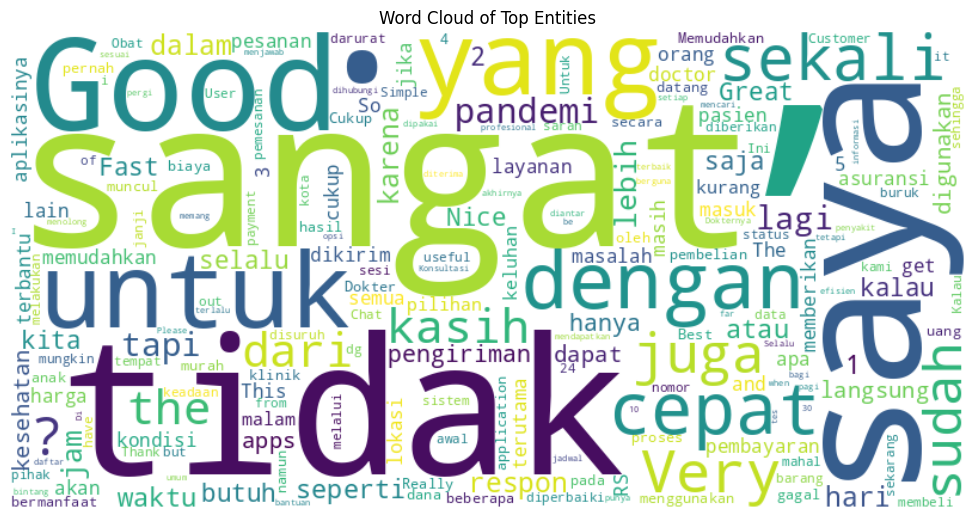

In [71]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have already created the top_entities DataFrame

# Create a dictionary of word frequencies
word_freq = dict(zip(top_entities['Word'], top_entities['Frequency']))

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Entities')
plt.tight_layout(pad=0)

# Save the word cloud image
plt.savefig('word_cloud_top_entities.png', dpi=300, bbox_inches='tight')

# Show the plot (optional if you're working in a Jupyter notebook)
plt.show()